
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67,adjust lgm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,

Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 5
    Num_boost_round=10000
    Early_stopping_rounds=29

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

In [13]:
# Co-occurring or mutually exclusive relationships between scored targets
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 1.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
71                                NaN   
72                                NaN   
73                                NaN   
74                                NaN   
75                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
71                                     NaN                            NaN   
72                                     NaN                            NaN   
73                                     NaN                            NaN   
74                                     NaN                            NaN   
75                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
71                                      NaN   
72                                      NaN   
73                                      NaN   
74                                      NaN   
75                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
# cope & paste from my v73 notebook

unpredictable_cols = (
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'sodium_channel_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    if target_col in unpredictable_cols:
            
        params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.04, 
                'lambda_l1': 0.1,
                'lambda_l2': 200,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
        }
            
    else:
        
        params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
        }
            
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
                
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    if target_col in unpredictable_cols:
        
        classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.04,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 100,
                'random_state': SEED,
                'n_jobs': 4
        }
            
    else:
  
        classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
        }
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
                    
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00027222	valid_1's binary_logloss: 0.000846189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000271833	valid_1's binary_logloss: 0.00112437
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000277775	valid_1's binary_logloss: 0.00135768
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000284563	valid_1's binary_logloss: 0.00213745
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013862, Threshold: 0.0049471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0049471, conf_0:0.00346, conf_1:0.00643
Num_p_label: 4.0, Expected: 2.8, Adj_threshold_1: 0.0349471


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000286042	valid_1's binary_logloss: 0.0024666


threshold: 0.0349471, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000276776	valid_1's binary_logloss: 0.00106484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000275572	valid_1's binary_logloss: 0.00218438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00028244	valid_1's binary_logloss: 0.00136089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000276587	valid_1's binary_logloss: 0.00295308
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0467178, Threshold: 0.0349471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00071
Num_p_label: 15.0, Expected: 2.8, Threshold: 0.0349471, conf_0:0.02796, conf_1:0.04194
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_1: 0.0649471
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0949471


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000278274	valid_1's binary_logloss: 0.00216852


threshold: 0.0949471, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000276776	valid_1's binary_logloss: 0.00106484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000275572	valid_1's binary_logloss: 0.00218438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00028244	valid_1's binary_logloss: 0.00136089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000276587	valid_1's binary_logloss: 0.00295308
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0467178, Threshold: 0.0949471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0949471, conf_0:0.08545, conf_1:0.10444
threshold: 0.0949471, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000278274	valid_1's binary_logloss: 0.00216852


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


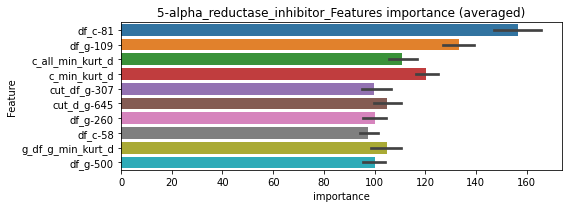

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[812]	training's binary_logloss: 0.00027041	valid_1's binary_logloss: 0.00081808
Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000272338	valid_1's binary_logloss: 0.00112116
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000273689	valid_1's binary_logloss: 0.000707182
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000271131	valid_1's binary_logloss: 0.00167792
Training until validation scores don't improve for 29 rounds


5-alpha_reductase_inhibitor logloss: 0.0011394828912763065


Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000272041	valid_1's binary_logloss: 0.00137363


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000281321	valid_1's binary_logloss: 0.000955498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000274371	valid_1's binary_logloss: 0.000607807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000275848	valid_1's binary_logloss: 0.00126887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000282357	valid_1's binary_logloss: 0.00325188
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012950, Threshold: 0.0036466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0036466, conf_0:0.00255, conf_1:0.00474


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000278326	valid_1's binary_logloss: 0.000830376


Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0336466
threshold: 0.0336466, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000273625	valid_1's binary_logloss: 0.000927925
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000269875	valid_1's binary_logloss: 0.00059814
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000272419	valid_1's binary_logloss: 0.00181308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275561	valid_1's binary_logloss: 0.00336351
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245601, Threshold: 0.0336466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0336466, conf_0:0.02692, conf_1:0.04038


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000274096	valid_1's binary_logloss: 0.00097467


threshold: 0.0336466, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000273625	valid_1's binary_logloss: 0.000927925
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000269875	valid_1's binary_logloss: 0.00059814
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000272419	valid_1's binary_logloss: 0.00181308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275561	valid_1's binary_logloss: 0.00336351
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245601, Threshold: 0.0336466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0336466, conf_0:0.03028, conf_1:0.03701


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000274096	valid_1's binary_logloss: 0.00097467


threshold: 0.0336466, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


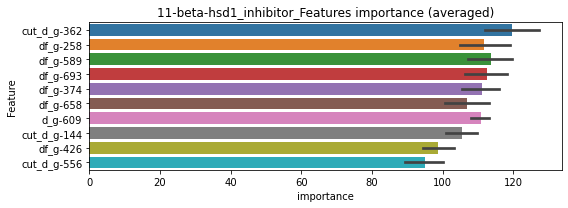

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000272293	valid_1's binary_logloss: 0.000703159


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.00027218	valid_1's binary_logloss: 0.000761666


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000274488	valid_1's binary_logloss: 0.00098038


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000294983	valid_1's binary_logloss: 0.00222595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000275791	valid_1's binary_logloss: 0.000614681


11-beta-hsd1_inhibitor logloss: 0.0010570995215876367
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00032711	valid_1's binary_logloss: 0.00448161
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000332639	valid_1's binary_logloss: 0.00590245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000338687	valid_1's binary_logloss: 0.000493004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000349173	valid_1's binary_logloss: 0.00881218
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000318173	valid_1's binary_logloss: 0.0034962


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017858, Threshold: 0.0039070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0039070, conf_0:0.00273, conf_1:0.00508
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_1: 0.0339070
threshold: 0.0339070, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000343183	valid_1's binary_logloss: 0.00406217
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000321863	valid_1's binary_logloss: 0.00563646
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000321691	valid_1's binary_logloss: 0.000461212
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00033257	valid_1's binary_logloss: 0.00851166
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0082600, Threshold: 0.0339070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0339070, conf_0:0.02713, conf_1:0.04069


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00031727	valid_1's binary_logloss: 0.00367455


threshold: 0.0339070, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000343183	valid_1's binary_logloss: 0.00406217
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000321863	valid_1's binary_logloss: 0.00563646
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000321691	valid_1's binary_logloss: 0.000461212
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00033257	valid_1's binary_logloss: 0.00851166
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0082600, Threshold: 0.0339070, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0339070, conf_0:0.03052, conf_1:0.03730


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00031727	valid_1's binary_logloss: 0.00367455


threshold: 0.0339070, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


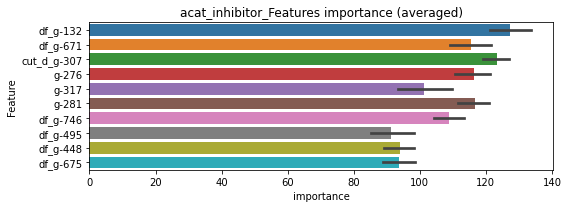

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000314238	valid_1's binary_logloss: 0.00317792


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 acat_inhibitor=================================


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000373217	valid_1's binary_logloss: 0.00509959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00032298	valid_1's binary_logloss: 0.000493815


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000339538	valid_1's binary_logloss: 0.0056885


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 acat_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000314667	valid_1's binary_logloss: 0.00221241


acat_inhibitor logloss: 0.003334810240684494


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0267598	valid_1's binary_logloss: 0.0993739
Early stopping, best iteration is:
[1570]	training's binary_logloss: 0.0161877	valid_1's binary_logloss: 0.0943173
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271807	valid_1's binary_logloss: 0.0904158
Early stopping, best iteration is:
[1312]	training's binary_logloss: 0.0200911	valid_1's binary_logloss: 0.0865247
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0280309	valid_1's binary_logloss: 0.0680861
[2000]	training's binary_logloss: 0.0128758	valid_1's binary_logloss: 0.0587921
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0116816	valid_1's binary_logloss: 0.0577906
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275244	valid_1's binary_logloss: 0.0830739
[2000]	trai

1 / 3, AUC score:0.988, PR-AUC:0.974
y_Threshold: 0.0479187, Threshold: 0.0811046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 370 → Positive_corect_labels: 1222/7305
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0811046, conf_0:0.05677, conf_1:0.10544
threshold: 0.0811046, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1222.0/7305, y_label_rate: 0.1672827
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0214149	valid_1's binary_logloss: 0.0692055
Early stopping, best iteration is:
[1897]	training's binary_logloss: 0.0106382	valid_1's binary_logloss: 0.0618835
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.021653	valid_1's binary_logloss: 0.0616138
[2000]	training's binary_logloss: 0.010195	valid_1's binary_logloss: 0.052791
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.00931031	valid_1's binary_logloss: 0.0520016
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0214914	valid_1's binary_logloss: 0.0704707
Early stopping, best iteration is:
[1933]	training's binary_logloss: 0.010383	valid_1's binary_logloss: 0.0641434
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0222424	valid_1's binary_logloss: 0.0554546
Early stopping

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0640274, Threshold: 0.0811046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1183.0/7227
p_label_rate: 0.0123054 Vs.target_rate: 0.00798
Num_p_label: 49.0, Expected: 31.8, Threshold: 0.0811046, conf_0:0.06488, conf_1:0.09733
Num_p_label: 25.0, Expected: 31.8, Adj_threshold_1: 0.1111046
threshold: 0.1111046, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 1183.0/7227, y_label_rate: 0.1636917
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0181671	valid_1's binary_logloss: 0.0523953
Early stopping, best iteration is:
[1371]	training's binary_logloss: 0.0129815	valid_1's binary_logloss: 0.0487417
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0182013	valid_1's binary_logloss: 0.0538881
Early stopping, best iteration is:
[1927]	training's binary_logloss: 0.00900011	valid_1's binary_logloss: 0.0462838
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0185176	valid_1's binary_logloss: 0.0479325
[2000]	training's binary_logloss: 0.00875772	valid_1's binary_logloss: 0.0396838
[3000]	training's binary_logloss: 0.00572268	valid_1's binary_logloss: 0.0367953
Early stopping, best iteration is:
[3260]	training's binary_logloss: 0.00524681	valid_1's binary_logloss: 0.0364144
Training until validation scores don't improve for 29 rounds
[1000]	

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0635586, Threshold: 0.1111046, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1159.0/7179
p_label_rate: 0.0047715 Vs.target_rate: 0.00798
Num_p_label: 19.0, Expected: 31.8, Threshold: 0.1111046, conf_0:0.09999, conf_1:0.12222
threshold: 0.1111046, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 1159.0/7179, y_label_rate: 0.1614431


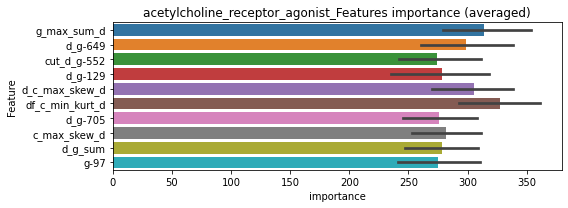

len(train_index) : 5743
len(valid_index) : 1436
================================= fold 1/5 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0294853	valid_1's binary_logloss: 0.0605532
[2000]	training's binary_logloss: 0.0146723	valid_1's binary_logloss: 0.0481823
[3000]	training's binary_logloss: 0.00971516	valid_1's binary_logloss: 0.0442566
Early stopping, best iteration is:
[3080]	training's binary_logloss: 0.00946693	valid_1's binary_logloss: 0.043942


len(train_index) : 5743
len(valid_index) : 1436
================================= fold 2/5 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0299938	valid_1's binary_logloss: 0.0527215
[2000]	training's binary_logloss: 0.0149488	valid_1's binary_logloss: 0.0393112
[3000]	training's binary_logloss: 0.00989184	valid_1's binary_logloss: 0.0348867
Early stopping, best iteration is:
[3136]	training's binary_logloss: 0.00945546	valid_1's binary_logloss: 0.0344796


len(train_index) : 5743
len(valid_index) : 1436
================================= fold 3/5 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.029869	valid_1's binary_logloss: 0.0542344
[2000]	training's binary_logloss: 0.0149841	valid_1's binary_logloss: 0.0406018
[3000]	training's binary_logloss: 0.00992667	valid_1's binary_logloss: 0.036127
Early stopping, best iteration is:
[3327]	training's binary_logloss: 0.00895654	valid_1's binary_logloss: 0.0353046


len(train_index) : 5743
len(valid_index) : 1436
================================= fold 4/5 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0301302	valid_1's binary_logloss: 0.0527599
[2000]	training's binary_logloss: 0.0149262	valid_1's binary_logloss: 0.0389108
[3000]	training's binary_logloss: 0.00987434	valid_1's binary_logloss: 0.0343373
[4000]	training's binary_logloss: 0.00735994	valid_1's binary_logloss: 0.0320817
[5000]	training's binary_logloss: 0.00587919	valid_1's binary_logloss: 0.0306978
Early stopping, best iteration is:
[5385]	training's binary_logloss: 0.00546375	valid_1's binary_logloss: 0.0302446


len(train_index) : 5744
len(valid_index) : 1435
================================= fold 5/5 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0297366	valid_1's binary_logloss: 0.0567111
[2000]	training's binary_logloss: 0.0147668	valid_1's binary_logloss: 0.045443
Early stopping, best iteration is:
[2936]	training's binary_logloss: 0.00998334	valid_1's binary_logloss: 0.0415945


acetylcholine_receptor_agonist logloss: 0.03711243185653004
acetylcholine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0360745	valid_1's binary_logloss: 0.125038
Early stopping, best iteration is:
[1344]	training's binary_logloss: 0.025788	valid_1's binary_logloss: 0.120258
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0359983	valid_1's binary_logloss: 0.129082
Early stopping, best iteration is:
[1306]	training's binary_logloss: 0.0265659	valid_1's binary_logloss: 0.123774
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0367003	valid_1's binary_logloss: 0.112954
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0205645	valid_1's binary_logloss: 0.104208
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0356981	valid_1's binary_logloss: 0.125944
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.0233517	valid_1's binary_log

1 / 3, AUC score:0.973, PR-AUC:0.950
y_Threshold: 0.0634828, Threshold: 0.1197579, pos_neg_ratio: 0.8000000
Remove_noisy_data: 548 → Positive_corect_labels: 1383/8492
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.1197579, conf_0:0.08383, conf_1:0.15569
threshold: 0.1197579, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1383.0/8492, y_label_rate: 0.1628592
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0258104	valid_1's binary_logloss: 0.0784671
Early stopping, best iteration is:
[1853]	training's binary_logloss: 0.0129897	valid_1's binary_logloss: 0.0687572
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0263283	valid_1's binary_logloss: 0.0713444
[2000]	training's binary_logloss: 0.0120409	valid_1's binary_logloss: 0.0589107
Early stopping, best iteration is:
[2094]	training's binary_logloss: 0.0114247	valid_1's binary_logloss: 0.0583604
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.02582	valid_1's binary_logloss: 0.0750937
[2000]	training's binary_logloss: 0.0119084	valid_1's binary_logloss: 0.0649945
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0108234	valid_1's binary_logloss: 0.0638835
Training until validation scores don't improve for 29 rounds
[1000]	traini

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0869277, Threshold: 0.1197579, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1324.0/8374
p_label_rate: 0.0090407 Vs.target_rate: 0.01264
Num_p_label: 36.0, Expected: 50.3, Threshold: 0.1197579, conf_0:0.09581, conf_1:0.14371
threshold: 0.1197579, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 1324.0/8374, y_label_rate: 0.1581084
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0219406	valid_1's binary_logloss: 0.0568033
[2000]	training's binary_logloss: 0.0102272	valid_1's binary_logloss: 0.0447473
Early stopping, best iteration is:
[2543]	training's binary_logloss: 0.00789465	valid_1's binary_logloss: 0.0418566
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0218804	valid_1's binary_logloss: 0.0635363
[2000]	training's binary_logloss: 0.0101999	valid_1's binary_logloss: 0.0542439
Early stopping, best iteration is:
[2622]	training's binary_logloss: 0.00759906	valid_1's binary_logloss: 0.0517742
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0219511	valid_1's binary_logloss: 0.0563089
[2000]	training's binary_logloss: 0.0102182	valid_1's binary_logloss: 0.0437965
Early stopping, best iteration is:
[2355]	training's binary_logloss: 0.00853343	valid_1's binary_logloss:

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0749511, Threshold: 0.1197579, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1299.0/8324
p_label_rate: 0.0087896 Vs.target_rate: 0.01264
Num_p_label: 35.0, Expected: 50.3, Threshold: 0.1197579, conf_0:0.10778, conf_1:0.13173
threshold: 0.1197579, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1299.0/8324, y_label_rate: 0.1560548


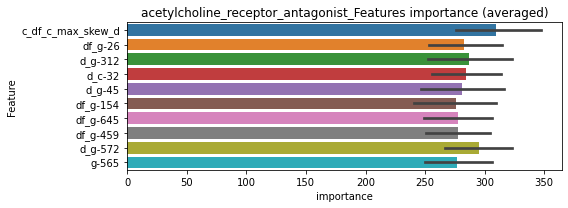

len(train_index) : 6659
len(valid_index) : 1665
================================= fold 1/5 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0362167	valid_1's binary_logloss: 0.0664339
[2000]	training's binary_logloss: 0.0178095	valid_1's binary_logloss: 0.0503683
[3000]	training's binary_logloss: 0.0116015	valid_1's binary_logloss: 0.0445391
Early stopping, best iteration is:
[3913]	training's binary_logloss: 0.0088072	valid_1's binary_logloss: 0.0419882


len(train_index) : 6659
len(valid_index) : 1665
================================= fold 2/5 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.035938	valid_1's binary_logloss: 0.0710873
[2000]	training's binary_logloss: 0.0177186	valid_1's binary_logloss: 0.0539375
[3000]	training's binary_logloss: 0.0115507	valid_1's binary_logloss: 0.047664
Early stopping, best iteration is:
[3197]	training's binary_logloss: 0.0108115	valid_1's binary_logloss: 0.0468268


len(train_index) : 6659
len(valid_index) : 1665
================================= fold 3/5 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0356532	valid_1's binary_logloss: 0.0805098
[2000]	training's binary_logloss: 0.0175239	valid_1's binary_logloss: 0.065747
Early stopping, best iteration is:
[2958]	training's binary_logloss: 0.0116128	valid_1's binary_logloss: 0.0610492


len(train_index) : 6659
len(valid_index) : 1665
================================= fold 4/5 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0363567	valid_1's binary_logloss: 0.0663315
[2000]	training's binary_logloss: 0.0180079	valid_1's binary_logloss: 0.0499464
[3000]	training's binary_logloss: 0.0117653	valid_1's binary_logloss: 0.0443106
[4000]	training's binary_logloss: 0.00870492	valid_1's binary_logloss: 0.0414038
Early stopping, best iteration is:
[4254]	training's binary_logloss: 0.00815854	valid_1's binary_logloss: 0.0408731


len(train_index) : 6660
len(valid_index) : 1664
================================= fold 5/5 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0365624	valid_1's binary_logloss: 0.066291
[2000]	training's binary_logloss: 0.0180897	valid_1's binary_logloss: 0.0490833
[3000]	training's binary_logloss: 0.0118147	valid_1's binary_logloss: 0.0428762
[4000]	training's binary_logloss: 0.00873032	valid_1's binary_logloss: 0.0397955
Early stopping, best iteration is:
[4249]	training's binary_logloss: 0.00819313	valid_1's binary_logloss: 0.0391137


acetylcholine_receptor_antagonist logloss: 0.045971015694372876
acetylcholine_receptor_antagonist is unpredictable(><)!
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000669054	valid_1's binary_logloss: 0.0240548
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000793953	valid_1's binary_logloss: 0.0427511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000807945	valid_1's binary_logloss: 0.0298747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000647301	valid_1's binary_logloss: 0.0092434
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000818467	valid_1's binary_logloss: 0.0274418


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0075731, Threshold: 0.0202029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 137 → Positive_corect_labels: 652/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0202029, conf_0:0.01414, conf_1:0.02626
Num_p_label: 10.0, Expected: 12.2, Adj_threshold_1: 0.0502029
threshold: 0.0502029, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000640743	valid_1's binary_logloss: 0.0171503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000582286	valid_1's binary_logloss: 0.0346466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00129491	valid_1's binary_logloss: 0.0307065
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000805305	valid_1's binary_logloss: 0.0263154
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000677231	valid_1's binary_logloss: 0.0250459


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0290161, Threshold: 0.0502029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0107986 Vs.target_rate: 0.00307
Num_p_label: 43.0, Expected: 12.2, Threshold: 0.0502029, conf_0:0.04016, conf_1:0.06024
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_1: 0.0802029
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.1102029
threshold: 0.1102029, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000581872	valid_1's binary_logloss: 0.0165072
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00058565	valid_1's binary_logloss: 0.0332014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000588473	valid_1's binary_logloss: 0.012461
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.00058841	valid_1's binary_logloss: 0.00893963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000598602	valid_1's binary_logloss: 0.0136656


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0310087, Threshold: 0.1102029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1102029, conf_0:0.09918, conf_1:0.12122
threshold: 0.1102029, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


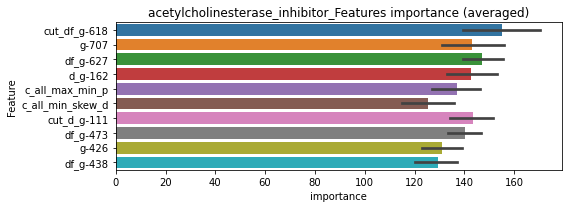

len(train_index) : 3020
len(valid_index) : 755
================================= fold 1/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3020
len(valid_index) : 755
================================= fold 2/5 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000883237	valid_1's binary_logloss: 0.0218042
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000576907	valid_1's binary_logloss: 0.0152534
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000580412	valid_1's binary_logloss: 0.0152294


len(train_index) : 3020
len(valid_index) : 755
================================= fold 3/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3020
len(valid_index) : 755


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00089579	valid_1's binary_logloss: 0.0324111


================================= fold 4/5 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3020
len(valid_index) : 755
================================= fold 5/5 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00109415	valid_1's binary_logloss: 0.0264129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000607699	valid_1's binary_logloss: 0.0169284


acetylcholinesterase_inhibitor logloss: 0.022559400743993072
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000500061	valid_1's binary_logloss: 0.0150484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000521219	valid_1's binary_logloss: 0.00589961
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00051988	valid_1's binary_logloss: 0.0208878
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000469924	valid_1's binary_logloss: 0.00609934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000474027	valid_1's binary_logloss: 0.00769828


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033055, Threshold: 0.0150792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0150792, conf_0:0.01056, conf_1:0.01960
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0450792
threshold: 0.0450792, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000473352	valid_1's binary_logloss: 0.0129808
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000459315	valid_1's binary_logloss: 0.00483877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000500939	valid_1's binary_logloss: 0.0196153
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000487324	valid_1's binary_logloss: 0.00601029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000473711	valid_1's binary_logloss: 0.00676026


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219193, Threshold: 0.0450792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0450792, conf_0:0.03606, conf_1:0.05409
threshold: 0.0450792, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000473352	valid_1's binary_logloss: 0.0129808
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000459315	valid_1's binary_logloss: 0.00483877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000500939	valid_1's binary_logloss: 0.0196153
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000487324	valid_1's binary_logloss: 0.00601029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000473711	valid_1's binary_logloss: 0.00676026


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219193, Threshold: 0.0450792, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0450792, conf_0:0.04057, conf_1:0.04959
threshold: 0.0450792, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


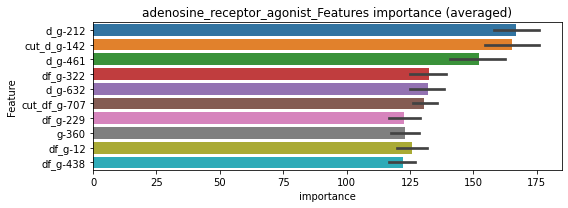

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000586119	valid_1's binary_logloss: 0.0132445


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000464881	valid_1's binary_logloss: 0.00484995


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00066869	valid_1's binary_logloss: 0.0183017


================================= fold 4/5 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000912607	valid_1's binary_logloss: 0.00968298
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000463813	valid_1's binary_logloss: 0.00789144


adenosine_receptor_agonist logloss: 0.010794130212055005
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0274482	valid_1's binary_logloss: 0.0839827
[2000]	training's binary_logloss: 0.0129624	valid_1's binary_logloss: 0.0690718
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.0122843	valid_1's binary_logloss: 0.0682995
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0279299	valid_1's binary_logloss: 0.0779621
[2000]	training's binary_logloss: 0.0131433	valid_1's binary_logloss: 0.0640557
[3000]	training's binary_logloss: 0.00859649	valid_1's binary_logloss: 0.0591143
Early stopping, best iteration is:
[3326]	training's binary_logloss: 0.0077168	valid_1's binary_logloss: 0.0579935
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0274043	valid_1's binary_logloss: 0.0841415
[2000]	training's binary_logloss: 0.0129947	valid_1's binary_logloss: 0.0699231
Early stopping, best itera

1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0406717, Threshold: 0.1088184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 640/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1088184, conf_0:0.07617, conf_1:0.14146
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_1: 0.1388184
threshold: 0.1388184, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0246235	valid_1's binary_logloss: 0.0729964
[2000]	training's binary_logloss: 0.0117314	valid_1's binary_logloss: 0.058854
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.00942464	valid_1's binary_logloss: 0.0562639
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0247306	valid_1's binary_logloss: 0.0700103
[2000]	training's binary_logloss: 0.0118493	valid_1's binary_logloss: 0.0571828
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0112574	valid_1's binary_logloss: 0.0566504
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0245193	valid_1's binary_logloss: 0.0625143
[2000]	training's binary_logloss: 0.0117033	valid_1's binary_logloss: 0.0475995
[3000]	training's binary_logloss: 0.00769354	valid_1's binary_logloss: 0.0420327
Early stopping, best itera

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0671212, Threshold: 0.1388184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 626.0/3738
p_label_rate: 0.0175791 Vs.target_rate: 0.00403
Num_p_label: 70.0, Expected: 16.1, Threshold: 0.1388184, conf_0:0.11105, conf_1:0.16658
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_1: 0.1688184
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_2: 0.1988184
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_3: 0.2288184
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_4: 0.2588184
threshold: 0.2588184, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 626.0/3738, y_label_rate: 0.1674692
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0232009	valid_1's binary_logloss: 0.0700032
[2000]	training's binary_logloss: 0.0110933	valid_1's binary_logloss: 0.0572481
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0105153	valid_1's binary_logloss: 0.0565427
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233785	valid_1's binary_logloss: 0.0568328
[2000]	training's binary_logloss: 0.0112225	valid_1's binary_logloss: 0.0418881
[3000]	training's binary_logloss: 0.00735298	valid_1's binary_logloss: 0.0362964
[4000]	training's binary_logloss: 0.00550004	valid_1's binary_logloss: 0.0333903
Early stopping, best iteration is:
[4537]	training's binary_logloss: 0.00485417	valid_1's binary_logloss: 0.0322313
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0230534	valid_1's binary_logloss: 0.069448
[2000]	training's binary_

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0691204, Threshold: 0.2588184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0075339 Vs.target_rate: 0.00403
Num_p_label: 30.0, Expected: 16.1, Threshold: 0.2588184, conf_0:0.23294, conf_1:0.28470
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_1: 0.2888184
threshold: 0.2888184, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 620.0/3726, y_label_rate: 0.1663983


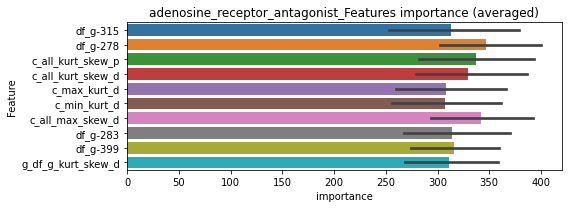

len(train_index) : 2980
len(valid_index) : 746
================================= fold 1/5 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0415479	valid_1's binary_logloss: 0.0794875
[2000]	training's binary_logloss: 0.0207329	valid_1's binary_logloss: 0.0575123
[3000]	training's binary_logloss: 0.0136976	valid_1's binary_logloss: 0.0493137
[4000]	training's binary_logloss: 0.0101987	valid_1's binary_logloss: 0.0454302
Early stopping, best iteration is:
[4266]	training's binary_logloss: 0.00955998	valid_1's binary_logloss: 0.0446762


len(train_index) : 2981
len(valid_index) : 745
================================= fold 2/5 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0415804	valid_1's binary_logloss: 0.0815395
[2000]	training's binary_logloss: 0.0207965	valid_1's binary_logloss: 0.0600175
[3000]	training's binary_logloss: 0.0137635	valid_1's binary_logloss: 0.0519678
[4000]	training's binary_logloss: 0.0102623	valid_1's binary_logloss: 0.047934
[5000]	training's binary_logloss: 0.00819497	valid_1's binary_logloss: 0.0453369
[6000]	training's binary_logloss: 0.00683072	valid_1's binary_logloss: 0.0434458
Early stopping, best iteration is:
[6425]	training's binary_logloss: 0.00637771	valid_1's binary_logloss: 0.0428444


len(train_index) : 2981
len(valid_index) : 745
================================= fold 3/5 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0427224	valid_1's binary_logloss: 0.0686895
[2000]	training's binary_logloss: 0.0213044	valid_1's binary_logloss: 0.0454962
[3000]	training's binary_logloss: 0.01408	valid_1's binary_logloss: 0.0367699
[4000]	training's binary_logloss: 0.0104885	valid_1's binary_logloss: 0.0321429
[5000]	training's binary_logloss: 0.00835847	valid_1's binary_logloss: 0.0293327
[6000]	training's binary_logloss: 0.00696257	valid_1's binary_logloss: 0.0272863
[7000]	training's binary_logloss: 0.00597948	valid_1's binary_logloss: 0.0257238
[8000]	training's binary_logloss: 0.00525073	valid_1's binary_logloss: 0.0245059
[9000]	training's binary_logloss: 0.0046919	valid_1's binary_logloss: 0.0235777
[10000]	training's binary_logloss: 0.00424614	valid_1's binary_logloss: 0.0228184
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00424614	valid_1's binary_logloss: 0.0228184


len(train_index) : 2981
len(valid_index) : 745
================================= fold 4/5 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0409236	valid_1's binary_logloss: 0.0860606
[2000]	training's binary_logloss: 0.0204554	valid_1's binary_logloss: 0.0660323
[3000]	training's binary_logloss: 0.0135145	valid_1's binary_logloss: 0.059075
[4000]	training's binary_logloss: 0.0100849	valid_1's binary_logloss: 0.0553771
Early stopping, best iteration is:
[4104]	training's binary_logloss: 0.00983101	valid_1's binary_logloss: 0.0550835


len(train_index) : 2981
len(valid_index) : 745
================================= fold 5/5 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0414789	valid_1's binary_logloss: 0.0766684
[2000]	training's binary_logloss: 0.0208203	valid_1's binary_logloss: 0.0557736
[3000]	training's binary_logloss: 0.0137521	valid_1's binary_logloss: 0.048298
[4000]	training's binary_logloss: 0.0102276	valid_1's binary_logloss: 0.0441151
Early stopping, best iteration is:
[4492]	training's binary_logloss: 0.00909745	valid_1's binary_logloss: 0.042838


adenosine_receptor_antagonist logloss: 0.04165290990049213
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000282044	valid_1's binary_logloss: 0.000688169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000295155	valid_1's binary_logloss: 0.000757119
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000286834	valid_1's binary_logloss: 0.00173975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.0002873	valid_1's binary_logloss: 0.00231956
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014359, Threshold: 0.0080676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0080676, conf_0:0.00565, conf_1:0.01049
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.0380676
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0680676


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000281582	valid_1's binary_logloss: 0.000869644


threshold: 0.0680676, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000268972	valid_1's binary_logloss: 0.000439972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000266319	valid_1's binary_logloss: 0.000693727
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000267149	valid_1's binary_logloss: 0.0018531
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000270645	valid_1's binary_logloss: 0.00253876
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804930, Threshold: 0.0680676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0150678 Vs.target_rate: 0.00076
Num_p_label: 60.0, Expected: 3.0, Threshold: 0.0680676, conf_0:0.05445, conf_1:0.08168
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_1: 0.0980676
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.1280676
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_3: 0.1580676
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.1880676
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.2180676
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.2480676


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000266513	valid_1's binary_logloss: 0.000497608


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.2780676
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.3080676
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.3380676
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.3680676
threshold: 0.3680676, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000268972	valid_1's binary_logloss: 0.000439972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000266319	valid_1's binary_logloss: 0.000693727
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000267149	valid_1's binary_logloss: 0.0018531
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000270645	valid_1's binary_logloss: 0.00253876
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804930, Threshold: 0.3680676, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3680676, conf_0:0.33126, conf_1:0.40487


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000266513	valid_1's binary_logloss: 0.000497608


threshold: 0.3680676, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


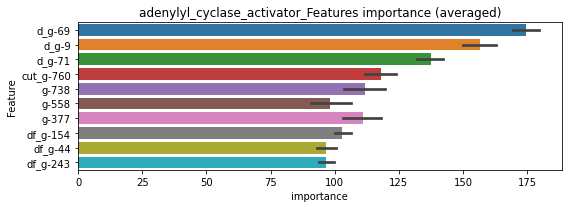

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00026996	valid_1's binary_logloss: 0.00046799


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000266843	valid_1's binary_logloss: 0.000579187
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000266843	valid_1's binary_logloss: 0.000579187


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000269416	valid_1's binary_logloss: 0.0015568


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000270535	valid_1's binary_logloss: 0.0023176


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000262814	valid_1's binary_logloss: 0.000563894
Early stopping, best iteration is:
[1031]	training's binary_logloss: 0.000261916	valid_1's binary_logloss: 0.000562765


adenylyl_cyclase_activator logloss: 0.0010967899177490154


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0363779	valid_1's binary_logloss: 0.10761
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0193815	valid_1's binary_logloss: 0.0943365
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0369048	valid_1's binary_logloss: 0.101654
[2000]	training's binary_logloss: 0.0168419	valid_1's binary_logloss: 0.0883348
Early stopping, best iteration is:
[2152]	training's binary_logloss: 0.0155008	valid_1's binary_logloss: 0.0873205
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0358728	valid_1's binary_logloss: 0.118853
Early stopping, best iteration is:
[1799]	training's binary_logloss: 0.0185898	valid_1's binary_logloss: 0.108083
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0359538	valid_1's binary_logloss: 0.124299
Early stopping, b

1 / 3, AUC score:0.981, PR-AUC:0.963
y_Threshold: 0.0640039, Threshold: 0.1315127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 445 → Positive_corect_labels: 1307/7898
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.1315127, conf_0:0.09206, conf_1:0.17097
threshold: 0.1315127, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1307.0/7898, y_label_rate: 0.1654849
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0282084	valid_1's binary_logloss: 0.0795288
[2000]	training's binary_logloss: 0.0131676	valid_1's binary_logloss: 0.0666602
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0125362	valid_1's binary_logloss: 0.0660809
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0286993	valid_1's binary_logloss: 0.0814283
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0139576	valid_1's binary_logloss: 0.0687057
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0284027	valid_1's binary_logloss: 0.0834562
Early stopping, best iteration is:
[1535]	training's binary_logloss: 0.0175833	valid_1's binary_logloss: 0.0735725
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0287389	valid_1's binary_logloss: 0.0823211
Early stopp

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0938006, Threshold: 0.1315127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1256.0/7796
p_label_rate: 0.0153189 Vs.target_rate: 0.01134
Num_p_label: 61.0, Expected: 45.1, Threshold: 0.1315127, conf_0:0.10521, conf_1:0.15782
threshold: 0.1315127, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 1256.0/7796, y_label_rate: 0.1611083
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248774	valid_1's binary_logloss: 0.068619
[2000]	training's binary_logloss: 0.0116283	valid_1's binary_logloss: 0.0568949
Early stopping, best iteration is:
[2182]	training's binary_logloss: 0.0105697	valid_1's binary_logloss: 0.0558325
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0252745	valid_1's binary_logloss: 0.0716128
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0123394	valid_1's binary_logloss: 0.0584218
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251386	valid_1's binary_logloss: 0.0707964
[2000]	training's binary_logloss: 0.0117094	valid_1's binary_logloss: 0.0583162
Early stopping, best iteration is:
[2395]	training's binary_logloss: 0.00964157	valid_1's binary_logloss: 0.0560744
Training until validation scores don't improve for 29 rounds
[1000]	trai

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0863548, Threshold: 0.1315127, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1226.0/7736
p_label_rate: 0.0145655 Vs.target_rate: 0.01134
Num_p_label: 58.0, Expected: 45.1, Threshold: 0.1315127, conf_0:0.11836, conf_1:0.14466
threshold: 0.1315127, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1226.0/7736, y_label_rate: 0.1584798


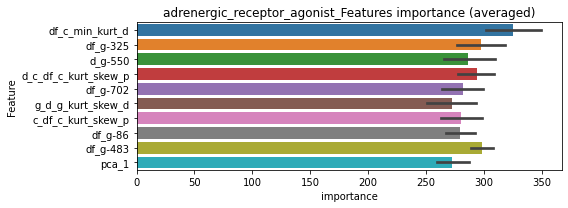

len(train_index) : 6188
len(valid_index) : 1548
================================= fold 1/5 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0416624	valid_1's binary_logloss: 0.0880971
[2000]	training's binary_logloss: 0.0205824	valid_1's binary_logloss: 0.0668338
[3000]	training's binary_logloss: 0.0135221	valid_1's binary_logloss: 0.0587471
Early stopping, best iteration is:
[3036]	training's binary_logloss: 0.0133489	valid_1's binary_logloss: 0.0584136


len(train_index) : 6189
len(valid_index) : 1547
================================= fold 2/5 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0411937	valid_1's binary_logloss: 0.0899391
[2000]	training's binary_logloss: 0.0203767	valid_1's binary_logloss: 0.071093
Early stopping, best iteration is:
[2678]	training's binary_logloss: 0.0149839	valid_1's binary_logloss: 0.0653932


len(train_index) : 6189
len(valid_index) : 1547
================================= fold 3/5 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0424006	valid_1's binary_logloss: 0.0763467
[2000]	training's binary_logloss: 0.0208169	valid_1's binary_logloss: 0.0566764
[3000]	training's binary_logloss: 0.013639	valid_1's binary_logloss: 0.0495664
Early stopping, best iteration is:
[3219]	training's binary_logloss: 0.0126623	valid_1's binary_logloss: 0.0484516


len(train_index) : 6189
len(valid_index) : 1547
================================= fold 4/5 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421908	valid_1's binary_logloss: 0.0834823
[2000]	training's binary_logloss: 0.0208408	valid_1's binary_logloss: 0.0650976
Early stopping, best iteration is:
[2779]	training's binary_logloss: 0.0147279	valid_1's binary_logloss: 0.0595431


len(train_index) : 6189
len(valid_index) : 1547
================================= fold 5/5 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0424353	valid_1's binary_logloss: 0.0732935
[2000]	training's binary_logloss: 0.0209982	valid_1's binary_logloss: 0.0544732
[3000]	training's binary_logloss: 0.0137075	valid_1's binary_logloss: 0.0483644
Early stopping, best iteration is:
[3745]	training's binary_logloss: 0.0108973	valid_1's binary_logloss: 0.0458641


adrenergic_receptor_agonist logloss: 0.05553350729305836
adrenergic_receptor_agonist is unpredictable(><)!


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 7013
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 7013


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.0573927	valid_1's binary_logloss: 0.15747
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0442414	valid_1's binary_logloss: 0.162434
Early stopping, best iteration is:
[1351]	training's binary_logloss: 0.0320576	valid_1's binary_logloss: 0.158984
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0448738	valid_1's binary_logloss: 0.153998
Early stopping, best iteration is:
[1301]	training's binary_logloss: 0.0340669	valid_1's binary_logloss: 0.150584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.0485454	valid_1's binary_logloss: 0.163701
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0454155	valid_1's binary_logloss: 0.141245
Early

1 / 3, AUC score:0.954, PR-AUC:0.911
y_Threshold: 0.0875859, Threshold: 0.1471630, pos_neg_ratio: 0.8000000
Remove_noisy_data: 645 → Positive_corect_labels: 1220/7770
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.1471630, conf_0:0.10301, conf_1:0.19131
threshold: 0.1471630, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1220.0/7770, y_label_rate: 0.1570142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.02715	valid_1's binary_logloss: 0.0818857
Early stopping, best iteration is:
[1649]	training's binary_logloss: 0.0157816	valid_1's binary_logloss: 0.0749963
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0264485	valid_1's binary_logloss: 0.102947
Early stopping, best iteration is:
[1606]	training's binary_logloss: 0.0157312	valid_1's binary_logloss: 0.0972607
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0273578	valid_1's binary_logloss: 0.082434
[2000]	training's binary_logloss: 0.0128514	valid_1's binary_logloss: 0.0737659
Early stopping, best iteration is:
[2069]	training's binary_logloss: 0.0123893	valid_1's binary_logloss: 0.0734752
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271234	valid_1's binary_logloss: 0.0857192
Early stopping,

2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0911971, Threshold: 0.1471630, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 1143.0/7616
p_label_rate: 0.0150678 Vs.target_rate: 0.01512
Num_p_label: 60.0, Expected: 60.2, Threshold: 0.1471630, conf_0:0.11773, conf_1:0.17660
threshold: 0.1471630, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 1143.0/7616, y_label_rate: 0.1500788
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.020885	valid_1's binary_logloss: 0.0530237
[2000]	training's binary_logloss: 0.00993541	valid_1's binary_logloss: 0.043517
Early stopping, best iteration is:
[2897]	training's binary_logloss: 0.00671254	valid_1's binary_logloss: 0.040573
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0200335	valid_1's binary_logloss: 0.0731981
Early stopping, best iteration is:
[1456]	training's binary_logloss: 0.0133936	valid_1's binary_logloss: 0.0687214
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0212686	valid_1's binary_logloss: 0.0494335
[2000]	training's binary_logloss: 0.0100975	valid_1's binary_logloss: 0.0399515
Early stopping, best iteration is:
[2814]	training's binary_logloss: 0.00699553	valid_1's binary_logloss: 0.0372219
Training until validation scores don't improve for 29 rounds
[1000]	trai

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0956866, Threshold: 0.1471630, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1102.0/7534
p_label_rate: 0.0228528 Vs.target_rate: 0.01512
Num_p_label: 91.0, Expected: 60.2, Threshold: 0.1471630, conf_0:0.13245, conf_1:0.16188
Num_p_label: 71.0, Expected: 60.2, Adj_threshold_1: 0.1771630
threshold: 0.1771630, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 1102.0/7534, y_label_rate: 0.1462702


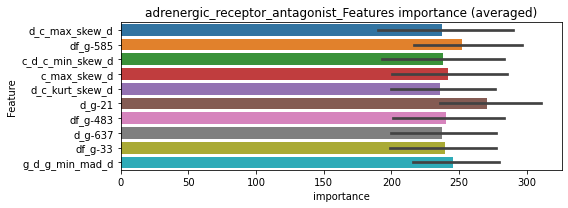

len(train_index) : 6027
len(valid_index) : 1507
================================= fold 1/5 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0303195	valid_1's binary_logloss: 0.0607027
[2000]	training's binary_logloss: 0.0153375	valid_1's binary_logloss: 0.0471799
[3000]	training's binary_logloss: 0.0101751	valid_1's binary_logloss: 0.0419007
[4000]	training's binary_logloss: 0.00755274	valid_1's binary_logloss: 0.0393308
Early stopping, best iteration is:
[4286]	training's binary_logloss: 0.00703618	valid_1's binary_logloss: 0.0388061


len(train_index) : 6027
len(valid_index) : 1507
================================= fold 2/5 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0304501	valid_1's binary_logloss: 0.0529494
[2000]	training's binary_logloss: 0.015344	valid_1's binary_logloss: 0.0397139
[3000]	training's binary_logloss: 0.0101988	valid_1's binary_logloss: 0.0347645
[4000]	training's binary_logloss: 0.00759214	valid_1's binary_logloss: 0.0320289
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.00707762	valid_1's binary_logloss: 0.0315774


len(train_index) : 6027
len(valid_index) : 1507
================================= fold 3/5 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0297367	valid_1's binary_logloss: 0.0670973
[2000]	training's binary_logloss: 0.0148167	valid_1's binary_logloss: 0.0535623
Early stopping, best iteration is:
[2680]	training's binary_logloss: 0.0110471	valid_1's binary_logloss: 0.0499352


len(train_index) : 6027
len(valid_index) : 1507
================================= fold 4/5 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0301623	valid_1's binary_logloss: 0.0546365
[2000]	training's binary_logloss: 0.0151426	valid_1's binary_logloss: 0.0406849
[3000]	training's binary_logloss: 0.0100577	valid_1's binary_logloss: 0.0360322
Early stopping, best iteration is:
[3870]	training's binary_logloss: 0.00777734	valid_1's binary_logloss: 0.0338325


len(train_index) : 6028
len(valid_index) : 1506
================================= fold 5/5 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0309653	valid_1's binary_logloss: 0.0512419
[2000]	training's binary_logloss: 0.0155464	valid_1's binary_logloss: 0.0367401
[3000]	training's binary_logloss: 0.0103341	valid_1's binary_logloss: 0.0313805
[4000]	training's binary_logloss: 0.00766514	valid_1's binary_logloss: 0.0285756
Early stopping, best iteration is:
[4814]	training's binary_logloss: 0.00637486	valid_1's binary_logloss: 0.027095


adrenergic_receptor_antagonist logloss: 0.03625045318062759
adrenergic_receptor_antagonist is unpredictable(><)!
akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000541558	valid_1's binary_logloss: 0.0158634
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000563103	valid_1's binary_logloss: 0.019291
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000571334	valid_1's binary_logloss: 0.0319402
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000573494	valid_1's binary_logloss: 0.010521
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000589274	valid_1's binary_logloss: 0.022801


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052681, Threshold: 0.0199431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0199431, conf_0:0.01396, conf_1:0.02593
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_1: 0.0499431
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_2: 0.0799431
threshold: 0.0799431, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000542048	valid_1's binary_logloss: 0.0188239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000550042	valid_1's binary_logloss: 0.00654594
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000535057	valid_1's binary_logloss: 0.0150975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000550208	valid_1's binary_logloss: 0.0160327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000528427	valid_1's binary_logloss: 0.0115154


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292046, Threshold: 0.0799431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3795
p_label_rate: 0.0075339 Vs.target_rate: 0.00277
Num_p_label: 30.0, Expected: 11.0, Threshold: 0.0799431, conf_0:0.06395, conf_1:0.09593
Num_p_label: 27.0, Expected: 11.0, Adj_threshold_1: 0.1099431
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1399431
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_3: 0.1699431
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_4: 0.1999431
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_5: 0.2299431
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_6: 0.2599431
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_7: 0.2899431
Num_p_label: 14.0, Expected: 11.0, Adj_threshold_8: 0.3199431
threshold: 0.3199431, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000542048	valid_1's binary_logloss: 0.0188239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000550042	valid_1's binary_logloss: 0.00654594
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000535057	valid_1's binary_logloss: 0.0150975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000550208	valid_1's binary_logloss: 0.0160327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000528427	valid_1's binary_logloss: 0.0115154


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292046, Threshold: 0.3199431, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3795
p_label_rate: 0.0035158 Vs.target_rate: 0.00277
Num_p_label: 14.0, Expected: 11.0, Threshold: 0.3199431, conf_0:0.28795, conf_1:0.35194
threshold: 0.3199431, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685


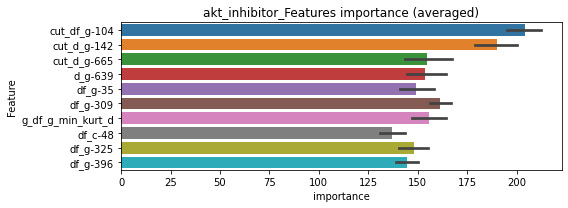

len(train_index) : 3036
len(valid_index) : 759
================================= fold 1/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000698876	valid_1's binary_logloss: 0.0188239


len(train_index) : 3036
len(valid_index) : 759
================================= fold 2/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000546542	valid_1's binary_logloss: 0.00693705
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000538968	valid_1's binary_logloss: 0.00690204


len(train_index) : 3036
len(valid_index) : 759
================================= fold 3/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000597966	valid_1's binary_logloss: 0.014888


len(train_index) : 3036
len(valid_index) : 759
================================= fold 4/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000757655	valid_1's binary_logloss: 0.0152799


len(train_index) : 3036
len(valid_index) : 759
================================= fold 5/5 akt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000566298	valid_1's binary_logloss: 0.00994921


akt_inhibitor logloss: 0.013168617451699472
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000286323	valid_1's binary_logloss: 0.00153877
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284695	valid_1's binary_logloss: 0.00119645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000284031	valid_1's binary_logloss: 0.00140477
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000285652	valid_1's binary_logloss: 0.00092243
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014731, Threshold: 0.0059037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0059037, conf_0:0.00413, conf_1:0.00767
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0359037


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000285738	valid_1's binary_logloss: 0.000787188


threshold: 0.0359037, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000277304	valid_1's binary_logloss: 0.00141785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000282652	valid_1's binary_logloss: 0.0015062
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000272867	valid_1's binary_logloss: 0.000950299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00027702	valid_1's binary_logloss: 0.000788163
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0913868, Threshold: 0.0359037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0045203 Vs.target_rate: 0.00080
Num_p_label: 18.0, Expected: 3.2, Threshold: 0.0359037, conf_0:0.02872, conf_1:0.04308
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0659037


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000272326	valid_1's binary_logloss: 0.000511843


Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0959037
threshold: 0.0959037, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000277304	valid_1's binary_logloss: 0.00141785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000282652	valid_1's binary_logloss: 0.0015062
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000272867	valid_1's binary_logloss: 0.000950299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00027702	valid_1's binary_logloss: 0.000788163
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000272326	valid_1's binary_logloss: 0.000511843


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0913868, Threshold: 0.0959037, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0959037, conf_0:0.08631, conf_1:0.10549
threshold: 0.0959037, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


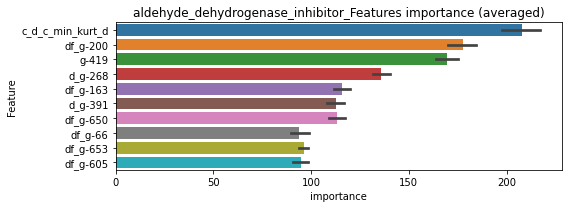

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000328622	valid_1's binary_logloss: 0.00182116
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000276165	valid_1's binary_logloss: 0.00120291


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00027322	valid_1's binary_logloss: 0.000778259
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000273229	valid_1's binary_logloss: 0.000778233


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000272755	valid_1's binary_logloss: 0.00113651
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000271906	valid_1's binary_logloss: 0.00113387


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.00027702	valid_1's binary_logloss: 0.000596645


aldehyde_dehydrogenase_inhibitor logloss: 0.0011066944136918697
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000498989	valid_1's binary_logloss: 0.0126061
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000468932	valid_1's binary_logloss: 0.00884179
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000445893	valid_1's binary_logloss: 0.0045525
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000476128	valid_1's binary_logloss: 0.00587818
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000498331	valid_1's binary_logloss: 0.00705931


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033266, Threshold: 0.0152647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0152647, conf_0:0.01069, conf_1:0.01984
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0452647
threshold: 0.0452647, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00043586	valid_1's binary_logloss: 0.0138489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000481562	valid_1's binary_logloss: 0.00800747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000438626	valid_1's binary_logloss: 0.00515982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000453906	valid_1's binary_logloss: 0.00443919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000435506	valid_1's binary_logloss: 0.00527181


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0236676, Threshold: 0.0452647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0452647, conf_0:0.03621, conf_1:0.05432
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0752647
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1052647
threshold: 0.1052647, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00043586	valid_1's binary_logloss: 0.0138489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000481562	valid_1's binary_logloss: 0.00800747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000438626	valid_1's binary_logloss: 0.00515982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000453906	valid_1's binary_logloss: 0.00443919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000435506	valid_1's binary_logloss: 0.00527181


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0236676, Threshold: 0.1052647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.1052647, conf_0:0.09474, conf_1:0.11579
threshold: 0.1052647, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


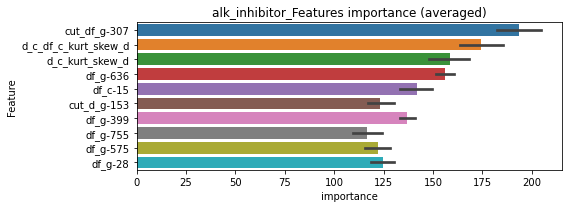

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.00043966	valid_1's binary_logloss: 0.0124793


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000492235	valid_1's binary_logloss: 0.00733149


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000464329	valid_1's binary_logloss: 0.00421763


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000444749	valid_1's binary_logloss: 0.00404459


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 alk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000491082	valid_1's binary_logloss: 0.00516145


alk_inhibitor logloss: 0.0066480865319156575
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000224844	valid_1's binary_logloss: 0.000606178
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000222141	valid_1's binary_logloss: 0.00106934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000225735	valid_1's binary_logloss: 0.00225158
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00022607	valid_1's binary_logloss: 0.000696985
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008839, Threshold: 0.0036604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0036604, conf_0:0.00256, conf_1:0.00476
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0336604
threshold: 0.0336604, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000224026	valid_1's binary_logloss: 0.00146403


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000212066	valid_1's binary_logloss: 0.000518645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000209462	valid_1's binary_logloss: 0.00162272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000209189	valid_1's binary_logloss: 0.00321595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00020733	valid_1's binary_logloss: 0.000395962
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258485, Threshold: 0.0336604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00050
Num_p_label: 17.0, Expected: 2.0, Threshold: 0.0336604, conf_0:0.02693, conf_1:0.04039
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0636604
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0936604
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1236604


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000208447	valid_1's binary_logloss: 0.000631724


threshold: 0.1236604, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000212066	valid_1's binary_logloss: 0.000518645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000209462	valid_1's binary_logloss: 0.00162272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000209189	valid_1's binary_logloss: 0.00321595
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00020733	valid_1's binary_logloss: 0.000395962
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258485, Threshold: 0.1236604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1236604, conf_0:0.11129, conf_1:0.13603
threshold: 0.1236604, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000208447	valid_1's binary_logloss: 0.000631724


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


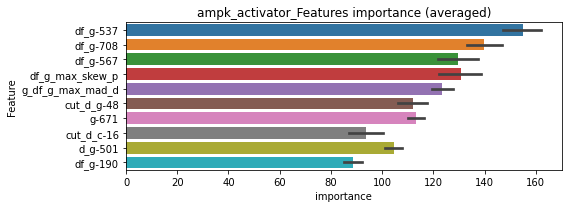

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 ampk_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 ampk_activator=================================


Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000212701	valid_1's binary_logloss: 0.000399412
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 ampk_activator=================================


Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000208379	valid_1's binary_logloss: 0.00132339
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 ampk_activator=================================


Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000214121	valid_1's binary_logloss: 0.00251352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000209069	valid_1's binary_logloss: 0.00042111


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 ampk_activator=================================


Training until validation scores don't improve for 29 rounds


ampk_activator logloss: 0.0010037641788527732


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000211905	valid_1's binary_logloss: 0.000361758


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000236357	valid_1's binary_logloss: 0.000609747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000232911	valid_1's binary_logloss: 0.000978673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000235565	valid_1's binary_logloss: 0.000308659
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000234994	valid_1's binary_logloss: 0.000342068
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010875, Threshold: 0.0172057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0172057, conf_0:0.01204, conf_1:0.02237
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.0472057
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0772057
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.1072057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_4: 0.1372057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1672057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.1972057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.2272057


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000233825	valid_1's binary_logloss: 0.000393544


Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2572057
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.2872057
threshold: 0.2872057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000225244	valid_1's binary_logloss: 0.000316896
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000224802	valid_1's binary_logloss: 0.00100352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000224357	valid_1's binary_logloss: 0.000359257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000226217	valid_1's binary_logloss: 0.000281873
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1174532, Threshold: 0.2872057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050
Num_p_label: 10.0, Expected: 2.0, Threshold: 0.2872057, conf_0:0.22976, conf_1:0.34465
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.3172057
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_2: 0.3472057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.3772057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.4072057
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.4372057
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4672057
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.4972057


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000224854	valid_1's binary_logloss: 0.000436179


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5272057
threshold: 0.5272057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000225244	valid_1's binary_logloss: 0.000316896
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000224802	valid_1's binary_logloss: 0.00100352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000224357	valid_1's binary_logloss: 0.000359257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000226217	valid_1's binary_logloss: 0.000281873
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1174532, Threshold: 0.5272057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5272057, conf_0:0.47449, conf_1:0.57993
threshold: 0.5272057, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000224854	valid_1's binary_logloss: 0.000436179


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


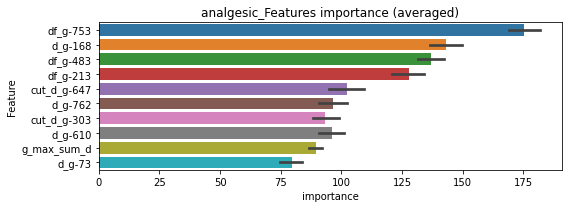

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 analgesic=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 analgesic=================================


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000224112	valid_1's binary_logloss: 0.000329228
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 analgesic=================================


Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000225182	valid_1's binary_logloss: 0.000422004
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 analgesic=================================


Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000224924	valid_1's binary_logloss: 0.000301812
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 analgesic=================================


Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000226211	valid_1's binary_logloss: 0.000312185
Training until validation scores don't improve for 29 rounds


analgesic logloss: 0.0003568506428045946


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.00022653	valid_1's binary_logloss: 0.000419046


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000525657	valid_1's binary_logloss: 0.0137722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000472813	valid_1's binary_logloss: 0.019619
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000483914	valid_1's binary_logloss: 0.00298908
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000504239	valid_1's binary_logloss: 0.00163091
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000653339	valid_1's binary_logloss: 0.0191096


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0038106, Threshold: 0.0086663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0086663, conf_0:0.00607, conf_1:0.01127
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0386663
threshold: 0.0386663, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000464934	valid_1's binary_logloss: 0.0167487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000463123	valid_1's binary_logloss: 0.00510365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000484682	valid_1's binary_logloss: 0.0145102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000464498	valid_1's binary_logloss: 0.00218612
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000529534	valid_1's binary_logloss: 0.0201019


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211232, Threshold: 0.0386663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0386663, conf_0:0.03093, conf_1:0.04640
threshold: 0.0386663, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000464934	valid_1's binary_logloss: 0.0167487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000463123	valid_1's binary_logloss: 0.00510365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000484682	valid_1's binary_logloss: 0.0145102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000464498	valid_1's binary_logloss: 0.00218612
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000529534	valid_1's binary_logloss: 0.0201019


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211232, Threshold: 0.0386663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, Expected: 8.0, Threshold: 0.0386663, conf_0:0.03480, conf_1:0.04253
threshold: 0.0386663, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


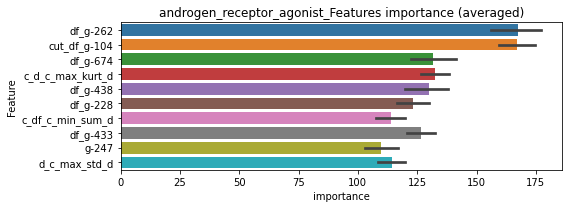

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000592467	valid_1's binary_logloss: 0.01742


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000604043	valid_1's binary_logloss: 0.00566546


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000523917	valid_1's binary_logloss: 0.0146594


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000477496	valid_1's binary_logloss: 0.00213938


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 androgen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


androgen_receptor_agonist logloss: 0.012299178449590876


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000824846	valid_1's binary_logloss: 0.0216106


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00097348	valid_1's binary_logloss: 0.057895
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000667519	valid_1's binary_logloss: 0.0307684
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00121947	valid_1's binary_logloss: 0.0455209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00106438	valid_1's binary_logloss: 0.0319287
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000682414	valid_1's binary_logloss: 0.0303146


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0081194, Threshold: 0.0299492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0299492, conf_0:0.02096, conf_1:0.03893
Num_p_label: 15.0, Expected: 14.9, Adj_threshold_1: 0.0599492
threshold: 0.0599492, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3782, y_label_rate: 0.1710735
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000732797	valid_1's binary_logloss: 0.0335639
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000954531	valid_1's binary_logloss: 0.0298157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.0011137	valid_1's binary_logloss: 0.0425639
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00124466	valid_1's binary_logloss: 0.0344389
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00116664	valid_1's binary_logloss: 0.0299519


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0305081, Threshold: 0.0599492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 640.0/3768
p_label_rate: 0.0115520 Vs.target_rate: 0.00374
Num_p_label: 46.0, Expected: 14.9, Threshold: 0.0599492, conf_0:0.04796, conf_1:0.07194
Num_p_label: 32.0, Expected: 14.9, Adj_threshold_1: 0.0899492
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.1199492
threshold: 0.1199492, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000680545	valid_1's binary_logloss: 0.043797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000677233	valid_1's binary_logloss: 0.0301865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000776197	valid_1's binary_logloss: 0.0299074
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000606351	valid_1's binary_logloss: 0.0174225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.00068059	valid_1's binary_logloss: 0.020097


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0389452, Threshold: 0.1199492, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 636.0/3760
p_label_rate: 0.0052737 Vs.target_rate: 0.00374
Num_p_label: 21.0, Expected: 14.9, Threshold: 0.1199492, conf_0:0.10795, conf_1:0.13194
threshold: 0.1199492, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 636.0/3760, y_label_rate: 0.1691489


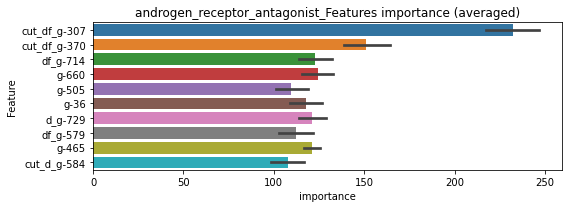

len(train_index) : 3008
len(valid_index) : 752
================================= fold 1/5 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3008
len(valid_index) : 752
================================= fold 2/5 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00147192	valid_1's binary_logloss: 0.0465351
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000657725	valid_1's binary_logloss: 0.0114357


len(train_index) : 3008
len(valid_index) : 752
================================= fold 3/5 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3008
len(valid_index) : 752
================================= fold 4/5 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00126258	valid_1's binary_logloss: 0.0287293
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000627708	valid_1's binary_logloss: 0.0168817
Early stopping, best iteration is:
[1076]	training's binary_logloss: 0.00060695	valid_1's binary_logloss: 0.0167738


len(train_index) : 3008
len(valid_index) : 752
================================= fold 5/5 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00101632	valid_1's binary_logloss: 0.02166


androgen_receptor_antagonist logloss: 0.02503219171451385
anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0224372	valid_1's binary_logloss: 0.0667334
[2000]	training's binary_logloss: 0.010792	valid_1's binary_logloss: 0.0556762
[3000]	training's binary_logloss: 0.00706264	valid_1's binary_logloss: 0.0513642
Early stopping, best iteration is:
[2996]	training's binary_logloss: 0.0070714	valid_1's binary_logloss: 0.0513368
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0226601	valid_1's binary_logloss: 0.063516
[2000]	training's binary_logloss: 0.0108645	valid_1's binary_logloss: 0.0517114
Early stopping, best iteration is:
[2872]	training's binary_logloss: 0.00746303	valid_1's binary_logloss: 0.0473648
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0220936	valid_1's binary_logloss: 0.0798976
[2000]	training's binary_logloss: 0.0106682	valid_1's binary_logloss: 0.0703853
Early stopping, best iterat

1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0279837, Threshold: 0.0524685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0524685, conf_0:0.03673, conf_1:0.06821
Num_p_label: 9.0, Expected: 13.4, Adj_threshold_1: 0.0824685
threshold: 0.0824685, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0208794	valid_1's binary_logloss: 0.0580781
[2000]	training's binary_logloss: 0.010048	valid_1's binary_logloss: 0.0470745
Early stopping, best iteration is:
[2527]	training's binary_logloss: 0.00791511	valid_1's binary_logloss: 0.0442915
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0213045	valid_1's binary_logloss: 0.0557208
[2000]	training's binary_logloss: 0.0102985	valid_1's binary_logloss: 0.042591
[3000]	training's binary_logloss: 0.00678615	valid_1's binary_logloss: 0.037783
Early stopping, best iteration is:
[3443]	training's binary_logloss: 0.00590544	valid_1's binary_logloss: 0.036452
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0209526	valid_1's binary_logloss: 0.0595305
[2000]	training's binary_logloss: 0.0100993	valid_1's binary_logloss: 0.0485363
[3000]	training's binary_log

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0647814, Threshold: 0.0824685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3774
p_label_rate: 0.0060271 Vs.target_rate: 0.00336
Num_p_label: 24.0, Expected: 13.4, Threshold: 0.0824685, conf_0:0.06597, conf_1:0.09896
Num_p_label: 9.0, Expected: 13.4, Adj_threshold_1: 0.1124685
threshold: 0.1124685, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 644.0/3774, y_label_rate: 0.1706412
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0203367	valid_1's binary_logloss: 0.063124
[2000]	training's binary_logloss: 0.00983769	valid_1's binary_logloss: 0.0514898
Early stopping, best iteration is:
[2798]	training's binary_logloss: 0.00697771	valid_1's binary_logloss: 0.0476684
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0207929	valid_1's binary_logloss: 0.052941
[2000]	training's binary_logloss: 0.0100577	valid_1's binary_logloss: 0.040692
[3000]	training's binary_logloss: 0.00663383	valid_1's binary_logloss: 0.0358564
Early stopping, best iteration is:
[3779]	training's binary_logloss: 0.00525303	valid_1's binary_logloss: 0.0337163
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0203106	valid_1's binary_logloss: 0.0611912
[2000]	training's binary_logloss: 0.00988016	valid_1's binary_logloss: 0.0516111
[3000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0557642, Threshold: 0.1124685, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 639.0/3764
p_label_rate: 0.0032647 Vs.target_rate: 0.00336
Num_p_label: 13.0, Expected: 13.4, Threshold: 0.1124685, conf_0:0.10122, conf_1:0.12372
threshold: 0.1124685, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 639.0/3764, y_label_rate: 0.1697662


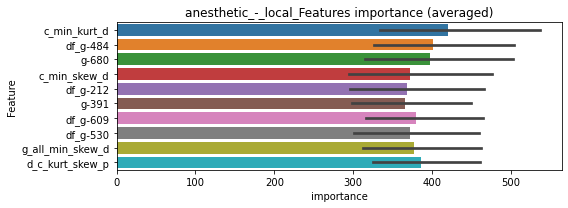

len(train_index) : 3011
len(valid_index) : 753
================================= fold 1/5 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0372009	valid_1's binary_logloss: 0.0768311
[2000]	training's binary_logloss: 0.0185171	valid_1's binary_logloss: 0.0592713
[3000]	training's binary_logloss: 0.0122621	valid_1's binary_logloss: 0.0525339
[4000]	training's binary_logloss: 0.00917795	valid_1's binary_logloss: 0.0490051
Early stopping, best iteration is:
[4556]	training's binary_logloss: 0.00806255	valid_1's binary_logloss: 0.0479105


len(train_index) : 3011
len(valid_index) : 753
================================= fold 2/5 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0376789	valid_1's binary_logloss: 0.0681033
[2000]	training's binary_logloss: 0.0188646	valid_1's binary_logloss: 0.0484794
[3000]	training's binary_logloss: 0.0124957	valid_1's binary_logloss: 0.0409929
[4000]	training's binary_logloss: 0.00932406	valid_1's binary_logloss: 0.0371136
[5000]	training's binary_logloss: 0.00746275	valid_1's binary_logloss: 0.0349331
[6000]	training's binary_logloss: 0.00623125	valid_1's binary_logloss: 0.0332321
Early stopping, best iteration is:
[6034]	training's binary_logloss: 0.00619516	valid_1's binary_logloss: 0.0331577


len(train_index) : 3011
len(valid_index) : 753
================================= fold 3/5 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0366298	valid_1's binary_logloss: 0.0800771
[2000]	training's binary_logloss: 0.0183674	valid_1's binary_logloss: 0.0606577
[3000]	training's binary_logloss: 0.0121663	valid_1's binary_logloss: 0.0535362
[4000]	training's binary_logloss: 0.00910623	valid_1's binary_logloss: 0.049726
Early stopping, best iteration is:
[4743]	training's binary_logloss: 0.00768191	valid_1's binary_logloss: 0.047997


len(train_index) : 3011
len(valid_index) : 753
================================= fold 4/5 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0390388	valid_1's binary_logloss: 0.0537916
[2000]	training's binary_logloss: 0.0195844	valid_1's binary_logloss: 0.0328679
[3000]	training's binary_logloss: 0.0129344	valid_1's binary_logloss: 0.025283
[4000]	training's binary_logloss: 0.00968253	valid_1's binary_logloss: 0.0213516
[5000]	training's binary_logloss: 0.00774456	valid_1's binary_logloss: 0.0188356
[6000]	training's binary_logloss: 0.00645575	valid_1's binary_logloss: 0.0170339
[7000]	training's binary_logloss: 0.00554749	valid_1's binary_logloss: 0.0157341
[8000]	training's binary_logloss: 0.00488014	valid_1's binary_logloss: 0.0147605
[9000]	training's binary_logloss: 0.00436284	valid_1's binary_logloss: 0.0139753
[10000]	training's binary_logloss: 0.00394754	valid_1's binary_logloss: 0.0133175
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00394754	valid_1's binary_logloss: 0.0133175


len(train_index) : 3012
len(valid_index) : 752
================================= fold 5/5 anesthetic_-_local=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0380806	valid_1's binary_logloss: 0.0631739
[2000]	training's binary_logloss: 0.0189962	valid_1's binary_logloss: 0.0449468
[3000]	training's binary_logloss: 0.0125722	valid_1's binary_logloss: 0.0382233
[4000]	training's binary_logloss: 0.00936387	valid_1's binary_logloss: 0.0348219
[5000]	training's binary_logloss: 0.00748339	valid_1's binary_logloss: 0.0327678
[6000]	training's binary_logloss: 0.00624715	valid_1's binary_logloss: 0.0311991
Early stopping, best iteration is:
[6861]	training's binary_logloss: 0.00548146	valid_1's binary_logloss: 0.0301921


anesthetic_-_local logloss: 0.03451613170092176
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000382359	valid_1's binary_logloss: 0.00535882
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000397149	valid_1's binary_logloss: 0.0127756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000397482	valid_1's binary_logloss: 0.00102512
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000431342	valid_1's binary_logloss: 0.0061865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000375272	valid_1's binary_logloss: 0.00214046


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025745, Threshold: 0.0133340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0133340, conf_0:0.00933, conf_1:0.01733
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0433340
threshold: 0.0433340, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000377673	valid_1's binary_logloss: 0.00527283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000373416	valid_1's binary_logloss: 0.00985029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000381506	valid_1's binary_logloss: 0.00102497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000490312	valid_1's binary_logloss: 0.00558904
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000378514	valid_1's binary_logloss: 0.0016172


y_Threshold: 0.0337676, Threshold: 0.0433340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0118031 Vs.target_rate: 0.00151
Num_p_label: 47.0, Expected: 6.0, Threshold: 0.0433340, conf_0:0.03467, conf_1:0.05200
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_1: 0.0733340
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.1033340
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1333340
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.1633340
threshold: 0.1633340, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000377673	valid_1's binary_logloss: 0.00527283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000373416	valid_1's binary_logloss: 0.00985029
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000381506	valid_1's binary_logloss: 0.00102497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000490312	valid_1's binary_logloss: 0.00558904
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000378514	valid_1's binary_logloss: 0.0016172


y_Threshold: 0.0337676, Threshold: 0.1633340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.1633340, conf_0:0.14700, conf_1:0.17967
threshold: 0.1633340, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


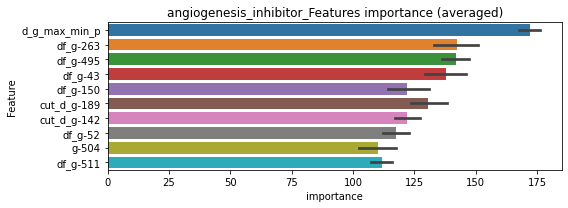

len(train_index) : 3043
len(valid_index) : 761
================================= fold 1/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000383098	valid_1's binary_logloss: 0.00379228


len(train_index) : 3043
len(valid_index) : 761
================================= fold 2/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000412049	valid_1's binary_logloss: 0.00955262


len(train_index) : 3043
len(valid_index) : 761
================================= fold 3/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000386612	valid_1's binary_logloss: 0.00117478


len(train_index) : 3043
len(valid_index) : 761
================================= fold 4/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3044
len(valid_index) : 760


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000448855	valid_1's binary_logloss: 0.00794865


================================= fold 5/5 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000383605	valid_1's binary_logloss: 0.00192934


angiogenesis_inhibitor logloss: 0.0048810037861710285
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000426609	valid_1's binary_logloss: 0.00668778
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00038376	valid_1's binary_logloss: 0.00389919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000393307	valid_1's binary_logloss: 0.00492966
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000399107	valid_1's binary_logloss: 0.00754782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000388165	valid_1's binary_logloss: 0.00307159


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025196, Threshold: 0.0100202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0100202, conf_0:0.00701, conf_1:0.01303
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0400202
threshold: 0.0400202, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399373	valid_1's binary_logloss: 0.00590195
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000376016	valid_1's binary_logloss: 0.00322346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000378235	valid_1's binary_logloss: 0.00475384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000393034	valid_1's binary_logloss: 0.00665733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000377518	valid_1's binary_logloss: 0.00272314


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215069, Threshold: 0.0400202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0400202, conf_0:0.03202, conf_1:0.04802
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0700202
threshold: 0.0700202, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399373	valid_1's binary_logloss: 0.00590195
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000376016	valid_1's binary_logloss: 0.00322346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000378235	valid_1's binary_logloss: 0.00475384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000393034	valid_1's binary_logloss: 0.00665733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000377518	valid_1's binary_logloss: 0.00272314


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215069, Threshold: 0.0700202, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00155
Num_p_label: 14.0, Expected: 6.2, Threshold: 0.0700202, conf_0:0.06302, conf_1:0.07702
threshold: 0.0700202, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


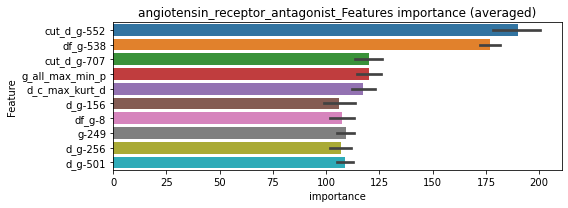

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000386264	valid_1's binary_logloss: 0.00526654


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000378747	valid_1's binary_logloss: 0.00295662
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000377561	valid_1's binary_logloss: 0.00295402


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000375586	valid_1's binary_logloss: 0.0031764
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000373019	valid_1's binary_logloss: 0.00317015


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000505163	valid_1's binary_logloss: 0.00758439
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000390902	valid_1's binary_logloss: 0.00245495


angiotensin_receptor_antagonist logloss: 0.00428641459737324
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00102806	valid_1's binary_logloss: 0.0246129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000634535	valid_1's binary_logloss: 0.0234257
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000805423	valid_1's binary_logloss: 0.0239979
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00106808	valid_1's binary_logloss: 0.0275465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000700163	valid_1's binary_logloss: 0.0268445


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0070375, Threshold: 0.0709075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0709075, conf_0:0.04964, conf_1:0.09218
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.1009075
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1309075
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1609075
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1909075
threshold: 0.1909075, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000820247	valid_1's binary_logloss: 0.0242177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00062259	valid_1's binary_logloss: 0.0175215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000779333	valid_1's binary_logloss: 0.0214205
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000604904	valid_1's binary_logloss: 0.0157629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000654837	valid_1's binary_logloss: 0.0239213


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0356141, Threshold: 0.1909075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0107986 Vs.target_rate: 0.00307
Num_p_label: 43.0, Expected: 12.2, Threshold: 0.1909075, conf_0:0.15273, conf_1:0.22909
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_1: 0.2209075
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_2: 0.2509075
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.2809075
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.3109075
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_5: 0.3409075
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_6: 0.3709075
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_7: 0.4009075
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4309075
threshold: 0.4309075, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000932394	valid_1's binary_logloss: 0.032186
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00111312	valid_1's binary_logloss: 0.0329738
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000563173	valid_1's binary_logloss: 0.010129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000584387	valid_1's binary_logloss: 0.0172408
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000615296	valid_1's binary_logloss: 0.0232919


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0293371, Threshold: 0.4309075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, Expected: 12.2, Threshold: 0.4309075, conf_0:0.38782, conf_1:0.47400
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_1: 0.4609075
threshold: 0.4609075, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3783, y_label_rate: 0.1710283


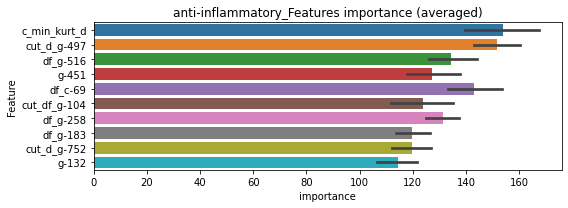

len(train_index) : 3026
len(valid_index) : 757
================================= fold 1/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3026
len(valid_index) : 757
================================= fold 2/5 anti-inflammatory=================================


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00124545	valid_1's binary_logloss: 0.0363514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000745158	valid_1's binary_logloss: 0.0150815


len(train_index) : 3026
len(valid_index) : 757
================================= fold 3/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000701169	valid_1's binary_logloss: 0.0155048


len(train_index) : 3027
len(valid_index) : 756
================================= fold 4/5 anti-inflammatory=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3027
len(valid_index) : 756
================================= fold 5/5 anti-inflammatory=================================


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000953843	valid_1's binary_logloss: 0.0228175
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000718604	valid_1's binary_logloss: 0.0203272


anti-inflammatory logloss: 0.02201672773794677
antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000339915	valid_1's binary_logloss: 0.00198467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000350508	valid_1's binary_logloss: 0.00316876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000342395	valid_1's binary_logloss: 0.00105333
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00034162	valid_1's binary_logloss: 0.00327788
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016565, Threshold: 0.0050388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0050388, conf_0:0.00353, conf_1:0.00655
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_1: 0.0350388


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000374759	valid_1's binary_logloss: 0.00300905


threshold: 0.0350388, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000347106	valid_1's binary_logloss: 0.00175155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00033429	valid_1's binary_logloss: 0.00293417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000335507	valid_1's binary_logloss: 0.000682183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000343931	valid_1's binary_logloss: 0.00248348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000338323	valid_1's binary_logloss: 0.00192864


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0542973, Threshold: 0.0350388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0350388, conf_0:0.02803, conf_1:0.04205
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0650388
threshold: 0.0650388, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000347106	valid_1's binary_logloss: 0.00175155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00033429	valid_1's binary_logloss: 0.00293417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000335507	valid_1's binary_logloss: 0.000682183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000343931	valid_1's binary_logloss: 0.00248348
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0542973, Threshold: 0.0650388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0650388, conf_0:0.05853, conf_1:0.07154


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000338323	valid_1's binary_logloss: 0.00192864


threshold: 0.0650388, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


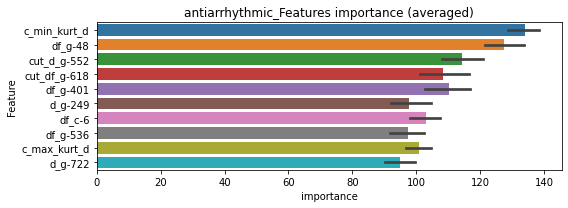

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3045


Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000364455	valid_1's binary_logloss: 0.00190098


len(valid_index) : 762
================================= fold 2/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000340451	valid_1's binary_logloss: 0.00324662


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000339359	valid_1's binary_logloss: 0.000740958


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000338369	valid_1's binary_logloss: 0.00185858


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 antiarrhythmic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000346954	valid_1's binary_logloss: 0.00171038


antiarrhythmic logloss: 0.0018927329525284355
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000470165	valid_1's binary_logloss: 0.00700503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000562024	valid_1's binary_logloss: 0.0139136
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00045929	valid_1's binary_logloss: 0.0015206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000459532	valid_1's binary_logloss: 0.00454099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00048212	valid_1's binary_logloss: 0.00865861


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036390, Threshold: 0.0296298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0296298, conf_0:0.02074, conf_1:0.03852
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_1: 0.0596298
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_2: 0.0896298
threshold: 0.0896298, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000453484	valid_1's binary_logloss: 0.0064322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0109601
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443042	valid_1's binary_logloss: 0.00126516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443031	valid_1's binary_logloss: 0.00395764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000436207	valid_1's binary_logloss: 0.00819382


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211486, Threshold: 0.0896298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0087896 Vs.target_rate: 0.00181
Num_p_label: 35.0, Expected: 7.2, Threshold: 0.0896298, conf_0:0.07170, conf_1:0.10756
Num_p_label: 29.0, Expected: 7.2, Adj_threshold_1: 0.1196298
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_2: 0.1496298
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1796298
threshold: 0.1796298, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000453484	valid_1's binary_logloss: 0.0064322
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0109601
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443042	valid_1's binary_logloss: 0.00126516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000443031	valid_1's binary_logloss: 0.00395764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000436207	valid_1's binary_logloss: 0.00819382


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211486, Threshold: 0.1796298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1796298, conf_0:0.16167, conf_1:0.19759
threshold: 0.1796298, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


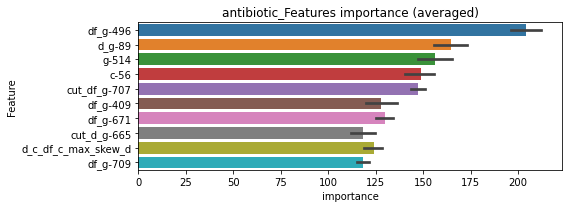

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000449371	valid_1's binary_logloss: 0.00617101


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000613741	valid_1's binary_logloss: 0.0105879


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000446483	valid_1's binary_logloss: 0.00132183


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000451983	valid_1's binary_logloss: 0.00386561


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 antibiotic=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000526861	valid_1's binary_logloss: 0.00920865


antibiotic logloss: 0.00623119821836347
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000263847	valid_1's binary_logloss: 0.00183526
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000254951	valid_1's binary_logloss: 0.00159161
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000250241	valid_1's binary_logloss: 0.00161636
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00061044	valid_1's binary_logloss: 0.01054
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013624, Threshold: 0.0044955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0044955, conf_0:0.00315, conf_1:0.00584
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0344955


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000257361	valid_1's binary_logloss: 0.00118404


threshold: 0.0344955, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00025494	valid_1's binary_logloss: 0.000884923
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00025659	valid_1's binary_logloss: 0.00192787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000249863	valid_1's binary_logloss: 0.000955926
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.000846918	valid_1's binary_logloss: 0.0109144
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0114939, Threshold: 0.0344955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0344955, conf_0:0.02760, conf_1:0.04139


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000250718	valid_1's binary_logloss: 0.00166016


threshold: 0.0344955, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000245538	valid_1's binary_logloss: 0.000759446
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000250027	valid_1's binary_logloss: 0.00340125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000245579	valid_1's binary_logloss: 0.000388636
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000516865	valid_1's binary_logloss: 0.00306427
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0259550, Threshold: 0.0344955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0344955, conf_0:0.03105, conf_1:0.03795


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000251974	valid_1's binary_logloss: 0.00358097


threshold: 0.0344955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


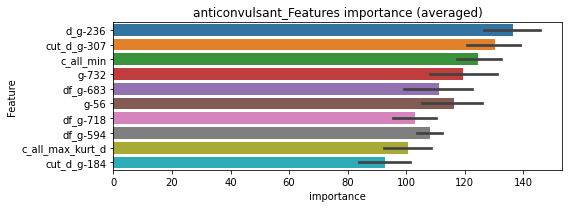

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000247352	valid_1's binary_logloss: 0.000543995
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000247469	valid_1's binary_logloss: 0.000543928


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 anticonvulsant=================================


Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000260541	valid_1's binary_logloss: 0.00305919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000249017	valid_1's binary_logloss: 0.000388127


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 anticonvulsant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 anticonvulsant=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000381128	valid_1's binary_logloss: 0.0037442
Training until validation scores don't improve for 29 rounds


anticonvulsant logloss: 0.0020635266948656767


Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000269357	valid_1's binary_logloss: 0.00258412


antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000311767	valid_1's binary_logloss: 0.00159467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000318428	valid_1's binary_logloss: 0.00460677
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000323765	valid_1's binary_logloss: 0.000573792
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000323591	valid_1's binary_logloss: 0.00287743
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014852, Threshold: 0.0043999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000320889	valid_1's binary_logloss: 0.00436508


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0043999, conf_0:0.00308, conf_1:0.00572
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0343999
threshold: 0.0343999, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000308207	valid_1's binary_logloss: 0.00136032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000306878	valid_1's binary_logloss: 0.00316239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000312095	valid_1's binary_logloss: 0.000544968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000311389	valid_1's binary_logloss: 0.00362237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00030632	valid_1's binary_logloss: 0.00306149


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269829, Threshold: 0.0343999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0343999, conf_0:0.02752, conf_1:0.04128
threshold: 0.0343999, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000308207	valid_1's binary_logloss: 0.00136032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000306878	valid_1's binary_logloss: 0.00316239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000312095	valid_1's binary_logloss: 0.000544968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000311389	valid_1's binary_logloss: 0.00362237
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269829, Threshold: 0.0343999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00030632	valid_1's binary_logloss: 0.00306149


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0343999, conf_0:0.03096, conf_1:0.03784
threshold: 0.0343999, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


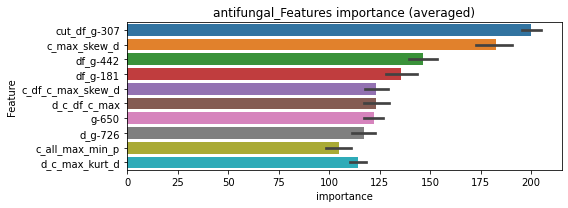

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000317788	valid_1's binary_logloss: 0.0019286


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00030866	valid_1's binary_logloss: 0.00281604


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000312821	valid_1's binary_logloss: 0.000563085
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000312821	valid_1's binary_logloss: 0.000563085


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000344464	valid_1's binary_logloss: 0.00291645


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 antifungal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.00031302	valid_1's binary_logloss: 0.00265078


antifungal logloss: 0.0021756763838260305
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000287087	valid_1's binary_logloss: 0.00121079
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000287342	valid_1's binary_logloss: 0.00313406
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000298948	valid_1's binary_logloss: 0.0038608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000289807	valid_1's binary_logloss: 0.000636196
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014078, Threshold: 0.1159494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1159494, conf_0:0.08116, conf_1:0.15073
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1459494
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1759494
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_3: 0.2059494


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000282809	valid_1's binary_logloss: 0.00308954


Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.2359494
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_5: 0.2659494
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_6: 0.2959494
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3259494
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_8: 0.3559494
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3859494
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4159494
threshold: 0.4159494, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000268193	valid_1's binary_logloss: 0.000532848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000271679	valid_1's binary_logloss: 0.00269748
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000275441	valid_1's binary_logloss: 0.00201524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000274128	valid_1's binary_logloss: 0.000525564
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0775845, Threshold: 0.4159494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4159494, conf_0:0.33276, conf_1:0.49914
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4459494
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_2: 0.4759494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_3: 0.5059494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5359494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5659494
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.5959494


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000276283	valid_1's binary_logloss: 0.00212905


Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6259494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6559494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6859494
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7159494
threshold: 0.7159494, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000268193	valid_1's binary_logloss: 0.000532848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000271679	valid_1's binary_logloss: 0.00269748
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000275441	valid_1's binary_logloss: 0.00201524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000274128	valid_1's binary_logloss: 0.000525564
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0775845, Threshold: 0.7159494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7159494, conf_0:0.64435, conf_1:0.78754
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.7459494
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_2: 0.7759494
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_3: 0.8059494
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_4: 0.8359494
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.8659494


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000276283	valid_1's binary_logloss: 0.00212905


Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.8959494
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.9259494
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9559494
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.9859494
threshold: 0.9859494, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


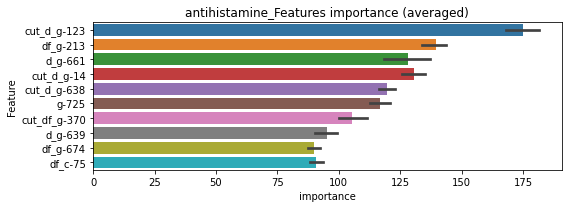

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 antihistamine=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000275814	valid_1's binary_logloss: 0.000575385


================================= fold 2/5 antihistamine=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 antihistamine=================================


Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000280188	valid_1's binary_logloss: 0.00158669
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000274376	valid_1's binary_logloss: 0.000989347


================================= fold 4/5 antihistamine=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000276824	valid_1's binary_logloss: 0.000528299


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 antihistamine=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000290934	valid_1's binary_logloss: 0.00198854


antihistamine logloss: 0.0011335909079015025
antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000306503	valid_1's binary_logloss: 0.000745845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000296422	valid_1's binary_logloss: 0.000821026
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000297354	valid_1's binary_logloss: 0.00532852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000299601	valid_1's binary_logloss: 0.00122494
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016457, Threshold: 0.0080600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0080600, conf_0:0.00564, conf_1:0.01048
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.0380600
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0680600


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000341686	valid_1's binary_logloss: 0.00381286


threshold: 0.0680600, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000290455	valid_1's binary_logloss: 0.00106572
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000288368	valid_1's binary_logloss: 0.000632957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000289531	valid_1's binary_logloss: 0.00214497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000289787	valid_1's binary_logloss: 0.000755382
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0807208, Threshold: 0.0680600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0680600, conf_0:0.05445, conf_1:0.08167
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0980600
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.1280600
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1580600
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.1880600
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.2180600
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2480600
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2780600


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000296133	valid_1's binary_logloss: 0.00236393


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3080600
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.3380600
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.3680600
threshold: 0.3680600, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000290455	valid_1's binary_logloss: 0.00106572
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000288368	valid_1's binary_logloss: 0.000632957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000289531	valid_1's binary_logloss: 0.00214497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000289787	valid_1's binary_logloss: 0.000755382
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0807208, Threshold: 0.3680600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.3680600, conf_0:0.33125, conf_1:0.40487
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.3980600


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000296133	valid_1's binary_logloss: 0.00236393


threshold: 0.3980600, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


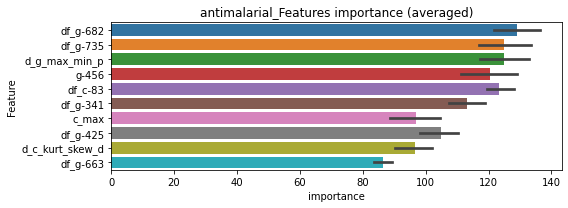

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 antimalarial=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763


Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000286646	valid_1's binary_logloss: 0.000739142


================================= fold 2/5 antimalarial=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000287221	valid_1's binary_logloss: 0.000806254


================================= fold 3/5 antimalarial=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 antimalarial=================================


Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000288239	valid_1's binary_logloss: 0.00167543
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 antimalarial=================================


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000289486	valid_1's binary_logloss: 0.00060407
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000290561	valid_1's binary_logloss: 0.00108189


antimalarial logloss: 0.0009812636785593901
antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000811012	valid_1's binary_logloss: 0.0369492
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000775372	valid_1's binary_logloss: 0.0198172
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000679389	valid_1's binary_logloss: 0.0222983
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000675636	valid_1's binary_logloss: 0.00944503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00125258	valid_1's binary_logloss: 0.0409605


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0067531, Threshold: 0.0239230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0239230, conf_0:0.01675, conf_1:0.03110
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_1: 0.0539230
threshold: 0.0539230, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00110689	valid_1's binary_logloss: 0.0467694
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000583984	valid_1's binary_logloss: 0.0117469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000727291	valid_1's binary_logloss: 0.0253245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000754502	valid_1's binary_logloss: 0.0227721
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000806156	valid_1's binary_logloss: 0.0353527


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0230554, Threshold: 0.0539230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0090407 Vs.target_rate: 0.00307
Num_p_label: 36.0, Expected: 12.2, Threshold: 0.0539230, conf_0:0.04314, conf_1:0.06471
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_1: 0.0839230
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.1139230
threshold: 0.1139230, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00133108	valid_1's binary_logloss: 0.0460901
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000637646	valid_1's binary_logloss: 0.0190185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00081671	valid_1's binary_logloss: 0.0324394
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000566404	valid_1's binary_logloss: 0.00745415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000595416	valid_1's binary_logloss: 0.0218985


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0234568, Threshold: 0.1139230, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1139230, conf_0:0.10253, conf_1:0.12532
threshold: 0.1139230, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


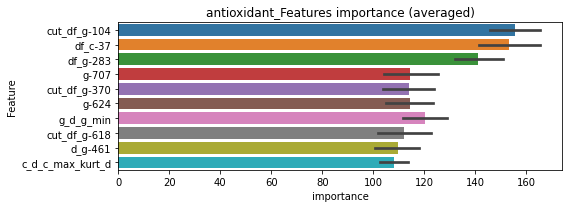

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 antioxidant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 antioxidant=================================


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00164975	valid_1's binary_logloss: 0.0416012
Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 antioxidant=================================


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000867842	valid_1's binary_logloss: 0.026086
Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000870857	valid_1's binary_logloss: 0.0261911


================================= fold 4/5 antioxidant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000771267	valid_1's binary_logloss: 0.0167272


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 antioxidant=================================


Training until validation scores don't improve for 29 rounds


antioxidant logloss: 0.029870727094578352


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.0020885	valid_1's binary_logloss: 0.0387327


antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00039006	valid_1's binary_logloss: 0.00222699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00039347	valid_1's binary_logloss: 0.00609627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000410514	valid_1's binary_logloss: 0.0010348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00039468	valid_1's binary_logloss: 0.00150203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000396124	valid_1's binary_logloss: 0.00534996


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030366, Threshold: 0.0107520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0107520, conf_0:0.00753, conf_1:0.01398
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0407520
threshold: 0.0407520, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000384398	valid_1's binary_logloss: 0.00182188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000383546	valid_1's binary_logloss: 0.00520942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000391138	valid_1's binary_logloss: 0.001198
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000388986	valid_1's binary_logloss: 0.00117444
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000383883	valid_1's binary_logloss: 0.00348951


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0706832, Threshold: 0.0407520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0407520, conf_0:0.03260, conf_1:0.04890
threshold: 0.0407520, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000384398	valid_1's binary_logloss: 0.00182188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000383546	valid_1's binary_logloss: 0.00520942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000391138	valid_1's binary_logloss: 0.001198
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000388986	valid_1's binary_logloss: 0.00117444
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000383883	valid_1's binary_logloss: 0.00348951


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0706832, Threshold: 0.0407520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0407520, conf_0:0.03668, conf_1:0.04483
threshold: 0.0407520, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


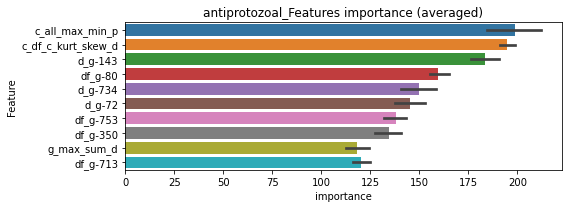

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000384436	valid_1's binary_logloss: 0.00184798
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.00038423	valid_1's binary_logloss: 0.00184768


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000392728	valid_1's binary_logloss: 0.0042492


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389475	valid_1's binary_logloss: 0.00117255
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000389701	valid_1's binary_logloss: 0.00117245


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000386631	valid_1's binary_logloss: 0.00126805
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000382007	valid_1's binary_logloss: 0.0012565


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 antiprotozoal=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000391794	valid_1's binary_logloss: 0.00416997


antiprotozoal logloss: 0.002539073907169599
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000293851	valid_1's binary_logloss: 0.00171954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000291445	valid_1's binary_logloss: 0.00122657
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000302496	valid_1's binary_logloss: 0.00069946
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000293754	valid_1's binary_logloss: 0.000686963
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015185, Threshold: 0.0046049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0046049, conf_0:0.00322, conf_1:0.00599
Num_p_label: 1.0, Expected: 3.8, Adj_threshold_1: 0.0346049


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000291808	valid_1's binary_logloss: 0.00217948


threshold: 0.0346049, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000290287	valid_1's binary_logloss: 0.00188175
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000285177	valid_1's binary_logloss: 0.00123622
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000287139	valid_1's binary_logloss: 0.000528963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000287476	valid_1's binary_logloss: 0.000742276
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0813162, Threshold: 0.0346049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0346049, conf_0:0.02768, conf_1:0.04153


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000285531	valid_1's binary_logloss: 0.00176507


threshold: 0.0346049, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000290287	valid_1's binary_logloss: 0.00188175
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000285177	valid_1's binary_logloss: 0.00123622
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000287139	valid_1's binary_logloss: 0.000528963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000287476	valid_1's binary_logloss: 0.000742276
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0813162, Threshold: 0.0346049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0346049, conf_0:0.03114, conf_1:0.03807


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000285531	valid_1's binary_logloss: 0.00176507


threshold: 0.0346049, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


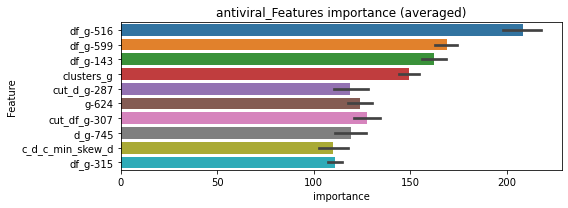

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000290466	valid_1's binary_logloss: 0.00132434


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000278681	valid_1's binary_logloss: 0.00105567
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000278284	valid_1's binary_logloss: 0.00105542


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000287111	valid_1's binary_logloss: 0.000549121


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000281646	valid_1's binary_logloss: 0.000531707
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000281646	valid_1's binary_logloss: 0.000531707


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 antiviral=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000285436	valid_1's binary_logloss: 0.00111694


antiviral logloss: 0.0009155820517458539
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000538947	valid_1's binary_logloss: 0.0119017
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000818795	valid_1's binary_logloss: 0.0360077
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000473197	valid_1's binary_logloss: 0.00684516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000469793	valid_1's binary_logloss: 0.0017316
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000539952	valid_1's binary_logloss: 0.0173986


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039457, Threshold: 0.0479760, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0479760, conf_0:0.03358, conf_1:0.06237
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_1: 0.0779760
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_2: 0.1079760
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_3: 0.1379760
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_4: 0.1679760
threshold: 0.1679760, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000477033	valid_1's binary_logloss: 0.0114827
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000883111	valid_1's binary_logloss: 0.0322493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000538164	valid_1's binary_logloss: 0.00557383
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000467803	valid_1's binary_logloss: 0.00168253
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000492755	valid_1's binary_logloss: 0.0147777


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0239591, Threshold: 0.1679760, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.1679760, conf_0:0.13438, conf_1:0.20157
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_1: 0.1979760
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_2: 0.2279760
Num_p_label: 26.0, Expected: 8.2, Adj_threshold_3: 0.2579760
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_4: 0.2879760
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_5: 0.3179760
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_6: 0.3479760
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_7: 0.3779760
threshold: 0.3779760, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000465459	valid_1's binary_logloss: 0.00465909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00081341	valid_1's binary_logloss: 0.0173627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000489892	valid_1's binary_logloss: 0.0134337
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000531016	valid_1's binary_logloss: 0.0104266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000482294	valid_1's binary_logloss: 0.00988367


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270644, Threshold: 0.3779760, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0055249 Vs.target_rate: 0.00206
Num_p_label: 22.0, Expected: 8.2, Threshold: 0.3779760, conf_0:0.34018, conf_1:0.41577
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_1: 0.4079760
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_2: 0.4379760
threshold: 0.4379760, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


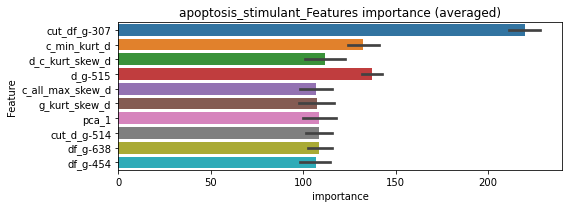

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000461084	valid_1's binary_logloss: 0.00732786


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 apoptosis_stimulant=================================


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000955571	valid_1's binary_logloss: 0.0227219
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000479272	valid_1's binary_logloss: 0.00839341


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 apoptosis_stimulant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 apoptosis_stimulant=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00078646	valid_1's binary_logloss: 0.00892085
Training until validation scores don't improve for 29 rounds


apoptosis_stimulant logloss: 0.013135825408815104


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000628644	valid_1's binary_logloss: 0.0183151


aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00078106	valid_1's binary_logloss: 0.0152154
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000490595	valid_1's binary_logloss: 0.0112418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000495486	valid_1's binary_logloss: 0.0160185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000717169	valid_1's binary_logloss: 0.010496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000460398	valid_1's binary_logloss: 0.00430153


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040284, Threshold: 0.0122023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0122023, conf_0:0.00854, conf_1:0.01586
Num_p_label: 9.0, Expected: 7.9, Adj_threshold_1: 0.0422023
threshold: 0.0422023, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000528233	valid_1's binary_logloss: 0.0139226
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000492235	valid_1's binary_logloss: 0.0105003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00050065	valid_1's binary_logloss: 0.0160243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000509045	valid_1's binary_logloss: 0.01014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000450395	valid_1's binary_logloss: 0.00370796


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158695, Threshold: 0.0422023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0422023, conf_0:0.03376, conf_1:0.05064
threshold: 0.0422023, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000708642	valid_1's binary_logloss: 0.0242038
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000460703	valid_1's binary_logloss: 0.00561526
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000465588	valid_1's binary_logloss: 0.00975568
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000457143	valid_1's binary_logloss: 0.00160541
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0161130, Threshold: 0.0422023, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000589709	valid_1's binary_logloss: 0.0122819


Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0047715 Vs.target_rate: 0.00197
Num_p_label: 19.0, Expected: 7.9, Threshold: 0.0422023, conf_0:0.03798, conf_1:0.04642
threshold: 0.0422023, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


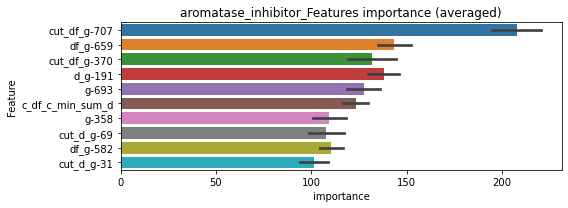

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000466141	valid_1's binary_logloss: 0.00327581


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000465565	valid_1's binary_logloss: 0.0176635


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000528292	valid_1's binary_logloss: 0.00491596


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 aromatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 aromatase_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000642163	valid_1's binary_logloss: 0.00540044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000498254	valid_1's binary_logloss: 0.00843159


aromatase_inhibitor logloss: 0.007937468847666766
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000142826	valid_1's binary_logloss: 0.000302348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00014735	valid_1's binary_logloss: 0.000150016
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000143346	valid_1's binary_logloss: 0.00151591
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000143395	valid_1's binary_logloss: 0.000164745
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003421, Threshold: 0.0013572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013572, conf_0:0.00095, conf_1:0.00176
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0313572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0613572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813572


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000143887	valid_1's binary_logloss: 0.000413395


Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113572
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413572
threshold: 0.2413572, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000137248	valid_1's binary_logloss: 0.000211054
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000136932	valid_1's binary_logloss: 0.000142588
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000138394	valid_1's binary_logloss: 0.000836001
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000136599	valid_1's binary_logloss: 0.000144296
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033718, Threshold: 0.2413572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.2413572, conf_0:0.19309, conf_1:0.28963
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.2713572
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013572
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313572
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.3913572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.4213572
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.4513572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4813572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.5113572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413572


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00013556	valid_1's binary_logloss: 0.00604046


threshold: 0.5413572, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000137248	valid_1's binary_logloss: 0.000211054
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000136932	valid_1's binary_logloss: 0.000142588
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000138394	valid_1's binary_logloss: 0.000836001
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000136599	valid_1's binary_logloss: 0.000144296
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033718, Threshold: 0.5413572, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413572, conf_0:0.48722, conf_1:0.59549
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5713572
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.6013572
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.6313572
threshold: 0.6313572, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00013556	valid_1's binary_logloss: 0.00604046


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


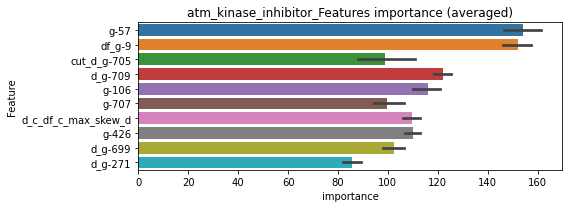

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139297	valid_1's binary_logloss: 0.000232048


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1149]	training's binary_logloss: 0.000137212	valid_1's binary_logloss: 0.0002295
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139634	valid_1's binary_logloss: 0.00015613


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000137145	valid_1's binary_logloss: 0.000153369
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139283	valid_1's binary_logloss: 0.000314989
Early stopping, best iteration is:
[1315]	training's binary_logloss: 0.00013572	valid_1's binary_logloss: 0.000310079


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0001393	valid_1's binary_logloss: 0.000153781


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000137001	valid_1's binary_logloss: 0.000151233
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139325	valid_1's binary_logloss: 0.00330205
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.000137654	valid_1's binary_logloss: 0.0032971


atm_kinase_inhibitor logloss: 0.0008279224521451383
atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000165521	valid_1's binary_logloss: 0.000598018
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000167207	valid_1's binary_logloss: 0.000265203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000174541	valid_1's binary_logloss: 0.00357334
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.0001687	valid_1's binary_logloss: 0.000175716
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004505, Threshold: 0.0013347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0013347, conf_0:0.00093, conf_1:0.00174
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0313347
threshold: 0.0313347, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000168459	valid_1's binary_logloss: 0.000220791


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00015956	valid_1's binary_logloss: 0.000246981
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000160583	valid_1's binary_logloss: 0.000179319
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000170625	valid_1's binary_logloss: 0.000994608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000161754	valid_1's binary_logloss: 0.000184402
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1049432, Threshold: 0.0313347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0313347, conf_0:0.02507, conf_1:0.03760
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0613347
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0913347
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_3: 0.1213347
threshold: 0.1213347, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.0001611	valid_1's binary_logloss: 0.000176653


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00015956	valid_1's binary_logloss: 0.000246981
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000160583	valid_1's binary_logloss: 0.000179319
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000170625	valid_1's binary_logloss: 0.000994608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000161754	valid_1's binary_logloss: 0.000184402
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1049432, Threshold: 0.1213347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, Expected: 1.2, Threshold: 0.1213347, conf_0:0.10920, conf_1:0.13347
threshold: 0.1213347, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.0001611	valid_1's binary_logloss: 0.000176653


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


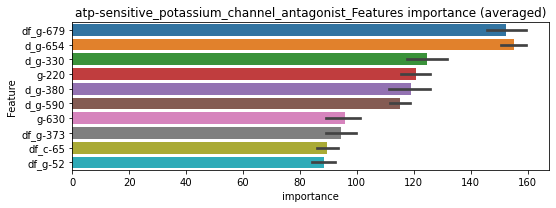

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000160819	valid_1's binary_logloss: 0.000225468
Early stopping, best iteration is:
[1077]	training's binary_logloss: 0.000160173	valid_1's binary_logloss: 0.000224657


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000160302	valid_1's binary_logloss: 0.000182548
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.00015993	valid_1's binary_logloss: 0.000182126


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000167537	valid_1's binary_logloss: 0.00113929
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000161053	valid_1's binary_logloss: 0.00019802
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.0001602	valid_1's binary_logloss: 0.000197008


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.00038445052733069625


Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000162557	valid_1's binary_logloss: 0.000178652


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000255114	valid_1's binary_logloss: 0.00124265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000252687	valid_1's binary_logloss: 0.000515742
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000255382	valid_1's binary_logloss: 0.000451584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000250958	valid_1's binary_logloss: 0.000537425
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012197, Threshold: 0.0095730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0095730, conf_0:0.00670, conf_1:0.01244
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.0395730


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000247756	valid_1's binary_logloss: 0.000829722


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0695730
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0995730
threshold: 0.0995730, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000239565	valid_1's binary_logloss: 0.00119898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000242182	valid_1's binary_logloss: 0.000464349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00023738	valid_1's binary_logloss: 0.000373142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000241328	valid_1's binary_logloss: 0.000391974
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1288462, Threshold: 0.0995730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.0995730, conf_0:0.07966, conf_1:0.11949
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.1295730
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1595730
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_3: 0.1895730
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.2195730
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.2495730
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.2795730


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000240953	valid_1's binary_logloss: 0.000664284


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.3095730
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.3395730
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_9: 0.3695730
threshold: 0.3695730, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000239565	valid_1's binary_logloss: 0.00119898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000242182	valid_1's binary_logloss: 0.000464349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00023738	valid_1's binary_logloss: 0.000373142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000241328	valid_1's binary_logloss: 0.000391974
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1288462, Threshold: 0.3695730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.3695730, conf_0:0.33262, conf_1:0.40653
threshold: 0.3695730, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000240953	valid_1's binary_logloss: 0.000664284


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


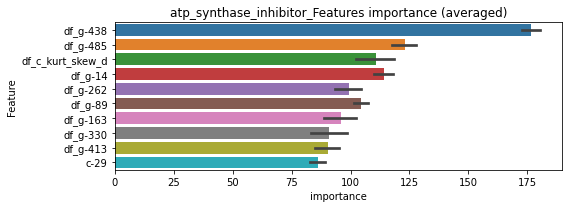

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000245908	valid_1's binary_logloss: 0.000662967
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000245549	valid_1's binary_logloss: 0.000455342
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000245066	valid_1's binary_logloss: 0.000359056
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000241879	valid_1's binary_logloss: 0.000429976
Training until validation scores don't improve for 29 rounds


atp_synthase_inhibitor logloss: 0.00048728476272262425


Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000244693	valid_1's binary_logloss: 0.000528894


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271512	valid_1's binary_logloss: 0.106226
Early stopping, best iteration is:
[1566]	training's binary_logloss: 0.01673	valid_1's binary_logloss: 0.0990101
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0276112	valid_1's binary_logloss: 0.0764063
[2000]	training's binary_logloss: 0.0130275	valid_1's binary_logloss: 0.0637092
Early stopping, best iteration is:
[2888]	training's binary_logloss: 0.00883841	valid_1's binary_logloss: 0.0592185
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271462	valid_1's binary_logloss: 0.096382
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.0133884	valid_1's binary_logloss: 0.0830531
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0284485	valid_1's binary_logloss: 0.0612495
[2000]	trainin

1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0398957, Threshold: 0.0844784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 640/3768
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0844784, conf_0:0.05913, conf_1:0.10982
Num_p_label: 17.0, Expected: 16.2, Adj_threshold_1: 0.1144784
threshold: 0.1144784, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0249273	valid_1's binary_logloss: 0.0812787
[2000]	training's binary_logloss: 0.0118238	valid_1's binary_logloss: 0.0674051
Early stopping, best iteration is:
[2696]	training's binary_logloss: 0.00863997	valid_1's binary_logloss: 0.0634762
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0256566	valid_1's binary_logloss: 0.064882
[2000]	training's binary_logloss: 0.0121567	valid_1's binary_logloss: 0.0495903
[3000]	training's binary_logloss: 0.00792692	valid_1's binary_logloss: 0.0445757
Early stopping, best iteration is:
[3121]	training's binary_logloss: 0.00761605	valid_1's binary_logloss: 0.0441612
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.025015	valid_1's binary_logloss: 0.0723107
[2000]	training's binary_logloss: 0.0119445	valid_1's binary_logloss: 0.057492
Early stopping, best iterat

2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0827581, Threshold: 0.1144784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 632.0/3752
p_label_rate: 0.0060271 Vs.target_rate: 0.00407
Num_p_label: 24.0, Expected: 16.2, Threshold: 0.1144784, conf_0:0.09158, conf_1:0.13737
threshold: 0.1144784, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 632.0/3752, y_label_rate: 0.1684435
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248411	valid_1's binary_logloss: 0.0627667
[2000]	training's binary_logloss: 0.0119062	valid_1's binary_logloss: 0.0485911
Early stopping, best iteration is:
[2623]	training's binary_logloss: 0.0089486	valid_1's binary_logloss: 0.044913
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0242973	valid_1's binary_logloss: 0.068016
[2000]	training's binary_logloss: 0.0116248	valid_1's binary_logloss: 0.0541227
[3000]	training's binary_logloss: 0.00759479	valid_1's binary_logloss: 0.0489267
Early stopping, best iteration is:
[3270]	training's binary_logloss: 0.00696074	valid_1's binary_logloss: 0.0479786
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0241388	valid_1's binary_logloss: 0.0677776
[2000]	training's binary_logloss: 0.0115034	valid_1's binary_logloss: 0.0530168
[3000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0722595, Threshold: 0.1144784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 624.0/3736
p_label_rate: 0.0072828 Vs.target_rate: 0.00407
Num_p_label: 29.0, Expected: 16.2, Threshold: 0.1144784, conf_0:0.10303, conf_1:0.12593
Num_p_label: 14.0, Expected: 16.2, Adj_threshold_1: 0.1444784
threshold: 0.1444784, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 624.0/3736, y_label_rate: 0.1670236


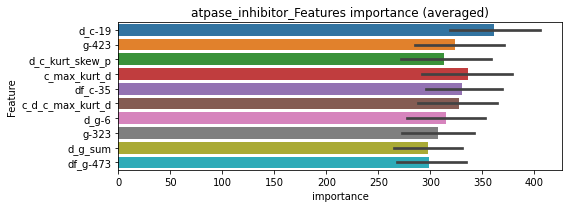

len(train_index) : 2988
len(valid_index) : 748
================================= fold 1/5 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0439123	valid_1's binary_logloss: 0.0815945
[2000]	training's binary_logloss: 0.0218775	valid_1's binary_logloss: 0.0599977
[3000]	training's binary_logloss: 0.0144503	valid_1's binary_logloss: 0.0516265
[4000]	training's binary_logloss: 0.0107675	valid_1's binary_logloss: 0.0473941
[5000]	training's binary_logloss: 0.00860166	valid_1's binary_logloss: 0.0447135
Early stopping, best iteration is:
[5199]	training's binary_logloss: 0.0082686	valid_1's binary_logloss: 0.0441737


len(train_index) : 2989
len(valid_index) : 747
================================= fold 2/5 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0426765	valid_1's binary_logloss: 0.0814213
[2000]	training's binary_logloss: 0.0213097	valid_1's binary_logloss: 0.05874
[3000]	training's binary_logloss: 0.0141071	valid_1's binary_logloss: 0.0506617
[4000]	training's binary_logloss: 0.0105559	valid_1's binary_logloss: 0.0463149
[5000]	training's binary_logloss: 0.00843557	valid_1's binary_logloss: 0.0433334
Early stopping, best iteration is:
[5211]	training's binary_logloss: 0.00809535	valid_1's binary_logloss: 0.0427873


len(train_index) : 2989
len(valid_index) : 747
================================= fold 3/5 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0435216	valid_1's binary_logloss: 0.0830568
[2000]	training's binary_logloss: 0.0217754	valid_1's binary_logloss: 0.0602507
[3000]	training's binary_logloss: 0.0143682	valid_1's binary_logloss: 0.0517695
Early stopping, best iteration is:
[3326]	training's binary_logloss: 0.0129234	valid_1's binary_logloss: 0.050035


len(train_index) : 2989
len(valid_index) : 747
================================= fold 4/5 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0446008	valid_1's binary_logloss: 0.0709614
[2000]	training's binary_logloss: 0.0222171	valid_1's binary_logloss: 0.0475395
[3000]	training's binary_logloss: 0.0147125	valid_1's binary_logloss: 0.0389331
[4000]	training's binary_logloss: 0.0109717	valid_1's binary_logloss: 0.034418
[5000]	training's binary_logloss: 0.00873476	valid_1's binary_logloss: 0.0315528
[6000]	training's binary_logloss: 0.00728755	valid_1's binary_logloss: 0.0295846
[7000]	training's binary_logloss: 0.0062616	valid_1's binary_logloss: 0.0281767
[8000]	training's binary_logloss: 0.00550167	valid_1's binary_logloss: 0.0269995
[9000]	training's binary_logloss: 0.00491113	valid_1's binary_logloss: 0.0261003
[10000]	training's binary_logloss: 0.00444344	valid_1's binary_logloss: 0.0253475
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00444344	valid_1's binary_logloss: 0.0253475


len(train_index) : 2989
len(valid_index) : 747
================================= fold 5/5 atpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0414699	valid_1's binary_logloss: 0.0979722
[2000]	training's binary_logloss: 0.0206765	valid_1's binary_logloss: 0.0778663
[3000]	training's binary_logloss: 0.0136718	valid_1's binary_logloss: 0.0707954
Early stopping, best iteration is:
[3843]	training's binary_logloss: 0.0106263	valid_1's binary_logloss: 0.0674168


atpase_inhibitor logloss: 0.04595160440264265
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00031649	valid_1's binary_logloss: 0.000993209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000312504	valid_1's binary_logloss: 0.000845055
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000316346	valid_1's binary_logloss: 0.00253482
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000316897	valid_1's binary_logloss: 0.00188743
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016816, Threshold: 0.0075704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0075704, conf_0:0.00530, conf_1:0.00984
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0375704
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0675704


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00031429	valid_1's binary_logloss: 0.00242709


threshold: 0.0675704, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000305068	valid_1's binary_logloss: 0.000732091
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000300506	valid_1's binary_logloss: 0.00113216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000306232	valid_1's binary_logloss: 0.00229167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000308959	valid_1's binary_logloss: 0.00184726
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0767825, Threshold: 0.0675704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00080
Num_p_label: 16.0, Expected: 3.2, Threshold: 0.0675704, conf_0:0.05406, conf_1:0.08108
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_1: 0.0975704
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.1275704
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.1575704
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_4: 0.1875704


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000309266	valid_1's binary_logloss: 0.00155203


Num_p_label: 9.0, Expected: 3.2, Adj_threshold_5: 0.2175704
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_6: 0.2475704
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_7: 0.2775704
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_8: 0.3075704
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3375704
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3675704
threshold: 0.3675704, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000305068	valid_1's binary_logloss: 0.000732091
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000300506	valid_1's binary_logloss: 0.00113216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000306232	valid_1's binary_logloss: 0.00229167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000308959	valid_1's binary_logloss: 0.00184726
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0767825, Threshold: 0.3675704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3675704, conf_0:0.33081, conf_1:0.40433
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.3975704


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000309266	valid_1's binary_logloss: 0.00155203


threshold: 0.3975704, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


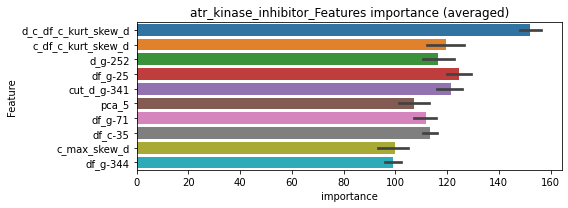

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000307804	valid_1's binary_logloss: 0.000697108


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[937]	training's binary_logloss: 0.000302989	valid_1's binary_logloss: 0.000704726


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000302611	valid_1's binary_logloss: 0.00189201


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000319781	valid_1's binary_logloss: 0.00173776


================================= fold 5/5 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000320505	valid_1's binary_logloss: 0.00129394


atr_kinase_inhibitor logloss: 0.0012651643538998559
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0283091	valid_1's binary_logloss: 0.0907288
Early stopping, best iteration is:
[1909]	training's binary_logloss: 0.0140781	valid_1's binary_logloss: 0.0762276
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0285935	valid_1's binary_logloss: 0.077023
[2000]	training's binary_logloss: 0.0135508	valid_1's binary_logloss: 0.0595701
[3000]	training's binary_logloss: 0.00886452	valid_1's binary_logloss: 0.0537634
Early stopping, best iteration is:
[3962]	training's binary_logloss: 0.00669215	valid_1's binary_logloss: 0.0508884
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0279924	valid_1's binary_logloss: 0.094059
Early stopping, best iteration is:
[1847]	training's binary_logloss: 0.0144885	valid_1's binary_logloss: 0.0815316
Training until validation scores don't improve for 29 rounds
[1000]	trai

1 / 3, AUC score:0.993, PR-AUC:0.986
y_Threshold: 0.0427388, Threshold: 0.1804500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 638/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1804500, conf_0:0.12632, conf_1:0.23459
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_1: 0.2104500
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_2: 0.2404500
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_3: 0.2704500
threshold: 0.2704500, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 638.0/3765, y_label_rate: 0.1694555
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.025308	valid_1's binary_logloss: 0.075895
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.012597	valid_1's binary_logloss: 0.0623526
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251945	valid_1's binary_logloss: 0.0800805
[2000]	training's binary_logloss: 0.0119669	valid_1's binary_logloss: 0.066211
Early stopping, best iteration is:
[2675]	training's binary_logloss: 0.00881221	valid_1's binary_logloss: 0.0626503
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0254187	valid_1's binary_logloss: 0.0705331
[2000]	training's binary_logloss: 0.0121006	valid_1's binary_logloss: 0.0526402
[3000]	training's binary_logloss: 0.00790611	valid_1's binary_logloss: 0.0458659
[4000]	training's binary_logloss: 0.00590599	valid_1's binary_logloss: 0.0425612
Early stopping, best iterati

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0778187, Threshold: 0.2704500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0107986 Vs.target_rate: 0.00403
Num_p_label: 43.0, Expected: 16.1, Threshold: 0.2704500, conf_0:0.21636, conf_1:0.32454
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_1: 0.3004500
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_2: 0.3304500
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_3: 0.3604500
Num_p_label: 18.0, Expected: 16.1, Adj_threshold_4: 0.3904500
threshold: 0.3904500, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 625.0/3739, y_label_rate: 0.1671570
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0245615	valid_1's binary_logloss: 0.0572326
[2000]	training's binary_logloss: 0.0117329	valid_1's binary_logloss: 0.0410062
[3000]	training's binary_logloss: 0.00769156	valid_1's binary_logloss: 0.0352383
Early stopping, best iteration is:
[3623]	training's binary_logloss: 0.00634952	valid_1's binary_logloss: 0.0330224
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0240136	valid_1's binary_logloss: 0.0734081
[2000]	training's binary_logloss: 0.0115453	valid_1's binary_logloss: 0.0572227
[3000]	training's binary_logloss: 0.00757566	valid_1's binary_logloss: 0.0510661
Early stopping, best iteration is:
[3240]	training's binary_logloss: 0.00700767	valid_1's binary_logloss: 0.0501225
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0241064	valid_1's binary_logloss: 0.0791806
[2000]	training's binar

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0771065, Threshold: 0.3904500, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 620.0/3729
p_label_rate: 0.0050226 Vs.target_rate: 0.00403
Num_p_label: 20.0, Expected: 16.1, Threshold: 0.3904500, conf_0:0.35141, conf_1:0.42950
threshold: 0.3904500, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 620.0/3729, y_label_rate: 0.1662644


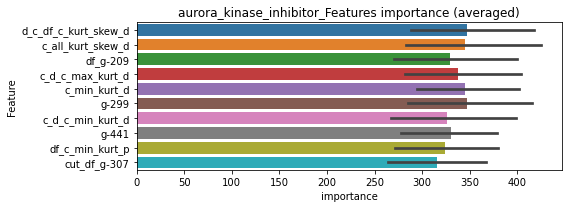

len(train_index) : 2983
len(valid_index) : 746
================================= fold 1/5 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0440139	valid_1's binary_logloss: 0.0854839
[2000]	training's binary_logloss: 0.0217164	valid_1's binary_logloss: 0.0608828
[3000]	training's binary_logloss: 0.014395	valid_1's binary_logloss: 0.0517497
[4000]	training's binary_logloss: 0.0107474	valid_1's binary_logloss: 0.046855
[5000]	training's binary_logloss: 0.00859268	valid_1's binary_logloss: 0.0439512
Early stopping, best iteration is:
[5000]	training's binary_logloss: 0.00859268	valid_1's binary_logloss: 0.0439512


len(train_index) : 2983
len(valid_index) : 746
================================= fold 2/5 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0435732	valid_1's binary_logloss: 0.0946698
[2000]	training's binary_logloss: 0.0214807	valid_1's binary_logloss: 0.0726367
[3000]	training's binary_logloss: 0.0141796	valid_1's binary_logloss: 0.0648424
Early stopping, best iteration is:
[3139]	training's binary_logloss: 0.013541	valid_1's binary_logloss: 0.0640587


len(train_index) : 2983
len(valid_index) : 746
================================= fold 3/5 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0444484	valid_1's binary_logloss: 0.0860238
[2000]	training's binary_logloss: 0.0219794	valid_1's binary_logloss: 0.0593583
[3000]	training's binary_logloss: 0.0144317	valid_1's binary_logloss: 0.0497843
[4000]	training's binary_logloss: 0.0107879	valid_1's binary_logloss: 0.0447149
[5000]	training's binary_logloss: 0.00861747	valid_1's binary_logloss: 0.0414921
[6000]	training's binary_logloss: 0.00718556	valid_1's binary_logloss: 0.039168
[7000]	training's binary_logloss: 0.00617641	valid_1's binary_logloss: 0.0374397
[8000]	training's binary_logloss: 0.00542004	valid_1's binary_logloss: 0.0361326
[9000]	training's binary_logloss: 0.00484133	valid_1's binary_logloss: 0.0349916
Early stopping, best iteration is:
[9300]	training's binary_logloss: 0.00469059	valid_1's binary_logloss: 0.0347082


len(train_index) : 2983
len(valid_index) : 746
================================= fold 4/5 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.044828	valid_1's binary_logloss: 0.0831156
[2000]	training's binary_logloss: 0.0221535	valid_1's binary_logloss: 0.0568947
[3000]	training's binary_logloss: 0.0145588	valid_1's binary_logloss: 0.0467222
[4000]	training's binary_logloss: 0.0108712	valid_1's binary_logloss: 0.0413487
[5000]	training's binary_logloss: 0.00868939	valid_1's binary_logloss: 0.0380789
[6000]	training's binary_logloss: 0.00724621	valid_1's binary_logloss: 0.0358093
[7000]	training's binary_logloss: 0.006222	valid_1's binary_logloss: 0.0340799
Early stopping, best iteration is:
[7782]	training's binary_logloss: 0.00561505	valid_1's binary_logloss: 0.033037


len(train_index) : 2984
len(valid_index) : 745
================================= fold 5/5 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0443772	valid_1's binary_logloss: 0.087801
[2000]	training's binary_logloss: 0.0220523	valid_1's binary_logloss: 0.0621175
[3000]	training's binary_logloss: 0.0144787	valid_1's binary_logloss: 0.052055
[4000]	training's binary_logloss: 0.0108259	valid_1's binary_logloss: 0.0473
[5000]	training's binary_logloss: 0.00865931	valid_1's binary_logloss: 0.0441624
Early stopping, best iteration is:
[5709]	training's binary_logloss: 0.00758285	valid_1's binary_logloss: 0.0423862


aurora_kinase_inhibitor logloss: 0.04362859097990146
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000161445	valid_1's binary_logloss: 0.00704541
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000154787	valid_1's binary_logloss: 0.000238556
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000153415	valid_1's binary_logloss: 0.00198807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000153321	valid_1's binary_logloss: 0.000261485
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005005, Threshold: 0.0033296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0033296, conf_0:0.00233, conf_1:0.00433
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0333296
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0633296
threshold: 0.0633296, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000153991	valid_1's binary_logloss: 0.000200816


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000138103	valid_1's binary_logloss: 0.000559625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000139128	valid_1's binary_logloss: 0.000184268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000138825	valid_1's binary_logloss: 0.000163084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000138522	valid_1's binary_logloss: 0.000142922
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1379391, Threshold: 0.0633296, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000139227	valid_1's binary_logloss: 0.000171668


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0105475 Vs.target_rate: 0.00025
Num_p_label: 42.0, Expected: 1.0, Threshold: 0.0633296, conf_0:0.05066, conf_1:0.07600
Num_p_label: 36.0, Expected: 1.0, Adj_threshold_1: 0.0933296
Num_p_label: 30.0, Expected: 1.0, Adj_threshold_2: 0.1233296
Num_p_label: 27.0, Expected: 1.0, Adj_threshold_3: 0.1533296
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_4: 0.1833296
Num_p_label: 21.0, Expected: 1.0, Adj_threshold_5: 0.2133296
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2433296
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_7: 0.2733296
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_8: 0.3033296
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3333296
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_10: 0.3633296
threshold: 0.3633296, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000138103	valid_1's binary_logloss: 0.000559625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000139128	valid_1's binary_logloss: 0.000184268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000138825	valid_1's binary_logloss: 0.000163084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000138522	valid_1's binary_logloss: 0.000142922
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1379391, Threshold: 0.3633296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, Expected: 1.0, Threshold: 0.3633296, conf_0:0.32700, conf_1:0.39966
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.3933296
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_2: 0.4233296
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.4533296
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4833296
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5133296
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.5433296
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.5733296
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6033296
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.6333296
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_10: 0.6633296


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000139227	valid_1's binary_logloss: 0.000171668


threshold: 0.6633296, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


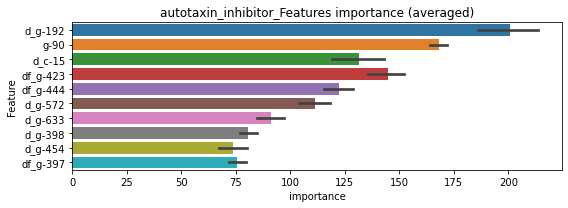

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 autotaxin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 autotaxin_inhibitor=================================


[1000]	training's binary_logloss: 0.000142397	valid_1's binary_logloss: 0.000461786
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000142397	valid_1's binary_logloss: 0.000461786
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142812	valid_1's binary_logloss: 0.000189425


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1224]	training's binary_logloss: 0.000139821	valid_1's binary_logloss: 0.000185616
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142407	valid_1's binary_logloss: 0.00016114


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000139628	valid_1's binary_logloss: 0.000158246
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00014373	valid_1's binary_logloss: 0.000146093


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1113]	training's binary_logloss: 0.000141691	valid_1's binary_logloss: 0.000144053
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143456	valid_1's binary_logloss: 0.000198505
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000142084	valid_1's binary_logloss: 0.000196633


autotaxin_inhibitor logloss: 0.00022929775179889793
bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000817082	valid_1's binary_logloss: 0.0330507
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000706206	valid_1's binary_logloss: 0.027325
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000538147	valid_1's binary_logloss: 0.0181181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000513122	valid_1's binary_logloss: 0.00375871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000788058	valid_1's binary_logloss: 0.0231468


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062362, Threshold: 0.0214152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0214152, conf_0:0.01499, conf_1:0.02784
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0514152
threshold: 0.0514152, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00126285	valid_1's binary_logloss: 0.0360894
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000693377	valid_1's binary_logloss: 0.0247823
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000656863	valid_1's binary_logloss: 0.0161986
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.00051382	valid_1's binary_logloss: 0.00327144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000620818	valid_1's binary_logloss: 0.0213656


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0315088, Threshold: 0.0514152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0105475 Vs.target_rate: 0.00252
Num_p_label: 42.0, Expected: 10.0, Threshold: 0.0514152, conf_0:0.04113, conf_1:0.06170
Num_p_label: 27.0, Expected: 10.0, Adj_threshold_1: 0.0814152
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1114152
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1414152
threshold: 0.1414152, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3796, y_label_rate: 0.1714963
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000488659	valid_1's binary_logloss: 0.00817648
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000609847	valid_1's binary_logloss: 0.0142135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000722517	valid_1's binary_logloss: 0.0205244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000606039	valid_1's binary_logloss: 0.0236135
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0334992, Threshold: 0.1414152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, Expected: 10.0, Threshold: 0.1414152, conf_0:0.12727, conf_1:0.15556


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.001179	valid_1's binary_logloss: 0.0331839


Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.1714152
threshold: 0.1714152, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


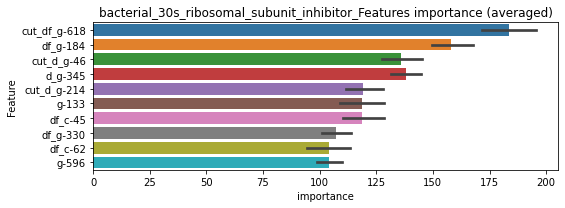

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000533686	valid_1's binary_logloss: 0.015593


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000634848	valid_1's binary_logloss: 0.0163458


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000517596	valid_1's binary_logloss: 0.00870219


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000764783	valid_1's binary_logloss: 0.0184947


================================= fold 5/5 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000673208	valid_1's binary_logloss: 0.0116161


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.014150737373816126
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000625643	valid_1's binary_logloss: 0.0387871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000985621	valid_1's binary_logloss: 0.0276684
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000666371	valid_1's binary_logloss: 0.0192041
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00118308	valid_1's binary_logloss: 0.0254011
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00170946	valid_1's binary_logloss: 0.062248


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0087964, Threshold: 0.0253937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0253937, conf_0:0.01778, conf_1:0.03301
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_1: 0.0553937
threshold: 0.0553937, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3794, y_label_rate: 0.1713231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000701018	valid_1's binary_logloss: 0.0340268
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000616234	valid_1's binary_logloss: 0.0219417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000574118	valid_1's binary_logloss: 0.0200746
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00104172	valid_1's binary_logloss: 0.0226671
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0320837, Threshold: 0.0553937, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00129877	valid_1's binary_logloss: 0.0380183


Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0082873 Vs.target_rate: 0.00336
Num_p_label: 33.0, Expected: 13.4, Threshold: 0.0553937, conf_0:0.04431, conf_1:0.06647
Num_p_label: 21.0, Expected: 13.4, Adj_threshold_1: 0.0853937
Num_p_label: 12.0, Expected: 13.4, Adj_threshold_2: 0.1153937
threshold: 0.1153937, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000605509	valid_1's binary_logloss: 0.0248755
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000579944	valid_1's binary_logloss: 0.0180837
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000605299	valid_1's binary_logloss: 0.0253232
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00102062	valid_1's binary_logloss: 0.0276209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000561258	valid_1's binary_logloss: 0.00966471


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0363776, Threshold: 0.1153937, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0032647 Vs.target_rate: 0.00336
Num_p_label: 13.0, Expected: 13.4, Threshold: 0.1153937, conf_0:0.10385, conf_1:0.12693
threshold: 0.1153937, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


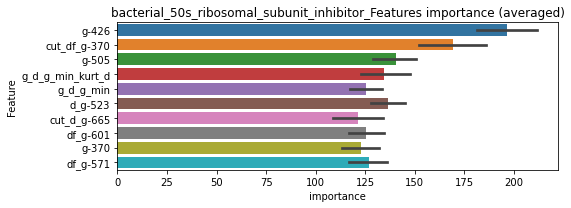

len(train_index) : 3027
len(valid_index) : 757
================================= fold 1/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000643557	valid_1's binary_logloss: 0.032437


len(train_index) : 3027
len(valid_index) : 757
================================= fold 2/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3027
len(valid_index) : 757
================================= fold 3/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00115276	valid_1's binary_logloss: 0.0271589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000657411	valid_1's binary_logloss: 0.014462


len(train_index) : 3027
len(valid_index) : 757
================================= fold 4/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000599398	valid_1's binary_logloss: 0.011186
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000599398	valid_1's binary_logloss: 0.011186


len(train_index) : 3028
len(valid_index) : 756
================================= fold 5/5 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000838749	valid_1's binary_logloss: 0.0287898


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.02280515560786787
bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000413752	valid_1's binary_logloss: 0.00453557
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000415502	valid_1's binary_logloss: 0.00866151
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000401584	valid_1's binary_logloss: 0.00312454
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000417563	valid_1's binary_logloss: 0.00285984
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000406996	valid_1's binary_logloss: 0.00242871


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028283, Threshold: 0.0163592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0163592, conf_0:0.01145, conf_1:0.02127
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0463592
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.0763592
threshold: 0.0763592, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00040988	valid_1's binary_logloss: 0.00456647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000411035	valid_1's binary_logloss: 0.00897547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00039474	valid_1's binary_logloss: 0.00307914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000407116	valid_1's binary_logloss: 0.00250101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403948	valid_1's binary_logloss: 0.00268885


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0522371, Threshold: 0.0763592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0128076 Vs.target_rate: 0.00151
Num_p_label: 51.0, Expected: 6.0, Threshold: 0.0763592, conf_0:0.06109, conf_1:0.09163
Num_p_label: 45.0, Expected: 6.0, Adj_threshold_1: 0.1063592
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_2: 0.1363592
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_3: 0.1663592
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_4: 0.1963592
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_5: 0.2263592
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_6: 0.2563592
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_7: 0.2863592
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_8: 0.3163592
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.3463592
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_10: 0.3763592
threshold: 0.3763592, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00040988	valid_1's binary_logloss: 0.00456647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000411035	valid_1's binary_logloss: 0.00897547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00039474	valid_1's binary_logloss: 0.00307914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000407116	valid_1's binary_logloss: 0.00250101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000403948	valid_1's binary_logloss: 0.00268885


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0522371, Threshold: 0.3763592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, Expected: 6.0, Threshold: 0.3763592, conf_0:0.33872, conf_1:0.41400
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.4063592
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.4363592
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.4663592
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_4: 0.4963592
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.5263592
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_6: 0.5563592
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_7: 0.5863592
threshold: 0.5863592, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


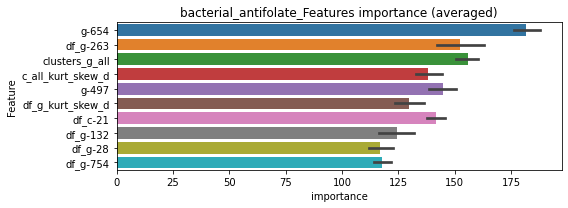

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000406984	valid_1's binary_logloss: 0.00408775


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000449259	valid_1's binary_logloss: 0.0060859


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000389403	valid_1's binary_logloss: 0.0034452
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000389403	valid_1's binary_logloss: 0.0034452


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000393333	valid_1's binary_logloss: 0.00223008
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000392785	valid_1's binary_logloss: 0.00222636


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 bacterial_antifolate=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000407483	valid_1's binary_logloss: 0.00225125


bacterial_antifolate logloss: 0.003620396302985251


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 6396
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 6396


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0282164	valid_1's binary_logloss: 0.0984508
Early stopping, best iteration is:
[1557]	training's binary_logloss: 0.0176466	valid_1's binary_logloss: 0.0918957
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0287043	valid_1's binary_logloss: 0.0903699
[2000]	training's binary_logloss: 0.0136341	valid_1's binary_logloss: 0.0803696
Early stopping, best iteration is:
[2278]	training's binary_logloss: 0.0118794	valid_1's binary_logloss: 0.0786889
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0291572	valid_1's binary_logloss: 0.0812684
[2000]	training's binary_logloss: 0.0137036	valid_1's binary_logloss: 0.0719016
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.012983	valid_1's binary_logloss: 0.0712596
Training until validation scores don't improve for 29 rounds
[1000]	train

1 / 3, AUC score:0.989, PR-AUC:0.977
y_Threshold: 0.0510682, Threshold: 0.1028071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 346 → Positive_corect_labels: 1234/7329
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.1028071, conf_0:0.07196, conf_1:0.13365
threshold: 0.1028071, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1234.0/7329, y_label_rate: 0.1683722
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0229672	valid_1's binary_logloss: 0.0713125
Early stopping, best iteration is:
[1585]	training's binary_logloss: 0.0137917	valid_1's binary_logloss: 0.0651154
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233003	valid_1's binary_logloss: 0.0677291
[2000]	training's binary_logloss: 0.0108962	valid_1's binary_logloss: 0.0575101
Early stopping, best iteration is:
[2281]	training's binary_logloss: 0.00945218	valid_1's binary_logloss: 0.0561509
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0230978	valid_1's binary_logloss: 0.0707576
[2000]	training's binary_logloss: 0.0107257	valid_1's binary_logloss: 0.0595825
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.00896012	valid_1's binary_logloss: 0.0575386
Training until validation scores don't improve for 29 rounds
[1000]	tr

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0814421, Threshold: 0.1028071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1198.0/7257
p_label_rate: 0.0168257 Vs.target_rate: 0.00806
Num_p_label: 67.0, Expected: 32.1, Threshold: 0.1028071, conf_0:0.08225, conf_1:0.12337
Num_p_label: 45.0, Expected: 32.1, Adj_threshold_1: 0.1328071
threshold: 0.1328071, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1198.0/7257, y_label_rate: 0.1650820
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0204028	valid_1's binary_logloss: 0.0608027
[2000]	training's binary_logloss: 0.00954461	valid_1's binary_logloss: 0.0514445
Early stopping, best iteration is:
[2095]	training's binary_logloss: 0.00906662	valid_1's binary_logloss: 0.0509457
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0199896	valid_1's binary_logloss: 0.0661238
Early stopping, best iteration is:
[1907]	training's binary_logloss: 0.00979586	valid_1's binary_logloss: 0.0574049
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0206766	valid_1's binary_logloss: 0.0487712
[2000]	training's binary_logloss: 0.00978499	valid_1's binary_logloss: 0.0391136
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.00819854	valid_1's binary_logloss: 0.0374257
Training until validation scores don't improve for 29 rounds
[1000]

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0711290, Threshold: 0.1328071, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 1179.0/7219
p_label_rate: 0.0110497 Vs.target_rate: 0.00806
Num_p_label: 44.0, Expected: 32.1, Threshold: 0.1328071, conf_0:0.11953, conf_1:0.14609
threshold: 0.1328071, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 1179.0/7219, y_label_rate: 0.1633190


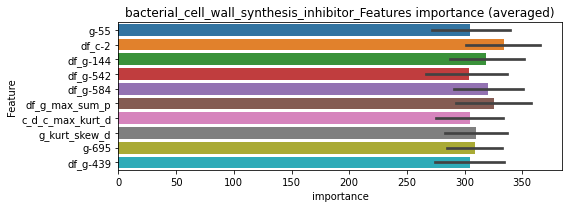

len(train_index) : 5775
len(valid_index) : 1444
================================= fold 1/5 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0346378	valid_1's binary_logloss: 0.0628474
[2000]	training's binary_logloss: 0.0170736	valid_1's binary_logloss: 0.0464125
[3000]	training's binary_logloss: 0.0111853	valid_1's binary_logloss: 0.0405688
[4000]	training's binary_logloss: 0.00833184	valid_1's binary_logloss: 0.0374897
Early stopping, best iteration is:
[4739]	training's binary_logloss: 0.00701308	valid_1's binary_logloss: 0.0360801


len(train_index) : 5775
len(valid_index) : 1444
================================= fold 2/5 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0343922	valid_1's binary_logloss: 0.0650658
[2000]	training's binary_logloss: 0.0170313	valid_1's binary_logloss: 0.0476211
[3000]	training's binary_logloss: 0.0111342	valid_1's binary_logloss: 0.0411551
Early stopping, best iteration is:
[3769]	training's binary_logloss: 0.0088029	valid_1's binary_logloss: 0.038435


len(train_index) : 5775
len(valid_index) : 1444
================================= fold 3/5 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344929	valid_1's binary_logloss: 0.0687446
[2000]	training's binary_logloss: 0.0170713	valid_1's binary_logloss: 0.0517748
[3000]	training's binary_logloss: 0.0112151	valid_1's binary_logloss: 0.045918
[4000]	training's binary_logloss: 0.00834196	valid_1's binary_logloss: 0.0428169
Early stopping, best iteration is:
[4043]	training's binary_logloss: 0.00824883	valid_1's binary_logloss: 0.0426949


len(train_index) : 5775
len(valid_index) : 1444
================================= fold 4/5 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0347308	valid_1's binary_logloss: 0.0658171
[2000]	training's binary_logloss: 0.0171624	valid_1's binary_logloss: 0.0504971
[3000]	training's binary_logloss: 0.0112843	valid_1's binary_logloss: 0.045827
Early stopping, best iteration is:
[3586]	training's binary_logloss: 0.00939256	valid_1's binary_logloss: 0.0440233


len(train_index) : 5776
len(valid_index) : 1443
================================= fold 5/5 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0351512	valid_1's binary_logloss: 0.0587631
[2000]	training's binary_logloss: 0.017378	valid_1's binary_logloss: 0.0433773
[3000]	training's binary_logloss: 0.0113785	valid_1's binary_logloss: 0.0382185
Early stopping, best iteration is:
[3588]	training's binary_logloss: 0.00946911	valid_1's binary_logloss: 0.0364993


bacterial_cell_wall_synthesis_inhibitor logloss: 0.039546936824203675
bacterial_cell_wall_synthesis_inhibitor is unpredictable(><)!
bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0259568	valid_1's binary_logloss: 0.0612125
[2000]	training's binary_logloss: 0.0124023	valid_1's binary_logloss: 0.0451846
[3000]	training's binary_logloss: 0.00812317	valid_1's binary_logloss: 0.0392681
[4000]	training's binary_logloss: 0.00605994	valid_1's binary_logloss: 0.0362156
Early stopping, best iteration is:
[4727]	training's binary_logloss: 0.00513512	valid_1's binary_logloss: 0.0346018
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0255239	valid_1's binary_logloss: 0.0702197
[2000]	training's binary_logloss: 0.0121976	valid_1's binary_logloss: 0.0561262
[3000]	training's binary_logloss: 0.00801501	valid_1's binary_logloss: 0.0504676
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00661968	valid_1's binary_logloss: 0.048638
Training until validation scores don't improve for 29 rounds
[1000]	training's binar

1 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0373958, Threshold: 0.0789229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0789229, conf_0:0.05525, conf_1:0.10260
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_1: 0.1089229
threshold: 0.1089229, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0222397	valid_1's binary_logloss: 0.0752395
[2000]	training's binary_logloss: 0.0107245	valid_1's binary_logloss: 0.06101
Early stopping, best iteration is:
[2359]	training's binary_logloss: 0.00905103	valid_1's binary_logloss: 0.0588009
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0232191	valid_1's binary_logloss: 0.0586643
[2000]	training's binary_logloss: 0.0111477	valid_1's binary_logloss: 0.0441179
[3000]	training's binary_logloss: 0.00733452	valid_1's binary_logloss: 0.039065
Early stopping, best iteration is:
[3964]	training's binary_logloss: 0.00554932	valid_1's binary_logloss: 0.0362998
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233109	valid_1's binary_logloss: 0.0567497
[2000]	training's binary_logloss: 0.0112097	valid_1's binary_logloss: 0.0443806
[3000]	training's binary_lo

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0827225, Threshold: 0.1089229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 637.0/3763
p_label_rate: 0.0087896 Vs.target_rate: 0.00374
Num_p_label: 35.0, Expected: 14.9, Threshold: 0.1089229, conf_0:0.08714, conf_1:0.13071
Num_p_label: 26.0, Expected: 14.9, Adj_threshold_1: 0.1389229
Num_p_label: 15.0, Expected: 14.9, Adj_threshold_2: 0.1689229
threshold: 0.1689229, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0225702	valid_1's binary_logloss: 0.0577531
[2000]	training's binary_logloss: 0.0109958	valid_1's binary_logloss: 0.044652
[3000]	training's binary_logloss: 0.00726743	valid_1's binary_logloss: 0.0392968
Early stopping, best iteration is:
[3774]	training's binary_logloss: 0.00575978	valid_1's binary_logloss: 0.0369625
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0228396	valid_1's binary_logloss: 0.0647126
[2000]	training's binary_logloss: 0.0109924	valid_1's binary_logloss: 0.0501243
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.00928646	valid_1's binary_logloss: 0.0480136
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0225514	valid_1's binary_logloss: 0.0570964
[2000]	training's binary_logloss: 0.010822	valid_1's binary_logloss: 0.0433257
[3000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0677690, Threshold: 0.1689229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0030136 Vs.target_rate: 0.00374
Num_p_label: 12.0, Expected: 14.9, Threshold: 0.1689229, conf_0:0.15203, conf_1:0.18582
threshold: 0.1689229, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 632.0/3753, y_label_rate: 0.1683986


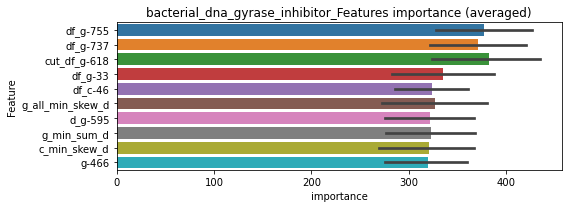

len(train_index) : 3002
len(valid_index) : 751
================================= fold 1/5 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0404578	valid_1's binary_logloss: 0.0919195
[2000]	training's binary_logloss: 0.0202678	valid_1's binary_logloss: 0.0730744
[3000]	training's binary_logloss: 0.0134871	valid_1's binary_logloss: 0.0659814
Early stopping, best iteration is:
[3333]	training's binary_logloss: 0.0121112	valid_1's binary_logloss: 0.0648668


len(train_index) : 3002
len(valid_index) : 751
================================= fold 2/5 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.041019	valid_1's binary_logloss: 0.0788953
[2000]	training's binary_logloss: 0.0204917	valid_1's binary_logloss: 0.0583241
[3000]	training's binary_logloss: 0.013624	valid_1's binary_logloss: 0.0505341
Early stopping, best iteration is:
[3331]	training's binary_logloss: 0.0122499	valid_1's binary_logloss: 0.0490754


len(train_index) : 3002
len(valid_index) : 751
================================= fold 3/5 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0406286	valid_1's binary_logloss: 0.0798436
[2000]	training's binary_logloss: 0.0203017	valid_1's binary_logloss: 0.0586984
[3000]	training's binary_logloss: 0.0134209	valid_1's binary_logloss: 0.0511752
[4000]	training's binary_logloss: 0.0100411	valid_1's binary_logloss: 0.0468601
Early stopping, best iteration is:
[4830]	training's binary_logloss: 0.00831472	valid_1's binary_logloss: 0.0446163


len(train_index) : 3003
len(valid_index) : 750
================================= fold 4/5 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421175	valid_1's binary_logloss: 0.0661489
[2000]	training's binary_logloss: 0.0211056	valid_1's binary_logloss: 0.0439206
[3000]	training's binary_logloss: 0.0140124	valid_1's binary_logloss: 0.0359584
[4000]	training's binary_logloss: 0.0104686	valid_1's binary_logloss: 0.0317101
[5000]	training's binary_logloss: 0.00838411	valid_1's binary_logloss: 0.029164
[6000]	training's binary_logloss: 0.0069878	valid_1's binary_logloss: 0.0273512
Early stopping, best iteration is:
[6027]	training's binary_logloss: 0.00695739	valid_1's binary_logloss: 0.0273067


len(train_index) : 3003
len(valid_index) : 750
================================= fold 5/5 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0411347	valid_1's binary_logloss: 0.0825872
[2000]	training's binary_logloss: 0.0205484	valid_1's binary_logloss: 0.0626914
[3000]	training's binary_logloss: 0.0136086	valid_1's binary_logloss: 0.0557284
Early stopping, best iteration is:
[3837]	training's binary_logloss: 0.0106104	valid_1's binary_logloss: 0.0528071


bacterial_dna_gyrase_inhibitor logloss: 0.047738574429184916
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0465284	valid_1's binary_logloss: 0.19411
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.0429286	valid_1's binary_logloss: 0.191288
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0483031	valid_1's binary_logloss: 0.15095
[2000]	training's binary_logloss: 0.0230666	valid_1's binary_logloss: 0.1265
Early stopping, best iteration is:
[2897]	training's binary_logloss: 0.0155452	valid_1's binary_logloss: 0.119273
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0486881	valid_1's binary_logloss: 0.158474
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0284142	valid_1's binary_logloss: 0.146932
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0485946	valid_1's binary_logloss: 0.157036
Early stopping, best it

1 / 3, AUC score:0.960, PR-AUC:0.929
y_Threshold: 0.0846662, Threshold: 0.1494460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 169 → Positive_corect_labels: 360/2255
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1494460, conf_0:0.10461, conf_1:0.19428
Num_p_label: 18.0, Expected: 19.2, Adj_threshold_1: 0.1794460
threshold: 0.1794460, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 360.0/2255, y_label_rate: 0.1596452
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0384998	valid_1's binary_logloss: 0.115795
[2000]	training's binary_logloss: 0.0185172	valid_1's binary_logloss: 0.0947294
[3000]	training's binary_logloss: 0.012139	valid_1's binary_logloss: 0.0867594
Early stopping, best iteration is:
[3067]	training's binary_logloss: 0.011856	valid_1's binary_logloss: 0.0863691
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0385211	valid_1's binary_logloss: 0.110187
[2000]	training's binary_logloss: 0.0185216	valid_1's binary_logloss: 0.0893255
Early stopping, best iteration is:
[2701]	training's binary_logloss: 0.0135264	valid_1's binary_logloss: 0.0834666
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0383878	valid_1's binary_logloss: 0.121153
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.0192363	valid_1's binary_logloss: 0.10391

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0911886, Threshold: 0.1794460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 348.0/2231
p_label_rate: 0.0035158 Vs.target_rate: 0.00483
Num_p_label: 14.0, Expected: 19.2, Threshold: 0.1794460, conf_0:0.14356, conf_1:0.21534
threshold: 0.1794460, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 348.0/2231, y_label_rate: 0.1559839
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0365749	valid_1's binary_logloss: 0.0984768
[2000]	training's binary_logloss: 0.0175381	valid_1's binary_logloss: 0.0790963
Early stopping, best iteration is:
[2561]	training's binary_logloss: 0.0135723	valid_1's binary_logloss: 0.0737706
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0359707	valid_1's binary_logloss: 0.117643
Early stopping, best iteration is:
[1728]	training's binary_logloss: 0.020187	valid_1's binary_logloss: 0.102198
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0357837	valid_1's binary_logloss: 0.125551
[2000]	training's binary_logloss: 0.0173586	valid_1's binary_logloss: 0.105105
Early stopping, best iteration is:
[2043]	training's binary_logloss: 0.0169858	valid_1's binary_logloss: 0.104571
Training until validation scores don't improve for 29 rounds
[1000]	training's

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.1021365, Threshold: 0.1794460, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 338.0/2211
p_label_rate: 0.0037670 Vs.target_rate: 0.00483
Num_p_label: 15.0, Expected: 19.2, Threshold: 0.1794460, conf_0:0.16150, conf_1:0.19739
threshold: 0.1794460, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 338.0/2211, y_label_rate: 0.1528720


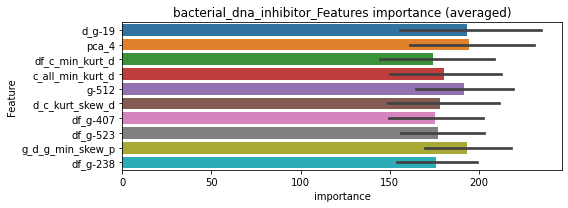

len(train_index) : 1768
len(valid_index) : 443
================================= fold 1/5 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0633216	valid_1's binary_logloss: 0.128894
[2000]	training's binary_logloss: 0.0320934	valid_1's binary_logloss: 0.0974736
[3000]	training's binary_logloss: 0.0211917	valid_1's binary_logloss: 0.0856602
Early stopping, best iteration is:
[3834]	training's binary_logloss: 0.016499	valid_1's binary_logloss: 0.0801336


len(train_index) : 1769
len(valid_index) : 442
================================= fold 2/5 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0627419	valid_1's binary_logloss: 0.14888
[2000]	training's binary_logloss: 0.0319095	valid_1's binary_logloss: 0.118376
[3000]	training's binary_logloss: 0.0211059	valid_1's binary_logloss: 0.10678
Early stopping, best iteration is:
[3214]	training's binary_logloss: 0.0196401	valid_1's binary_logloss: 0.104977


len(train_index) : 1769
len(valid_index) : 442
================================= fold 3/5 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0631003	valid_1's binary_logloss: 0.13599
[2000]	training's binary_logloss: 0.0320017	valid_1's binary_logloss: 0.104275
[3000]	training's binary_logloss: 0.0212518	valid_1's binary_logloss: 0.0924063
Early stopping, best iteration is:
[3501]	training's binary_logloss: 0.0181552	valid_1's binary_logloss: 0.0886211


len(train_index) : 1769
len(valid_index) : 442
================================= fold 4/5 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0666855	valid_1's binary_logloss: 0.106222
[2000]	training's binary_logloss: 0.0335622	valid_1's binary_logloss: 0.0701681
[3000]	training's binary_logloss: 0.0221165	valid_1's binary_logloss: 0.0566808
[4000]	training's binary_logloss: 0.0164572	valid_1's binary_logloss: 0.049405
[5000]	training's binary_logloss: 0.0131402	valid_1's binary_logloss: 0.0448701
[6000]	training's binary_logloss: 0.010946	valid_1's binary_logloss: 0.0419109
[7000]	training's binary_logloss: 0.00939773	valid_1's binary_logloss: 0.0396086
Early stopping, best iteration is:
[7878]	training's binary_logloss: 0.00837248	valid_1's binary_logloss: 0.0380276


len(train_index) : 1769
len(valid_index) : 442
================================= fold 5/5 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0642381	valid_1's binary_logloss: 0.120359
[2000]	training's binary_logloss: 0.032465	valid_1's binary_logloss: 0.0887869
[3000]	training's binary_logloss: 0.0214803	valid_1's binary_logloss: 0.0765017
[4000]	training's binary_logloss: 0.0160125	valid_1's binary_logloss: 0.0695594
[5000]	training's binary_logloss: 0.0127943	valid_1's binary_logloss: 0.065392
Early stopping, best iteration is:
[5388]	training's binary_logloss: 0.0118869	valid_1's binary_logloss: 0.0641145


bacterial_dna_inhibitor logloss: 0.07517693964934077
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000268989	valid_1's binary_logloss: 0.0010764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000272312	valid_1's binary_logloss: 0.00124718
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000279362	valid_1's binary_logloss: 0.00271395
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000279986	valid_1's binary_logloss: 0.0016341
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014627, Threshold: 0.0033848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000276184	valid_1's binary_logloss: 0.00146636


Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0033848, conf_0:0.00237, conf_1:0.00440
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0333848
threshold: 0.0333848, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000268343	valid_1's binary_logloss: 0.000952567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000268778	valid_1's binary_logloss: 0.00100309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00031038	valid_1's binary_logloss: 0.00324678
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026645	valid_1's binary_logloss: 0.0018333
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0690742, Threshold: 0.0333848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0333848, conf_0:0.02671, conf_1:0.04006


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000258736	valid_1's binary_logloss: 0.00169994


threshold: 0.0333848, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000268343	valid_1's binary_logloss: 0.000952567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000268778	valid_1's binary_logloss: 0.00100309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00031038	valid_1's binary_logloss: 0.00324678
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026645	valid_1's binary_logloss: 0.0018333
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0690742, Threshold: 0.0333848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0333848, conf_0:0.03005, conf_1:0.03672


Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000258736	valid_1's binary_logloss: 0.00169994


threshold: 0.0333848, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


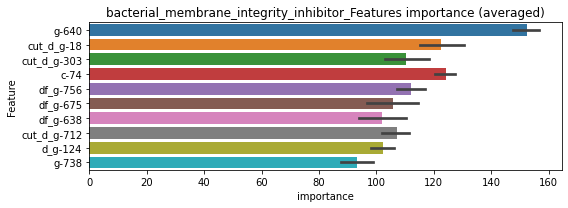

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000266261	valid_1's binary_logloss: 0.000672797


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.00026658	valid_1's binary_logloss: 0.00117622


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000262617	valid_1's binary_logloss: 0.00251957


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000264607	valid_1's binary_logloss: 0.00138938


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000269599	valid_1's binary_logloss: 0.000776529


bacterial_membrane_integrity_inhibitor logloss: 0.001307013112984597
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000394127	valid_1's binary_logloss: 0.0069795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000365416	valid_1's binary_logloss: 0.00114955
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00062004	valid_1's binary_logloss: 0.0109934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000375429	valid_1's binary_logloss: 0.00144354
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000380699	valid_1's binary_logloss: 0.00401526


y_Threshold: 0.0029570, Threshold: 0.0123955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0123955, conf_0:0.00868, conf_1:0.01611
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0423955
threshold: 0.0423955, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000394476	valid_1's binary_logloss: 0.00755041
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000359794	valid_1's binary_logloss: 0.00109376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000410766	valid_1's binary_logloss: 0.0105246
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000377636	valid_1's binary_logloss: 0.0011049
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000356414	valid_1's binary_logloss: 0.00413139


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177235, Threshold: 0.0423955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0070316 Vs.target_rate: 0.00130
Num_p_label: 28.0, Expected: 5.2, Threshold: 0.0423955, conf_0:0.03392, conf_1:0.05087
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_1: 0.0723955
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_2: 0.1023955
threshold: 0.1023955, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000376969	valid_1's binary_logloss: 0.00517856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000359015	valid_1's binary_logloss: 0.00485489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000364952	valid_1's binary_logloss: 0.00141305
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000362955	valid_1's binary_logloss: 0.00108127
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0402201, Threshold: 0.1023955, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00036403	valid_1's binary_logloss: 0.00235759


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, Expected: 5.2, Threshold: 0.1023955, conf_0:0.09216, conf_1:0.11264
threshold: 0.1023955, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


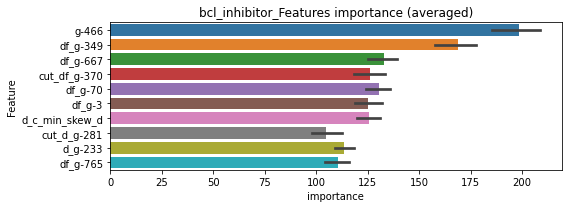

len(train_index) : 3047
len(valid_index) : 762
================================= fold 1/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 762


Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000419894	valid_1's binary_logloss: 0.00581269


================================= fold 2/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000358836	valid_1's binary_logloss: 0.00337054


len(train_index) : 3047
len(valid_index) : 762
================================= fold 3/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000372472	valid_1's binary_logloss: 0.00121429


len(train_index) : 3047
len(valid_index) : 762
================================= fold 4/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000357777	valid_1's binary_logloss: 0.000999982


len(train_index) : 3048
len(valid_index) : 761
================================= fold 5/5 bcl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000359135	valid_1's binary_logloss: 0.00239834


bcl_inhibitor logloss: 0.002760235287092561
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000413587	valid_1's binary_logloss: 0.00926608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000420831	valid_1's binary_logloss: 0.00652211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000415839	valid_1's binary_logloss: 0.00436161
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000436255	valid_1's binary_logloss: 0.00124219
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000424526	valid_1's binary_logloss: 0.00976306


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026758, Threshold: 0.0497459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0497459, conf_0:0.03482, conf_1:0.06467
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_1: 0.0797459
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1097459
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_3: 0.1397459
threshold: 0.1397459, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000400152	valid_1's binary_logloss: 0.00923093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000401127	valid_1's binary_logloss: 0.00586703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000397087	valid_1's binary_logloss: 0.00347693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000399136	valid_1's binary_logloss: 0.000998548
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000397755	valid_1's binary_logloss: 0.00874448


y_Threshold: 0.0334863, Threshold: 0.1397459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1397459, conf_0:0.11180, conf_1:0.16770
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_1: 0.1697459
Num_p_label: 50.0, Expected: 6.4, Adj_threshold_2: 0.1997459
Num_p_label: 47.0, Expected: 6.4, Adj_threshold_3: 0.2297459
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_4: 0.2597459
Num_p_label: 38.0, Expected: 6.4, Adj_threshold_5: 0.2897459
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_6: 0.3197459
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_7: 0.3497459
Num_p_label: 28.0, Expected: 6.4, Adj_threshold_8: 0.3797459
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_9: 0.4097459
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4397459
threshold: 0.4397459, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3803, y_label_rate: 0.1722

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000458133	valid_1's binary_logloss: 0.00425999
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000414994	valid_1's binary_logloss: 0.00221534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00045681	valid_1's binary_logloss: 0.00740308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410617	valid_1's binary_logloss: 0.00527744
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000416102	valid_1's binary_logloss: 0.00433465


y_Threshold: 0.0418025, Threshold: 0.4397459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0060271 Vs.target_rate: 0.00160
Num_p_label: 24.0, Expected: 6.4, Threshold: 0.4397459, conf_0:0.39577, conf_1:0.48372
Num_p_label: 22.0, Expected: 6.4, Adj_threshold_1: 0.4697459
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_2: 0.4997459
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_3: 0.5297459
Num_p_label: 15.0, Expected: 6.4, Adj_threshold_4: 0.5597459
threshold: 0.5597459, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


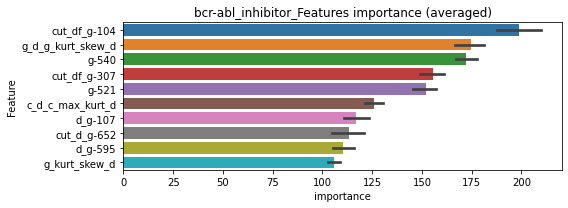

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000404535	valid_1's binary_logloss: 0.00306724


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000414491	valid_1's binary_logloss: 0.00167018


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000450214	valid_1's binary_logloss: 0.00485531


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000409747	valid_1's binary_logloss: 0.00418934


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000440368	valid_1's binary_logloss: 0.00505365


bcr-abl_inhibitor logloss: 0.00376735944176585
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.0008854	valid_1's binary_logloss: 0.023515
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000540156	valid_1's binary_logloss: 0.02446
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000549037	valid_1's binary_logloss: 0.0278928
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000524204	valid_1's binary_logloss: 0.00284765
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0067828, Threshold: 0.0155740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00148424	valid_1's binary_logloss: 0.0354938


p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0155740, conf_0:0.01090, conf_1:0.02025
Num_p_label: 11.0, Expected: 11.2, Adj_threshold_1: 0.0455740
threshold: 0.0455740, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000508966	valid_1's binary_logloss: 0.0163149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000549334	valid_1's binary_logloss: 0.0160687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000539927	valid_1's binary_logloss: 0.0163647
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00063095	valid_1's binary_logloss: 0.0058172
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000531094	valid_1's binary_logloss: 0.0216143


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252208, Threshold: 0.0455740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0037670 Vs.target_rate: 0.00281
Num_p_label: 15.0, Expected: 11.2, Threshold: 0.0455740, conf_0:0.03646, conf_1:0.05469
threshold: 0.0455740, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000568103	valid_1's binary_logloss: 0.0262135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000881028	valid_1's binary_logloss: 0.0189427
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000730268	valid_1's binary_logloss: 0.0255478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000594864	valid_1's binary_logloss: 0.0105478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00054192	valid_1's binary_logloss: 0.0150405


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0245491, Threshold: 0.0455740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0042692 Vs.target_rate: 0.00281
Num_p_label: 17.0, Expected: 11.2, Threshold: 0.0455740, conf_0:0.04102, conf_1:0.05013
Num_p_label: 8.0, Expected: 11.2, Adj_threshold_1: 0.0755740
threshold: 0.0755740, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 650.0/3791, y_label_rate: 0.1714587


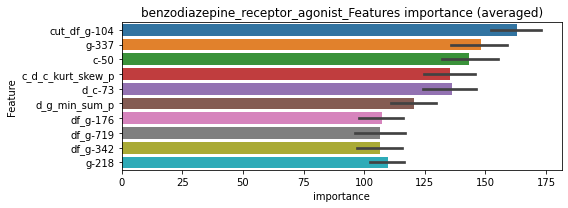

len(train_index) : 3032
len(valid_index) : 759
================================= fold 1/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000696344	valid_1's binary_logloss: 0.023756


len(train_index) : 3033
len(valid_index) : 758
================================= fold 2/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000594559	valid_1's binary_logloss: 0.0165324


len(train_index) : 3033
len(valid_index) : 758
================================= fold 3/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.00054153	valid_1's binary_logloss: 0.00976989


len(train_index) : 3033
len(valid_index) : 758
================================= fold 4/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000655252	valid_1's binary_logloss: 0.0144335


len(train_index) : 3033
len(valid_index) : 758
================================= fold 5/5 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


benzodiazepine_receptor_agonist logloss: 0.016233026727321003


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00111871	valid_1's binary_logloss: 0.0166634


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00034171	valid_1's binary_logloss: 0.00162684
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000350067	valid_1's binary_logloss: 0.00357874
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339542	valid_1's binary_logloss: 0.00212066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000351955	valid_1's binary_logloss: 0.00241654
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016948, Threshold: 0.0087331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087331, conf_0:0.00611, conf_1:0.01135
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387331


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000393462	valid_1's binary_logloss: 0.00729838


threshold: 0.0387331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00033176	valid_1's binary_logloss: 0.00148722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000340811	valid_1's binary_logloss: 0.00374771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000339946	valid_1's binary_logloss: 0.00214972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000341056	valid_1's binary_logloss: 0.00224443
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184668, Threshold: 0.0387331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000410068	valid_1's binary_logloss: 0.00635253


Num_p_label: 22.0, Expected: 4.0, Threshold: 0.0387331, conf_0:0.03099, conf_1:0.04648
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0687331
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.0987331
threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00033176	valid_1's binary_logloss: 0.00148722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000340811	valid_1's binary_logloss: 0.00374771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000339946	valid_1's binary_logloss: 0.00214972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000341056	valid_1's binary_logloss: 0.00224443
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184668, Threshold: 0.0987331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0987331, conf_0:0.08886, conf_1:0.10861


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000410068	valid_1's binary_logloss: 0.00635253


threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


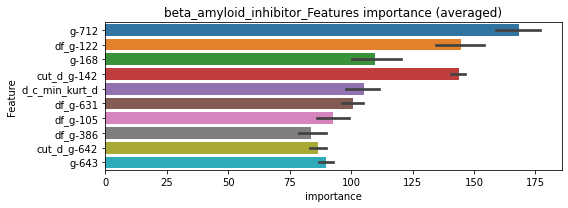

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000341455	valid_1's binary_logloss: 0.0014561


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000341421	valid_1's binary_logloss: 0.00281989


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.00033741	valid_1's binary_logloss: 0.00187628


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000345041	valid_1's binary_logloss: 0.00126449


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000364024	valid_1's binary_logloss: 0.00644594


beta_amyloid_inhibitor logloss: 0.0027726842153881198
bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000783126	valid_1's binary_logloss: 0.0334711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000672767	valid_1's binary_logloss: 0.033404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000628296	valid_1's binary_logloss: 0.0114681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000598049	valid_1's binary_logloss: 0.00777686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000632255	valid_1's binary_logloss: 0.0211774


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061983, Threshold: 0.0136395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0136395, conf_0:0.00955, conf_1:0.01773
Num_p_label: 5.0, Expected: 11.4, Adj_threshold_1: 0.0436395
threshold: 0.0436395, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000623555	valid_1's binary_logloss: 0.0323747
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000787002	valid_1's binary_logloss: 0.0302062
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000725501	valid_1's binary_logloss: 0.0112448
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000565302	valid_1's binary_logloss: 0.00588508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000615473	valid_1's binary_logloss: 0.0188692


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409738, Threshold: 0.0436395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0057760 Vs.target_rate: 0.00286
Num_p_label: 23.0, Expected: 11.4, Threshold: 0.0436395, conf_0:0.03491, conf_1:0.05237
Num_p_label: 11.0, Expected: 11.4, Adj_threshold_1: 0.0736395
threshold: 0.0736395, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00062029	valid_1's binary_logloss: 0.0141071
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000747109	valid_1's binary_logloss: 0.020857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000681256	valid_1's binary_logloss: 0.0220693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000565068	valid_1's binary_logloss: 0.00685129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000578407	valid_1's binary_logloss: 0.0210575


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242973, Threshold: 0.0736395, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00286
Num_p_label: 13.0, Expected: 11.4, Threshold: 0.0736395, conf_0:0.06628, conf_1:0.08100
threshold: 0.0736395, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


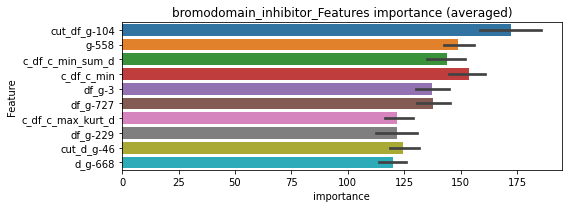

len(train_index) : 3036
len(valid_index) : 760
================================= fold 1/5 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 2/5 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00106594	valid_1's binary_logloss: 0.0191818
Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 3/5 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0010595	valid_1's binary_logloss: 0.0300262
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000607159	valid_1's binary_logloss: 0.0109384


len(train_index) : 3037
len(valid_index) : 759
================================= fold 4/5 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000758059	valid_1's binary_logloss: 0.0109201


len(train_index) : 3037
len(valid_index) : 759
================================= fold 5/5 bromodomain_inhibitor=================================


Training until validation scores don't improve for 29 rounds


bromodomain_inhibitor logloss: 0.021331398805687643


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00107608	valid_1's binary_logloss: 0.0355933


btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00036842	valid_1's binary_logloss: 0.00469789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000398498	valid_1's binary_logloss: 0.00932711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000367201	valid_1's binary_logloss: 0.00124528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000374276	valid_1's binary_logloss: 0.00261911
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000364166	valid_1's binary_logloss: 0.00148112


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024325, Threshold: 0.0187912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0187912, conf_0:0.01315, conf_1:0.02443
Num_p_label: 16.0, Expected: 4.8, Adj_threshold_1: 0.0487912
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0787912
threshold: 0.0787912, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000369747	valid_1's binary_logloss: 0.00453239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000419113	valid_1's binary_logloss: 0.00906805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000357376	valid_1's binary_logloss: 0.000802405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000356523	valid_1's binary_logloss: 0.001699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000355359	valid_1's binary_logloss: 0.00144155


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0160911, Threshold: 0.0787912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0055249 Vs.target_rate: 0.00122
Num_p_label: 22.0, Expected: 4.8, Threshold: 0.0787912, conf_0:0.06303, conf_1:0.09455
Num_p_label: 12.0, Expected: 4.8, Adj_threshold_1: 0.1087912
threshold: 0.1087912, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000369747	valid_1's binary_logloss: 0.00453239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000419113	valid_1's binary_logloss: 0.00906805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000357376	valid_1's binary_logloss: 0.000802405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000356523	valid_1's binary_logloss: 0.001699
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000355359	valid_1's binary_logloss: 0.00144155


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0160911, Threshold: 0.1087912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00122
Num_p_label: 12.0, Expected: 4.8, Threshold: 0.1087912, conf_0:0.09791, conf_1:0.11967
threshold: 0.1087912, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


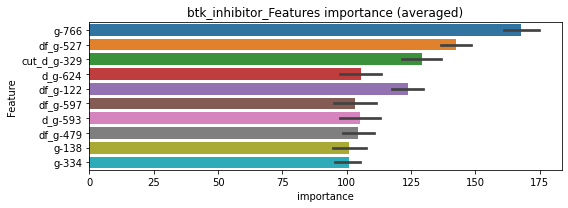

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000401864	valid_1's binary_logloss: 0.00399673


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 btk_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000606611	valid_1's binary_logloss: 0.00780044
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000360223	valid_1's binary_logloss: 0.000869079
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000354242	valid_1's binary_logloss: 0.000859656


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000356263	valid_1's binary_logloss: 0.00155955
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000358953	valid_1's binary_logloss: 0.00155911


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 btk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000354113	valid_1's binary_logloss: 0.00150742
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000351422	valid_1's binary_logloss: 0.00149766


btk_inhibitor logloss: 0.0031437994443264754
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000235584	valid_1's binary_logloss: 0.000566189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000233761	valid_1's binary_logloss: 0.000876845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00026031	valid_1's binary_logloss: 0.000879982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000235719	valid_1's binary_logloss: 0.000362898
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011422, Threshold: 0.0118719, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0118719, conf_0:0.00831, conf_1:0.01543
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.0418719
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_2: 0.0718719


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000236903	valid_1's binary_logloss: 0.000751727


threshold: 0.0718719, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000220365	valid_1's binary_logloss: 0.000533704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000218198	valid_1's binary_logloss: 0.000350939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000218961	valid_1's binary_logloss: 0.000688629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000219314	valid_1's binary_logloss: 0.000283436
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000217835	valid_1's binary_logloss: 0.000690362


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1402735, Threshold: 0.0718719, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0118031 Vs.target_rate: 0.00050
Num_p_label: 47.0, Expected: 2.0, Threshold: 0.0718719, conf_0:0.05750, conf_1:0.08625
Num_p_label: 43.0, Expected: 2.0, Adj_threshold_1: 0.1018719
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1318719
Num_p_label: 38.0, Expected: 2.0, Adj_threshold_3: 0.1618719
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.1918719
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_5: 0.2218719
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2518719
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_7: 0.2818719
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_8: 0.3118719
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_9: 0.3418719
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_10: 0.3718719
threshold: 0.3718719, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000220365	valid_1's binary_logloss: 0.000533704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000218198	valid_1's binary_logloss: 0.000350939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000218961	valid_1's binary_logloss: 0.000688629
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000219314	valid_1's binary_logloss: 0.000283436
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000217835	valid_1's binary_logloss: 0.000690362


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1402735, Threshold: 0.3718719, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, Expected: 2.0, Threshold: 0.3718719, conf_0:0.33468, conf_1:0.40906
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.4018719
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.4318719
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_3: 0.4618719
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_4: 0.4918719
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_5: 0.5218719
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_6: 0.5518719
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.5818719
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6118719
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6418719
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.6718719
threshold: 0.6718719, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label

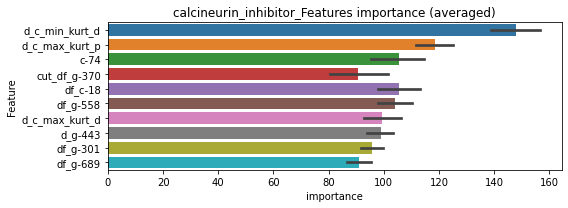

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 calcineurin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000224605	valid_1's binary_logloss: 0.000366474
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000233021	valid_1's binary_logloss: 0.000546178
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000223062	valid_1's binary_logloss: 0.000692397
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000224452	valid_1's binary_logloss: 0.000307432
Training until validation scores don't improve for 29 rounds


calcineurin_inhibitor logloss: 0.0004799085056691247


Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000223301	valid_1's binary_logloss: 0.000487078
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6900
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6900


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0369332	valid_1's binary_logloss: 0.122033
Early stopping, best iteration is:
[1328]	training's binary_logloss: 0.0272545	valid_1's binary_logloss: 0.117302
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0369178	valid_1's binary_logloss: 0.128415
Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.0303382	valid_1's binary_logloss: 0.12514
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0361416	valid_1's binary_logloss: 0.130821
Early stopping, best iteration is:
[1247]	training's binary_logloss: 0.0285436	valid_1's binary_logloss: 0.126383
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0367337	valid_1's binary_logloss: 0.135882
Early stopping, best iteration is:
[1303]	training's binary_logloss: 0.0276912	valid_1's binary_log

1 / 3, AUC score:0.970, PR-AUC:0.944
y_Threshold: 0.0697452, Threshold: 0.1219637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 514 → Positive_corect_labels: 1261/7766
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.1219637, conf_0:0.08537, conf_1:0.15855
threshold: 0.1219637, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1261.0/7766, y_label_rate: 0.1623745
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0244991	valid_1's binary_logloss: 0.088388
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0200444	valid_1's binary_logloss: 0.0856076
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248034	valid_1's binary_logloss: 0.0765014
Early stopping, best iteration is:
[1723]	training's binary_logloss: 0.0136358	valid_1's binary_logloss: 0.0686387
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248099	valid_1's binary_logloss: 0.0801995
Early stopping, best iteration is:
[1527]	training's binary_logloss: 0.0154479	valid_1's binary_logloss: 0.0731449
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253223	valid_1's binary_logloss: 0.0694348
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0124014	valid_1's bin

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0798499, Threshold: 0.1219637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 1199.0/7642
p_label_rate: 0.0118031 Vs.target_rate: 0.01180
Num_p_label: 47.0, Expected: 47.0, Threshold: 0.1219637, conf_0:0.09757, conf_1:0.14636
threshold: 0.1219637, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 1199.0/7642, y_label_rate: 0.1568961
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0195668	valid_1's binary_logloss: 0.0664504
Early stopping, best iteration is:
[1381]	training's binary_logloss: 0.0137791	valid_1's binary_logloss: 0.0620559
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0193248	valid_1's binary_logloss: 0.0690363
Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.0174471	valid_1's binary_logloss: 0.0672997
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0200812	valid_1's binary_logloss: 0.0567913
[2000]	training's binary_logloss: 0.00939741	valid_1's binary_logloss: 0.0475001
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.00932723	valid_1's binary_logloss: 0.0474274
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0203164	valid_1's binary_logloss: 0.0487804
[2000]	tr

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0746214, Threshold: 0.1219637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 1172.0/7588
p_label_rate: 0.0077850 Vs.target_rate: 0.01180
Num_p_label: 31.0, Expected: 47.0, Threshold: 0.1219637, conf_0:0.10977, conf_1:0.13416
threshold: 0.1219637, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1172.0/7588, y_label_rate: 0.1544544


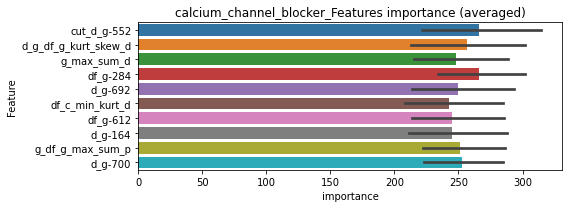

len(train_index) : 6070
len(valid_index) : 1518
================================= fold 1/5 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0329938	valid_1's binary_logloss: 0.0560756
[2000]	training's binary_logloss: 0.0164715	valid_1's binary_logloss: 0.041438
[3000]	training's binary_logloss: 0.0108372	valid_1's binary_logloss: 0.0364321
[4000]	training's binary_logloss: 0.00806137	valid_1's binary_logloss: 0.0338974
Early stopping, best iteration is:
[4541]	training's binary_logloss: 0.00708229	valid_1's binary_logloss: 0.0329826


len(train_index) : 6070
len(valid_index) : 1518
================================= fold 2/5 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0326859	valid_1's binary_logloss: 0.0614487
[2000]	training's binary_logloss: 0.0162179	valid_1's binary_logloss: 0.046238
[3000]	training's binary_logloss: 0.0106913	valid_1's binary_logloss: 0.0408609
Early stopping, best iteration is:
[3505]	training's binary_logloss: 0.00909891	valid_1's binary_logloss: 0.0391658


len(train_index) : 6070
len(valid_index) : 1518
================================= fold 3/5 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0329022	valid_1's binary_logloss: 0.0611114
[2000]	training's binary_logloss: 0.0163277	valid_1's binary_logloss: 0.0461167
[3000]	training's binary_logloss: 0.0106987	valid_1's binary_logloss: 0.040861
Early stopping, best iteration is:
[3063]	training's binary_logloss: 0.010464	valid_1's binary_logloss: 0.0404999


len(train_index) : 6071
len(valid_index) : 1517
================================= fold 4/5 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0323059	valid_1's binary_logloss: 0.0656527
[2000]	training's binary_logloss: 0.0160408	valid_1's binary_logloss: 0.0516003
[3000]	training's binary_logloss: 0.0105458	valid_1's binary_logloss: 0.0464509
Early stopping, best iteration is:
[3770]	training's binary_logloss: 0.00834786	valid_1's binary_logloss: 0.0441536


len(train_index) : 6071
len(valid_index) : 1517
================================= fold 5/5 calcium_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0327979	valid_1's binary_logloss: 0.0618548
[2000]	training's binary_logloss: 0.0162178	valid_1's binary_logloss: 0.0463636
[3000]	training's binary_logloss: 0.0106089	valid_1's binary_logloss: 0.0408513
Early stopping, best iteration is:
[3843]	training's binary_logloss: 0.00824055	valid_1's binary_logloss: 0.0384696


calcium_channel_blocker logloss: 0.039053698499893
calcium_channel_blocker is unpredictable(><)!
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000457862	valid_1's binary_logloss: 0.0169941
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000482726	valid_1's binary_logloss: 0.0078131
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000453623	valid_1's binary_logloss: 0.00395279
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000696899	valid_1's binary_logloss: 0.00632874
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000448221	valid_1's binary_logloss: 0.0121637


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037345, Threshold: 0.0151432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0151432, conf_0:0.01060, conf_1:0.01969
Num_p_label: 10.0, Expected: 7.0, Adj_threshold_1: 0.0451432
threshold: 0.0451432, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000513312	valid_1's binary_logloss: 0.0151812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000529726	valid_1's binary_logloss: 0.00777102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00048163	valid_1's binary_logloss: 0.00361093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000658784	valid_1's binary_logloss: 0.00514215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000458436	valid_1's binary_logloss: 0.0108071


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0355429, Threshold: 0.0451432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0080362 Vs.target_rate: 0.00176
Num_p_label: 32.0, Expected: 7.0, Threshold: 0.0451432, conf_0:0.03611, conf_1:0.05417
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0751432
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.1051432
threshold: 0.1051432, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000513312	valid_1's binary_logloss: 0.0151812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000529726	valid_1's binary_logloss: 0.00777102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00048163	valid_1's binary_logloss: 0.00361093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000658784	valid_1's binary_logloss: 0.00514215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000458436	valid_1's binary_logloss: 0.0108071


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0355429, Threshold: 0.1051432, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00176
Num_p_label: 14.0, Expected: 7.0, Threshold: 0.1051432, conf_0:0.09463, conf_1:0.11566
threshold: 0.1051432, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


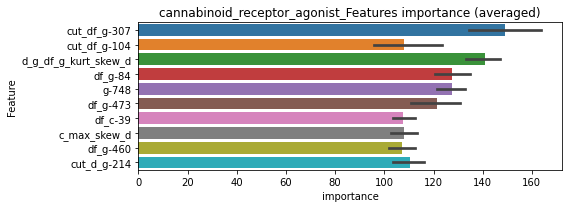

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000482017	valid_1's binary_logloss: 0.0114323


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000573162	valid_1's binary_logloss: 0.010109


len(valid_index) : 762
================================= fold 3/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.00046772	valid_1's binary_logloss: 0.00499537


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000577468	valid_1's binary_logloss: 0.00573635


================================= fold 5/5 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000457778	valid_1's binary_logloss: 0.00999522


cannabinoid_receptor_agonist logloss: 0.008453962641006839
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000890441	valid_1's binary_logloss: 0.026583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000500399	valid_1's binary_logloss: 0.0169789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000622641	valid_1's binary_logloss: 0.0142381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000673889	valid_1's binary_logloss: 0.0147056
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000533595	valid_1's binary_logloss: 0.0278671


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045048, Threshold: 0.0192173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0192173, conf_0:0.01345, conf_1:0.02498
Num_p_label: 12.0, Expected: 9.2, Adj_threshold_1: 0.0492173
threshold: 0.0492173, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00086617	valid_1's binary_logloss: 0.0243326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000609511	valid_1's binary_logloss: 0.00767215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000495673	valid_1's binary_logloss: 0.0179496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000515823	valid_1's binary_logloss: 0.00512372
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000878727	valid_1's binary_logloss: 0.0215045


y_Threshold: 0.0194605, Threshold: 0.0492173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, Expected: 9.2, Threshold: 0.0492173, conf_0:0.03937, conf_1:0.05906
Num_p_label: 17.0, Expected: 9.2, Adj_threshold_1: 0.0792173
threshold: 0.0792173, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000701642	valid_1's binary_logloss: 0.0123795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000482099	valid_1's binary_logloss: 0.00906889
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00048687	valid_1's binary_logloss: 0.00690151
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000480276	valid_1's binary_logloss: 0.00808994
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000533074	valid_1's binary_logloss: 0.0134417


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0247366, Threshold: 0.0792173, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0792173, conf_0:0.07130, conf_1:0.08714
threshold: 0.0792173, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


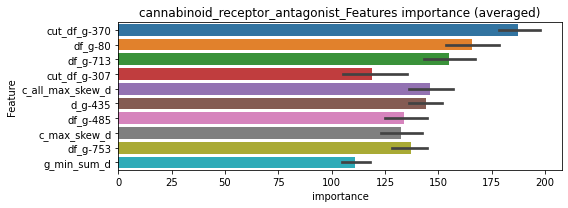

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00111508	valid_1's binary_logloss: 0.0169342
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000492302	valid_1's binary_logloss: 0.0099011


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000807838	valid_1's binary_logloss: 0.00792159


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000550245	valid_1's binary_logloss: 0.00925282


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000501251	valid_1's binary_logloss: 0.0123787


cannabinoid_receptor_antagonist logloss: 0.011277690268730396
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000441812	valid_1's binary_logloss: 0.00542469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456529	valid_1's binary_logloss: 0.00720825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000439792	valid_1's binary_logloss: 0.00161425
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000441077	valid_1's binary_logloss: 0.00122782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000447093	valid_1's binary_logloss: 0.0156467


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027882, Threshold: 0.0223307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0223307, conf_0:0.01563, conf_1:0.02903
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0523307
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0823307
threshold: 0.0823307, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000444377	valid_1's binary_logloss: 0.0050956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000463877	valid_1's binary_logloss: 0.00793505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000435586	valid_1's binary_logloss: 0.00155191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00044329	valid_1's binary_logloss: 0.00106713
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0301987, Threshold: 0.0823307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0102963 Vs.target_rate: 0.00151
Num_p_label: 41.0, Expected: 6.0, Threshold: 0.0823307, conf_0:0.06586, conf_1:0.09880
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_1: 0.1123307
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_2: 0.1423307


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000722005	valid_1's binary_logloss: 0.0175145


Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1723307
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.2023307
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_5: 0.2323307
threshold: 0.2323307, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000444377	valid_1's binary_logloss: 0.0050956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000463877	valid_1's binary_logloss: 0.00793505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000435586	valid_1's binary_logloss: 0.00155191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00044329	valid_1's binary_logloss: 0.00106713
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0301987, Threshold: 0.2323307, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.2323307, conf_0:0.20910, conf_1:0.25556


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000722005	valid_1's binary_logloss: 0.0175145


threshold: 0.2323307, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


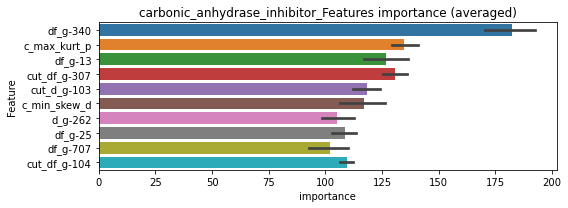

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000441608	valid_1's binary_logloss: 0.00435392


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762


Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000479383	valid_1's binary_logloss: 0.00632998


================================= fold 3/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000448853	valid_1's binary_logloss: 0.00138463


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000438306	valid_1's binary_logloss: 0.00127987


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000471885	valid_1's binary_logloss: 0.0134098


carbonic_anhydrase_inhibitor logloss: 0.005350632283887228
casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000422909	valid_1's binary_logloss: 0.0067602
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00039088	valid_1's binary_logloss: 0.00647859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000383945	valid_1's binary_logloss: 0.0011148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000380834	valid_1's binary_logloss: 0.00131267
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000432422	valid_1's binary_logloss: 0.0122148


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022732, Threshold: 0.0058850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0058850, conf_0:0.00412, conf_1:0.00765
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0358850
threshold: 0.0358850, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000400937	valid_1's binary_logloss: 0.0056997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00037302	valid_1's binary_logloss: 0.00705428
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000382355	valid_1's binary_logloss: 0.000846307
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000365869	valid_1's binary_logloss: 0.00119865
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000379785	valid_1's binary_logloss: 0.0118104


y_Threshold: 0.0337990, Threshold: 0.0358850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0358850, conf_0:0.02871, conf_1:0.04306
threshold: 0.0358850, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000400937	valid_1's binary_logloss: 0.0056997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00037302	valid_1's binary_logloss: 0.00705428
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000382355	valid_1's binary_logloss: 0.000846307
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000365869	valid_1's binary_logloss: 0.00119865
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000379785	valid_1's binary_logloss: 0.0118104


y_Threshold: 0.0337990, Threshold: 0.0358850, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0358850, conf_0:0.03230, conf_1:0.03947
threshold: 0.0358850, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


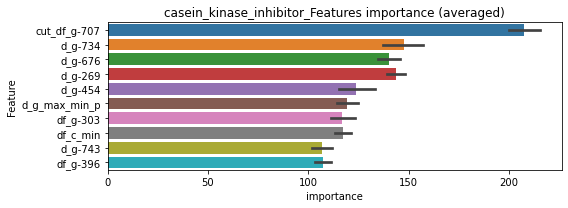

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000377364	valid_1's binary_logloss: 0.00633036


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000374963	valid_1's binary_logloss: 0.00548454


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000372712	valid_1's binary_logloss: 0.000983196


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367055	valid_1's binary_logloss: 0.00162925
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000365447	valid_1's binary_logloss: 0.00162219


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000372018	valid_1's binary_logloss: 0.00996244


casein_kinase_inhibitor logloss: 0.0048793506525687536
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00027573	valid_1's binary_logloss: 0.00127489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000272931	valid_1's binary_logloss: 0.000873662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000292386	valid_1's binary_logloss: 0.0017183
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00027642	valid_1's binary_logloss: 0.00103202
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012475, Threshold: 0.0161147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0161147, conf_0:0.01128, conf_1:0.02095
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0461147
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0761147
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1061147


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000273199	valid_1's binary_logloss: 0.000644549


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1361147
threshold: 0.1361147, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000263306	valid_1's binary_logloss: 0.000971549
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000266977	valid_1's binary_logloss: 0.00066603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000267115	valid_1's binary_logloss: 0.000882859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000263815	valid_1's binary_logloss: 0.000701955
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000263298	valid_1's binary_logloss: 0.000487963


y_Threshold: 0.1334419, Threshold: 0.1361147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.1361147, conf_0:0.10889, conf_1:0.16334
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.1661147
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.1961147
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.2261147
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2561147
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.2861147
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3161147
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.3461147
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3761147
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.4061147
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_10: 0.4361147
threshold: 0.4361147, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000263306	valid_1's binary_logloss: 0.000971549
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000266977	valid_1's binary_logloss: 0.00066603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000267115	valid_1's binary_logloss: 0.000882859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000263815	valid_1's binary_logloss: 0.000701955
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1334419, Threshold: 0.4361147, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000263298	valid_1's binary_logloss: 0.000487963


p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.4361147, conf_0:0.39250, conf_1:0.47973
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4661147
threshold: 0.4661147, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


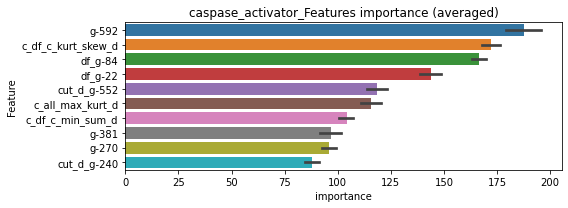

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 caspase_activator=================================


Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000276025	valid_1's binary_logloss: 0.00113104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000264888	valid_1's binary_logloss: 0.000571728


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.0002665	valid_1's binary_logloss: 0.000702791


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.00026519	valid_1's binary_logloss: 0.000948137


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 caspase_activator=================================


Training until validation scores don't improve for 29 rounds


caspase_activator logloss: 0.0007671123636151341


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000269746	valid_1's binary_logloss: 0.000481861


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000283862	valid_1's binary_logloss: 0.00193871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000283081	valid_1's binary_logloss: 0.00166032
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290083	valid_1's binary_logloss: 0.000673567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000284307	valid_1's binary_logloss: 0.000605113
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016929, Threshold: 0.0090138, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090138, conf_0:0.00631, conf_1:0.01172
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390138


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00028472	valid_1's binary_logloss: 0.00519852


threshold: 0.0390138, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000268883	valid_1's binary_logloss: 0.00170811
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000271099	valid_1's binary_logloss: 0.00136797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000277522	valid_1's binary_logloss: 0.00056693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000275574	valid_1's binary_logloss: 0.000478855
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383585, Threshold: 0.0390138, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.0390138, conf_0:0.03121, conf_1:0.04682
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0690138
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0990138
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1290138


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277002	valid_1's binary_logloss: 0.00502768


threshold: 0.1290138, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000268883	valid_1's binary_logloss: 0.00170811
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000271099	valid_1's binary_logloss: 0.00136797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000277522	valid_1's binary_logloss: 0.00056693
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000275574	valid_1's binary_logloss: 0.000478855
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0383585, Threshold: 0.1290138, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1290138, conf_0:0.11611, conf_1:0.14192


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277002	valid_1's binary_logloss: 0.00502768


threshold: 0.1290138, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


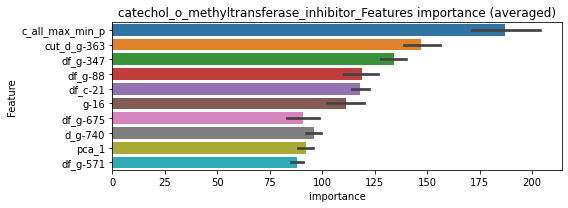

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000276814	valid_1's binary_logloss: 0.00135063


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000275945	valid_1's binary_logloss: 0.00115039


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000277834	valid_1's binary_logloss: 0.000504802


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000278871	valid_1's binary_logloss: 0.000471347


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000286947	valid_1's binary_logloss: 0.00364106


catechol_o_methyltransferase_inhibitor logloss: 0.001423690205216272
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0284208	valid_1's binary_logloss: 0.111353
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0141333	valid_1's binary_logloss: 0.0987572
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0294151	valid_1's binary_logloss: 0.0840809
[2000]	training's binary_logloss: 0.0139049	valid_1's binary_logloss: 0.0685971
Early stopping, best iteration is:
[2808]	training's binary_logloss: 0.0097433	valid_1's binary_logloss: 0.0641714
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0288968	valid_1's binary_logloss: 0.0951809
Early stopping, best iteration is:
[1886]	training's binary_logloss: 0.0145428	valid_1's binary_logloss: 0.0812504
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0304856	valid_1's binary_logloss: 0.071424
[2000]	traini

1 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0491240, Threshold: 0.1078871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1078871, conf_0:0.07552, conf_1:0.14025
Num_p_label: 24.0, Expected: 17.1, Adj_threshold_1: 0.1378871
threshold: 0.1378871, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 643.0/3776, y_label_rate: 0.1702860
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0264866	valid_1's binary_logloss: 0.0887381
[2000]	training's binary_logloss: 0.012627	valid_1's binary_logloss: 0.0776571
Early stopping, best iteration is:
[2054]	training's binary_logloss: 0.0122752	valid_1's binary_logloss: 0.077354
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0274026	valid_1's binary_logloss: 0.0775258
[2000]	training's binary_logloss: 0.0130063	valid_1's binary_logloss: 0.0611207
[3000]	training's binary_logloss: 0.00849775	valid_1's binary_logloss: 0.055345
Early stopping, best iteration is:
[3800]	training's binary_logloss: 0.00666212	valid_1's binary_logloss: 0.0527317
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0270174	valid_1's binary_logloss: 0.0826649
[2000]	training's binary_logloss: 0.0128806	valid_1's binary_logloss: 0.0706021
Early stopping, best iterati

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0679191, Threshold: 0.1378871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 623.0/3736
p_label_rate: 0.0105475 Vs.target_rate: 0.00428
Num_p_label: 42.0, Expected: 17.1, Threshold: 0.1378871, conf_0:0.11031, conf_1:0.16546
Num_p_label: 22.0, Expected: 17.1, Adj_threshold_1: 0.1678871
threshold: 0.1678871, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 623.0/3736, y_label_rate: 0.1667559
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0245175	valid_1's binary_logloss: 0.0771332
[2000]	training's binary_logloss: 0.0116806	valid_1's binary_logloss: 0.066768
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.0110759	valid_1's binary_logloss: 0.0663008
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0246086	valid_1's binary_logloss: 0.0715796
[2000]	training's binary_logloss: 0.011809	valid_1's binary_logloss: 0.0575109
Early stopping, best iteration is:
[2805]	training's binary_logloss: 0.00832433	valid_1's binary_logloss: 0.0530505
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0252546	valid_1's binary_logloss: 0.0599047
[2000]	training's binary_logloss: 0.0120768	valid_1's binary_logloss: 0.0447006
[3000]	training's binary_logloss: 0.00788773	valid_1's binary_logloss: 0.0393352
Early stopping, best iterat

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0787016, Threshold: 0.1678871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 611.0/3712
p_label_rate: 0.0070316 Vs.target_rate: 0.00428
Num_p_label: 28.0, Expected: 17.1, Threshold: 0.1678871, conf_0:0.15110, conf_1:0.18468
Num_p_label: 18.0, Expected: 17.1, Adj_threshold_1: 0.1978871
threshold: 0.1978871, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 611.0/3712, y_label_rate: 0.1646013


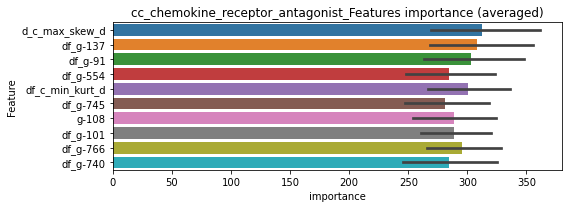

len(train_index) : 2969
len(valid_index) : 743
================================= fold 1/5 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0438518	valid_1's binary_logloss: 0.0832975
[2000]	training's binary_logloss: 0.021982	valid_1's binary_logloss: 0.06066
[3000]	training's binary_logloss: 0.0144848	valid_1's binary_logloss: 0.0517951
[4000]	training's binary_logloss: 0.0107972	valid_1's binary_logloss: 0.0472271
Early stopping, best iteration is:
[4270]	training's binary_logloss: 0.0101024	valid_1's binary_logloss: 0.0462522


len(train_index) : 2969
len(valid_index) : 743
================================= fold 2/5 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0420107	valid_1's binary_logloss: 0.102355
[2000]	training's binary_logloss: 0.0209565	valid_1's binary_logloss: 0.0813237
[3000]	training's binary_logloss: 0.0138305	valid_1's binary_logloss: 0.0737216
Early stopping, best iteration is:
[3762]	training's binary_logloss: 0.0109796	valid_1's binary_logloss: 0.0704336


len(train_index) : 2970
len(valid_index) : 742
================================= fold 3/5 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0431609	valid_1's binary_logloss: 0.0831252
[2000]	training's binary_logloss: 0.0215242	valid_1's binary_logloss: 0.062398
[3000]	training's binary_logloss: 0.0142315	valid_1's binary_logloss: 0.0547179
[4000]	training's binary_logloss: 0.0106313	valid_1's binary_logloss: 0.0508001
Early stopping, best iteration is:
[4830]	training's binary_logloss: 0.00879061	valid_1's binary_logloss: 0.0484474


len(train_index) : 2970
len(valid_index) : 742
================================= fold 4/5 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0446267	valid_1's binary_logloss: 0.0693427
[2000]	training's binary_logloss: 0.0221415	valid_1's binary_logloss: 0.0472037
[3000]	training's binary_logloss: 0.0146365	valid_1's binary_logloss: 0.0390859
[4000]	training's binary_logloss: 0.0109016	valid_1's binary_logloss: 0.0350196
[5000]	training's binary_logloss: 0.00872271	valid_1's binary_logloss: 0.0325123
[6000]	training's binary_logloss: 0.00726776	valid_1's binary_logloss: 0.0307067
Early stopping, best iteration is:
[6417]	training's binary_logloss: 0.00680898	valid_1's binary_logloss: 0.0301521


len(train_index) : 2970
len(valid_index) : 742
================================= fold 5/5 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0433333	valid_1's binary_logloss: 0.0794956
[2000]	training's binary_logloss: 0.0217088	valid_1's binary_logloss: 0.0561229
[3000]	training's binary_logloss: 0.0143301	valid_1's binary_logloss: 0.0474512
[4000]	training's binary_logloss: 0.0107215	valid_1's binary_logloss: 0.0428474
[5000]	training's binary_logloss: 0.0085651	valid_1's binary_logloss: 0.0399208
[6000]	training's binary_logloss: 0.00713006	valid_1's binary_logloss: 0.0378742
[7000]	training's binary_logloss: 0.00612769	valid_1's binary_logloss: 0.0363826
Early stopping, best iteration is:
[7637]	training's binary_logloss: 0.00562895	valid_1's binary_logloss: 0.0355247


cc_chemokine_receptor_antagonist logloss: 0.046168558514372245
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000289399	valid_1's binary_logloss: 0.00155297
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000298052	valid_1's binary_logloss: 0.00234015
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000287079	valid_1's binary_logloss: 0.00125859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000286881	valid_1's binary_logloss: 0.00112954
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012917, Threshold: 0.0032519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032519, conf_0:0.00228, conf_1:0.00423
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332519


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000285296	valid_1's binary_logloss: 0.000624095


threshold: 0.0332519, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281409	valid_1's binary_logloss: 0.00133128
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000284441	valid_1's binary_logloss: 0.00210473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000278187	valid_1's binary_logloss: 0.00118842
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00028274	valid_1's binary_logloss: 0.000807006
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0885575, Threshold: 0.0332519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332519, conf_0:0.02660, conf_1:0.03990


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000280164	valid_1's binary_logloss: 0.000615659


threshold: 0.0332519, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000281409	valid_1's binary_logloss: 0.00133128
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000284441	valid_1's binary_logloss: 0.00210473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000278187	valid_1's binary_logloss: 0.00118842
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00028274	valid_1's binary_logloss: 0.000807006
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0885575, Threshold: 0.0332519, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332519, conf_0:0.02993, conf_1:0.03658


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000280164	valid_1's binary_logloss: 0.000615659


threshold: 0.0332519, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


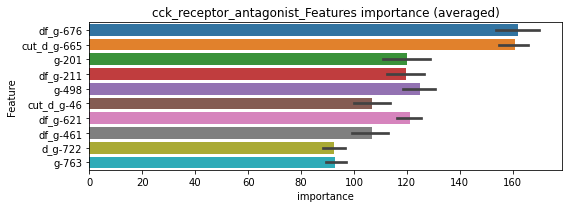

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000282224	valid_1's binary_logloss: 0.00104202


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000282719	valid_1's binary_logloss: 0.00126752


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000280085	valid_1's binary_logloss: 0.00100436


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000283648	valid_1's binary_logloss: 0.000683534


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 cck_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000282654	valid_1's binary_logloss: 0.00057448
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000282654	valid_1's binary_logloss: 0.00057448


cck_receptor_antagonist logloss: 0.0009145783981619047


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7646
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7646


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0458665	valid_1's binary_logloss: 0.144428
[2000]	training's binary_logloss: 0.0210399	valid_1's binary_logloss: 0.123943
Early stopping, best iteration is:
[1971]	training's binary_logloss: 0.0213769	valid_1's binary_logloss: 0.123787
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0457032	valid_1's binary_logloss: 0.154733
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0222224	valid_1's binary_logloss: 0.138294
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0460482	valid_1's binary_logloss: 0.138094
[2000]	training's binary_logloss: 0.0209394	valid_1's binary_logloss: 0.116757
Early stopping, best iteration is:
[2410]	training's binary_logloss: 0.0169304	valid_1's binary_logloss: 0.113646
Training until validation scores don't improve for 29 rounds
[1000]	training's b

1 / 3, AUC score:0.971, PR-AUC:0.947
y_Threshold: 0.0800525, Threshold: 0.1690684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 534 → Positive_corect_labels: 1415/8641
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1690684, conf_0:0.11835, conf_1:0.21979
threshold: 0.1690684, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1415.0/8641, y_label_rate: 0.1637542
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0361342	valid_1's binary_logloss: 0.113007
[2000]	training's binary_logloss: 0.016441	valid_1's binary_logloss: 0.0916375
[3000]	training's binary_logloss: 0.0104786	valid_1's binary_logloss: 0.0850152
Early stopping, best iteration is:
[3008]	training's binary_logloss: 0.0104457	valid_1's binary_logloss: 0.0849137
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0366878	valid_1's binary_logloss: 0.101105
[2000]	training's binary_logloss: 0.0166034	valid_1's binary_logloss: 0.0767469
[3000]	training's binary_logloss: 0.0106073	valid_1's binary_logloss: 0.068216
Early stopping, best iteration is:
[3048]	training's binary_logloss: 0.0104236	valid_1's binary_logloss: 0.0679522
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0364735	valid_1's binary_logloss: 0.103501
[2000]	training's binary_logloss

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.1010060, Threshold: 0.1690684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1358.0/8527
p_label_rate: 0.0145655 Vs.target_rate: 0.01478
Num_p_label: 58.0, Expected: 58.9, Threshold: 0.1690684, conf_0:0.13525, conf_1:0.20288
threshold: 0.1690684, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1358.0/8527, y_label_rate: 0.1592588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0338097	valid_1's binary_logloss: 0.0918929
[2000]	training's binary_logloss: 0.0153547	valid_1's binary_logloss: 0.0699144
[3000]	training's binary_logloss: 0.00979263	valid_1's binary_logloss: 0.0622049
Early stopping, best iteration is:
[3052]	training's binary_logloss: 0.00960182	valid_1's binary_logloss: 0.0617979
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0336962	valid_1's binary_logloss: 0.0986924
[2000]	training's binary_logloss: 0.0152568	valid_1's binary_logloss: 0.07501
[3000]	training's binary_logloss: 0.00974579	valid_1's binary_logloss: 0.0662246
Early stopping, best iteration is:
[3456]	training's binary_logloss: 0.00835731	valid_1's binary_logloss: 0.0642192
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0336642	valid_1's binary_logloss: 0.0954794
[2000]	training's binary_

3 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.1006220, Threshold: 0.1690684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1329.0/8469
p_label_rate: 0.0128076 Vs.target_rate: 0.01478
Num_p_label: 51.0, Expected: 58.9, Threshold: 0.1690684, conf_0:0.15216, conf_1:0.18598
threshold: 0.1690684, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1329.0/8469, y_label_rate: 0.1569253


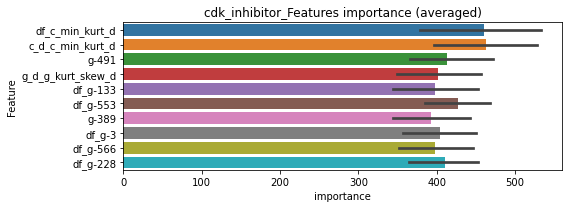

len(train_index) : 6775
len(valid_index) : 1694
================================= fold 1/5 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0587363	valid_1's binary_logloss: 0.113631
[2000]	training's binary_logloss: 0.0282396	valid_1's binary_logloss: 0.0776305
[3000]	training's binary_logloss: 0.0182455	valid_1's binary_logloss: 0.0642841
[4000]	training's binary_logloss: 0.0134383	valid_1's binary_logloss: 0.0572825
[5000]	training's binary_logloss: 0.0106226	valid_1's binary_logloss: 0.0527339
Early stopping, best iteration is:
[5552]	training's binary_logloss: 0.0095206	valid_1's binary_logloss: 0.0508677


len(train_index) : 6775
len(valid_index) : 1694
================================= fold 2/5 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0586775	valid_1's binary_logloss: 0.117382
[2000]	training's binary_logloss: 0.0283323	valid_1's binary_logloss: 0.085012
[3000]	training's binary_logloss: 0.0183298	valid_1's binary_logloss: 0.0733105
Early stopping, best iteration is:
[3932]	training's binary_logloss: 0.0137468	valid_1's binary_logloss: 0.0677824


len(train_index) : 6775
len(valid_index) : 1694
================================= fold 3/5 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0582509	valid_1's binary_logloss: 0.115992
[2000]	training's binary_logloss: 0.0280886	valid_1's binary_logloss: 0.0840175
[3000]	training's binary_logloss: 0.0181521	valid_1's binary_logloss: 0.0719236
[4000]	training's binary_logloss: 0.0133755	valid_1's binary_logloss: 0.0657663
Early stopping, best iteration is:
[4227]	training's binary_logloss: 0.0126	valid_1's binary_logloss: 0.064556


len(train_index) : 6775
len(valid_index) : 1694
================================= fold 4/5 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0587125	valid_1's binary_logloss: 0.118555
[2000]	training's binary_logloss: 0.0283269	valid_1's binary_logloss: 0.0853067
[3000]	training's binary_logloss: 0.0182439	valid_1's binary_logloss: 0.0735263
Early stopping, best iteration is:
[3786]	training's binary_logloss: 0.0142021	valid_1's binary_logloss: 0.068514


len(train_index) : 6776
len(valid_index) : 1693
================================= fold 5/5 cdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0584288	valid_1's binary_logloss: 0.124596
[2000]	training's binary_logloss: 0.0282154	valid_1's binary_logloss: 0.0915687
[3000]	training's binary_logloss: 0.0182415	valid_1's binary_logloss: 0.0797301
[4000]	training's binary_logloss: 0.0134131	valid_1's binary_logloss: 0.0735138
Early stopping, best iteration is:
[4040]	training's binary_logloss: 0.0132735	valid_1's binary_logloss: 0.0732798


cdk_inhibitor logloss: 0.06499901663863476
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000770778	valid_1's binary_logloss: 0.023291
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000556809	valid_1's binary_logloss: 0.0170256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000501361	valid_1's binary_logloss: 0.00343059
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00052243	valid_1's binary_logloss: 0.0075017
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000507257	valid_1's binary_logloss: 0.0260556


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044658, Threshold: 0.0167825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0167825, conf_0:0.01175, conf_1:0.02182
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.0467825
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_2: 0.0767825
threshold: 0.0767825, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000542013	valid_1's binary_logloss: 0.02241
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000565019	valid_1's binary_logloss: 0.0143902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000494347	valid_1's binary_logloss: 0.00301348
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000586919	valid_1's binary_logloss: 0.00588185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000542663	valid_1's binary_logloss: 0.0246551


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0218711, Threshold: 0.0767825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0065294 Vs.target_rate: 0.00227
Num_p_label: 26.0, Expected: 9.0, Threshold: 0.0767825, conf_0:0.06143, conf_1:0.09214
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1067825
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_2: 0.1367825
threshold: 0.1367825, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000543112	valid_1's binary_logloss: 0.0118411
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000487589	valid_1's binary_logloss: 0.00583914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000474211	valid_1's binary_logloss: 0.0199385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000496979	valid_1's binary_logloss: 0.00622283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000468143	valid_1's binary_logloss: 0.0114384


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0342720, Threshold: 0.1367825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0055249 Vs.target_rate: 0.00227
Num_p_label: 22.0, Expected: 9.0, Threshold: 0.1367825, conf_0:0.12310, conf_1:0.15046
threshold: 0.1367825, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


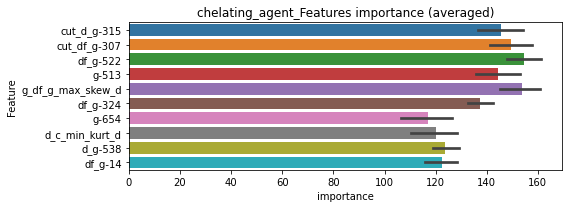

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000531609	valid_1's binary_logloss: 0.01086


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00049044	valid_1's binary_logloss: 0.00551234
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000484951	valid_1's binary_logloss: 0.00550275


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000599933	valid_1's binary_logloss: 0.0184906


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000501579	valid_1's binary_logloss: 0.00494642


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 chelating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000537082	valid_1's binary_logloss: 0.00965419


chelating_agent logloss: 0.009890764791088231
chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000327897	valid_1's binary_logloss: 0.00127728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000324123	valid_1's binary_logloss: 0.00133959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000330631	valid_1's binary_logloss: 0.00197234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000328839	valid_1's binary_logloss: 0.000729034
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000333792	valid_1's binary_logloss: 0.00106571


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023433, Threshold: 0.0416030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0416030, conf_0:0.02912, conf_1:0.05408
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.0716030
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_2: 0.1016030
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1316030
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_4: 0.1616030
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.1916030
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_6: 0.2216030
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_7: 0.2516030
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2816030
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_9: 0.3116030
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.3416030
threshold: 0.3416030, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_labe

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000320847	valid_1's binary_logloss: 0.0011508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00031085	valid_1's binary_logloss: 0.00116621
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317273	valid_1's binary_logloss: 0.00135987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317895	valid_1's binary_logloss: 0.000630901
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1423834, Threshold: 0.3416030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0095429 Vs.target_rate: 0.00101
Num_p_label: 38.0, Expected: 4.0, Threshold: 0.3416030, conf_0:0.27328, conf_1:0.40992
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_1: 0.3716030
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_2: 0.4016030


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000316882	valid_1's binary_logloss: 0.000884777


Num_p_label: 30.0, Expected: 4.0, Adj_threshold_3: 0.4316030
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_4: 0.4616030
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_5: 0.4916030
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_6: 0.5216030
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_7: 0.5516030
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5816030
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6116030
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_10: 0.6416030
threshold: 0.6416030, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000320847	valid_1's binary_logloss: 0.0011508
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00031085	valid_1's binary_logloss: 0.00116621
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317273	valid_1's binary_logloss: 0.00135987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000317895	valid_1's binary_logloss: 0.000630901
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1423834, Threshold: 0.6416030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000316882	valid_1's binary_logloss: 0.000884777


p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.6416030, conf_0:0.57744, conf_1:0.70576
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_1: 0.6716030
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_2: 0.7016030
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.7316030
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_4: 0.7616030
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_5: 0.7916030
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8216030
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8516030
threshold: 0.8516030, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


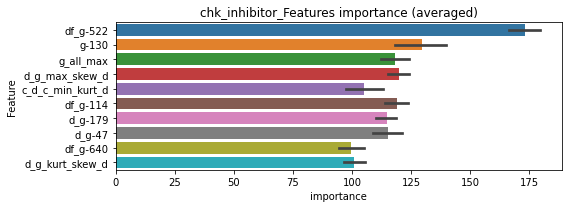

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000322079	valid_1's binary_logloss: 0.00085578


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000315052	valid_1's binary_logloss: 0.00115886


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000317144	valid_1's binary_logloss: 0.00116647


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000327117	valid_1's binary_logloss: 0.000718616


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 chk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000317578	valid_1's binary_logloss: 0.00101092


chk_inhibitor logloss: 0.000982369753844624
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00046259	valid_1's binary_logloss: 0.00572682
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000452991	valid_1's binary_logloss: 0.00431783
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000481751	valid_1's binary_logloss: 0.0190504
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000447073	valid_1's binary_logloss: 0.00177054
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000447674	valid_1's binary_logloss: 0.00975387


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033441, Threshold: 0.0282663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0282663, conf_0:0.01979, conf_1:0.03675
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0582663
threshold: 0.0582663, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000437923	valid_1's binary_logloss: 0.00567938
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000430692	valid_1's binary_logloss: 0.00275954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000450859	valid_1's binary_logloss: 0.0147252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000433089	valid_1's binary_logloss: 0.00146242
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000439363	valid_1's binary_logloss: 0.0100302


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0647460, Threshold: 0.0582663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0178302 Vs.target_rate: 0.00176
Num_p_label: 71.0, Expected: 7.0, Threshold: 0.0582663, conf_0:0.04661, conf_1:0.06992
Num_p_label: 54.0, Expected: 7.0, Adj_threshold_1: 0.0882663
Num_p_label: 51.0, Expected: 7.0, Adj_threshold_2: 0.1182663
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1482663
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_4: 0.1782663
Num_p_label: 29.0, Expected: 7.0, Adj_threshold_5: 0.2082663
Num_p_label: 25.0, Expected: 7.0, Adj_threshold_6: 0.2382663
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_7: 0.2682663
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.2982663
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3282663
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3582663
threshold: 0.3582663, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000437923	valid_1's binary_logloss: 0.00567938
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000430692	valid_1's binary_logloss: 0.00275954
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000450859	valid_1's binary_logloss: 0.0147252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000433089	valid_1's binary_logloss: 0.00146242
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000439363	valid_1's binary_logloss: 0.0100302


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0647460, Threshold: 0.3582663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3582663, conf_0:0.32244, conf_1:0.39409
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.3882663
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_2: 0.4182663
threshold: 0.4182663, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


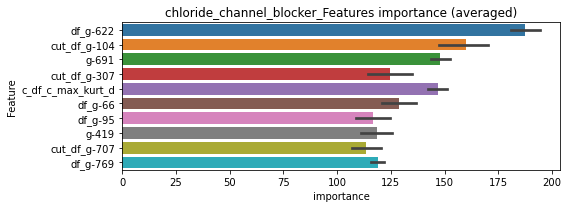

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000437688	valid_1's binary_logloss: 0.0049952


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000469378	valid_1's binary_logloss: 0.00281968


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000477317	valid_1's binary_logloss: 0.0119295


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000450185	valid_1's binary_logloss: 0.00142893


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 chloride_channel_blocker=================================


Training until validation scores don't improve for 29 rounds


chloride_channel_blocker logloss: 0.006101217728892534


Early stopping, best iteration is:
[332]	training's binary_logloss: 0.000992449	valid_1's binary_logloss: 0.00933773


cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000524475	valid_1's binary_logloss: 0.0103185
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000478029	valid_1's binary_logloss: 0.00582963
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000600858	valid_1's binary_logloss: 0.0100315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000452599	valid_1's binary_logloss: 0.00261014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000465583	valid_1's binary_logloss: 0.00736298


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039618, Threshold: 0.0124424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0124424, conf_0:0.00871, conf_1:0.01618
Num_p_label: 8.0, Expected: 8.0, Adj_threshold_1: 0.0424424
threshold: 0.0424424, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000527619	valid_1's binary_logloss: 0.00929547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000459153	valid_1's binary_logloss: 0.00534956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000492113	valid_1's binary_logloss: 0.010347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000444398	valid_1's binary_logloss: 0.00238661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000463435	valid_1's binary_logloss: 0.00591147


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192262, Threshold: 0.0424424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0424424, conf_0:0.03395, conf_1:0.05093
threshold: 0.0424424, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000527619	valid_1's binary_logloss: 0.00929547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000459153	valid_1's binary_logloss: 0.00534956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000492113	valid_1's binary_logloss: 0.010347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000444398	valid_1's binary_logloss: 0.00238661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000463435	valid_1's binary_logloss: 0.00591147


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192262, Threshold: 0.0424424, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0424424, conf_0:0.03820, conf_1:0.04669
threshold: 0.0424424, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


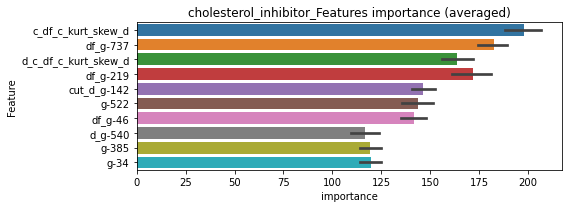

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000565907	valid_1's binary_logloss: 0.0097674


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000464482	valid_1's binary_logloss: 0.00357337


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000564736	valid_1's binary_logloss: 0.0102498


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000461736	valid_1's binary_logloss: 0.00306387


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 cholesterol_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000481498	valid_1's binary_logloss: 0.00670095


cholesterol_inhibitor logloss: 0.006673151689237823
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000495787	valid_1's binary_logloss: 0.011356
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000564575	valid_1's binary_logloss: 0.00730499
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000510459	valid_1's binary_logloss: 0.0141618
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00068771	valid_1's binary_logloss: 0.0125386
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000514742	valid_1's binary_logloss: 0.0104793


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038315, Threshold: 0.0095425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0095425, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0395425
threshold: 0.0395425, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000490127	valid_1's binary_logloss: 0.0114909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000492017	valid_1's binary_logloss: 0.00640818
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000523119	valid_1's binary_logloss: 0.0140553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000605536	valid_1's binary_logloss: 0.0105759
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000504133	valid_1's binary_logloss: 0.0109921


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0241865, Threshold: 0.0395425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0395425, conf_0:0.03163, conf_1:0.04745
threshold: 0.0395425, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000490127	valid_1's binary_logloss: 0.0114909
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000492017	valid_1's binary_logloss: 0.00640818
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000523119	valid_1's binary_logloss: 0.0140553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000605536	valid_1's binary_logloss: 0.0105759
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000504133	valid_1's binary_logloss: 0.0109921


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0241865, Threshold: 0.0395425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0395425, conf_0:0.03559, conf_1:0.04350
threshold: 0.0395425, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


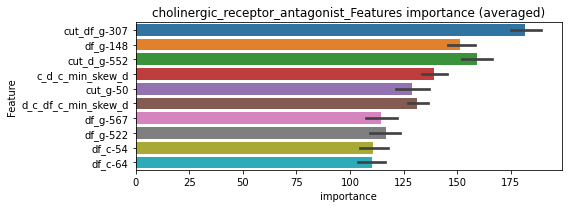

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000516583	valid_1's binary_logloss: 0.0104116


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000625336	valid_1's binary_logloss: 0.00791556


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000606703	valid_1's binary_logloss: 0.0129314


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000679098	valid_1's binary_logloss: 0.0127808


len(valid_index) : 762
================================= fold 5/5 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000530581	valid_1's binary_logloss: 0.00974962


cholinergic_receptor_antagonist logloss: 0.01076150088944357
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000322047	valid_1's binary_logloss: 0.00227315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000324968	valid_1's binary_logloss: 0.00165749
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000325721	valid_1's binary_logloss: 0.00255988
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000317001	valid_1's binary_logloss: 0.00480655
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017724, Threshold: 0.0099978, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000333514	valid_1's binary_logloss: 0.00602729


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0099978, conf_0:0.00700, conf_1:0.01300
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0399978
threshold: 0.0399978, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000318574	valid_1's binary_logloss: 0.00150888
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000312518	valid_1's binary_logloss: 0.00152985
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000315486	valid_1's binary_logloss: 0.00208829
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00032549	valid_1's binary_logloss: 0.00471246
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0133213, Threshold: 0.0399978, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000328583	valid_1's binary_logloss: 0.0056048


p_label_rate: 0.0055249 Vs.target_rate: 0.00101
Num_p_label: 22.0, Expected: 4.0, Threshold: 0.0399978, conf_0:0.03200, conf_1:0.04800
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0699978
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0999978
threshold: 0.0999978, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000318574	valid_1's binary_logloss: 0.00150888
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000312518	valid_1's binary_logloss: 0.00152985
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000315486	valid_1's binary_logloss: 0.00208829
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00032549	valid_1's binary_logloss: 0.00471246
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0133213, Threshold: 0.0999978, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000328583	valid_1's binary_logloss: 0.0056048


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, Expected: 4.0, Threshold: 0.0999978, conf_0:0.09000, conf_1:0.11000
threshold: 0.0999978, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


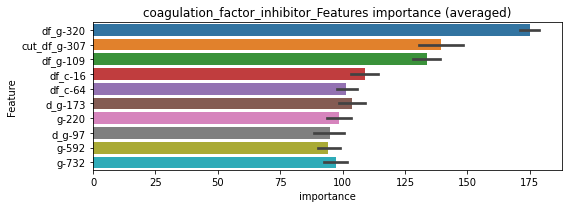

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000318141	valid_1's binary_logloss: 0.000952258
Early stopping, best iteration is:
[1057]	training's binary_logloss: 0.000315304	valid_1's binary_logloss: 0.00094668


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000314196	valid_1's binary_logloss: 0.00158475
Early stopping, best iteration is:
[1100]	training's binary_logloss: 0.000309047	valid_1's binary_logloss: 0.00157864


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00032133	valid_1's binary_logloss: 0.00204281


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00033675	valid_1's binary_logloss: 0.00411132


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000338487	valid_1's binary_logloss: 0.0034283


coagulation_factor_inhibitor logloss: 0.00242157544164696
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000409056	valid_1's binary_logloss: 0.00365723
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000406797	valid_1's binary_logloss: 0.00472133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000415113	valid_1's binary_logloss: 0.00928365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000410958	valid_1's binary_logloss: 0.00299564
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000410918	valid_1's binary_logloss: 0.00282623


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0035845, Threshold: 0.0106302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0106302, conf_0:0.00744, conf_1:0.01382
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0406302
threshold: 0.0406302, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000397449	valid_1's binary_logloss: 0.00339993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000407178	valid_1's binary_logloss: 0.00441178
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000424994	valid_1's binary_logloss: 0.00790125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000402746	valid_1's binary_logloss: 0.00352989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000395369	valid_1's binary_logloss: 0.00227641


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217752, Threshold: 0.0406302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0406302, conf_0:0.03250, conf_1:0.04876
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0706302
threshold: 0.0706302, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000397449	valid_1's binary_logloss: 0.00339993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000407178	valid_1's binary_logloss: 0.00441178
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000424994	valid_1's binary_logloss: 0.00790125
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000402746	valid_1's binary_logloss: 0.00352989
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000395369	valid_1's binary_logloss: 0.00227641


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217752, Threshold: 0.0706302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00151
Num_p_label: 4.0, Expected: 6.0, Threshold: 0.0706302, conf_0:0.06357, conf_1:0.07769
threshold: 0.0706302, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


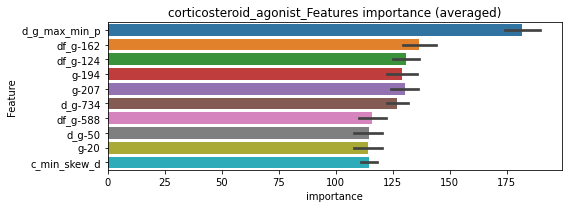

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000395525	valid_1's binary_logloss: 0.00345065
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000391576	valid_1's binary_logloss: 0.00343696


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000404003	valid_1's binary_logloss: 0.00439513


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000410093	valid_1's binary_logloss: 0.00550948


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000397821	valid_1's binary_logloss: 0.00281951
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000396799	valid_1's binary_logloss: 0.00281604


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 corticosteroid_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.00039723	valid_1's binary_logloss: 0.00270534


corticosteroid_agonist logloss: 0.0037725213856565874
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.146397	valid_1's binary_logloss: 0.386745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.15191	valid_1's binary_logloss: 0.379238
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.109332	valid_1's binary_logloss: 0.372665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.0977882	valid_1's binary_logloss: 0.34475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.149436	valid_1's binary_logloss: 0.375911


1 / 3, AUC score:0.744, PR-AUC:0.582
y_Threshold: 0.1669609, Threshold: 0.4597780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 732 → Positive_corect_labels: 345/3144
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4597780, conf_0:0.32184, conf_1:0.59771
threshold: 0.4597780, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 345.0/3144, y_label_rate: 0.1097328
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0424674	valid_1's binary_logloss: 0.172712
Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.0350297	valid_1's binary_logloss: 0.168933
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.042559	valid_1's binary_logloss: 0.157509
Early stopping, best iteration is:
[1691]	training's binary_logloss: 0.0240441	valid_1's binary_logloss: 0.14626
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0422157	valid_1's binary_logloss: 0.171521
Early stopping, best iteration is:
[1671]	training's binary_logloss: 0.0243206	valid_1's binary_logloss: 0.16216
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0438254	valid_1's binary_logloss: 0.151786
Early stopping, best iteration is:
[1376]	training's binary_logloss: 0.0311174	valid_1's binary_loglo

2 / 3, AUC score:0.961, PR-AUC:0.880
y_Threshold: 0.1065500, Threshold: 0.4597780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 277.0/3008
p_label_rate: 0.0298845 Vs.target_rate: 0.01827
Num_p_label: 119.0, Expected: 72.7, Threshold: 0.4597780, conf_0:0.36782, conf_1:0.55173
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_1: 0.4897780
Num_p_label: 112.0, Expected: 72.7, Adj_threshold_2: 0.5197780
Num_p_label: 108.0, Expected: 72.7, Adj_threshold_3: 0.5497780
threshold: 0.5497780, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 277.0/3008, y_label_rate: 0.0920878
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0327518	valid_1's binary_logloss: 0.107681
Early stopping, best iteration is:
[1921]	training's binary_logloss: 0.0160555	valid_1's binary_logloss: 0.0929831
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0329275	valid_1's binary_logloss: 0.106562
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0162363	valid_1's binary_logloss: 0.0885152
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.032381	valid_1's binary_logloss: 0.110845
[2000]	training's binary_logloss: 0.0152612	valid_1's binary_logloss: 0.0926279
Early stopping, best iteration is:
[2397]	training's binary_logloss: 0.0125569	valid_1's binary_logloss: 0.0894345
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0317793	valid_1's binary_logloss: 0.136776
Early stopping, 

3 / 3, AUC score:0.996, PR-AUC:0.983
y_Threshold: 0.1025933, Threshold: 0.5497780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 259.0/2972
p_label_rate: 0.0318935 Vs.target_rate: 0.01827
Num_p_label: 127.0, Expected: 72.7, Threshold: 0.5497780, conf_0:0.49480, conf_1:0.60476
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_1: 0.5797780
Num_p_label: 123.0, Expected: 72.7, Adj_threshold_2: 0.6097780
Num_p_label: 118.0, Expected: 72.7, Adj_threshold_3: 0.6397780
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_4: 0.6697780
Num_p_label: 107.0, Expected: 72.7, Adj_threshold_5: 0.6997780
threshold: 0.6997780, positive_p_label: 107.0/3982, p_label_rate: 0.0268709
positive_y_label: 259.0/2972, y_label_rate: 0.0871467


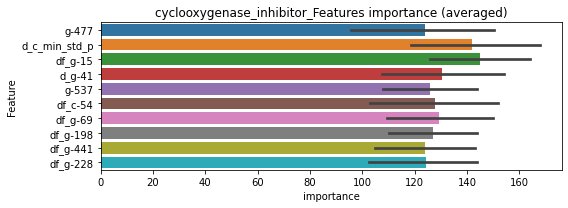

len(train_index) : 2377
len(valid_index) : 595
================================= fold 1/5 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0550217	valid_1's binary_logloss: 0.149025
[2000]	training's binary_logloss: 0.0269651	valid_1's binary_logloss: 0.124153
Early stopping, best iteration is:
[2197]	training's binary_logloss: 0.0243818	valid_1's binary_logloss: 0.121803


len(train_index) : 2377
len(valid_index) : 595
================================= fold 2/5 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0559789	valid_1's binary_logloss: 0.120795
[2000]	training's binary_logloss: 0.0273168	valid_1's binary_logloss: 0.0960736
[3000]	training's binary_logloss: 0.0177964	valid_1's binary_logloss: 0.0868716
Early stopping, best iteration is:
[3030]	training's binary_logloss: 0.0176067	valid_1's binary_logloss: 0.0867173


len(train_index) : 2378
len(valid_index) : 594
================================= fold 3/5 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.056177	valid_1's binary_logloss: 0.130217
[2000]	training's binary_logloss: 0.0277558	valid_1's binary_logloss: 0.10353
[3000]	training's binary_logloss: 0.0181577	valid_1's binary_logloss: 0.0942766
Early stopping, best iteration is:
[3310]	training's binary_logloss: 0.016383	valid_1's binary_logloss: 0.0923866


len(train_index) : 2378
len(valid_index) : 594
================================= fold 4/5 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.056976	valid_1's binary_logloss: 0.121524
[2000]	training's binary_logloss: 0.0280618	valid_1's binary_logloss: 0.09231
Early stopping, best iteration is:
[2299]	training's binary_logloss: 0.0242842	valid_1's binary_logloss: 0.0881891


len(train_index) : 2378
len(valid_index) : 594
================================= fold 5/5 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0561913	valid_1's binary_logloss: 0.129635
Early stopping, best iteration is:
[1811]	training's binary_logloss: 0.0304104	valid_1's binary_logloss: 0.110889


cyclooxygenase_inhibitor logloss: 0.09999970209573687
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0278915	valid_1's binary_logloss: 0.089742
[2000]	training's binary_logloss: 0.0133943	valid_1's binary_logloss: 0.0752206
[3000]	training's binary_logloss: 0.00875265	valid_1's binary_logloss: 0.0698766
Early stopping, best iteration is:
[2993]	training's binary_logloss: 0.00877179	valid_1's binary_logloss: 0.0698448
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0279892	valid_1's binary_logloss: 0.0917447
[2000]	training's binary_logloss: 0.0133001	valid_1's binary_logloss: 0.0789405
Early stopping, best iteration is:
[2365]	training's binary_logloss: 0.0111465	valid_1's binary_logloss: 0.0769419
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0282608	valid_1's binary_logloss: 0.101191
Early stopping, best iteration is:
[1562]	training's binary_logloss: 0.0174995	valid_1's binary_logloss: 0.

1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0428700, Threshold: 0.1057659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 163 → Positive_corect_labels: 638/3762
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1057659, conf_0:0.07404, conf_1:0.13750
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_1: 0.1357659
threshold: 0.1357659, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0250846	valid_1's binary_logloss: 0.0833231
[2000]	training's binary_logloss: 0.0119955	valid_1's binary_logloss: 0.0700027
Early stopping, best iteration is:
[2515]	training's binary_logloss: 0.00944178	valid_1's binary_logloss: 0.0670147
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.026107	valid_1's binary_logloss: 0.0606243
[2000]	training's binary_logloss: 0.0123943	valid_1's binary_logloss: 0.044704
[3000]	training's binary_logloss: 0.00810638	valid_1's binary_logloss: 0.0390528
[4000]	training's binary_logloss: 0.00604006	valid_1's binary_logloss: 0.0362204
[5000]	training's binary_logloss: 0.00483299	valid_1's binary_logloss: 0.0343455
Early stopping, best iteration is:
[5232]	training's binary_logloss: 0.00462378	valid_1's binary_logloss: 0.034031
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0674930, Threshold: 0.1357659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 626.0/3738
p_label_rate: 0.0128076 Vs.target_rate: 0.00437
Num_p_label: 51.0, Expected: 17.4, Threshold: 0.1357659, conf_0:0.10861, conf_1:0.16292
Num_p_label: 36.0, Expected: 17.4, Adj_threshold_1: 0.1657659
Num_p_label: 26.0, Expected: 17.4, Adj_threshold_2: 0.1957659
threshold: 0.1957659, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 626.0/3738, y_label_rate: 0.1674692
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0243507	valid_1's binary_logloss: 0.0710373
[2000]	training's binary_logloss: 0.0116422	valid_1's binary_logloss: 0.0572162
Early stopping, best iteration is:
[2825]	training's binary_logloss: 0.00812894	valid_1's binary_logloss: 0.052468
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0241665	valid_1's binary_logloss: 0.0651271
[2000]	training's binary_logloss: 0.0114984	valid_1's binary_logloss: 0.0510366
Early stopping, best iteration is:
[2812]	training's binary_logloss: 0.00809153	valid_1's binary_logloss: 0.0467039
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0241127	valid_1's binary_logloss: 0.0720413
[2000]	training's binary_logloss: 0.0114994	valid_1's binary_logloss: 0.0570178
Early stopping, best iteration is:
[2725]	training's binary_logloss: 0.00835242	valid_1's binary_logloss: 

3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0838883, Threshold: 0.1957659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 619.0/3724
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.1957659, conf_0:0.17619, conf_1:0.21534
Num_p_label: 29.0, Expected: 17.4, Adj_threshold_1: 0.2257659
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_2: 0.2557659
threshold: 0.2557659, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 619.0/3724, y_label_rate: 0.1662191


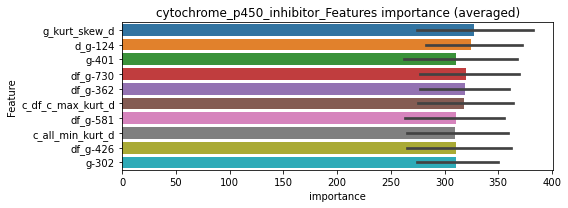

len(train_index) : 2979
len(valid_index) : 745
================================= fold 1/5 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0442692	valid_1's binary_logloss: 0.0829254
[2000]	training's binary_logloss: 0.0218826	valid_1's binary_logloss: 0.0584041
[3000]	training's binary_logloss: 0.0144406	valid_1's binary_logloss: 0.0491707
[4000]	training's binary_logloss: 0.0107837	valid_1's binary_logloss: 0.0446238
[5000]	training's binary_logloss: 0.00863609	valid_1's binary_logloss: 0.0417977
[6000]	training's binary_logloss: 0.00720476	valid_1's binary_logloss: 0.0396771
Early stopping, best iteration is:
[6297]	training's binary_logloss: 0.00687146	valid_1's binary_logloss: 0.0391811


len(train_index) : 2979
len(valid_index) : 745
================================= fold 2/5 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0434188	valid_1's binary_logloss: 0.0848497
[2000]	training's binary_logloss: 0.0214846	valid_1's binary_logloss: 0.0641876
[3000]	training's binary_logloss: 0.0142098	valid_1's binary_logloss: 0.0572142
Early stopping, best iteration is:
[3501]	training's binary_logloss: 0.0121353	valid_1's binary_logloss: 0.0549976


len(train_index) : 2979
len(valid_index) : 745
================================= fold 3/5 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0443193	valid_1's binary_logloss: 0.0782134
[2000]	training's binary_logloss: 0.0219038	valid_1's binary_logloss: 0.055446
[3000]	training's binary_logloss: 0.0144601	valid_1's binary_logloss: 0.0475839
Early stopping, best iteration is:
[3224]	training's binary_logloss: 0.0134032	valid_1's binary_logloss: 0.0462606


len(train_index) : 2979
len(valid_index) : 745
================================= fold 4/5 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0440156	valid_1's binary_logloss: 0.0786361
[2000]	training's binary_logloss: 0.0217946	valid_1's binary_logloss: 0.0547015
[3000]	training's binary_logloss: 0.0144105	valid_1's binary_logloss: 0.045983
[4000]	training's binary_logloss: 0.0107521	valid_1's binary_logloss: 0.0413708
[5000]	training's binary_logloss: 0.00859633	valid_1's binary_logloss: 0.0384554
Early stopping, best iteration is:
[5100]	training's binary_logloss: 0.00842637	valid_1's binary_logloss: 0.0381493


len(train_index) : 2980
len(valid_index) : 744
================================= fold 5/5 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0436068	valid_1's binary_logloss: 0.0878412
[2000]	training's binary_logloss: 0.021526	valid_1's binary_logloss: 0.0657774
[3000]	training's binary_logloss: 0.0141763	valid_1's binary_logloss: 0.057627
[4000]	training's binary_logloss: 0.010572	valid_1's binary_logloss: 0.0535341
Early stopping, best iteration is:
[4822]	training's binary_logloss: 0.0087719	valid_1's binary_logloss: 0.0514803


cytochrome_p450_inhibitor logloss: 0.0460123111030014
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00038456	valid_1's binary_logloss: 0.00683754
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000393947	valid_1's binary_logloss: 0.00233117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000391461	valid_1's binary_logloss: 0.00513425
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000389299	valid_1's binary_logloss: 0.00137871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00038947	valid_1's binary_logloss: 0.00123812


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026713, Threshold: 0.0108326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0108326, conf_0:0.00758, conf_1:0.01408
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_1: 0.0408326
threshold: 0.0408326, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000385931	valid_1's binary_logloss: 0.00853108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000379109	valid_1's binary_logloss: 0.00221885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000400004	valid_1's binary_logloss: 0.00340215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000383956	valid_1's binary_logloss: 0.00111684
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000400732	valid_1's binary_logloss: 0.00135378


y_Threshold: 0.0250429, Threshold: 0.0408326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00151
Num_p_label: 24.0, Expected: 6.0, Threshold: 0.0408326, conf_0:0.03267, conf_1:0.04900
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.0708326
threshold: 0.0708326, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000385931	valid_1's binary_logloss: 0.00853108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000379109	valid_1's binary_logloss: 0.00221885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000400004	valid_1's binary_logloss: 0.00340215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000383956	valid_1's binary_logloss: 0.00111684
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000400732	valid_1's binary_logloss: 0.00135378


y_Threshold: 0.0250429, Threshold: 0.0708326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0708326, conf_0:0.06375, conf_1:0.07792
threshold: 0.0708326, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


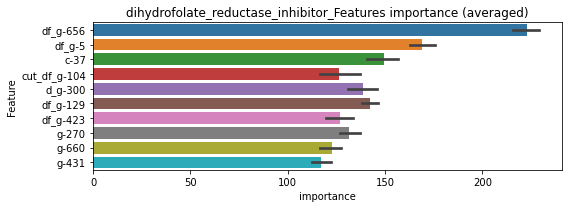

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000512709	valid_1's binary_logloss: 0.00610913
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000388494	valid_1's binary_logloss: 0.00252994


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000414691	valid_1's binary_logloss: 0.00496989


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000383171	valid_1's binary_logloss: 0.00129719
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000379523	valid_1's binary_logloss: 0.0012867


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000382343	valid_1's binary_logloss: 0.00129975
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000378221	valid_1's binary_logloss: 0.00128939


dihydrofolate_reductase_inhibitor logloss: 0.0032371373675250587
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000336296	valid_1's binary_logloss: 0.00202975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000337089	valid_1's binary_logloss: 0.00196619
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000342255	valid_1's binary_logloss: 0.000722863
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00033973	valid_1's binary_logloss: 0.00123828
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021377, Threshold: 0.0087331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0087331, conf_0:0.00611, conf_1:0.01135
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_1: 0.0387331


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000406991	valid_1's binary_logloss: 0.00646341


threshold: 0.0387331, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000320555	valid_1's binary_logloss: 0.00147329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000341057	valid_1's binary_logloss: 0.00184028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000328701	valid_1's binary_logloss: 0.000734542
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000326629	valid_1's binary_logloss: 0.000835969
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637041, Threshold: 0.0387331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00035282	valid_1's binary_logloss: 0.00334058


p_label_rate: 0.0065294 Vs.target_rate: 0.00105
Num_p_label: 26.0, Expected: 4.2, Threshold: 0.0387331, conf_0:0.03099, conf_1:0.04648
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_1: 0.0687331
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_2: 0.0987331
threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000320555	valid_1's binary_logloss: 0.00147329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000341057	valid_1's binary_logloss: 0.00184028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000328701	valid_1's binary_logloss: 0.000734542
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000326629	valid_1's binary_logloss: 0.000835969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00035282	valid_1's binary_logloss: 0.00334058


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0637041, Threshold: 0.0987331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, Expected: 4.2, Threshold: 0.0987331, conf_0:0.08886, conf_1:0.10861
threshold: 0.0987331, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


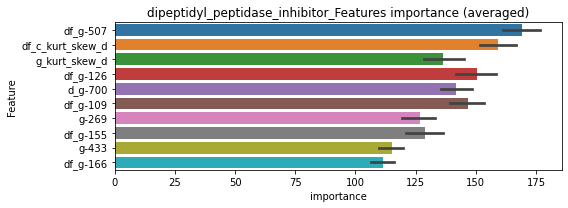

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000337561	valid_1's binary_logloss: 0.0016294


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000322309	valid_1's binary_logloss: 0.00148489
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000322309	valid_1's binary_logloss: 0.00148489


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000331555	valid_1's binary_logloss: 0.000830641


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000324818	valid_1's binary_logloss: 0.000702234
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000324818	valid_1's binary_logloss: 0.000702234


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000326181	valid_1's binary_logloss: 0.00455344


dipeptidyl_peptidase_inhibitor logloss: 0.0018398256940056754
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000164501	valid_1's binary_logloss: 0.00194591
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000163243	valid_1's binary_logloss: 0.000208529
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000162348	valid_1's binary_logloss: 0.00408524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000164758	valid_1's binary_logloss: 0.000201316
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004731, Threshold: 0.0015373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0015373, conf_0:0.00108, conf_1:0.00200
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0315373
threshold: 0.0315373, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000163315	valid_1's binary_logloss: 0.000210417


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00015073	valid_1's binary_logloss: 0.000583756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000151394	valid_1's binary_logloss: 0.000154733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000149702	valid_1's binary_logloss: 0.00254503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000151962	valid_1's binary_logloss: 0.000161035
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398956, Threshold: 0.0315373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0315373, conf_0:0.02523, conf_1:0.03784
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0615373
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0915373


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.0001504	valid_1's binary_logloss: 0.000176672


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1215373
threshold: 0.1215373, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00015073	valid_1's binary_logloss: 0.000583756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000151394	valid_1's binary_logloss: 0.000154733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000149702	valid_1's binary_logloss: 0.00254503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000151962	valid_1's binary_logloss: 0.000161035
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398956, Threshold: 0.1215373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1215373, conf_0:0.10938, conf_1:0.13369
threshold: 0.1215373, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.0001504	valid_1's binary_logloss: 0.000176672


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


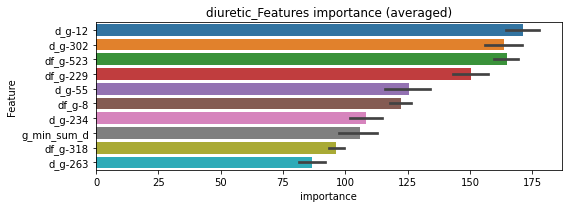

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000155203	valid_1's binary_logloss: 0.000336421


len(train_index) : 3050
len(valid_index) : 763


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000153111	valid_1's binary_logloss: 0.000333027


================================= fold 2/5 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000156233	valid_1's binary_logloss: 0.000164096


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 diuretic=================================


Early stopping, best iteration is:
[1128]	training's binary_logloss: 0.000153975	valid_1's binary_logloss: 0.000161742
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000153716	valid_1's binary_logloss: 0.00136554
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000152051	valid_1's binary_logloss: 0.00135894


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 diuretic=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000155966	valid_1's binary_logloss: 0.000173706


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 diuretic=================================


Early stopping, best iteration is:
[1147]	training's binary_logloss: 0.000153756	valid_1's binary_logloss: 0.000171348
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000156102	valid_1's binary_logloss: 0.000190883


diuretic logloss: 0.0004426222277980293


Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.000153076	valid_1's binary_logloss: 0.000187368


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000480344	valid_1's binary_logloss: 0.0148496
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000490411	valid_1's binary_logloss: 0.015203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000453545	valid_1's binary_logloss: 0.00843372
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000463431	valid_1's binary_logloss: 0.00357503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00047432	valid_1's binary_logloss: 0.00749324


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034495, Threshold: 0.0869038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0869038, conf_0:0.06083, conf_1:0.11297
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_1: 0.1169038
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_2: 0.1469038
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1769038
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_4: 0.2069038
threshold: 0.2069038, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000490221	valid_1's binary_logloss: 0.0138711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00045924	valid_1's binary_logloss: 0.0111822
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.00045733	valid_1's binary_logloss: 0.0079536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000448998	valid_1's binary_logloss: 0.00333521
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000455795	valid_1's binary_logloss: 0.0063001


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1370795, Threshold: 0.2069038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0190859 Vs.target_rate: 0.00202
Num_p_label: 76.0, Expected: 8.0, Threshold: 0.2069038, conf_0:0.16552, conf_1:0.24828
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_1: 0.2369038
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_2: 0.2669038
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_3: 0.2969038
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_4: 0.3269038
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_5: 0.3569038
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_6: 0.3869038
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_7: 0.4169038
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_8: 0.4469038
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_9: 0.4769038
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_10: 0.5069038
threshold: 0.5069038, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000473799	valid_1's binary_logloss: 0.0125126
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000449384	valid_1's binary_logloss: 0.00647068
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000445319	valid_1's binary_logloss: 0.00964675
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000453899	valid_1's binary_logloss: 0.00316857
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000540045	valid_1's binary_logloss: 0.00569624


y_Threshold: 0.0838463, Threshold: 0.5069038, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0135610 Vs.target_rate: 0.00202
Num_p_label: 54.0, Expected: 8.0, Threshold: 0.5069038, conf_0:0.45621, conf_1:0.55759
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_1: 0.5369038
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_2: 0.5669038
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_3: 0.5969038
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_4: 0.6269038
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_5: 0.6569038
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_6: 0.6869038
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_7: 0.7169038
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_8: 0.7469038
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_9: 0.7769038
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_10: 0.8069038
threshold: 0.8069038, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3802, y_label_rate: 0.1717

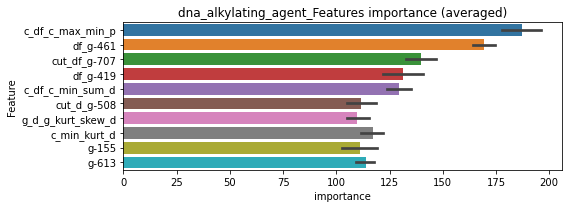

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000446125	valid_1's binary_logloss: 0.00626259


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000446453	valid_1's binary_logloss: 0.00510451


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000498415	valid_1's binary_logloss: 0.00906056


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000446208	valid_1's binary_logloss: 0.00463896


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 dna_alkylating_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000452214	valid_1's binary_logloss: 0.0039046


dna_alkylating_agent logloss: 0.005795851965660441


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7382
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7382


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0491384	valid_1's binary_logloss: 0.157961
Early stopping, best iteration is:
[1536]	training's binary_logloss: 0.0310091	valid_1's binary_logloss: 0.149305
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0475777	valid_1's binary_logloss: 0.182982
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0392109	valid_1's binary_logloss: 0.179724
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0480656	valid_1's binary_logloss: 0.163651
Early stopping, best iteration is:
[1417]	training's binary_logloss: 0.0328723	valid_1's binary_logloss: 0.15702
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0481362	valid_1's binary_logloss: 0.172923
Early stopping, best iteration is:
[1382]	training's binary_logloss: 0.0340864	valid_1's binary_log

1 / 3, AUC score:0.950, PR-AUC:0.912
y_Threshold: 0.0872428, Threshold: 0.1711822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 668 → Positive_corect_labels: 1290/8190
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1711822, conf_0:0.11983, conf_1:0.22254
threshold: 0.1711822, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1290.0/8190, y_label_rate: 0.1575092
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.031985	valid_1's binary_logloss: 0.0992736
[2000]	training's binary_logloss: 0.0146501	valid_1's binary_logloss: 0.0833498
Early stopping, best iteration is:
[2546]	training's binary_logloss: 0.0112165	valid_1's binary_logloss: 0.0801873
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0316745	valid_1's binary_logloss: 0.115626
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0178945	valid_1's binary_logloss: 0.105744
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0320206	valid_1's binary_logloss: 0.103297
[2000]	training's binary_logloss: 0.014574	valid_1's binary_logloss: 0.0875009
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0137783	valid_1's binary_logloss: 0.0865643
Training until validation scores don't improve for 29 rounds
[1000]	training'

2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0964831, Threshold: 0.1711822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 130 → Positive_corect_labels: 1225.0/8060
p_label_rate: 0.0133099 Vs.target_rate: 0.01688
Num_p_label: 53.0, Expected: 67.2, Threshold: 0.1711822, conf_0:0.13695, conf_1:0.20542
threshold: 0.1711822, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 1225.0/8060, y_label_rate: 0.1519851
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0276316	valid_1's binary_logloss: 0.0914107
[2000]	training's binary_logloss: 0.0126472	valid_1's binary_logloss: 0.0770924
Early stopping, best iteration is:
[2157]	training's binary_logloss: 0.011628	valid_1's binary_logloss: 0.0759638
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.027764	valid_1's binary_logloss: 0.092434
Early stopping, best iteration is:
[1834]	training's binary_logloss: 0.0139369	valid_1's binary_logloss: 0.0794645
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0284689	valid_1's binary_logloss: 0.0768722
[2000]	training's binary_logloss: 0.0129843	valid_1's binary_logloss: 0.0633418
Early stopping, best iteration is:
[2353]	training's binary_logloss: 0.0108648	valid_1's binary_logloss: 0.0610278
Training until validation scores don't improve for 29 rounds
[1000]	trainin

3 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0943675, Threshold: 0.1711822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1184.0/7978
p_label_rate: 0.0113009 Vs.target_rate: 0.01688
Num_p_label: 45.0, Expected: 67.2, Threshold: 0.1711822, conf_0:0.15406, conf_1:0.18830
threshold: 0.1711822, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 1184.0/7978, y_label_rate: 0.1484081


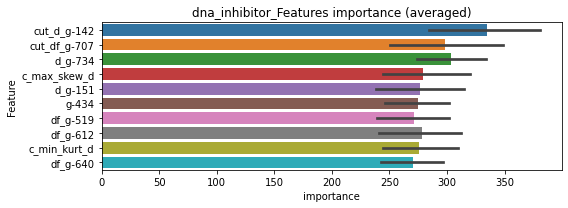

len(train_index) : 6382
len(valid_index) : 1596
================================= fold 1/5 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0457324	valid_1's binary_logloss: 0.104487
[2000]	training's binary_logloss: 0.0221911	valid_1's binary_logloss: 0.0811034
[3000]	training's binary_logloss: 0.0144549	valid_1's binary_logloss: 0.0732761
Early stopping, best iteration is:
[3227]	training's binary_logloss: 0.0133952	valid_1's binary_logloss: 0.0721604


len(train_index) : 6382
len(valid_index) : 1596
================================= fold 2/5 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0470033	valid_1's binary_logloss: 0.0921468
[2000]	training's binary_logloss: 0.0227966	valid_1's binary_logloss: 0.0705022
Early stopping, best iteration is:
[2942]	training's binary_logloss: 0.0151134	valid_1's binary_logloss: 0.06295


len(train_index) : 6382
len(valid_index) : 1596
================================= fold 3/5 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0471433	valid_1's binary_logloss: 0.0879548
[2000]	training's binary_logloss: 0.0227663	valid_1's binary_logloss: 0.0630339
[3000]	training's binary_logloss: 0.0147744	valid_1's binary_logloss: 0.0545309
Early stopping, best iteration is:
[3784]	training's binary_logloss: 0.0115656	valid_1's binary_logloss: 0.0505102


len(train_index) : 6383
len(valid_index) : 1595
================================= fold 4/5 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0462801	valid_1's binary_logloss: 0.0968828
[2000]	training's binary_logloss: 0.0225795	valid_1's binary_logloss: 0.0714924
[3000]	training's binary_logloss: 0.0146514	valid_1's binary_logloss: 0.0622643
Early stopping, best iteration is:
[3642]	training's binary_logloss: 0.0118944	valid_1's binary_logloss: 0.0587394


len(train_index) : 6383
len(valid_index) : 1595
================================= fold 5/5 dna_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0464125	valid_1's binary_logloss: 0.0962318
[2000]	training's binary_logloss: 0.0225555	valid_1's binary_logloss: 0.071164
[3000]	training's binary_logloss: 0.0146689	valid_1's binary_logloss: 0.0626608
Early stopping, best iteration is:
[3215]	training's binary_logloss: 0.01366	valid_1's binary_logloss: 0.0613307


dna_inhibitor logloss: 0.061138418577548474
dna_inhibitor is unpredictable(><)!
dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


mutually exclusive columns: dopamine_receptor_agonist
selected negative label: 2089


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.0507256	valid_1's binary_logloss: 0.205733
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0499022	valid_1's binary_logloss: 0.151559
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.027535	valid_1's binary_logloss: 0.136969
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.050965	valid_1's binary_logloss: 0.130996
[2000]	training's binary_logloss: 0.0244622	valid_1's binary_logloss: 0.107835
Early stopping, best iteration is:
[2675]	training's binary_logloss: 0.0180177	valid_1's binary_logloss: 0.10202
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0520101	valid_1's binary_logloss: 0.127852
[2000]	training's binary_logloss: 0.0250922	valid_1's binary_logloss: 0.101918
Early stopping, best it

1 / 3, AUC score:0.972, PR-AUC:0.938
y_Threshold: 0.0895483, Threshold: 0.1652321, pos_neg_ratio: 0.8000000
Remove_noisy_data: 173 → Positive_corect_labels: 373/2333
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1652321, conf_0:0.11566, conf_1:0.21480
Num_p_label: 23.0, Expected: 20.2, Adj_threshold_1: 0.1952321
threshold: 0.1952321, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 373.0/2333, y_label_rate: 0.1598800
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0374698	valid_1's binary_logloss: 0.143931
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0276151	valid_1's binary_logloss: 0.138446
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0383025	valid_1's binary_logloss: 0.123889
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.0191921	valid_1's binary_logloss: 0.105072
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.038829	valid_1's binary_logloss: 0.117034
[2000]	training's binary_logloss: 0.0186649	valid_1's binary_logloss: 0.096078
[3000]	training's binary_logloss: 0.0122575	valid_1's binary_logloss: 0.0886131
Early stopping, best iteration is:
[3183]	training's binary_logloss: 0.0115482	valid_1's binary_logloss: 0.0878115
Training until validation scores don't improve for 29 rounds
[1000]	training's 

2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.1022686, Threshold: 0.1952321, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 351.0/2289
p_label_rate: 0.0080362 Vs.target_rate: 0.00508
Num_p_label: 32.0, Expected: 20.2, Threshold: 0.1952321, conf_0:0.15619, conf_1:0.23428
Num_p_label: 17.0, Expected: 20.2, Adj_threshold_1: 0.2252321
threshold: 0.2252321, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 351.0/2289, y_label_rate: 0.1533421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0345868	valid_1's binary_logloss: 0.102341
[2000]	training's binary_logloss: 0.016708	valid_1's binary_logloss: 0.0811
Early stopping, best iteration is:
[2850]	training's binary_logloss: 0.011655	valid_1's binary_logloss: 0.073925
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0341677	valid_1's binary_logloss: 0.123873
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.019341	valid_1's binary_logloss: 0.109293
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0348192	valid_1's binary_logloss: 0.0869793
[2000]	training's binary_logloss: 0.0168429	valid_1's binary_logloss: 0.0674489
[3000]	training's binary_logloss: 0.0111153	valid_1's binary_logloss: 0.0600484
Early stopping, best iteration is:
[3454]	training's binary_logloss: 0.00962933	valid_1's binary_logloss: 0.0579599
T

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.1071607, Threshold: 0.2252321, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 341.0/2269
p_label_rate: 0.0050226 Vs.target_rate: 0.00508
Num_p_label: 20.0, Expected: 20.2, Threshold: 0.2252321, conf_0:0.20271, conf_1:0.24776
threshold: 0.2252321, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 341.0/2269, y_label_rate: 0.1502865


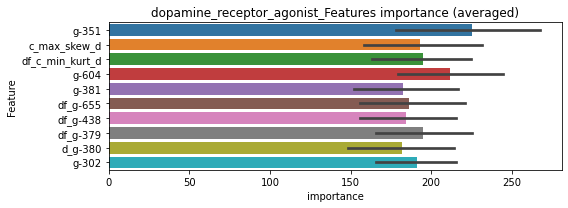

len(train_index) : 1815
len(valid_index) : 454
================================= fold 1/5 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.060864	valid_1's binary_logloss: 0.114242
[2000]	training's binary_logloss: 0.0307874	valid_1's binary_logloss: 0.0873737
[3000]	training's binary_logloss: 0.0205235	valid_1's binary_logloss: 0.0782408
[4000]	training's binary_logloss: 0.0153089	valid_1's binary_logloss: 0.0728193
Early stopping, best iteration is:
[4102]	training's binary_logloss: 0.01494	valid_1's binary_logloss: 0.0724669


len(train_index) : 1815
len(valid_index) : 454
================================= fold 2/5 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0601522	valid_1's binary_logloss: 0.132137
[2000]	training's binary_logloss: 0.0305516	valid_1's binary_logloss: 0.100238
[3000]	training's binary_logloss: 0.0202738	valid_1's binary_logloss: 0.0874514
Early stopping, best iteration is:
[3782]	training's binary_logloss: 0.0160406	valid_1's binary_logloss: 0.0823403


len(train_index) : 1815
len(valid_index) : 454
================================= fold 3/5 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0595776	valid_1's binary_logloss: 0.128757
[2000]	training's binary_logloss: 0.0301246	valid_1's binary_logloss: 0.0993728
[3000]	training's binary_logloss: 0.0200027	valid_1's binary_logloss: 0.0876704
[4000]	training's binary_logloss: 0.0149683	valid_1's binary_logloss: 0.0815952
Early stopping, best iteration is:
[4047]	training's binary_logloss: 0.0147957	valid_1's binary_logloss: 0.0813276


len(train_index) : 1815
len(valid_index) : 454
================================= fold 4/5 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0610107	valid_1's binary_logloss: 0.121877
[2000]	training's binary_logloss: 0.0310292	valid_1's binary_logloss: 0.0924872
[3000]	training's binary_logloss: 0.0206527	valid_1's binary_logloss: 0.0818013
[4000]	training's binary_logloss: 0.0154243	valid_1's binary_logloss: 0.0764579
Early stopping, best iteration is:
[4031]	training's binary_logloss: 0.0153021	valid_1's binary_logloss: 0.0762425


len(train_index) : 1816
len(valid_index) : 453
================================= fold 5/5 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0614185	valid_1's binary_logloss: 0.108307
[2000]	training's binary_logloss: 0.0312143	valid_1's binary_logloss: 0.0777964
[3000]	training's binary_logloss: 0.0207203	valid_1's binary_logloss: 0.06591
[4000]	training's binary_logloss: 0.0154681	valid_1's binary_logloss: 0.060059
[5000]	training's binary_logloss: 0.0123545	valid_1's binary_logloss: 0.0567765
Early stopping, best iteration is:
[5385]	training's binary_logloss: 0.0114613	valid_1's binary_logloss: 0.0554867


dopamine_receptor_agonist logloss: 0.07358074235810912
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0515465	valid_1's binary_logloss: 0.177828
Early stopping, best iteration is:
[1327]	training's binary_logloss: 0.0374711	valid_1's binary_logloss: 0.171747
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0518743	valid_1's binary_logloss: 0.175927
[2000]	training's binary_logloss: 0.0236257	valid_1's binary_logloss: 0.162995
Early stopping, best iteration is:
[2011]	training's binary_logloss: 0.0234787	valid_1's binary_logloss: 0.162927
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.051496	valid_1's binary_logloss: 0.182716
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0422773	valid_1's binary_logloss: 0.179151
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0511919	valid_1's binary_logloss: 0.190039
Early stopping, best

1 / 3, AUC score:0.938, PR-AUC:0.900
y_Threshold: 0.0940474, Threshold: 0.1813327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 726 → Positive_corect_labels: 1246/8050
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.1813327, conf_0:0.12693, conf_1:0.23573
threshold: 0.1813327, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1246.0/8050, y_label_rate: 0.1547826
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0337549	valid_1's binary_logloss: 0.104154
[2000]	training's binary_logloss: 0.015554	valid_1's binary_logloss: 0.0880102
Early stopping, best iteration is:
[2080]	training's binary_logloss: 0.0148898	valid_1's binary_logloss: 0.0873014
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0333802	valid_1's binary_logloss: 0.10975
[2000]	training's binary_logloss: 0.0153922	valid_1's binary_logloss: 0.0932615
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0145586	valid_1's binary_logloss: 0.0924963
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0339116	valid_1's binary_logloss: 0.0964046
[2000]	training's binary_logloss: 0.0156123	valid_1's binary_logloss: 0.0780171
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.0101841	valid_1's binary_logloss: 0.0712

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.1014898, Threshold: 0.1813327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1186.0/7930
p_label_rate: 0.0092918 Vs.target_rate: 0.01780
Num_p_label: 37.0, Expected: 70.9, Threshold: 0.1813327, conf_0:0.14507, conf_1:0.21760
threshold: 0.1813327, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 1186.0/7930, y_label_rate: 0.1495586
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0292837	valid_1's binary_logloss: 0.10775
Early stopping, best iteration is:
[1895]	training's binary_logloss: 0.0143857	valid_1's binary_logloss: 0.0933013
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0298694	valid_1's binary_logloss: 0.0866417
[2000]	training's binary_logloss: 0.0138513	valid_1's binary_logloss: 0.0700711
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.0115363	valid_1's binary_logloss: 0.0672828
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0305735	valid_1's binary_logloss: 0.0784139
[2000]	training's binary_logloss: 0.0141045	valid_1's binary_logloss: 0.0628934
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.0107803	valid_1's binary_logloss: 0.0597998
Training until validation scores don't improve for 29 rounds
[1000]	traini

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0986843, Threshold: 0.1813327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 1146.0/7850
p_label_rate: 0.0097941 Vs.target_rate: 0.01780
Num_p_label: 39.0, Expected: 70.9, Threshold: 0.1813327, conf_0:0.16320, conf_1:0.19947
threshold: 0.1813327, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1146.0/7850, y_label_rate: 0.1459873


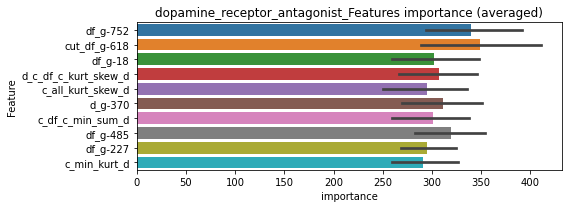

len(train_index) : 6280
len(valid_index) : 1570
================================= fold 1/5 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0500855	valid_1's binary_logloss: 0.097331
[2000]	training's binary_logloss: 0.0246538	valid_1's binary_logloss: 0.0733335
[3000]	training's binary_logloss: 0.0160982	valid_1's binary_logloss: 0.0650859
[4000]	training's binary_logloss: 0.0118736	valid_1's binary_logloss: 0.060677
Early stopping, best iteration is:
[4337]	training's binary_logloss: 0.0108856	valid_1's binary_logloss: 0.0595747


len(train_index) : 6280
len(valid_index) : 1570
================================= fold 2/5 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0503339	valid_1's binary_logloss: 0.103198
[2000]	training's binary_logloss: 0.0245853	valid_1's binary_logloss: 0.0793667
[3000]	training's binary_logloss: 0.0160643	valid_1's binary_logloss: 0.0710957
Early stopping, best iteration is:
[3051]	training's binary_logloss: 0.015778	valid_1's binary_logloss: 0.0707498


len(train_index) : 6280
len(valid_index) : 1570
================================= fold 3/5 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0496638	valid_1's binary_logloss: 0.104221
[2000]	training's binary_logloss: 0.0243845	valid_1's binary_logloss: 0.0795335
[3000]	training's binary_logloss: 0.0159168	valid_1's binary_logloss: 0.0705707
[4000]	training's binary_logloss: 0.0117284	valid_1's binary_logloss: 0.0656636
Early stopping, best iteration is:
[4446]	training's binary_logloss: 0.0104946	valid_1's binary_logloss: 0.0641321


len(train_index) : 6280
len(valid_index) : 1570
================================= fold 4/5 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.050163	valid_1's binary_logloss: 0.102273
[2000]	training's binary_logloss: 0.0247403	valid_1's binary_logloss: 0.0766923
[3000]	training's binary_logloss: 0.0161459	valid_1's binary_logloss: 0.0671864
[4000]	training's binary_logloss: 0.0118972	valid_1's binary_logloss: 0.062574
Early stopping, best iteration is:
[4213]	training's binary_logloss: 0.0112418	valid_1's binary_logloss: 0.0616955


len(train_index) : 6280
len(valid_index) : 1570
================================= fold 5/5 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0500376	valid_1's binary_logloss: 0.102617
[2000]	training's binary_logloss: 0.0247436	valid_1's binary_logloss: 0.0757839
[3000]	training's binary_logloss: 0.0161333	valid_1's binary_logloss: 0.065846
[4000]	training's binary_logloss: 0.0118964	valid_1's binary_logloss: 0.0603913
Early stopping, best iteration is:
[4226]	training's binary_logloss: 0.011209	valid_1's binary_logloss: 0.0593505


dopamine_receptor_antagonist logloss: 0.06310053650921753
dopamine_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0449559	valid_1's binary_logloss: 0.129974
[2000]	training's binary_logloss: 0.0203017	valid_1's binary_logloss: 0.109581
Early stopping, best iteration is:
[2908]	training's binary_logloss: 0.0133364	valid_1's binary_logloss: 0.103958
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0448392	valid_1's binary_logloss: 0.130417
[2000]	training's binary_logloss: 0.0202025	valid_1's binary_logloss: 0.104001
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.017495	valid_1's binary_logloss: 0.100738
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0440656	valid_1's binary_logloss: 0.132634
[2000]	training's binary_logloss: 0.0198792	valid_1's binary_logloss: 0.113411
Early stopping, best iteration is:
[2159]	training's binary_logloss: 0.0182039	valid_1's binary_logloss: 0.111855
Tr

1 / 3, AUC score:0.978, PR-AUC:0.958
y_Threshold: 0.0767461, Threshold: 0.1813366, pos_neg_ratio: 0.8000000
Remove_noisy_data: 513 → Positive_corect_labels: 1405/8551
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1813366, conf_0:0.12694, conf_1:0.23574
threshold: 0.1813366, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1405.0/8551, y_label_rate: 0.1643083
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0354057	valid_1's binary_logloss: 0.10179
[2000]	training's binary_logloss: 0.0159983	valid_1's binary_logloss: 0.078462
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.012231	valid_1's binary_logloss: 0.073308
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0356237	valid_1's binary_logloss: 0.0973173
[2000]	training's binary_logloss: 0.0162323	valid_1's binary_logloss: 0.0744913
[3000]	training's binary_logloss: 0.0103582	valid_1's binary_logloss: 0.067269
Early stopping, best iteration is:
[3057]	training's binary_logloss: 0.0101505	valid_1's binary_logloss: 0.0669809
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0349604	valid_1's binary_logloss: 0.104555
[2000]	training's binary_logloss: 0.0159108	valid_1's binary_logloss: 0.0819027
Early stopping, best iteration is:

2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.1162657, Threshold: 0.1813366, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 1343.0/8427
p_label_rate: 0.0175791 Vs.target_rate: 0.01411
Num_p_label: 70.0, Expected: 56.2, Threshold: 0.1813366, conf_0:0.14507, conf_1:0.21760
threshold: 0.1813366, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 1343.0/8427, y_label_rate: 0.1593687
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0327508	valid_1's binary_logloss: 0.086973
[2000]	training's binary_logloss: 0.0148674	valid_1's binary_logloss: 0.0653221
Early stopping, best iteration is:
[2266]	training's binary_logloss: 0.0128848	valid_1's binary_logloss: 0.0624943
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0323901	valid_1's binary_logloss: 0.095897
[2000]	training's binary_logloss: 0.0147184	valid_1's binary_logloss: 0.072965
[3000]	training's binary_logloss: 0.00939917	valid_1's binary_logloss: 0.0655329
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.00936623	valid_1's binary_logloss: 0.0654309
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0321358	valid_1's binary_logloss: 0.0941213
[2000]	training's binary_logloss: 0.0146448	valid_1's binary_logloss: 0.071135
[3000]	training's binary_logl

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1118985, Threshold: 0.1813366, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1300.0/8341
p_label_rate: 0.0173280 Vs.target_rate: 0.01411
Num_p_label: 69.0, Expected: 56.2, Threshold: 0.1813366, conf_0:0.16320, conf_1:0.19947
threshold: 0.1813366, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 1300.0/8341, y_label_rate: 0.1558566


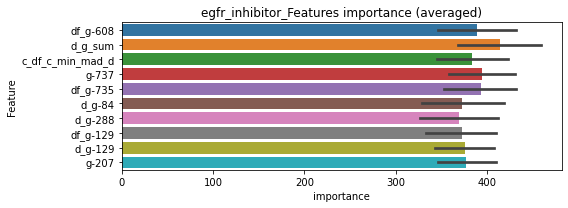

len(train_index) : 6672
len(valid_index) : 1669
================================= fold 1/5 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0545701	valid_1's binary_logloss: 0.112523
[2000]	training's binary_logloss: 0.0262764	valid_1's binary_logloss: 0.0791777
[3000]	training's binary_logloss: 0.0170364	valid_1's binary_logloss: 0.0671823
[4000]	training's binary_logloss: 0.0125635	valid_1's binary_logloss: 0.0606478
Early stopping, best iteration is:
[4216]	training's binary_logloss: 0.0118903	valid_1's binary_logloss: 0.0596752


len(train_index) : 6673
len(valid_index) : 1668
================================= fold 2/5 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0549877	valid_1's binary_logloss: 0.114921
[2000]	training's binary_logloss: 0.0263674	valid_1's binary_logloss: 0.0818148
[3000]	training's binary_logloss: 0.0170736	valid_1's binary_logloss: 0.0700587
Early stopping, best iteration is:
[3838]	training's binary_logloss: 0.0131271	valid_1's binary_logloss: 0.0647342


len(train_index) : 6673
len(valid_index) : 1668
================================= fold 3/5 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0556322	valid_1's binary_logloss: 0.107607
[2000]	training's binary_logloss: 0.0267635	valid_1's binary_logloss: 0.0752813
[3000]	training's binary_logloss: 0.0173338	valid_1's binary_logloss: 0.0637168
[4000]	training's binary_logloss: 0.0127531	valid_1's binary_logloss: 0.0575354
Early stopping, best iteration is:
[4923]	training's binary_logloss: 0.0102489	valid_1's binary_logloss: 0.0539841


len(train_index) : 6673
len(valid_index) : 1668
================================= fold 4/5 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0558536	valid_1's binary_logloss: 0.10744
[2000]	training's binary_logloss: 0.0267807	valid_1's binary_logloss: 0.0752845
[3000]	training's binary_logloss: 0.017275	valid_1's binary_logloss: 0.0628829
Early stopping, best iteration is:
[3838]	training's binary_logloss: 0.0132967	valid_1's binary_logloss: 0.057185


len(train_index) : 6673
len(valid_index) : 1668
================================= fold 5/5 egfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0545795	valid_1's binary_logloss: 0.105978
[2000]	training's binary_logloss: 0.0263611	valid_1's binary_logloss: 0.0740442
[3000]	training's binary_logloss: 0.0170705	valid_1's binary_logloss: 0.0616982
[4000]	training's binary_logloss: 0.0125788	valid_1's binary_logloss: 0.0551209
Early stopping, best iteration is:
[4496]	training's binary_logloss: 0.0111353	valid_1's binary_logloss: 0.0529617


egfr_inhibitor logloss: 0.057708270399099156
egfr_inhibitor is unpredictable(><)!
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000220214	valid_1's binary_logloss: 0.000447599
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000222673	valid_1's binary_logloss: 0.00305155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000215741	valid_1's binary_logloss: 0.000444458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000215281	valid_1's binary_logloss: 0.00106772
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008123, Threshold: 0.0025098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0025098, conf_0:0.00176, conf_1:0.00326
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0325098


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00021488	valid_1's binary_logloss: 0.000552806


threshold: 0.0325098, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000207899	valid_1's binary_logloss: 0.000469685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000210919	valid_1's binary_logloss: 0.00259147
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000205793	valid_1's binary_logloss: 0.000402728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000208615	valid_1's binary_logloss: 0.000916283
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452580, Threshold: 0.0325098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0325098, conf_0:0.02601, conf_1:0.03901


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000205653	valid_1's binary_logloss: 0.000546837


threshold: 0.0325098, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000207899	valid_1's binary_logloss: 0.000469685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000210919	valid_1's binary_logloss: 0.00259147
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000205793	valid_1's binary_logloss: 0.000402728
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000208615	valid_1's binary_logloss: 0.000916283
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452580, Threshold: 0.0325098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0325098, conf_0:0.02926, conf_1:0.03576
threshold: 0.0325098, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000205653	valid_1's binary_logloss: 0.000546837


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


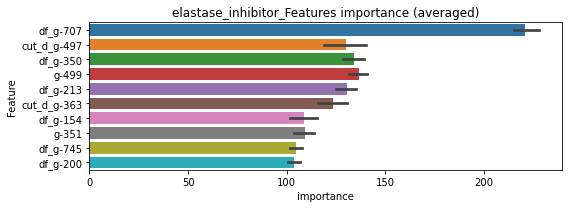

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 elastase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000216255	valid_1's binary_logloss: 0.000396183
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000220461	valid_1's binary_logloss: 0.00166961
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000213253	valid_1's binary_logloss: 0.000500434
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 elastase_inhibitor=================================


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000217409	valid_1's binary_logloss: 0.000440435
Training until validation scores don't improve for 29 rounds


elastase_inhibitor logloss: 0.0006949582578986348


Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000211064	valid_1's binary_logloss: 0.000467158


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000332921	valid_1's binary_logloss: 0.00279617
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000304958	valid_1's binary_logloss: 0.00105272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000302372	valid_1's binary_logloss: 0.00133957
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000305749	valid_1's binary_logloss: 0.000844118
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018141, Threshold: 0.0061654, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0061654, conf_0:0.00432, conf_1:0.00801
Num_p_label: 2.0, Expected: 3.3, Adj_threshold_1: 0.0361654


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00031084	valid_1's binary_logloss: 0.000709246


threshold: 0.0361654, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000295699	valid_1's binary_logloss: 0.00203488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000290207	valid_1's binary_logloss: 0.00128767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000293026	valid_1's binary_logloss: 0.00081584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000296987	valid_1's binary_logloss: 0.000625103
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0663991, Threshold: 0.0361654, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00084
Num_p_label: 14.0, Expected: 3.3, Threshold: 0.0361654, conf_0:0.02893, conf_1:0.04340
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0661654


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000298393	valid_1's binary_logloss: 0.000616266


threshold: 0.0661654, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000295699	valid_1's binary_logloss: 0.00203488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000290207	valid_1's binary_logloss: 0.00128767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000293026	valid_1's binary_logloss: 0.00081584
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000296987	valid_1's binary_logloss: 0.000625103
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0663991, Threshold: 0.0661654, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0661654, conf_0:0.05955, conf_1:0.07278


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000298393	valid_1's binary_logloss: 0.000616266


threshold: 0.0661654, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


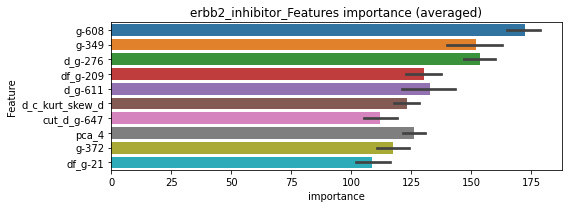

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 erbb2_inhibitor=================================


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000355837	valid_1's binary_logloss: 0.00398189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000294406	valid_1's binary_logloss: 0.0012132


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000295635	valid_1's binary_logloss: 0.000884895


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000295583	valid_1's binary_logloss: 0.000614273
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000295469	valid_1's binary_logloss: 0.000614109


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 erbb2_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000295791	valid_1's binary_logloss: 0.000604792
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.00029536	valid_1's binary_logloss: 0.000603987


erbb2_inhibitor logloss: 0.0014602786455005488


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 4398
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 4398


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0334848	valid_1's binary_logloss: 0.099997
Early stopping, best iteration is:
[1667]	training's binary_logloss: 0.0192468	valid_1's binary_logloss: 0.0913125
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0334348	valid_1's binary_logloss: 0.114181
Early stopping, best iteration is:
[1205]	training's binary_logloss: 0.0275038	valid_1's binary_logloss: 0.112288
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0343495	valid_1's binary_logloss: 0.0936461
[2000]	training's binary_logloss: 0.0169909	valid_1's binary_logloss: 0.08131
Early stopping, best iteration is:
[2231]	training's binary_logloss: 0.0152405	valid_1's binary_logloss: 0.0798484
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0325005	valid_1's binary_logloss: 0.122861
Early stopping, b

1 / 3, AUC score:0.984, PR-AUC:0.968
y_Threshold: 0.0573804, Threshold: 0.0978244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 269 → Positive_corect_labels: 833/5008
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0978244, conf_0:0.06848, conf_1:0.12717
Num_p_label: 16.0, Expected: 26.4, Adj_threshold_1: 0.1278244
threshold: 0.1278244, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 833.0/5008, y_label_rate: 0.1663339
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0267017	valid_1's binary_logloss: 0.0824062
Early stopping, best iteration is:
[1723]	training's binary_logloss: 0.0149562	valid_1's binary_logloss: 0.0734857
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0263894	valid_1's binary_logloss: 0.0809201
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0130935	valid_1's binary_logloss: 0.0705846
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0269533	valid_1's binary_logloss: 0.0693422
[2000]	training's binary_logloss: 0.0128491	valid_1's binary_logloss: 0.0577309
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.011743	valid_1's binary_logloss: 0.0569102
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0265467	valid_1's binary_logloss: 0.0763781
[2000]	train

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0711534, Threshold: 0.1278244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 806.0/4954
p_label_rate: 0.0065294 Vs.target_rate: 0.00663
Num_p_label: 26.0, Expected: 26.4, Threshold: 0.1278244, conf_0:0.10226, conf_1:0.15339
threshold: 0.1278244, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 806.0/4954, y_label_rate: 0.1626968
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235401	valid_1's binary_logloss: 0.0785765
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0156811	valid_1's binary_logloss: 0.0705135
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233473	valid_1's binary_logloss: 0.0687069
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0116806	valid_1's binary_logloss: 0.0573575
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234392	valid_1's binary_logloss: 0.0606511
[2000]	training's binary_logloss: 0.0112306	valid_1's binary_logloss: 0.0491769
Early stopping, best iteration is:
[2728]	training's binary_logloss: 0.0081517	valid_1's binary_logloss: 0.0457979
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234212	valid_1's binary_logloss: 0.067826
Early stoppi

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0784947, Threshold: 0.1278244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 791.0/4924
p_label_rate: 0.0075339 Vs.target_rate: 0.00663
Num_p_label: 30.0, Expected: 26.4, Threshold: 0.1278244, conf_0:0.11504, conf_1:0.14061
threshold: 0.1278244, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 791.0/4924, y_label_rate: 0.1606418


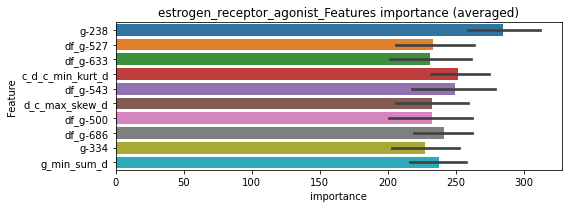

len(train_index) : 3939
len(valid_index) : 985
================================= fold 1/5 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0404004	valid_1's binary_logloss: 0.074411
[2000]	training's binary_logloss: 0.0203197	valid_1's binary_logloss: 0.0557449
[3000]	training's binary_logloss: 0.0134177	valid_1's binary_logloss: 0.0490671
[4000]	training's binary_logloss: 0.00999471	valid_1's binary_logloss: 0.0455342
Early stopping, best iteration is:
[4136]	training's binary_logloss: 0.00965714	valid_1's binary_logloss: 0.0451137


len(train_index) : 3939
len(valid_index) : 985
================================= fold 2/5 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0406488	valid_1's binary_logloss: 0.0768832
[2000]	training's binary_logloss: 0.0203698	valid_1's binary_logloss: 0.0577738
[3000]	training's binary_logloss: 0.0134573	valid_1's binary_logloss: 0.0506243
Early stopping, best iteration is:
[3899]	training's binary_logloss: 0.0102703	valid_1's binary_logloss: 0.0468827


len(train_index) : 3939
len(valid_index) : 985
================================= fold 3/5 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.039913	valid_1's binary_logloss: 0.0765894
[2000]	training's binary_logloss: 0.0200236	valid_1's binary_logloss: 0.0583609
[3000]	training's binary_logloss: 0.0132153	valid_1's binary_logloss: 0.0517139
Early stopping, best iteration is:
[3937]	training's binary_logloss: 0.0100328	valid_1's binary_logloss: 0.0484152


len(train_index) : 3939
len(valid_index) : 985
================================= fold 4/5 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0404148	valid_1's binary_logloss: 0.0740609
[2000]	training's binary_logloss: 0.0202594	valid_1's binary_logloss: 0.0555013
[3000]	training's binary_logloss: 0.0133534	valid_1's binary_logloss: 0.0488661
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.0120158	valid_1's binary_logloss: 0.0476224


len(train_index) : 3940
len(valid_index) : 984
================================= fold 5/5 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0398742	valid_1's binary_logloss: 0.0841598
[2000]	training's binary_logloss: 0.0198741	valid_1's binary_logloss: 0.0648013
[3000]	training's binary_logloss: 0.0131371	valid_1's binary_logloss: 0.05845
Early stopping, best iteration is:
[3942]	training's binary_logloss: 0.00994442	valid_1's binary_logloss: 0.0548817


estrogen_receptor_agonist logloss: 0.04858187609581907
estrogen_receptor_agonist is unpredictable(><)!
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000489053	valid_1's binary_logloss: 0.00889917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000528898	valid_1's binary_logloss: 0.013073
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000520601	valid_1's binary_logloss: 0.00795853
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000493264	valid_1's binary_logloss: 0.00245487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00057925	valid_1's binary_logloss: 0.023339


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038355, Threshold: 0.1803104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1803104, conf_0:0.12622, conf_1:0.23440
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_1: 0.2103104
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.2403104
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.2703104
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_4: 0.3003104
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_5: 0.3303104
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_6: 0.3603104
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_7: 0.3903104
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4203104
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4503104
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_10: 0.4803104
threshold: 0.4803104, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000469439	valid_1's binary_logloss: 0.011367
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000464974	valid_1's binary_logloss: 0.0096921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000584662	valid_1's binary_logloss: 0.014804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000467032	valid_1's binary_logloss: 0.00155965
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0005083	valid_1's binary_logloss: 0.0173032


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178907, Threshold: 0.4803104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0087896 Vs.target_rate: 0.00202
Num_p_label: 35.0, Expected: 8.0, Threshold: 0.4803104, conf_0:0.38425, conf_1:0.57637
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5103104
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.5403104
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_3: 0.5703104
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6003104
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6303104
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_6: 0.6603104
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.6903104
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.7203104
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_9: 0.7503104
threshold: 0.7503104, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pse

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000626442	valid_1's binary_logloss: 0.0154556
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472985	valid_1's binary_logloss: 0.00737824
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000458766	valid_1's binary_logloss: 0.00335721
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000434844	valid_1's binary_logloss: 0.00841812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000490077	valid_1's binary_logloss: 0.0258077


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232932, Threshold: 0.7503104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0047715 Vs.target_rate: 0.00202
Num_p_label: 19.0, Expected: 8.0, Threshold: 0.7503104, conf_0:0.67528, conf_1:0.82534
threshold: 0.7503104, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


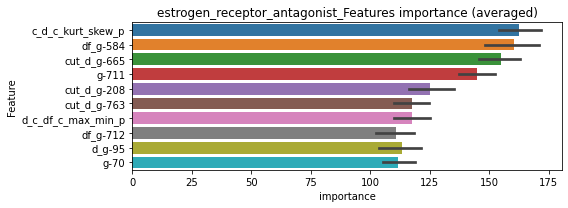

len(train_index) : 3036
len(valid_index) : 760
================================= fold 1/5 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000956649	valid_1's binary_logloss: 0.00932248


================================= fold 2/5 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 3/5 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000619239	valid_1's binary_logloss: 0.0146856
Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 759
================================= fold 4/5 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000642992	valid_1's binary_logloss: 0.00992742
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000458378	valid_1's binary_logloss: 0.00304349


len(train_index) : 3037
len(valid_index) : 759
================================= fold 5/5 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


estrogen_receptor_antagonist logloss: 0.009419544438926805


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000653961	valid_1's binary_logloss: 0.0101189


faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000428743	valid_1's binary_logloss: 0.00710725
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00040441	valid_1's binary_logloss: 0.00506159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000406052	valid_1's binary_logloss: 0.00391332
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000381598	valid_1's binary_logloss: 0.0019522
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000401527	valid_1's binary_logloss: 0.0022905


y_Threshold: 0.0026372, Threshold: 0.0089253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0089253, conf_0:0.00625, conf_1:0.01160
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0389253
threshold: 0.0389253, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000393024	valid_1's binary_logloss: 0.00682464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000382126	valid_1's binary_logloss: 0.00320366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000369932	valid_1's binary_logloss: 0.00389737
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000384468	valid_1's binary_logloss: 0.0016608
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000380846	valid_1's binary_logloss: 0.00312943


y_Threshold: 0.0354379, Threshold: 0.0389253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.0389253, conf_0:0.03114, conf_1:0.04671
threshold: 0.0389253, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000393024	valid_1's binary_logloss: 0.00682464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000382126	valid_1's binary_logloss: 0.00320366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000369932	valid_1's binary_logloss: 0.00389737
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000384468	valid_1's binary_logloss: 0.0016608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000380846	valid_1's binary_logloss: 0.00312943


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354379, Threshold: 0.0389253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.0389253, conf_0:0.03503, conf_1:0.04282
threshold: 0.0389253, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


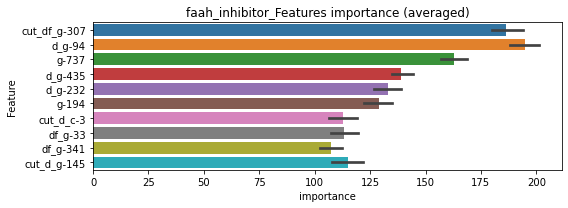

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000381928	valid_1's binary_logloss: 0.00537445


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 faah_inhibitor=================================


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000476167	valid_1's binary_logloss: 0.00421795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000391985	valid_1's binary_logloss: 0.00314025


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000382006	valid_1's binary_logloss: 0.00157351


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 faah_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000377297	valid_1's binary_logloss: 0.00243304


faah_inhibitor logloss: 0.0033483142132891327
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000286286	valid_1's binary_logloss: 0.00151967
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000267376	valid_1's binary_logloss: 0.000744864
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000271594	valid_1's binary_logloss: 0.000977142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000273661	valid_1's binary_logloss: 0.00159751
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012936, Threshold: 0.0039740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039740, conf_0:0.00278, conf_1:0.00517
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339740


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000275961	valid_1's binary_logloss: 0.00356453


threshold: 0.0339740, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026987	valid_1's binary_logloss: 0.00207683
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000267448	valid_1's binary_logloss: 0.000628068
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000264691	valid_1's binary_logloss: 0.000625089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.000982881
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177715, Threshold: 0.0339740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339740, conf_0:0.02718, conf_1:0.04077
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0639740
threshold: 0.0639740, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000302114	valid_1's binary_logloss: 0.00405361


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00026987	valid_1's binary_logloss: 0.00207683
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000267448	valid_1's binary_logloss: 0.000628068
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000264691	valid_1's binary_logloss: 0.000625089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.000982881
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177715, Threshold: 0.0639740, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0639740, conf_0:0.05758, conf_1:0.07037
threshold: 0.0639740, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000302114	valid_1's binary_logloss: 0.00405361


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


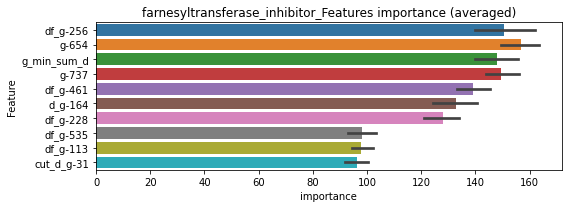

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000272309	valid_1's binary_logloss: 0.00184871


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000265001	valid_1's binary_logloss: 0.000687747
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000263455	valid_1's binary_logloss: 0.000686028


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000263724	valid_1's binary_logloss: 0.000594246
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000263728	valid_1's binary_logloss: 0.000594238


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000263757	valid_1's binary_logloss: 0.000818458
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000263757	valid_1's binary_logloss: 0.000818458


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


farnesyltransferase_inhibitor logloss: 0.0014111545286483386


Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000291818	valid_1's binary_logloss: 0.00310918


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000329047	valid_1's binary_logloss: 0.00121881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000330163	valid_1's binary_logloss: 0.00349934
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000334963	valid_1's binary_logloss: 0.00759003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000321432	valid_1's binary_logloss: 0.00264852
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021280, Threshold: 0.0095001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0095001, conf_0:0.00665, conf_1:0.01235
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0395001


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000421997	valid_1's binary_logloss: 0.00435016


threshold: 0.0395001, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000317769	valid_1's binary_logloss: 0.00112123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000318691	valid_1's binary_logloss: 0.00269117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000317344	valid_1's binary_logloss: 0.00881169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000318939	valid_1's binary_logloss: 0.00247311
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253741, Threshold: 0.0395001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, Expected: 4.2, Threshold: 0.0395001, conf_0:0.03160, conf_1:0.04740
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0695001


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00033115	valid_1's binary_logloss: 0.00487574


threshold: 0.0695001, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000317769	valid_1's binary_logloss: 0.00112123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000318691	valid_1's binary_logloss: 0.00269117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000317344	valid_1's binary_logloss: 0.00881169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000318939	valid_1's binary_logloss: 0.00247311
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253741, Threshold: 0.0695001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0695001, conf_0:0.06255, conf_1:0.07645


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00033115	valid_1's binary_logloss: 0.00487574


threshold: 0.0695001, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


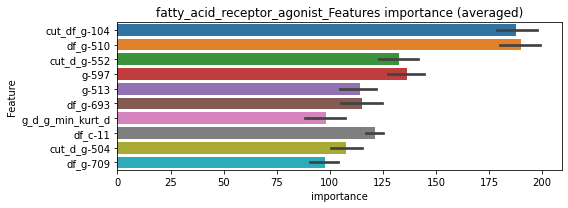

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000329757	valid_1's binary_logloss: 0.000915236


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000331194	valid_1's binary_logloss: 0.00163698


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000342557	valid_1's binary_logloss: 0.00911442


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000324581	valid_1's binary_logloss: 0.00135243


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000359986	valid_1's binary_logloss: 0.00510219


fatty_acid_receptor_agonist logloss: 0.0036230522549998414
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000497005	valid_1's binary_logloss: 0.0184103
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000480797	valid_1's binary_logloss: 0.00881235
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000491933	valid_1's binary_logloss: 0.00894979
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000477915	valid_1's binary_logloss: 0.00499104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.00048704	valid_1's binary_logloss: 0.00629871


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036500, Threshold: 0.0172548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0172548, conf_0:0.01208, conf_1:0.02243
Num_p_label: 21.0, Expected: 8.4, Adj_threshold_1: 0.0472548
Num_p_label: 14.0, Expected: 8.4, Adj_threshold_2: 0.0772548
threshold: 0.0772548, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000499227	valid_1's binary_logloss: 0.0209075
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000489178	valid_1's binary_logloss: 0.00676469
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000495162	valid_1's binary_logloss: 0.0100616
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000483716	valid_1's binary_logloss: 0.00464505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000473652	valid_1's binary_logloss: 0.00621701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176917, Threshold: 0.0772548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00210
Num_p_label: 19.0, Expected: 8.4, Threshold: 0.0772548, conf_0:0.06180, conf_1:0.09271
threshold: 0.0772548, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000471157	valid_1's binary_logloss: 0.003351
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000474438	valid_1's binary_logloss: 0.00875487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000479937	valid_1's binary_logloss: 0.00224149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000483398	valid_1's binary_logloss: 0.00264252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000515856	valid_1's binary_logloss: 0.0206309


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163435, Threshold: 0.0772548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0050226 Vs.target_rate: 0.00210
Num_p_label: 20.0, Expected: 8.4, Threshold: 0.0772548, conf_0:0.06953, conf_1:0.08498
threshold: 0.0772548, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


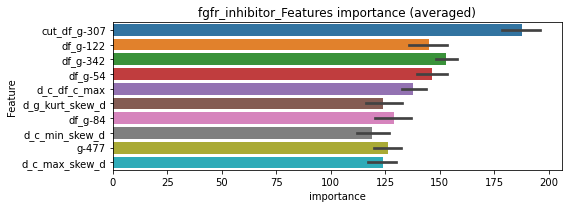

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000496435	valid_1's binary_logloss: 0.00372184


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000475618	valid_1's binary_logloss: 0.0081843


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000482536	valid_1's binary_logloss: 0.00236273


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000478058	valid_1's binary_logloss: 0.00247297
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000476895	valid_1's binary_logloss: 0.00246663


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 fgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000480511	valid_1's binary_logloss: 0.0186418


fgfr_inhibitor logloss: 0.007075483228278965


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 7069
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 7069


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0379146	valid_1's binary_logloss: 0.109061
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0191867	valid_1's binary_logloss: 0.0936434
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0380779	valid_1's binary_logloss: 0.116903
[2000]	training's binary_logloss: 0.0181584	valid_1's binary_logloss: 0.100703
Early stopping, best iteration is:
[2152]	training's binary_logloss: 0.0168038	valid_1's binary_logloss: 0.0992388
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0372286	valid_1's binary_logloss: 0.124822
[2000]	training's binary_logloss: 0.01781	valid_1's binary_logloss: 0.112995
Early stopping, best iteration is:
[2059]	training's binary_logloss: 0.0172488	valid_1's binary_logloss: 0.112578
Training until validation scores don't improve for 29 rounds
[1000]	training's b

1 / 3, AUC score:0.981, PR-AUC:0.963
y_Threshold: 0.0622411, Threshold: 0.1257548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 444 → Positive_corect_labels: 1333/8038
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.1257548, conf_0:0.08803, conf_1:0.16348
threshold: 0.1257548, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1333.0/8038, y_label_rate: 0.1658373
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0302208	valid_1's binary_logloss: 0.083225
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.0147117	valid_1's binary_logloss: 0.0666117
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0300965	valid_1's binary_logloss: 0.0830989
[2000]	training's binary_logloss: 0.0139469	valid_1's binary_logloss: 0.0670117
[3000]	training's binary_logloss: 0.00894635	valid_1's binary_logloss: 0.0616293
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.00820064	valid_1's binary_logloss: 0.0608807
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0291519	valid_1's binary_logloss: 0.0978707
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0143519	valid_1's binary_logloss: 0.0842514
Training until validation scores don't improve for 29 rounds
[1000]	tra

2 / 3, AUC score:0.995, PR-AUC:0.990
y_Threshold: 0.0988594, Threshold: 0.1257548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1289.0/7950
p_label_rate: 0.0200904 Vs.target_rate: 0.01172
Num_p_label: 80.0, Expected: 46.7, Threshold: 0.1257548, conf_0:0.10060, conf_1:0.15091
Num_p_label: 46.0, Expected: 46.7, Adj_threshold_1: 0.1557548
threshold: 0.1557548, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 1289.0/7950, y_label_rate: 0.1621384
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0265379	valid_1's binary_logloss: 0.0896962
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0130528	valid_1's binary_logloss: 0.0772444
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271933	valid_1's binary_logloss: 0.0746259
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0132952	valid_1's binary_logloss: 0.0607588
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0272891	valid_1's binary_logloss: 0.0778291
[2000]	training's binary_logloss: 0.0126777	valid_1's binary_logloss: 0.0617611
Early stopping, best iteration is:
[2794]	training's binary_logloss: 0.00880567	valid_1's binary_logloss: 0.0566909
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0273837	valid_1's binary_logloss: 0.0793396
[2000]	tra

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0919487, Threshold: 0.1557548, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1258.0/7888
p_label_rate: 0.0120542 Vs.target_rate: 0.01172
Num_p_label: 48.0, Expected: 46.7, Threshold: 0.1557548, conf_0:0.14018, conf_1:0.17133
threshold: 0.1557548, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1258.0/7888, y_label_rate: 0.1594828


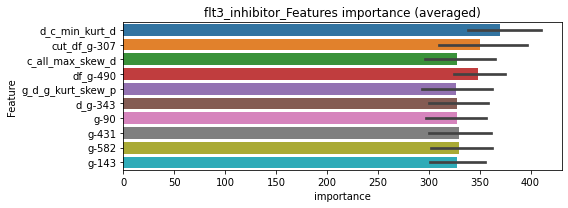

len(train_index) : 6310
len(valid_index) : 1578
================================= fold 1/5 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0469273	valid_1's binary_logloss: 0.0890979
[2000]	training's binary_logloss: 0.0229192	valid_1's binary_logloss: 0.0645716
[3000]	training's binary_logloss: 0.0149228	valid_1's binary_logloss: 0.0556633
[4000]	training's binary_logloss: 0.0110755	valid_1's binary_logloss: 0.0512789
Early stopping, best iteration is:
[4041]	training's binary_logloss: 0.0109541	valid_1's binary_logloss: 0.0511456


len(train_index) : 6310
len(valid_index) : 1578
================================= fold 2/5 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0462598	valid_1's binary_logloss: 0.0969252
[2000]	training's binary_logloss: 0.0226765	valid_1's binary_logloss: 0.0742234
[3000]	training's binary_logloss: 0.0147891	valid_1's binary_logloss: 0.0661946
[4000]	training's binary_logloss: 0.010955	valid_1's binary_logloss: 0.0621289
Early stopping, best iteration is:
[4492]	training's binary_logloss: 0.00970573	valid_1's binary_logloss: 0.060836


len(train_index) : 6310
len(valid_index) : 1578
================================= fold 3/5 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0470205	valid_1's binary_logloss: 0.0929255
[2000]	training's binary_logloss: 0.0229164	valid_1's binary_logloss: 0.0682293
[3000]	training's binary_logloss: 0.0149445	valid_1's binary_logloss: 0.0596338
[4000]	training's binary_logloss: 0.0110759	valid_1's binary_logloss: 0.0552951
Early stopping, best iteration is:
[4653]	training's binary_logloss: 0.00947224	valid_1's binary_logloss: 0.0535078


len(train_index) : 6311
len(valid_index) : 1577
================================= fold 4/5 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0472224	valid_1's binary_logloss: 0.0877817
[2000]	training's binary_logloss: 0.0230871	valid_1's binary_logloss: 0.0632712
[3000]	training's binary_logloss: 0.0150257	valid_1's binary_logloss: 0.0541741
Early stopping, best iteration is:
[3397]	training's binary_logloss: 0.0131762	valid_1's binary_logloss: 0.0518802


len(train_index) : 6311
len(valid_index) : 1577
================================= fold 5/5 flt3_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0462496	valid_1's binary_logloss: 0.102653
[2000]	training's binary_logloss: 0.0227319	valid_1's binary_logloss: 0.0799072
[3000]	training's binary_logloss: 0.0148377	valid_1's binary_logloss: 0.0718428
Early stopping, best iteration is:
[3705]	training's binary_logloss: 0.0118846	valid_1's binary_logloss: 0.0687552


flt3_inhibitor logloss: 0.057224202942240204
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000271446	valid_1's binary_logloss: 0.000807167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000311199	valid_1's binary_logloss: 0.00226904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000273088	valid_1's binary_logloss: 0.00250881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000272002	valid_1's binary_logloss: 0.00173584
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014353, Threshold: 0.0048908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0048908, conf_0:0.00342, conf_1:0.00636
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0348908


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000277359	valid_1's binary_logloss: 0.00127548


threshold: 0.0348908, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000260602	valid_1's binary_logloss: 0.000901206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000261877	valid_1's binary_logloss: 0.00147561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000262459	valid_1's binary_logloss: 0.00243581
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000266411	valid_1's binary_logloss: 0.0010458
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1075416, Threshold: 0.0348908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0348908, conf_0:0.02791, conf_1:0.04187
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0648908


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00026178	valid_1's binary_logloss: 0.000868439


threshold: 0.0648908, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000260602	valid_1's binary_logloss: 0.000901206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000261877	valid_1's binary_logloss: 0.00147561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000262459	valid_1's binary_logloss: 0.00243581
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000266411	valid_1's binary_logloss: 0.0010458
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1075416, Threshold: 0.0648908, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0648908, conf_0:0.05840, conf_1:0.07138


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00026178	valid_1's binary_logloss: 0.000868439


threshold: 0.0648908, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


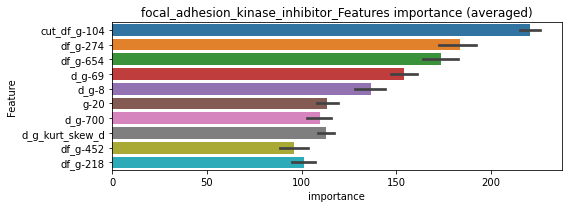

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264193	valid_1's binary_logloss: 0.000701498
Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.000258175	valid_1's binary_logloss: 0.00069188


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264992	valid_1's binary_logloss: 0.00134726
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000263968	valid_1's binary_logloss: 0.00134233


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264204	valid_1's binary_logloss: 0.00198237
Early stopping, best iteration is:
[1085]	training's binary_logloss: 0.000261536	valid_1's binary_logloss: 0.0019725


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264837	valid_1's binary_logloss: 0.0010128
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000263577	valid_1's binary_logloss: 0.00100851


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000264723	valid_1's binary_logloss: 0.000684294
Early stopping, best iteration is:
[1090]	training's binary_logloss: 0.000260807	valid_1's binary_logloss: 0.000679906


focal_adhesion_kinase_inhibitor logloss: 0.001139788225976898
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000279441	valid_1's binary_logloss: 0.000897454
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000281135	valid_1's binary_logloss: 0.000899666
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000276131	valid_1's binary_logloss: 0.00155023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000278316	valid_1's binary_logloss: 0.000660888
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014230, Threshold: 0.0057715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0057715, conf_0:0.00404, conf_1:0.00750
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0357715


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000284987	valid_1's binary_logloss: 0.00397774


threshold: 0.0357715, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000272023	valid_1's binary_logloss: 0.000865982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000269226	valid_1's binary_logloss: 0.000771751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000269953	valid_1's binary_logloss: 0.00107265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000268761	valid_1's binary_logloss: 0.000972964
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0373276, Threshold: 0.0357715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.0357715, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.0657715
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0957715


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000314163	valid_1's binary_logloss: 0.00285093


threshold: 0.0957715, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000272023	valid_1's binary_logloss: 0.000865982
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000269226	valid_1's binary_logloss: 0.000771751
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000269953	valid_1's binary_logloss: 0.00107265
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000268761	valid_1's binary_logloss: 0.000972964
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0373276, Threshold: 0.0957715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0957715, conf_0:0.08619, conf_1:0.10535


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000314163	valid_1's binary_logloss: 0.00285093


threshold: 0.0957715, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


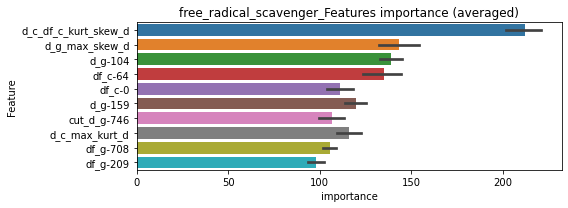

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000277266	valid_1's binary_logloss: 0.000781064


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000269406	valid_1's binary_logloss: 0.000718075
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00026941	valid_1's binary_logloss: 0.000718072


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[943]	training's binary_logloss: 0.00026857	valid_1's binary_logloss: 0.00106201


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000268857	valid_1's binary_logloss: 0.000696613


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 free_radical_scavenger=================================


Training until validation scores don't improve for 29 rounds


free_radical_scavenger logloss: 0.0011389731061336222


Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000302303	valid_1's binary_logloss: 0.00243813


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00033506	valid_1's binary_logloss: 0.00190342
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000332306	valid_1's binary_logloss: 0.00348419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000356741	valid_1's binary_logloss: 0.00294263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328406	valid_1's binary_logloss: 0.00106581
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018414, Threshold: 0.0059864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000339946	valid_1's binary_logloss: 0.00271776


p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0059864, conf_0:0.00419, conf_1:0.00778
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0359864
threshold: 0.0359864, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000329135	valid_1's binary_logloss: 0.00130309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000332571	valid_1's binary_logloss: 0.0029592
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000350622	valid_1's binary_logloss: 0.00170101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000329802	valid_1's binary_logloss: 0.000811228
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0412496, Threshold: 0.0359864, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000325149	valid_1's binary_logloss: 0.00294658


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0052737 Vs.target_rate: 0.00097
Num_p_label: 21.0, Expected: 3.8, Threshold: 0.0359864, conf_0:0.02879, conf_1:0.04318
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0659864
threshold: 0.0659864, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000329135	valid_1's binary_logloss: 0.00130309
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000332571	valid_1's binary_logloss: 0.0029592
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000350622	valid_1's binary_logloss: 0.00170101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000329802	valid_1's binary_logloss: 0.000811228
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0412496, Threshold: 0.0659864, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000325149	valid_1's binary_logloss: 0.00294658


p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, Expected: 3.8, Threshold: 0.0659864, conf_0:0.05939, conf_1:0.07259
threshold: 0.0659864, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


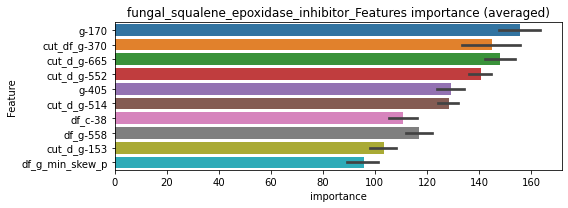

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000336104	valid_1's binary_logloss: 0.00131286


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000330968	valid_1's binary_logloss: 0.00275249


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000347604	valid_1's binary_logloss: 0.00193923


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000342675	valid_1's binary_logloss: 0.000979075


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000349234	valid_1's binary_logloss: 0.00183388


fungal_squalene_epoxidase_inhibitor logloss: 0.0017638556644387878
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0279971	valid_1's binary_logloss: 0.100902
Early stopping, best iteration is:
[1900]	training's binary_logloss: 0.0141174	valid_1's binary_logloss: 0.0891946
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0287329	valid_1's binary_logloss: 0.0807942
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0144012	valid_1's binary_logloss: 0.0683973
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0282481	valid_1's binary_logloss: 0.087297
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.014162	valid_1's binary_logloss: 0.0744647
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0293142	valid_1's binary_logloss: 0.0716413
[2000]	training's binary_logloss: 0.0139122	valid_1's binary_logloss: 0.0574295
[3000]	trainin

1 / 3, AUC score:0.994, PR-AUC:0.988
y_Threshold: 0.0492646, Threshold: 0.1683969, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 640/3763
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1683969, conf_0:0.11788, conf_1:0.21892
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_1: 0.1983969
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_2: 0.2283969
threshold: 0.2283969, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3763, y_label_rate: 0.1700771
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0256088	valid_1's binary_logloss: 0.0761855
[2000]	training's binary_logloss: 0.0122509	valid_1's binary_logloss: 0.0625698
Early stopping, best iteration is:
[2085]	training's binary_logloss: 0.0117349	valid_1's binary_logloss: 0.0620559
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0261866	valid_1's binary_logloss: 0.0728243
[2000]	training's binary_logloss: 0.0126135	valid_1's binary_logloss: 0.0582583
Early stopping, best iteration is:
[2053]	training's binary_logloss: 0.0122733	valid_1's binary_logloss: 0.0579753
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262647	valid_1's binary_logloss: 0.0725433
[2000]	training's binary_logloss: 0.0124831	valid_1's binary_logloss: 0.058089
[3000]	training's binary_logloss: 0.00818159	valid_1's binary_logloss: 0.0527917
Early stopping, best iterat

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0969349, Threshold: 0.2283969, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 620.0/3723
p_label_rate: 0.0175791 Vs.target_rate: 0.00445
Num_p_label: 70.0, Expected: 17.7, Threshold: 0.2283969, conf_0:0.18272, conf_1:0.27408
Num_p_label: 57.0, Expected: 17.7, Adj_threshold_1: 0.2583969
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_2: 0.2883969
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_3: 0.3183969
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_4: 0.3483969
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_5: 0.3783969
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_6: 0.4083969
threshold: 0.4083969, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 620.0/3723, y_label_rate: 0.1665324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0236782	valid_1's binary_logloss: 0.0646389
[2000]	training's binary_logloss: 0.0113578	valid_1's binary_logloss: 0.0509032
Early stopping, best iteration is:
[2014]	training's binary_logloss: 0.0112692	valid_1's binary_logloss: 0.0507053
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234553	valid_1's binary_logloss: 0.066886
[2000]	training's binary_logloss: 0.0112503	valid_1's binary_logloss: 0.0536573
Early stopping, best iteration is:
[2613]	training's binary_logloss: 0.00853636	valid_1's binary_logloss: 0.0504892
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0238619	valid_1's binary_logloss: 0.0610313
[2000]	training's binary_logloss: 0.0115078	valid_1's binary_logloss: 0.0480098
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0108967	valid_1's binary_logloss: 0.

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0975724, Threshold: 0.4083969, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 614.0/3711
p_label_rate: 0.0082873 Vs.target_rate: 0.00445
Num_p_label: 33.0, Expected: 17.7, Threshold: 0.4083969, conf_0:0.36756, conf_1:0.44924
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_1: 0.4383969
threshold: 0.4383969, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 614.0/3711, y_label_rate: 0.1654541


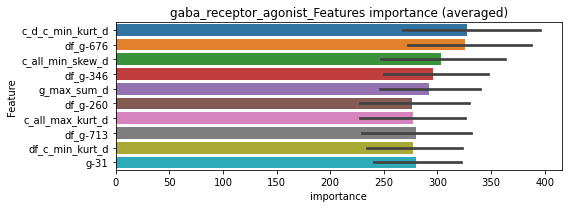

len(train_index) : 2968
len(valid_index) : 743
================================= fold 1/5 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0434821	valid_1's binary_logloss: 0.0788149
[2000]	training's binary_logloss: 0.0217447	valid_1's binary_logloss: 0.0582372
[3000]	training's binary_logloss: 0.0143482	valid_1's binary_logloss: 0.0510362
[4000]	training's binary_logloss: 0.0106969	valid_1's binary_logloss: 0.0468065
[5000]	training's binary_logloss: 0.00857099	valid_1's binary_logloss: 0.0445814
Early stopping, best iteration is:
[5947]	training's binary_logloss: 0.00719904	valid_1's binary_logloss: 0.042727


len(train_index) : 2969
len(valid_index) : 742
================================= fold 2/5 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421614	valid_1's binary_logloss: 0.0909242
[2000]	training's binary_logloss: 0.0211357	valid_1's binary_logloss: 0.0675297
[3000]	training's binary_logloss: 0.013962	valid_1's binary_logloss: 0.0585518
[4000]	training's binary_logloss: 0.0104427	valid_1's binary_logloss: 0.0539734
Early stopping, best iteration is:
[4554]	training's binary_logloss: 0.00918064	valid_1's binary_logloss: 0.0522005


len(train_index) : 2969
len(valid_index) : 742
================================= fold 3/5 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0424836	valid_1's binary_logloss: 0.0887057
[2000]	training's binary_logloss: 0.0213124	valid_1's binary_logloss: 0.0654514
Early stopping, best iteration is:
[2780]	training's binary_logloss: 0.015208	valid_1's binary_logloss: 0.0586381


len(train_index) : 2969
len(valid_index) : 742
================================= fold 4/5 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0428799	valid_1's binary_logloss: 0.0754721
[2000]	training's binary_logloss: 0.0215601	valid_1's binary_logloss: 0.0541656
[3000]	training's binary_logloss: 0.0142801	valid_1's binary_logloss: 0.0469103
[4000]	training's binary_logloss: 0.0106361	valid_1's binary_logloss: 0.0427036
Early stopping, best iteration is:
[4641]	training's binary_logloss: 0.00916438	valid_1's binary_logloss: 0.0408995


len(train_index) : 2969
len(valid_index) : 742
================================= fold 5/5 gaba_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0429831	valid_1's binary_logloss: 0.0776423
[2000]	training's binary_logloss: 0.0214346	valid_1's binary_logloss: 0.0568796
[3000]	training's binary_logloss: 0.014236	valid_1's binary_logloss: 0.0490747
[4000]	training's binary_logloss: 0.0106107	valid_1's binary_logloss: 0.0447836
[5000]	training's binary_logloss: 0.00850232	valid_1's binary_logloss: 0.0422582
[6000]	training's binary_logloss: 0.00708615	valid_1's binary_logloss: 0.0402705
[7000]	training's binary_logloss: 0.00608603	valid_1's binary_logloss: 0.0389379
Early stopping, best iteration is:
[7228]	training's binary_logloss: 0.00589915	valid_1's binary_logloss: 0.0386279


gaba_receptor_agonist logloss: 0.04661755503136224
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4991
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4991


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0306452	valid_1's binary_logloss: 0.089456
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.0172088	valid_1's binary_logloss: 0.0815147
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0305084	valid_1's binary_logloss: 0.0943553
Early stopping, best iteration is:
[1533]	training's binary_logloss: 0.0194439	valid_1's binary_logloss: 0.0863699
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.030593	valid_1's binary_logloss: 0.107565
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0180999	valid_1's binary_logloss: 0.098905
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0306991	valid_1's binary_logloss: 0.0846942
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0154408	valid_1's binary

1 / 3, AUC score:0.989, PR-AUC:0.973
y_Threshold: 0.0549676, Threshold: 0.0995181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 302 → Positive_corect_labels: 947/5687
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0995181, conf_0:0.06966, conf_1:0.12937
threshold: 0.0995181, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 947.0/5687, y_label_rate: 0.1665201
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0240816	valid_1's binary_logloss: 0.066887
Early stopping, best iteration is:
[1721]	training's binary_logloss: 0.0133856	valid_1's binary_logloss: 0.0581969
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0233442	valid_1's binary_logloss: 0.0846107
Early stopping, best iteration is:
[1911]	training's binary_logloss: 0.0115604	valid_1's binary_logloss: 0.0736809
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0241581	valid_1's binary_logloss: 0.0644898
[2000]	training's binary_logloss: 0.01138	valid_1's binary_logloss: 0.0529966
Early stopping, best iteration is:
[2360]	training's binary_logloss: 0.00951725	valid_1's binary_logloss: 0.0511389
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0242363	valid_1's binary_logloss: 0.0640148
[2000]	traini

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0756428, Threshold: 0.0995181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 916.0/5625
p_label_rate: 0.0165746 Vs.target_rate: 0.00693
Num_p_label: 66.0, Expected: 27.6, Threshold: 0.0995181, conf_0:0.07961, conf_1:0.11942
Num_p_label: 34.0, Expected: 27.6, Adj_threshold_1: 0.1295181
threshold: 0.1295181, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 916.0/5625, y_label_rate: 0.1628444
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0213735	valid_1's binary_logloss: 0.0545202
[2000]	training's binary_logloss: 0.0101725	valid_1's binary_logloss: 0.0436122
Early stopping, best iteration is:
[2354]	training's binary_logloss: 0.00857892	valid_1's binary_logloss: 0.0419732
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0205897	valid_1's binary_logloss: 0.0654827
[2000]	training's binary_logloss: 0.00977229	valid_1's binary_logloss: 0.0559191
Early stopping, best iteration is:
[2004]	training's binary_logloss: 0.00975338	valid_1's binary_logloss: 0.0558858
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0208898	valid_1's binary_logloss: 0.0549904
[2000]	training's binary_logloss: 0.00992828	valid_1's binary_logloss: 0.0450068
Early stopping, best iteration is:
[2266]	training's binary_logloss: 0.00871709	valid_1's binary_loglos

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0711417, Threshold: 0.1295181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 901.0/5595
p_label_rate: 0.0065294 Vs.target_rate: 0.00693
Num_p_label: 26.0, Expected: 27.6, Threshold: 0.1295181, conf_0:0.11657, conf_1:0.14247
threshold: 0.1295181, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 901.0/5595, y_label_rate: 0.1610366


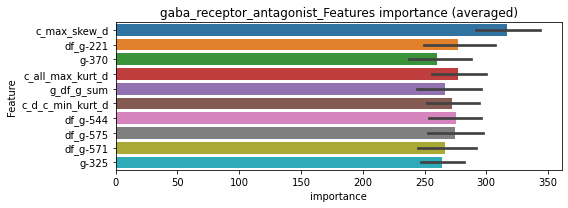

len(train_index) : 4476
len(valid_index) : 1119
================================= fold 1/5 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0371653	valid_1's binary_logloss: 0.0661368
[2000]	training's binary_logloss: 0.018196	valid_1's binary_logloss: 0.0476251
[3000]	training's binary_logloss: 0.0119483	valid_1's binary_logloss: 0.0410284
[4000]	training's binary_logloss: 0.00890197	valid_1's binary_logloss: 0.0380747
Early stopping, best iteration is:
[4813]	training's binary_logloss: 0.00739453	valid_1's binary_logloss: 0.036553


len(train_index) : 4476
len(valid_index) : 1119
================================= fold 2/5 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0368241	valid_1's binary_logloss: 0.078396
[2000]	training's binary_logloss: 0.0180535	valid_1's binary_logloss: 0.0583542
[3000]	training's binary_logloss: 0.0118042	valid_1's binary_logloss: 0.0514257
Early stopping, best iteration is:
[3586]	training's binary_logloss: 0.00985206	valid_1's binary_logloss: 0.0492518


len(train_index) : 4476
len(valid_index) : 1119
================================= fold 3/5 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0372542	valid_1's binary_logloss: 0.0665083
[2000]	training's binary_logloss: 0.0181931	valid_1's binary_logloss: 0.047629
[3000]	training's binary_logloss: 0.0119467	valid_1's binary_logloss: 0.0412391
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.00944276	valid_1's binary_logloss: 0.0385375


len(train_index) : 4476
len(valid_index) : 1119
================================= fold 4/5 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0374845	valid_1's binary_logloss: 0.0647289
[2000]	training's binary_logloss: 0.0183345	valid_1's binary_logloss: 0.0469187
[3000]	training's binary_logloss: 0.0120474	valid_1's binary_logloss: 0.040961
[4000]	training's binary_logloss: 0.00897793	valid_1's binary_logloss: 0.0380226
Early stopping, best iteration is:
[4286]	training's binary_logloss: 0.0083557	valid_1's binary_logloss: 0.0374461


len(train_index) : 4476
len(valid_index) : 1119
================================= fold 5/5 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0375522	valid_1's binary_logloss: 0.0687689
[2000]	training's binary_logloss: 0.0184024	valid_1's binary_logloss: 0.0494454
[3000]	training's binary_logloss: 0.0120453	valid_1's binary_logloss: 0.0428823
[4000]	training's binary_logloss: 0.00897819	valid_1's binary_logloss: 0.0393884
Early stopping, best iteration is:
[4883]	training's binary_logloss: 0.00734275	valid_1's binary_logloss: 0.0374768


gaba_receptor_antagonist logloss: 0.03985302683818037
gaba_receptor_antagonist is unpredictable(><)!
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00073305	valid_1's binary_logloss: 0.0255093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000516991	valid_1's binary_logloss: 0.0183649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000527522	valid_1's binary_logloss: 0.00597511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000675963	valid_1's binary_logloss: 0.00692461
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0048981, Threshold: 0.0168925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00105523	valid_1's binary_logloss: 0.0221676


p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0168925, conf_0:0.01182, conf_1:0.02196
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0468925
threshold: 0.0468925, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000801861	valid_1's binary_logloss: 0.0237245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000479437	valid_1's binary_logloss: 0.0171224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000493347	valid_1's binary_logloss: 0.005233
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000508151	valid_1's binary_logloss: 0.00555869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000561147	valid_1's binary_logloss: 0.0243709


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226904, Threshold: 0.0468925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00235
Num_p_label: 27.0, Expected: 9.4, Threshold: 0.0468925, conf_0:0.03751, conf_1:0.05627
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_1: 0.0768925
threshold: 0.0768925, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00104445	valid_1's binary_logloss: 0.0115484
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515119	valid_1's binary_logloss: 0.00740346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000500388	valid_1's binary_logloss: 0.0127718
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000513206	valid_1's binary_logloss: 0.00555368
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000475034	valid_1's binary_logloss: 0.0277117


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248338, Threshold: 0.0768925, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00235
Num_p_label: 15.0, Expected: 9.4, Threshold: 0.0768925, conf_0:0.06920, conf_1:0.08458
threshold: 0.0768925, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


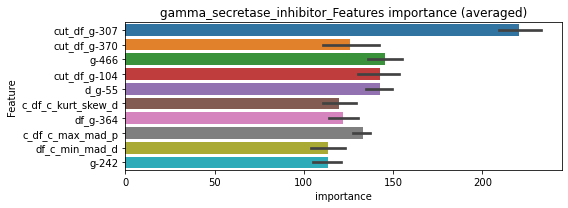

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000521338	valid_1's binary_logloss: 0.0121645


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000544353	valid_1's binary_logloss: 0.00996612


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000600645	valid_1's binary_logloss: 0.0134559


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000500369	valid_1's binary_logloss: 0.0047559


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


gamma_secretase_inhibitor logloss: 0.01392694496898654


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000872234	valid_1's binary_logloss: 0.0292964
mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0367848	valid_1's binary_logloss: 0.106046
[2000]	training's binary_logloss: 0.0166291	valid_1's binary_logloss: 0.0882516
Early stopping, best iteration is:
[2490]	training's binary_logloss: 0.0129869	valid_1's binary_logloss: 0.0846528
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.037011	valid_1's binary_logloss: 0.108643
[2000]	training's binary_logloss: 0.0167493	valid_1's binary_logloss: 0.0902296
Early stopping, best iteration is:
[2610]	training's binary_logloss: 0.0124192	valid_1's binary_logloss: 0.0863312
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0363295	valid_1's binary_logloss: 0.124552
[2000]	training's binary_logloss: 0.016496	valid_1's binary_logloss: 0.105351
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0149026	valid_1's binary_logloss: 0.103564

1 / 3, AUC score:0.986, PR-AUC:0.973
y_Threshold: 0.0616502, Threshold: 0.1445249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 418 → Positive_corect_labels: 1368/8183
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.1445249, conf_0:0.10117, conf_1:0.18788
threshold: 0.1445249, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1368.0/8183, y_label_rate: 0.1671759
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0306366	valid_1's binary_logloss: 0.0893918
[2000]	training's binary_logloss: 0.014034	valid_1's binary_logloss: 0.0684051
[3000]	training's binary_logloss: 0.00897793	valid_1's binary_logloss: 0.0609444
Early stopping, best iteration is:
[3009]	training's binary_logloss: 0.00895151	valid_1's binary_logloss: 0.060876
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.030419	valid_1's binary_logloss: 0.0817972
[2000]	training's binary_logloss: 0.0139324	valid_1's binary_logloss: 0.061361
[3000]	training's binary_logloss: 0.00893075	valid_1's binary_logloss: 0.0545566
Early stopping, best iteration is:
[3493]	training's binary_logloss: 0.00759036	valid_1's binary_logloss: 0.0525854
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0306295	valid_1's binary_logloss: 0.0866735
[2000]	training's binary_lo

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.1061571, Threshold: 0.1445249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1327.0/8101
p_label_rate: 0.0170768 Vs.target_rate: 0.01117
Num_p_label: 68.0, Expected: 44.5, Threshold: 0.1445249, conf_0:0.11562, conf_1:0.17343
Num_p_label: 48.0, Expected: 44.5, Adj_threshold_1: 0.1745249
threshold: 0.1745249, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 1327.0/8101, y_label_rate: 0.1638069
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0289365	valid_1's binary_logloss: 0.0783577
[2000]	training's binary_logloss: 0.0131546	valid_1's binary_logloss: 0.0584291
Early stopping, best iteration is:
[2650]	training's binary_logloss: 0.00966438	valid_1's binary_logloss: 0.0532383
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0287263	valid_1's binary_logloss: 0.0733944
[2000]	training's binary_logloss: 0.0132216	valid_1's binary_logloss: 0.0553608
[3000]	training's binary_logloss: 0.00851482	valid_1's binary_logloss: 0.0487231
Early stopping, best iteration is:
[3437]	training's binary_logloss: 0.00737172	valid_1's binary_logloss: 0.0472186
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0283686	valid_1's binary_logloss: 0.078765
[2000]	training's binary_logloss: 0.0130726	valid_1's binary_logloss: 0.0612559
Early stopping, best iter

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.1035867, Threshold: 0.1745249, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1296.0/8039
p_label_rate: 0.0130588 Vs.target_rate: 0.01117
Num_p_label: 52.0, Expected: 44.5, Threshold: 0.1745249, conf_0:0.15707, conf_1:0.19198
threshold: 0.1745249, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1296.0/8039, y_label_rate: 0.1612141


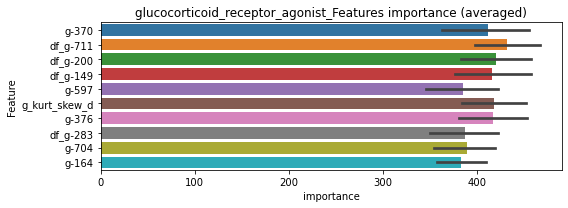

len(train_index) : 6431
len(valid_index) : 1608
================================= fold 1/5 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0496132	valid_1's binary_logloss: 0.102245
[2000]	training's binary_logloss: 0.0239068	valid_1's binary_logloss: 0.0753802
[3000]	training's binary_logloss: 0.0155119	valid_1's binary_logloss: 0.0658747
[4000]	training's binary_logloss: 0.0114419	valid_1's binary_logloss: 0.0613061
Early stopping, best iteration is:
[4058]	training's binary_logloss: 0.0112729	valid_1's binary_logloss: 0.0611058


len(train_index) : 6431
len(valid_index) : 1608
================================= fold 2/5 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0495362	valid_1's binary_logloss: 0.104703
[2000]	training's binary_logloss: 0.0239759	valid_1's binary_logloss: 0.0760749
[3000]	training's binary_logloss: 0.0156242	valid_1's binary_logloss: 0.0652884
[4000]	training's binary_logloss: 0.0115521	valid_1's binary_logloss: 0.0596202
Early stopping, best iteration is:
[4463]	training's binary_logloss: 0.0102967	valid_1's binary_logloss: 0.0576028


len(train_index) : 6431
len(valid_index) : 1608
================================= fold 3/5 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0499466	valid_1's binary_logloss: 0.096876
[2000]	training's binary_logloss: 0.0241006	valid_1's binary_logloss: 0.0669188
[3000]	training's binary_logloss: 0.015619	valid_1's binary_logloss: 0.0555091
[4000]	training's binary_logloss: 0.011517	valid_1's binary_logloss: 0.0495376
[5000]	training's binary_logloss: 0.00912763	valid_1's binary_logloss: 0.045849
Early stopping, best iteration is:
[5708]	training's binary_logloss: 0.00796329	valid_1's binary_logloss: 0.0438108


len(train_index) : 6431
len(valid_index) : 1608
================================= fold 4/5 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.05021	valid_1's binary_logloss: 0.0971986
[2000]	training's binary_logloss: 0.0242594	valid_1's binary_logloss: 0.0673806
[3000]	training's binary_logloss: 0.0157412	valid_1's binary_logloss: 0.0565078
[4000]	training's binary_logloss: 0.0115912	valid_1's binary_logloss: 0.0505308
[5000]	training's binary_logloss: 0.00919371	valid_1's binary_logloss: 0.0472055
Early stopping, best iteration is:
[5748]	training's binary_logloss: 0.00796661	valid_1's binary_logloss: 0.0453258


len(train_index) : 6432
len(valid_index) : 1607
================================= fold 5/5 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0498217	valid_1's binary_logloss: 0.0944018
[2000]	training's binary_logloss: 0.024133	valid_1's binary_logloss: 0.0689845
[3000]	training's binary_logloss: 0.0157103	valid_1's binary_logloss: 0.0603061
Early stopping, best iteration is:
[3472]	training's binary_logloss: 0.0134361	valid_1's binary_logloss: 0.0579239


glucocorticoid_receptor_agonist logloss: 0.05315322054433884
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00023233	valid_1's binary_logloss: 0.000443352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000235645	valid_1's binary_logloss: 0.00131681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00023588	valid_1's binary_logloss: 0.000458962
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000235878	valid_1's binary_logloss: 0.000320623
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008606, Threshold: 0.0025222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0025222, conf_0:0.00177, conf_1:0.00328
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0325222


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000234123	valid_1's binary_logloss: 0.000979455


threshold: 0.0325222, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000228892	valid_1's binary_logloss: 0.000354513
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000226548	valid_1's binary_logloss: 0.00183812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000228572	valid_1's binary_logloss: 0.000359069
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000230045	valid_1's binary_logloss: 0.000313723
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0710128, Threshold: 0.0325222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, Expected: 2.2, Threshold: 0.0325222, conf_0:0.02602, conf_1:0.03903
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0625222
threshold: 0.0625222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000233817	valid_1's binary_logloss: 0.00158936


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000228892	valid_1's binary_logloss: 0.000354513
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000226548	valid_1's binary_logloss: 0.00183812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000228572	valid_1's binary_logloss: 0.000359069
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000230045	valid_1's binary_logloss: 0.000313723
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0710128, Threshold: 0.0625222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0625222, conf_0:0.05627, conf_1:0.06877
threshold: 0.0625222, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000233817	valid_1's binary_logloss: 0.00158936


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


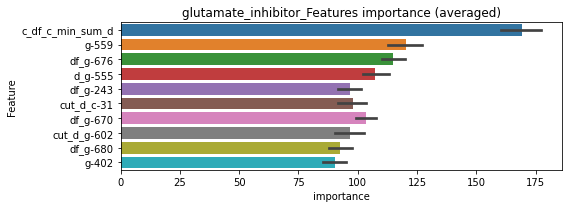

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 glutamate_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00023513	valid_1's binary_logloss: 0.000374029
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000230833	valid_1's binary_logloss: 0.000998652
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000231796	valid_1's binary_logloss: 0.000356127
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 glutamate_inhibitor=================================


Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000233305	valid_1's binary_logloss: 0.000349517
Training until validation scores don't improve for 29 rounds


glutamate_inhibitor logloss: 0.0006393040605306284


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00024241	valid_1's binary_logloss: 0.0011182


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000604998	valid_1's binary_logloss: 0.0239276
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000699992	valid_1's binary_logloss: 0.0330133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000886143	valid_1's binary_logloss: 0.0251703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000628468	valid_1's binary_logloss: 0.0147194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000640038	valid_1's binary_logloss: 0.0244974


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0058938, Threshold: 0.2032131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.2032131, conf_0:0.14225, conf_1:0.26418
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_1: 0.2332131
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_2: 0.2632131
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2932131
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_4: 0.3232131
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_5: 0.3532131
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.3832131
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4132131
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_8: 0.4432131
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_9: 0.4732131
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_10: 0.5032131
threshold: 0.5032131, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000617327	valid_1's binary_logloss: 0.0347522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00065261	valid_1's binary_logloss: 0.0218366
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000615817	valid_1's binary_logloss: 0.0190796
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000779179	valid_1's binary_logloss: 0.0323413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000541335	valid_1's binary_logloss: 0.0153577


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0300577, Threshold: 0.5032131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0143144 Vs.target_rate: 0.00311
Num_p_label: 57.0, Expected: 12.4, Threshold: 0.5032131, conf_0:0.40257, conf_1:0.60386
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_1: 0.5332131
Num_p_label: 51.0, Expected: 12.4, Adj_threshold_2: 0.5632131
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5932131
Num_p_label: 45.0, Expected: 12.4, Adj_threshold_4: 0.6232131
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_5: 0.6532131
Num_p_label: 36.0, Expected: 12.4, Adj_threshold_6: 0.6832131
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_7: 0.7132131
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_8: 0.7432131
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_9: 0.7732131
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_10: 0.8032131
threshold: 0.8032131, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000554508	valid_1's binary_logloss: 0.0232101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000532301	valid_1's binary_logloss: 0.0114075
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000807396	valid_1's binary_logloss: 0.0262137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000933695	valid_1's binary_logloss: 0.0236722
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000648203	valid_1's binary_logloss: 0.0249765


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0405920, Threshold: 0.8032131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 643.0/3774
p_label_rate: 0.0070316 Vs.target_rate: 0.00311
Num_p_label: 28.0, Expected: 12.4, Threshold: 0.8032131, conf_0:0.72289, conf_1:0.88353
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_1: 0.8332131
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_2: 0.8632131
threshold: 0.8632131, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3774, y_label_rate: 0.1703763


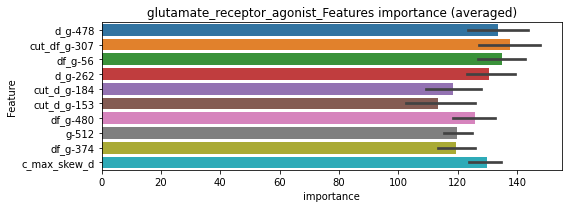

len(train_index) : 3019
len(valid_index) : 755
================================= fold 1/5 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3019
len(valid_index) : 755
================================= fold 2/5 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00125658	valid_1's binary_logloss: 0.027887
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000555755	valid_1's binary_logloss: 0.00937899


len(train_index) : 3019
len(valid_index) : 755
================================= fold 3/5 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3019
len(valid_index) : 755
================================= fold 4/5 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000869936	valid_1's binary_logloss: 0.0229394
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000758756	valid_1's binary_logloss: 0.0104109


len(train_index) : 3020
len(valid_index) : 754
================================= fold 5/5 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


glutamate_receptor_agonist logloss: 0.019889328410186105


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00102081	valid_1's binary_logloss: 0.0288421
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0481637	valid_1's binary_logloss: 0.134214
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0230289	valid_1's binary_logloss: 0.116219
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0462876	valid_1's binary_logloss: 0.172149
Early stopping, best iteration is:
[1544]	training's binary_logloss: 0.0282923	valid_1's binary_logloss: 0.162123
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0469617	valid_1's binary_logloss: 0.151477
Early stopping, best iteration is:
[1469]	training's binary_logloss: 0.0303337	valid_1's binary_logloss: 0.140109
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0450413	valid_1's binary_logloss: 0.188556
Early stopping, best iteration is:
[1193]	training's binary_logloss: 0.0370376	valid_1's binary_lo

1 / 3, AUC score:0.958, PR-AUC:0.926
y_Threshold: 0.0907052, Threshold: 0.1748124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 617 → Positive_corect_labels: 1278/8037
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.1748124, conf_0:0.12237, conf_1:0.22726
threshold: 0.1748124, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1278.0/8037, y_label_rate: 0.1590146
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0334812	valid_1's binary_logloss: 0.101719
Early stopping, best iteration is:
[1758]	training's binary_logloss: 0.017609	valid_1's binary_logloss: 0.0885854
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0331525	valid_1's binary_logloss: 0.100645
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0175014	valid_1's binary_logloss: 0.0873057
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0333817	valid_1's binary_logloss: 0.0965619
[2000]	training's binary_logloss: 0.0153101	valid_1's binary_logloss: 0.0796565
Early stopping, best iteration is:
[2490]	training's binary_logloss: 0.0119674	valid_1's binary_logloss: 0.0759513
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0337132	valid_1's binary_logloss: 0.0902747
[2000]	trainin

2 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.1101418, Threshold: 0.1748124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 1210.0/7901
p_label_rate: 0.0143144 Vs.target_rate: 0.01541
Num_p_label: 57.0, Expected: 61.4, Threshold: 0.1748124, conf_0:0.13985, conf_1:0.20977
threshold: 0.1748124, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1210.0/7901, y_label_rate: 0.1531452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0286809	valid_1's binary_logloss: 0.093612
Early stopping, best iteration is:
[1805]	training's binary_logloss: 0.0148151	valid_1's binary_logloss: 0.0805636
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0288936	valid_1's binary_logloss: 0.0831106
[2000]	training's binary_logloss: 0.013239	valid_1's binary_logloss: 0.0688891
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.0128362	valid_1's binary_logloss: 0.0685368
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0290324	valid_1's binary_logloss: 0.0751506
[2000]	training's binary_logloss: 0.0133759	valid_1's binary_logloss: 0.0587489
Early stopping, best iteration is:
[2549]	training's binary_logloss: 0.0102573	valid_1's binary_logloss: 0.0555483
Training until validation scores don't improve for 29 rounds
[1000]	traini

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.1052482, Threshold: 0.1748124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1165.0/7811
p_label_rate: 0.0145655 Vs.target_rate: 0.01541
Num_p_label: 58.0, Expected: 61.4, Threshold: 0.1748124, conf_0:0.15733, conf_1:0.19229
threshold: 0.1748124, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1165.0/7811, y_label_rate: 0.1491486


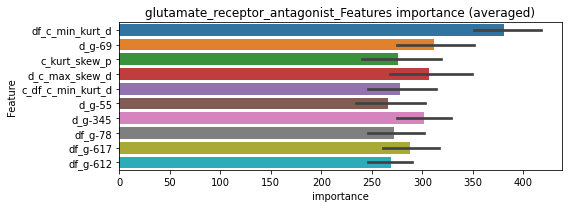

len(train_index) : 6248
len(valid_index) : 1563
================================= fold 1/5 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0472787	valid_1's binary_logloss: 0.0995893
[2000]	training's binary_logloss: 0.023011	valid_1's binary_logloss: 0.0763687
[3000]	training's binary_logloss: 0.0149377	valid_1's binary_logloss: 0.0683077
Early stopping, best iteration is:
[3642]	training's binary_logloss: 0.0121899	valid_1's binary_logloss: 0.0654597


len(train_index) : 6249
len(valid_index) : 1562
================================= fold 2/5 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0475184	valid_1's binary_logloss: 0.0939378
[2000]	training's binary_logloss: 0.0232069	valid_1's binary_logloss: 0.0695392
[3000]	training's binary_logloss: 0.0150206	valid_1's binary_logloss: 0.0606022
[4000]	training's binary_logloss: 0.0110777	valid_1's binary_logloss: 0.0564023
Early stopping, best iteration is:
[4399]	training's binary_logloss: 0.0100247	valid_1's binary_logloss: 0.0551648


len(train_index) : 6249
len(valid_index) : 1562
================================= fold 3/5 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0477576	valid_1's binary_logloss: 0.0879891
[2000]	training's binary_logloss: 0.0232181	valid_1's binary_logloss: 0.0643171
[3000]	training's binary_logloss: 0.0150762	valid_1's binary_logloss: 0.0563897
Early stopping, best iteration is:
[3900]	training's binary_logloss: 0.011428	valid_1's binary_logloss: 0.052642


len(train_index) : 6249
len(valid_index) : 1562
================================= fold 4/5 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0471594	valid_1's binary_logloss: 0.0988905
[2000]	training's binary_logloss: 0.0229656	valid_1's binary_logloss: 0.0776606
[3000]	training's binary_logloss: 0.0148948	valid_1's binary_logloss: 0.0697188
Early stopping, best iteration is:
[3036]	training's binary_logloss: 0.0147051	valid_1's binary_logloss: 0.069475


len(train_index) : 6249
len(valid_index) : 1562
================================= fold 5/5 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.047052	valid_1's binary_logloss: 0.096208
[2000]	training's binary_logloss: 0.0228361	valid_1's binary_logloss: 0.0722126
[3000]	training's binary_logloss: 0.0148361	valid_1's binary_logloss: 0.0636529
[4000]	training's binary_logloss: 0.0109591	valid_1's binary_logloss: 0.0594288
Early stopping, best iteration is:
[4731]	training's binary_logloss: 0.00919867	valid_1's binary_logloss: 0.057335


glutamate_receptor_antagonist logloss: 0.060016003347670537
glutamate_receptor_antagonist is unpredictable(><)!
gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000308926	valid_1's binary_logloss: 0.00484526
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000318488	valid_1's binary_logloss: 0.00322817
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000305985	valid_1's binary_logloss: 0.00112986
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00029894	valid_1's binary_logloss: 0.00537434
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000310921	valid_1's binary_logloss: 0.000850486


y_Threshold: 0.0015497, Threshold: 0.0056098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0056098, conf_0:0.00393, conf_1:0.00729
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0356098
threshold: 0.0356098, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00030819	valid_1's binary_logloss: 0.00635968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000297696	valid_1's binary_logloss: 0.00287562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000302607	valid_1's binary_logloss: 0.000944906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00439657
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248513, Threshold: 0.0356098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, Expected: 3.0, Threshold: 0.0356098, conf_0:0.02849, conf_1:0.04273
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0656098
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0956098
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1256098


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000296945	valid_1's binary_logloss: 0.000791876


threshold: 0.1256098, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00030819	valid_1's binary_logloss: 0.00635968
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000297696	valid_1's binary_logloss: 0.00287562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000302607	valid_1's binary_logloss: 0.000944906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000300399	valid_1's binary_logloss: 0.00439657
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248513, Threshold: 0.1256098, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1256098, conf_0:0.11305, conf_1:0.13817


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000296945	valid_1's binary_logloss: 0.000791876


threshold: 0.1256098, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


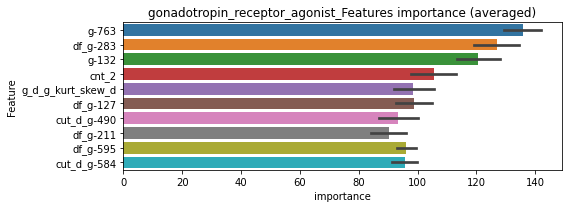

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000303989	valid_1's binary_logloss: 0.00350398


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000328007	valid_1's binary_logloss: 0.0020632
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000299177	valid_1's binary_logloss: 0.00101918


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000322396	valid_1's binary_logloss: 0.0030929
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000300514	valid_1's binary_logloss: 0.00067784


gonadotropin_receptor_agonist logloss: 0.00207179347457887
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000520082	valid_1's binary_logloss: 0.0170037
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000572017	valid_1's binary_logloss: 0.0165733
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000516247	valid_1's binary_logloss: 0.00476465
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000532859	valid_1's binary_logloss: 0.00513019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000522785	valid_1's binary_logloss: 0.0121454


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0059912, Threshold: 0.0258208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0258208, conf_0:0.01807, conf_1:0.03357
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0558208
threshold: 0.0558208, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000511945	valid_1's binary_logloss: 0.0178649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000516716	valid_1's binary_logloss: 0.0189535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000496401	valid_1's binary_logloss: 0.00426299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000511526	valid_1's binary_logloss: 0.00283875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000543001	valid_1's binary_logloss: 0.0105302


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0308623, Threshold: 0.0558208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0113009 Vs.target_rate: 0.00252
Num_p_label: 45.0, Expected: 10.0, Threshold: 0.0558208, conf_0:0.04466, conf_1:0.06698
Num_p_label: 28.0, Expected: 10.0, Adj_threshold_1: 0.0858208
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_2: 0.1158208
Num_p_label: 12.0, Expected: 10.0, Adj_threshold_3: 0.1458208
threshold: 0.1458208, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000511945	valid_1's binary_logloss: 0.0178649
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000516716	valid_1's binary_logloss: 0.0189535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000496401	valid_1's binary_logloss: 0.00426299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000511526	valid_1's binary_logloss: 0.00283875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000543001	valid_1's binary_logloss: 0.0105302


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0308623, Threshold: 0.1458208, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.1458208, conf_0:0.13124, conf_1:0.16040
threshold: 0.1458208, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


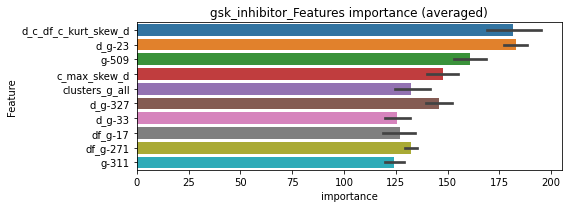

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000551315	valid_1's binary_logloss: 0.0182719


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000554644	valid_1's binary_logloss: 0.0131891


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000529637	valid_1's binary_logloss: 0.00404979
Early stopping, best iteration is:
[1079]	training's binary_logloss: 0.000513987	valid_1's binary_logloss: 0.00398352


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000535127	valid_1's binary_logloss: 0.00262586
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000535127	valid_1's binary_logloss: 0.00262586


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 gsk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000550622	valid_1's binary_logloss: 0.0100733


gsk_inhibitor logloss: 0.009630770481956026
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000991826	valid_1's binary_logloss: 0.0315147
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000707024	valid_1's binary_logloss: 0.0221969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000559057	valid_1's binary_logloss: 0.011775
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000574533	valid_1's binary_logloss: 0.0109871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000735473	valid_1's binary_logloss: 0.0271008


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0060622, Threshold: 0.0143731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0143731, conf_0:0.01006, conf_1:0.01868
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_1: 0.0443731
threshold: 0.0443731, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00094852	valid_1's binary_logloss: 0.0208552
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000602397	valid_1's binary_logloss: 0.0287177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000717405	valid_1's binary_logloss: 0.0267058
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000560072	valid_1's binary_logloss: 0.0092458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000872538	valid_1's binary_logloss: 0.0330563


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0332580, Threshold: 0.0443731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0070316 Vs.target_rate: 0.00302
Num_p_label: 28.0, Expected: 12.0, Threshold: 0.0443731, conf_0:0.03550, conf_1:0.05325
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_1: 0.0743731
threshold: 0.0743731, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00074342	valid_1's binary_logloss: 0.029015
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000636025	valid_1's binary_logloss: 0.0150191
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000800198	valid_1's binary_logloss: 0.0240665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000543401	valid_1's binary_logloss: 0.0115167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000697712	valid_1's binary_logloss: 0.0173325


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0368953, Threshold: 0.0743731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0047715 Vs.target_rate: 0.00302
Num_p_label: 19.0, Expected: 12.0, Threshold: 0.0743731, conf_0:0.06694, conf_1:0.08181
Num_p_label: 9.0, Expected: 12.0, Adj_threshold_1: 0.1043731
threshold: 0.1043731, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


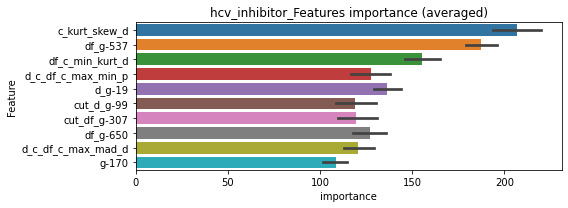

len(train_index) : 3035
len(valid_index) : 759
================================= fold 1/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3035
len(valid_index) : 759
================================= fold 2/5 hcv_inhibitor=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00148947	valid_1's binary_logloss: 0.031543
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000743168	valid_1's binary_logloss: 0.0208611


len(train_index) : 3035
len(valid_index) : 759
================================= fold 3/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000719535	valid_1's binary_logloss: 0.0215867


len(train_index) : 3035
len(valid_index) : 759
================================= fold 4/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000784424	valid_1's binary_logloss: 0.019394


len(train_index) : 3036
len(valid_index) : 758
================================= fold 5/5 hcv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


hcv_inhibitor logloss: 0.028670741402706503


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00281226	valid_1's binary_logloss: 0.0499969


hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0292424	valid_1's binary_logloss: 0.0978633
Early stopping, best iteration is:
[1918]	training's binary_logloss: 0.0145216	valid_1's binary_logloss: 0.0801397
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0294796	valid_1's binary_logloss: 0.0921692
[2000]	training's binary_logloss: 0.0140366	valid_1's binary_logloss: 0.0795852
Early stopping, best iteration is:
[2203]	training's binary_logloss: 0.0126519	valid_1's binary_logloss: 0.0784607
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0292021	valid_1's binary_logloss: 0.0939349
[2000]	training's binary_logloss: 0.0138752	valid_1's binary_logloss: 0.077216
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0131406	valid_1's binary_logloss: 0.0764786
Training until validation scores don't improve for 29 rounds
[1000]	train

1 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0510217, Threshold: 0.1475715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 639/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1475715, conf_0:0.10330, conf_1:0.19184
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_1: 0.1775715
threshold: 0.1775715, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0261944	valid_1's binary_logloss: 0.0786857
[2000]	training's binary_logloss: 0.0124981	valid_1's binary_logloss: 0.0631526
Early stopping, best iteration is:
[2241]	training's binary_logloss: 0.0110923	valid_1's binary_logloss: 0.0611457
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0266597	valid_1's binary_logloss: 0.0672654
[2000]	training's binary_logloss: 0.0127452	valid_1's binary_logloss: 0.0512472
[3000]	training's binary_logloss: 0.00833063	valid_1's binary_logloss: 0.0455697
Early stopping, best iteration is:
[3961]	training's binary_logloss: 0.00628224	valid_1's binary_logloss: 0.0428997
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262264	valid_1's binary_logloss: 0.0767914
[2000]	training's binary_logloss: 0.0124829	valid_1's binary_logloss: 0.0605716
[3000]	training's binary_

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0815300, Threshold: 0.1775715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0140633 Vs.target_rate: 0.00445
Num_p_label: 56.0, Expected: 17.7, Threshold: 0.1775715, conf_0:0.14206, conf_1:0.21309
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_1: 0.2075715
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_2: 0.2375715
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_3: 0.2675715
threshold: 0.2675715, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 628.0/3744, y_label_rate: 0.1677350
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0249781	valid_1's binary_logloss: 0.0804831
[2000]	training's binary_logloss: 0.0119496	valid_1's binary_logloss: 0.0662079
Early stopping, best iteration is:
[2859]	training's binary_logloss: 0.00824097	valid_1's binary_logloss: 0.0616534
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253796	valid_1's binary_logloss: 0.0641791
[2000]	training's binary_logloss: 0.0120947	valid_1's binary_logloss: 0.0490711
[3000]	training's binary_logloss: 0.00792384	valid_1's binary_logloss: 0.0433654
[4000]	training's binary_logloss: 0.00592516	valid_1's binary_logloss: 0.0405495
Early stopping, best iteration is:
[4155]	training's binary_logloss: 0.00570281	valid_1's binary_logloss: 0.04015
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253955	valid_1's binary_logloss: 0.0667483
[2000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0777076, Threshold: 0.2675715, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 617.0/3722
p_label_rate: 0.0060271 Vs.target_rate: 0.00445
Num_p_label: 24.0, Expected: 17.7, Threshold: 0.2675715, conf_0:0.24081, conf_1:0.29433
threshold: 0.2675715, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 617.0/3722, y_label_rate: 0.1657711


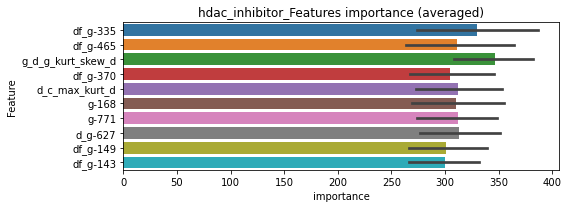

len(train_index) : 2977
len(valid_index) : 745
================================= fold 1/5 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0458307	valid_1's binary_logloss: 0.0914239
[2000]	training's binary_logloss: 0.0227473	valid_1's binary_logloss: 0.0632433
[3000]	training's binary_logloss: 0.0150029	valid_1's binary_logloss: 0.0516966
[4000]	training's binary_logloss: 0.011191	valid_1's binary_logloss: 0.0457404
[5000]	training's binary_logloss: 0.0089359	valid_1's binary_logloss: 0.0420263
[6000]	training's binary_logloss: 0.0074617	valid_1's binary_logloss: 0.039312
[7000]	training's binary_logloss: 0.00641027	valid_1's binary_logloss: 0.0373186
[8000]	training's binary_logloss: 0.00562875	valid_1's binary_logloss: 0.0357806
[9000]	training's binary_logloss: 0.00502571	valid_1's binary_logloss: 0.0345547
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00486292	valid_1's binary_logloss: 0.0341932


len(train_index) : 2977
len(valid_index) : 745
================================= fold 2/5 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0451063	valid_1's binary_logloss: 0.0914242
[2000]	training's binary_logloss: 0.0224399	valid_1's binary_logloss: 0.0656631
[3000]	training's binary_logloss: 0.0147958	valid_1's binary_logloss: 0.055813
[4000]	training's binary_logloss: 0.0110388	valid_1's binary_logloss: 0.0506535
[5000]	training's binary_logloss: 0.00880862	valid_1's binary_logloss: 0.0473193
Early stopping, best iteration is:
[5862]	training's binary_logloss: 0.00751073	valid_1's binary_logloss: 0.0452812


len(train_index) : 2978
len(valid_index) : 744
================================= fold 3/5 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0458161	valid_1's binary_logloss: 0.0906428
[2000]	training's binary_logloss: 0.0227443	valid_1's binary_logloss: 0.0651337
[3000]	training's binary_logloss: 0.0150029	valid_1's binary_logloss: 0.0554079
[4000]	training's binary_logloss: 0.0112014	valid_1's binary_logloss: 0.050053
[5000]	training's binary_logloss: 0.00894201	valid_1's binary_logloss: 0.0469876
[6000]	training's binary_logloss: 0.00743862	valid_1's binary_logloss: 0.0448124
[7000]	training's binary_logloss: 0.00638406	valid_1's binary_logloss: 0.0432227
Early stopping, best iteration is:
[7420]	training's binary_logloss: 0.00603239	valid_1's binary_logloss: 0.0426151


len(train_index) : 2978
len(valid_index) : 744
================================= fold 4/5 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0471621	valid_1's binary_logloss: 0.0714311
[2000]	training's binary_logloss: 0.0234076	valid_1's binary_logloss: 0.0465572
[3000]	training's binary_logloss: 0.0153811	valid_1's binary_logloss: 0.0377615
[4000]	training's binary_logloss: 0.011482	valid_1's binary_logloss: 0.0331775
[5000]	training's binary_logloss: 0.00916909	valid_1's binary_logloss: 0.0303963
[6000]	training's binary_logloss: 0.00764171	valid_1's binary_logloss: 0.0283792
[7000]	training's binary_logloss: 0.00656112	valid_1's binary_logloss: 0.0270135
Early stopping, best iteration is:
[7033]	training's binary_logloss: 0.00652975	valid_1's binary_logloss: 0.0269501


len(train_index) : 2978
len(valid_index) : 744
================================= fold 5/5 hdac_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0455561	valid_1's binary_logloss: 0.0928483
[2000]	training's binary_logloss: 0.0225681	valid_1's binary_logloss: 0.0656552
[3000]	training's binary_logloss: 0.0148426	valid_1's binary_logloss: 0.0554191
[4000]	training's binary_logloss: 0.0110226	valid_1's binary_logloss: 0.049795
[5000]	training's binary_logloss: 0.00883033	valid_1's binary_logloss: 0.0463505
[6000]	training's binary_logloss: 0.00734564	valid_1's binary_logloss: 0.0437673
Early stopping, best iteration is:
[6547]	training's binary_logloss: 0.00673578	valid_1's binary_logloss: 0.0427119


hdac_inhibitor logloss: 0.0383510345751421
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000612414	valid_1's binary_logloss: 0.0321381
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000579228	valid_1's binary_logloss: 0.0204589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00054508	valid_1's binary_logloss: 0.0228086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000527093	valid_1's binary_logloss: 0.00572816
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000544718	valid_1's binary_logloss: 0.0218123


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041142, Threshold: 0.0105987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0105987, conf_0:0.00742, conf_1:0.01378
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0405987
threshold: 0.0405987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0007068	valid_1's binary_logloss: 0.0301588
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000489246	valid_1's binary_logloss: 0.0188852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000551461	valid_1's binary_logloss: 0.0215551
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00051816	valid_1's binary_logloss: 0.00696306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000519475	valid_1's binary_logloss: 0.0186964


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0209494, Threshold: 0.0405987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00248
Num_p_label: 14.0, Expected: 9.9, Threshold: 0.0405987, conf_0:0.03248, conf_1:0.04872
threshold: 0.0405987, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000621507	valid_1's binary_logloss: 0.0232561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000512972	valid_1's binary_logloss: 0.0100376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000507567	valid_1's binary_logloss: 0.0144215
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00088453	valid_1's binary_logloss: 0.0145571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000631417	valid_1's binary_logloss: 0.0252389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0196299, Threshold: 0.0405987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0042692 Vs.target_rate: 0.00248
Num_p_label: 17.0, Expected: 9.9, Threshold: 0.0405987, conf_0:0.03654, conf_1:0.04466
threshold: 0.0405987, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


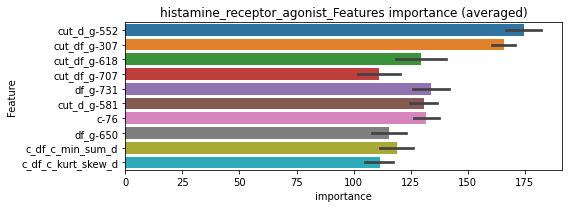

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000721157	valid_1's binary_logloss: 0.0209988


================================= fold 2/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000512245	valid_1's binary_logloss: 0.00956695


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000615263	valid_1's binary_logloss: 0.0214512


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 histamine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000882442	valid_1's binary_logloss: 0.015586
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000717478	valid_1's binary_logloss: 0.0223112


histamine_receptor_agonist logloss: 0.017984734428819128


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6823
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6823


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0323025	valid_1's binary_logloss: 0.108699
Early stopping, best iteration is:
[1298]	training's binary_logloss: 0.0242375	valid_1's binary_logloss: 0.105804
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.032926	valid_1's binary_logloss: 0.0982575
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0239138	valid_1's binary_logloss: 0.0926551
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.031611	valid_1's binary_logloss: 0.121999
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.0285953	valid_1's binary_logloss: 0.121252
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0325077	valid_1's binary_logloss: 0.10174
Early stopping, best iteration is:
[1350]	training's binary_logloss: 0.023487	valid_1's binary_logl

1 / 3, AUC score:0.978, PR-AUC:0.957
y_Threshold: 0.0576063, Threshold: 0.0979819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 458 → Positive_corect_labels: 1272/7729
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0979819, conf_0:0.06859, conf_1:0.12738
threshold: 0.0979819, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1272.0/7729, y_label_rate: 0.1645750
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0232991	valid_1's binary_logloss: 0.0761978
Early stopping, best iteration is:
[1924]	training's binary_logloss: 0.0113376	valid_1's binary_logloss: 0.0687114
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234726	valid_1's binary_logloss: 0.0664514
Early stopping, best iteration is:
[1895]	training's binary_logloss: 0.0116632	valid_1's binary_logloss: 0.0592292
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0231959	valid_1's binary_logloss: 0.0776813
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0124254	valid_1's binary_logloss: 0.0700316
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0237761	valid_1's binary_logloss: 0.0645213
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0117889	valid_1's bi

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0632000, Threshold: 0.0979819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 96 → Positive_corect_labels: 1224.0/7633
p_label_rate: 0.0105475 Vs.target_rate: 0.01012
Num_p_label: 42.0, Expected: 40.3, Threshold: 0.0979819, conf_0:0.07839, conf_1:0.11758
threshold: 0.0979819, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1224.0/7633, y_label_rate: 0.1603563
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0192056	valid_1's binary_logloss: 0.0623691
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.0104227	valid_1's binary_logloss: 0.0561505
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0199485	valid_1's binary_logloss: 0.0489496
Early stopping, best iteration is:
[1903]	training's binary_logloss: 0.00987987	valid_1's binary_logloss: 0.0397506
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0192911	valid_1's binary_logloss: 0.061537
Early stopping, best iteration is:
[1457]	training's binary_logloss: 0.0127596	valid_1's binary_logloss: 0.0558891
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0192079	valid_1's binary_logloss: 0.0606501
Early stopping, best iteration is:
[1750]	training's binary_logloss: 0.0104134	valid_1's bi

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0599720, Threshold: 0.0979819, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 1198.0/7581
p_label_rate: 0.0080362 Vs.target_rate: 0.01012
Num_p_label: 32.0, Expected: 40.3, Threshold: 0.0979819, conf_0:0.08818, conf_1:0.10778
threshold: 0.0979819, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1198.0/7581, y_label_rate: 0.1580266


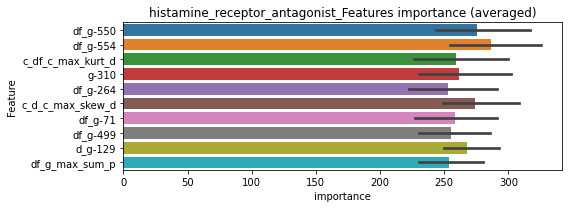

len(train_index) : 6064
len(valid_index) : 1517
================================= fold 1/5 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0314416	valid_1's binary_logloss: 0.0622604
[2000]	training's binary_logloss: 0.0155464	valid_1's binary_logloss: 0.0497255
Early stopping, best iteration is:
[2178]	training's binary_logloss: 0.0142093	valid_1's binary_logloss: 0.0485007


len(train_index) : 6065
len(valid_index) : 1516
================================= fold 2/5 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0309588	valid_1's binary_logloss: 0.0612744
[2000]	training's binary_logloss: 0.0153097	valid_1's binary_logloss: 0.04911
[3000]	training's binary_logloss: 0.0100797	valid_1's binary_logloss: 0.0450956
Early stopping, best iteration is:
[3056]	training's binary_logloss: 0.00989166	valid_1's binary_logloss: 0.0448209


len(train_index) : 6065
len(valid_index) : 1516
================================= fold 3/5 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0318161	valid_1's binary_logloss: 0.0583197
[2000]	training's binary_logloss: 0.0159414	valid_1's binary_logloss: 0.0433549
[3000]	training's binary_logloss: 0.0104663	valid_1's binary_logloss: 0.037915
[4000]	training's binary_logloss: 0.00777955	valid_1's binary_logloss: 0.0350017
Early stopping, best iteration is:
[4039]	training's binary_logloss: 0.00770267	valid_1's binary_logloss: 0.034871


len(train_index) : 6065
len(valid_index) : 1516
================================= fold 4/5 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.031951	valid_1's binary_logloss: 0.0535554
[2000]	training's binary_logloss: 0.0159186	valid_1's binary_logloss: 0.0389005
[3000]	training's binary_logloss: 0.0104545	valid_1's binary_logloss: 0.0335232
[4000]	training's binary_logloss: 0.0077529	valid_1's binary_logloss: 0.0308478
Early stopping, best iteration is:
[4032]	training's binary_logloss: 0.00768574	valid_1's binary_logloss: 0.0307114


len(train_index) : 6065
len(valid_index) : 1516
================================= fold 5/5 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.032331	valid_1's binary_logloss: 0.0575134
[2000]	training's binary_logloss: 0.0160688	valid_1's binary_logloss: 0.0436988
[3000]	training's binary_logloss: 0.0105144	valid_1's binary_logloss: 0.0384859
[4000]	training's binary_logloss: 0.00779133	valid_1's binary_logloss: 0.0359378
Early stopping, best iteration is:
[4655]	training's binary_logloss: 0.00663607	valid_1's binary_logloss: 0.0349116


histamine_receptor_antagonist logloss: 0.03876440037726656
histamine_receptor_antagonist is unpredictable(><)!
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000345239	valid_1's binary_logloss: 0.000983871
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000353065	valid_1's binary_logloss: 0.0021293
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000347086	valid_1's binary_logloss: 0.0019937
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000350494	valid_1's binary_logloss: 0.00132768
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019277, Threshold: 0.0171699, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000353279	valid_1's binary_logloss: 0.00294093


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0171699, conf_0:0.01202, conf_1:0.02232
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.0471699
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.0771699
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_3: 0.1071699
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.1371699
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_5: 0.1671699
threshold: 0.1671699, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00034366	valid_1's binary_logloss: 0.00101863
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000338064	valid_1's binary_logloss: 0.00189239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000342063	valid_1's binary_logloss: 0.00128413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000347968	valid_1's binary_logloss: 0.00164299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000342222	valid_1's binary_logloss: 0.00343589


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0757607, Threshold: 0.1671699, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0062783 Vs.target_rate: 0.00101
Num_p_label: 25.0, Expected: 4.0, Threshold: 0.1671699, conf_0:0.13374, conf_1:0.20060
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_1: 0.1971699
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2271699
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_3: 0.2571699
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.2871699
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_5: 0.3171699
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_6: 0.3471699
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_7: 0.3771699
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_8: 0.4071699
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_9: 0.4371699
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_10: 0.4671699
threshold: 0.4671699, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00034366	valid_1's binary_logloss: 0.00101863
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000338064	valid_1's binary_logloss: 0.00189239
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000342063	valid_1's binary_logloss: 0.00128413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000347968	valid_1's binary_logloss: 0.00164299
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0757607, Threshold: 0.4671699, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000342222	valid_1's binary_logloss: 0.00343589


p_label_rate: 0.0030136 Vs.target_rate: 0.00101
Num_p_label: 12.0, Expected: 4.0, Threshold: 0.4671699, conf_0:0.42045, conf_1:0.51389
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.4971699
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.5271699
threshold: 0.5271699, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


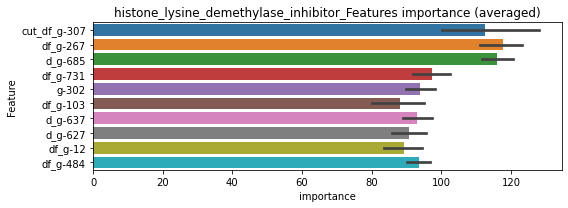

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000347491	valid_1's binary_logloss: 0.00122681


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000338625	valid_1's binary_logloss: 0.00193273


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000337381	valid_1's binary_logloss: 0.00158484


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00034407	valid_1's binary_logloss: 0.0012979


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00034613	valid_1's binary_logloss: 0.00250224


histone_lysine_demethylase_inhibitor logloss: 0.0017092835716252185
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000391794	valid_1's binary_logloss: 0.00637885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000527468	valid_1's binary_logloss: 0.010514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000377465	valid_1's binary_logloss: 0.000944489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000381187	valid_1's binary_logloss: 0.000805075
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0025937, Threshold: 0.0071797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000425913	valid_1's binary_logloss: 0.0178754


p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0071797, conf_0:0.00503, conf_1:0.00933
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0371797
threshold: 0.0371797, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000373211	valid_1's binary_logloss: 0.00186867
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000365642	valid_1's binary_logloss: 0.00176597
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000370311	valid_1's binary_logloss: 0.0101024
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000370685	valid_1's binary_logloss: 0.00300257
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171325, Threshold: 0.0371797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000428497	valid_1's binary_logloss: 0.010987


p_label_rate: 0.0035158 Vs.target_rate: 0.00134
Num_p_label: 14.0, Expected: 5.4, Threshold: 0.0371797, conf_0:0.02974, conf_1:0.04462
Num_p_label: 4.0, Expected: 5.4, Adj_threshold_1: 0.0671797
threshold: 0.0671797, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000382917	valid_1's binary_logloss: 0.002943
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000360571	valid_1's binary_logloss: 0.00131997
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000370013	valid_1's binary_logloss: 0.00908517
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000366157	valid_1's binary_logloss: 0.00250774
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000352769	valid_1's binary_logloss: 0.00813329


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136821, Threshold: 0.0671797, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0010045 Vs.target_rate: 0.00134
Num_p_label: 4.0, Expected: 5.4, Threshold: 0.0671797, conf_0:0.06046, conf_1:0.07390
threshold: 0.0671797, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


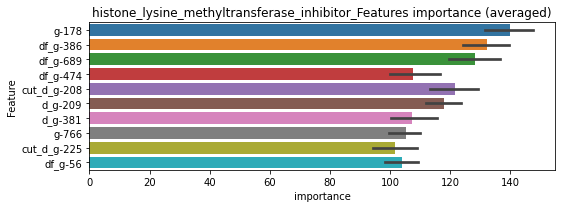

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000369865	valid_1's binary_logloss: 0.00412862


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000367593	valid_1's binary_logloss: 0.00155615
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00155212


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000387651	valid_1's binary_logloss: 0.00621743


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000374133	valid_1's binary_logloss: 0.00191299


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000377132	valid_1's binary_logloss: 0.00683337


histone_lysine_methyltransferase_inhibitor logloss: 0.004128267492362235
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00140714	valid_1's binary_logloss: 0.0496914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000561853	valid_1's binary_logloss: 0.010795
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000556367	valid_1's binary_logloss: 0.0106852
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000604907	valid_1's binary_logloss: 0.0111975
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000583725	valid_1's binary_logloss: 0.0189048


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054858, Threshold: 0.1019320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.1019320, conf_0:0.07135, conf_1:0.13251
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_1: 0.1319320
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_2: 0.1619320
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_3: 0.1919320
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.2219320
threshold: 0.2219320, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000582749	valid_1's binary_logloss: 0.0227019
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000603901	valid_1's binary_logloss: 0.0187697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000559967	valid_1's binary_logloss: 0.0170772
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000553008	valid_1's binary_logloss: 0.0149906
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000540322	valid_1's binary_logloss: 0.0186693


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0702038, Threshold: 0.2219320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0123054 Vs.target_rate: 0.00302
Num_p_label: 49.0, Expected: 12.0, Threshold: 0.2219320, conf_0:0.17755, conf_1:0.26632
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_1: 0.2519320
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_2: 0.2819320
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_3: 0.3119320
Num_p_label: 38.0, Expected: 12.0, Adj_threshold_4: 0.3419320
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_5: 0.3719320
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_6: 0.4019320
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.4319320
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_8: 0.4619320
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_9: 0.4919320
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_10: 0.5219320
threshold: 0.5219320, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000617383	valid_1's binary_logloss: 0.0110118
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00077832	valid_1's binary_logloss: 0.0266468
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000542357	valid_1's binary_logloss: 0.00789899
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000545599	valid_1's binary_logloss: 0.0181332
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000550398	valid_1's binary_logloss: 0.0174188


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0557608, Threshold: 0.5219320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0072828 Vs.target_rate: 0.00302
Num_p_label: 29.0, Expected: 12.0, Threshold: 0.5219320, conf_0:0.46974, conf_1:0.57413
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_1: 0.5519320
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_2: 0.5819320
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.6119320
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_4: 0.6419320
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_5: 0.6719320
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_6: 0.7019320
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_7: 0.7319320
threshold: 0.7319320, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


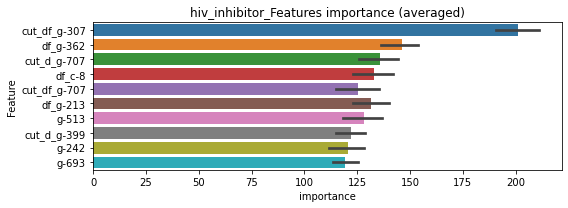

len(train_index) : 3034
len(valid_index) : 759
================================= fold 1/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000593446	valid_1's binary_logloss: 0.0151485


len(train_index) : 3034
len(valid_index) : 759
================================= fold 2/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 759
================================= fold 3/5 hiv_inhibitor=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00125866	valid_1's binary_logloss: 0.0311424
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000628233	valid_1's binary_logloss: 0.0135719


len(train_index) : 3035
len(valid_index) : 758
================================= fold 4/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00062854	valid_1's binary_logloss: 0.0223985


len(train_index) : 3035
len(valid_index) : 758
================================= fold 5/5 hiv_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000579481	valid_1's binary_logloss: 0.0102809


hiv_inhibitor logloss: 0.01850955741959786


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0392343	valid_1's binary_logloss: 0.111028
[2000]	training's binary_logloss: 0.0177241	valid_1's binary_logloss: 0.0877092
[3000]	training's binary_logloss: 0.0112146	valid_1's binary_logloss: 0.0802116
Early stopping, best iteration is:
[3343]	training's binary_logloss: 0.00993407	valid_1's binary_logloss: 0.0787156
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0387302	valid_1's binary_logloss: 0.11298
[2000]	training's binary_logloss: 0.0174871	valid_1's binary_logloss: 0.091547
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0164661	valid_1's binary_logloss: 0.0902262
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0384661	valid_1's binary_logloss: 0.118836
[2000]	training's binary_logloss: 0.0173378	valid_1's binary_logloss: 0.0997432
Early stopping, best iteration 

1 / 3, AUC score:0.986, PR-AUC:0.972
y_Threshold: 0.0615875, Threshold: 0.1473700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 444 → Positive_corect_labels: 1406/8436
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.1473700, conf_0:0.10316, conf_1:0.19158
threshold: 0.1473700, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1406.0/8436, y_label_rate: 0.1666667
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0329755	valid_1's binary_logloss: 0.08653
[2000]	training's binary_logloss: 0.0150564	valid_1's binary_logloss: 0.0626157
[3000]	training's binary_logloss: 0.00961161	valid_1's binary_logloss: 0.0537827
[4000]	training's binary_logloss: 0.00706252	valid_1's binary_logloss: 0.0493526
Early stopping, best iteration is:
[4289]	training's binary_logloss: 0.00655751	valid_1's binary_logloss: 0.0483079
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0330418	valid_1's binary_logloss: 0.0855729
[2000]	training's binary_logloss: 0.0150655	valid_1's binary_logloss: 0.0653667
[3000]	training's binary_logloss: 0.0096071	valid_1's binary_logloss: 0.058128
Early stopping, best iteration is:
[3664]	training's binary_logloss: 0.00775241	valid_1's binary_logloss: 0.0555228
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_l

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0959130, Threshold: 0.1473700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1375.0/8374
p_label_rate: 0.0153189 Vs.target_rate: 0.01188
Num_p_label: 61.0, Expected: 47.3, Threshold: 0.1473700, conf_0:0.11790, conf_1:0.17684
threshold: 0.1473700, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 1375.0/8374, y_label_rate: 0.1641987
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.031387	valid_1's binary_logloss: 0.0844137
[2000]	training's binary_logloss: 0.0142525	valid_1's binary_logloss: 0.0638056
[3000]	training's binary_logloss: 0.0091307	valid_1's binary_logloss: 0.0568102
Early stopping, best iteration is:
[3361]	training's binary_logloss: 0.00808189	valid_1's binary_logloss: 0.0551188
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0310662	valid_1's binary_logloss: 0.0926497
[2000]	training's binary_logloss: 0.0141621	valid_1's binary_logloss: 0.0707975
[3000]	training's binary_logloss: 0.00907367	valid_1's binary_logloss: 0.0631267
Early stopping, best iteration is:
[3402]	training's binary_logloss: 0.00792981	valid_1's binary_logloss: 0.0612433
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0316606	valid_1's binary_logloss: 0.0810495
[2000]	training's binary_

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0969022, Threshold: 0.1473700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1340.0/8304
p_label_rate: 0.0158212 Vs.target_rate: 0.01188
Num_p_label: 63.0, Expected: 47.3, Threshold: 0.1473700, conf_0:0.13263, conf_1:0.16211
threshold: 0.1473700, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 1340.0/8304, y_label_rate: 0.1613680


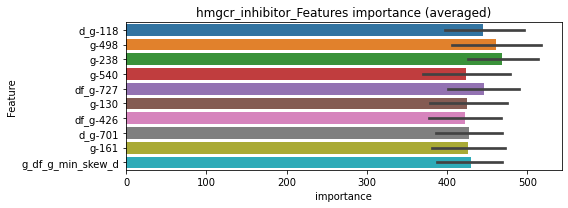

len(train_index) : 6643
len(valid_index) : 1661
================================= fold 1/5 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0547883	valid_1's binary_logloss: 0.107096
[2000]	training's binary_logloss: 0.0264526	valid_1's binary_logloss: 0.0726594
[3000]	training's binary_logloss: 0.0170979	valid_1's binary_logloss: 0.0601124
[4000]	training's binary_logloss: 0.0126163	valid_1's binary_logloss: 0.0536646
[5000]	training's binary_logloss: 0.00997516	valid_1's binary_logloss: 0.0497879
Early stopping, best iteration is:
[5205]	training's binary_logloss: 0.00956783	valid_1's binary_logloss: 0.0490456


len(train_index) : 6643
len(valid_index) : 1661
================================= fold 2/5 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0546175	valid_1's binary_logloss: 0.104453
[2000]	training's binary_logloss: 0.0262464	valid_1's binary_logloss: 0.072257
[3000]	training's binary_logloss: 0.0169909	valid_1's binary_logloss: 0.0607181
[4000]	training's binary_logloss: 0.0125301	valid_1's binary_logloss: 0.054587
Early stopping, best iteration is:
[4219]	training's binary_logloss: 0.0118438	valid_1's binary_logloss: 0.0534237


len(train_index) : 6643
len(valid_index) : 1661
================================= fold 3/5 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.054615	valid_1's binary_logloss: 0.104574
[2000]	training's binary_logloss: 0.026358	valid_1's binary_logloss: 0.0724405
[3000]	training's binary_logloss: 0.0170383	valid_1's binary_logloss: 0.0602912
[4000]	training's binary_logloss: 0.0125633	valid_1's binary_logloss: 0.0544037
Early stopping, best iteration is:
[4826]	training's binary_logloss: 0.0103162	valid_1's binary_logloss: 0.0510149


len(train_index) : 6643
len(valid_index) : 1661
================================= fold 4/5 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0540718	valid_1's binary_logloss: 0.12443
[2000]	training's binary_logloss: 0.0260933	valid_1's binary_logloss: 0.0947213
[3000]	training's binary_logloss: 0.0168584	valid_1's binary_logloss: 0.0840769
Early stopping, best iteration is:
[3487]	training's binary_logloss: 0.0143659	valid_1's binary_logloss: 0.0804783


len(train_index) : 6644
len(valid_index) : 1660
================================= fold 5/5 hmgcr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0543285	valid_1's binary_logloss: 0.103912
[2000]	training's binary_logloss: 0.0262675	valid_1's binary_logloss: 0.0730782
[3000]	training's binary_logloss: 0.0169489	valid_1's binary_logloss: 0.0614844
[4000]	training's binary_logloss: 0.0125074	valid_1's binary_logloss: 0.055472
[5000]	training's binary_logloss: 0.00988809	valid_1's binary_logloss: 0.0517755
Early stopping, best iteration is:
[5949]	training's binary_logloss: 0.00826512	valid_1's binary_logloss: 0.0493589


hmgcr_inhibitor logloss: 0.056665170699555074
hmgcr_inhibitor is unpredictable(><)!
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00223496	valid_1's binary_logloss: 0.0569787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000767313	valid_1's binary_logloss: 0.0251964
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00123931	valid_1's binary_logloss: 0.0313395
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000937387	valid_1's binary_logloss: 0.0219431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000756813	valid_1's binary_logloss: 0.0393924


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0139682, Threshold: 0.1567896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1567896, conf_0:0.10975, conf_1:0.20383
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_1: 0.1867896
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_2: 0.2167896
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_3: 0.2467896
Num_p_label: 22.0, Expected: 15.6, Adj_threshold_4: 0.2767896
threshold: 0.2767896, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00103654	valid_1's binary_logloss: 0.0368176
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000736998	valid_1's binary_logloss: 0.0259924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00114061	valid_1's binary_logloss: 0.039399
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000701002	valid_1's binary_logloss: 0.0174347
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000647784	valid_1's binary_logloss: 0.0209932


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0738692, Threshold: 0.2767896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0173280 Vs.target_rate: 0.00391
Num_p_label: 69.0, Expected: 15.6, Threshold: 0.2767896, conf_0:0.22143, conf_1:0.33215
Num_p_label: 62.0, Expected: 15.6, Adj_threshold_1: 0.3067896
Num_p_label: 57.0, Expected: 15.6, Adj_threshold_2: 0.3367896
Num_p_label: 54.0, Expected: 15.6, Adj_threshold_3: 0.3667896
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_4: 0.3967896
Num_p_label: 44.0, Expected: 15.6, Adj_threshold_5: 0.4267896
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_6: 0.4567896
Num_p_label: 33.0, Expected: 15.6, Adj_threshold_7: 0.4867896
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_8: 0.5167896
Num_p_label: 28.0, Expected: 15.6, Adj_threshold_9: 0.5467896
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_10: 0.5767896
threshold: 0.5767896, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000673723	valid_1's binary_logloss: 0.0286685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000911978	valid_1's binary_logloss: 0.0343401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000665881	valid_1's binary_logloss: 0.0137227
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.0006306	valid_1's binary_logloss: 0.0182129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00109576	valid_1's binary_logloss: 0.0266203


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0702932, Threshold: 0.5767896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0090407 Vs.target_rate: 0.00391
Num_p_label: 36.0, Expected: 15.6, Threshold: 0.5767896, conf_0:0.51911, conf_1:0.63447
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_1: 0.6067896
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.6367896
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_3: 0.6667896
Num_p_label: 23.0, Expected: 15.6, Adj_threshold_4: 0.6967896
threshold: 0.6967896, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 631.0/3749, y_label_rate: 0.1683115


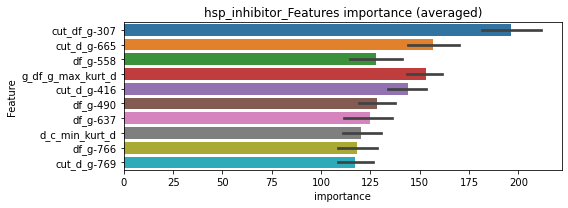

len(train_index) : 2999
len(valid_index) : 750
================================= fold 1/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000823415	valid_1's binary_logloss: 0.0229566


len(train_index) : 2999
len(valid_index) : 750
================================= fold 2/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000944955	valid_1's binary_logloss: 0.0211378


len(train_index) : 2999
len(valid_index) : 750
================================= fold 3/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00078925	valid_1's binary_logloss: 0.0157117


len(train_index) : 2999
len(valid_index) : 750
================================= fold 4/5 hsp_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3000
len(valid_index) : 749
================================= fold 5/5 hsp_inhibitor=================================


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00138902	valid_1's binary_logloss: 0.0251794
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00101092	valid_1's binary_logloss: 0.0368872


hsp_inhibitor logloss: 0.024371178838412895
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000420019	valid_1's binary_logloss: 0.0123349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000590529	valid_1's binary_logloss: 0.0149618
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000429455	valid_1's binary_logloss: 0.0029177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000434188	valid_1's binary_logloss: 0.00181013
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000428382	valid_1's binary_logloss: 0.0142327


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030918, Threshold: 0.0174550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0174550, conf_0:0.01222, conf_1:0.02269
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0474550
threshold: 0.0474550, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000427877	valid_1's binary_logloss: 0.0103549
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00052702	valid_1's binary_logloss: 0.0165554
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000419507	valid_1's binary_logloss: 0.00198776
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000438041	valid_1's binary_logloss: 0.00192668
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000420066	valid_1's binary_logloss: 0.0139104


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0423636, Threshold: 0.0474550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0125565 Vs.target_rate: 0.00155
Num_p_label: 50.0, Expected: 6.2, Threshold: 0.0474550, conf_0:0.03796, conf_1:0.05695
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_1: 0.0774550
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_2: 0.1074550
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1374550
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_4: 0.1674550
threshold: 0.1674550, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000423239	valid_1's binary_logloss: 0.00759569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000537181	valid_1's binary_logloss: 0.00517511
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00045035	valid_1's binary_logloss: 0.0169462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000432786	valid_1's binary_logloss: 0.0031376
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270532, Threshold: 0.1674550, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000516757	valid_1's binary_logloss: 0.0124891


p_label_rate: 0.0047715 Vs.target_rate: 0.00155
Num_p_label: 19.0, Expected: 6.2, Threshold: 0.1674550, conf_0:0.15071, conf_1:0.18420
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.1974550
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.2274550
threshold: 0.2274550, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


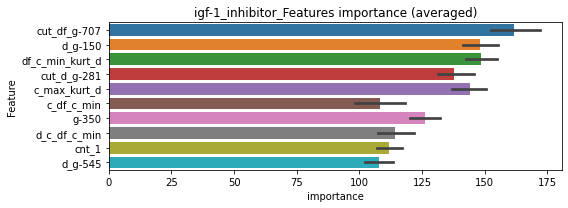

len(train_index) : 3044
len(valid_index) : 761
================================= fold 1/5 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3044
len(valid_index) : 761
================================= fold 2/5 igf-1_inhibitor=================================


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000531578	valid_1's binary_logloss: 0.00620865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000447084	valid_1's binary_logloss: 0.0036988


len(train_index) : 3044
len(valid_index) : 761
================================= fold 3/5 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3044
len(valid_index) : 761
================================= fold 4/5 igf-1_inhibitor=================================


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000660378	valid_1's binary_logloss: 0.0152688
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000428168	valid_1's binary_logloss: 0.00286171


len(train_index) : 3044
len(valid_index) : 761
================================= fold 5/5 igf-1_inhibitor=================================


Training until validation scores don't improve for 29 rounds


igf-1_inhibitor logloss: 0.008693765252163482


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000918773	valid_1's binary_logloss: 0.0154293


ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000349402	valid_1's binary_logloss: 0.00588097
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000351364	valid_1's binary_logloss: 0.00292711
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000343473	valid_1's binary_logloss: 0.00258658
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000341289	valid_1's binary_logloss: 0.000852718
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027754, Threshold: 0.0114116, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000340176	valid_1's binary_logloss: 0.00133801


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0114116, conf_0:0.00799, conf_1:0.01484
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_1: 0.0414116
threshold: 0.0414116, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000332924	valid_1's binary_logloss: 0.00561463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00034	valid_1's binary_logloss: 0.00238998
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000331549	valid_1's binary_logloss: 0.00133559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000327731	valid_1's binary_logloss: 0.000737374
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000321934	valid_1's binary_logloss: 0.00155991


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0255290, Threshold: 0.0414116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0085384 Vs.target_rate: 0.00126
Num_p_label: 34.0, Expected: 5.0, Threshold: 0.0414116, conf_0:0.03313, conf_1:0.04969
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0714116
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1014116
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_3: 0.1314116
threshold: 0.1314116, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000332924	valid_1's binary_logloss: 0.00561463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00034	valid_1's binary_logloss: 0.00238998
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000331549	valid_1's binary_logloss: 0.00133559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000327731	valid_1's binary_logloss: 0.000737374
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000321934	valid_1's binary_logloss: 0.00155991


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0255290, Threshold: 0.1314116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00126
Num_p_label: 7.0, Expected: 5.0, Threshold: 0.1314116, conf_0:0.11827, conf_1:0.14455
threshold: 0.1314116, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


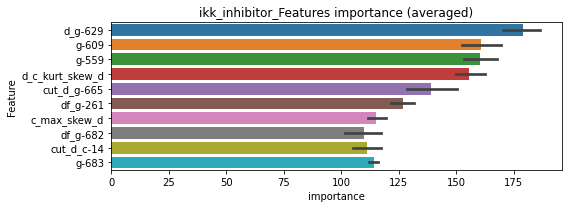

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000349712	valid_1's binary_logloss: 0.00489232


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000328222	valid_1's binary_logloss: 0.00263772
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000327824	valid_1's binary_logloss: 0.00263643


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00032778	valid_1's binary_logloss: 0.00150969
Early stopping, best iteration is:
[1101]	training's binary_logloss: 0.000321688	valid_1's binary_logloss: 0.00149169


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000328992	valid_1's binary_logloss: 0.000766914
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000323474	valid_1's binary_logloss: 0.000757047


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 ikk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000326665	valid_1's binary_logloss: 0.00119199
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000323874	valid_1's binary_logloss: 0.00118574


ikk_inhibitor logloss: 0.0021946974956281785
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000359178	valid_1's binary_logloss: 0.00571449
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000345903	valid_1's binary_logloss: 0.00386148
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00033507	valid_1's binary_logloss: 0.00897714
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000351089	valid_1's binary_logloss: 0.00127885
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000344087	valid_1's binary_logloss: 0.00342606


y_Threshold: 0.0019932, Threshold: 0.0106673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0106673, conf_0:0.00747, conf_1:0.01387
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.0406673
threshold: 0.0406673, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000334419	valid_1's binary_logloss: 0.00538716
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000338892	valid_1's binary_logloss: 0.00391335
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000340894	valid_1's binary_logloss: 0.0099463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000328564	valid_1's binary_logloss: 0.000818907
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199470, Threshold: 0.0406673, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000339243	valid_1's binary_logloss: 0.00335914


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0085384 Vs.target_rate: 0.00130
Num_p_label: 34.0, Expected: 5.2, Threshold: 0.0406673, conf_0:0.03253, conf_1:0.04880
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_1: 0.0706673
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1006673
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_3: 0.1306673
threshold: 0.1306673, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000334419	valid_1's binary_logloss: 0.00538716
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000338892	valid_1's binary_logloss: 0.00391335
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000340894	valid_1's binary_logloss: 0.0099463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000328564	valid_1's binary_logloss: 0.000818907
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000339243	valid_1's binary_logloss: 0.00335914


y_Threshold: 0.0199470, Threshold: 0.1306673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, Expected: 5.2, Threshold: 0.1306673, conf_0:0.11760, conf_1:0.14373
threshold: 0.1306673, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


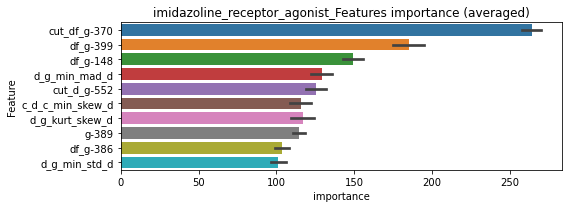

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000346453	valid_1's binary_logloss: 0.00317547


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000356124	valid_1's binary_logloss: 0.00496778


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000352846	valid_1's binary_logloss: 0.0114899


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000354291	valid_1's binary_logloss: 0.00108408


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000364671	valid_1's binary_logloss: 0.00255984


imidazoline_receptor_agonist logloss: 0.004655110032276298
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00121438	valid_1's binary_logloss: 0.0259298
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000985991	valid_1's binary_logloss: 0.0283559
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000864205	valid_1's binary_logloss: 0.0272473
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00117551	valid_1's binary_logloss: 0.0397451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000883363	valid_1's binary_logloss: 0.0293013


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0078143, Threshold: 0.0186712, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0186712, conf_0:0.01307, conf_1:0.02427
Num_p_label: 6.0, Expected: 12.2, Adj_threshold_1: 0.0486712
threshold: 0.0486712, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3790, y_label_rate: 0.1717678
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00180411	valid_1's binary_logloss: 0.0321474
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000575703	valid_1's binary_logloss: 0.020401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000701243	valid_1's binary_logloss: 0.0306379
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000624506	valid_1's binary_logloss: 0.0101261
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000567533	valid_1's binary_logloss: 0.0264379


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0209933, Threshold: 0.0486712, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00307
Num_p_label: 14.0, Expected: 12.2, Threshold: 0.0486712, conf_0:0.03894, conf_1:0.05841
threshold: 0.0486712, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000708038	valid_1's binary_logloss: 0.0263138
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000575752	valid_1's binary_logloss: 0.0146463
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000698956	valid_1's binary_logloss: 0.0281314
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000563391	valid_1's binary_logloss: 0.00816547
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000544255	valid_1's binary_logloss: 0.0119874


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246799, Threshold: 0.0486712, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.0486712, conf_0:0.04380, conf_1:0.05354
threshold: 0.0486712, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3782, y_label_rate: 0.1710735


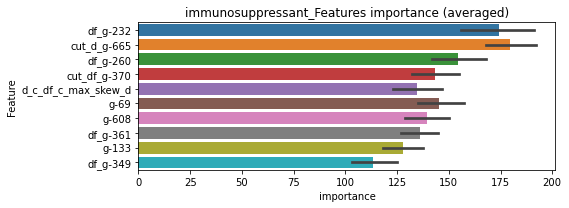

len(train_index) : 3025
len(valid_index) : 757
================================= fold 1/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3025
len(valid_index) : 757


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00100837	valid_1's binary_logloss: 0.0275252


================================= fold 2/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3026
len(valid_index) : 756
================================= fold 3/5 immunosuppressant=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00111372	valid_1's binary_logloss: 0.0215787
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000612153	valid_1's binary_logloss: 0.0193277


len(train_index) : 3026
len(valid_index) : 756
================================= fold 4/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000633342	valid_1's binary_logloss: 0.0109567


len(train_index) : 3026
len(valid_index) : 756
================================= fold 5/5 immunosuppressant=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000598089	valid_1's binary_logloss: 0.0144478


immunosuppressant logloss: 0.018770263842014655
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000587968	valid_1's binary_logloss: 0.0113941
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000495612	valid_1's binary_logloss: 0.00447548
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399677	valid_1's binary_logloss: 0.00124827
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000376379	valid_1's binary_logloss: 0.00156859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000419338	valid_1's binary_logloss: 0.00777547


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025075, Threshold: 0.0099442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0099442, conf_0:0.00696, conf_1:0.01293
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0399442
threshold: 0.0399442, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000419979	valid_1's binary_logloss: 0.00983704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000390088	valid_1's binary_logloss: 0.00383879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000389248	valid_1's binary_logloss: 0.0010252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000388014	valid_1's binary_logloss: 0.00143847
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162202, Threshold: 0.0399442, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000399711	valid_1's binary_logloss: 0.0080393


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0399442, conf_0:0.03196, conf_1:0.04793
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_1: 0.0699442
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.0999442
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.1299442
threshold: 0.1299442, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000419979	valid_1's binary_logloss: 0.00983704
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000390088	valid_1's binary_logloss: 0.00383879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000389248	valid_1's binary_logloss: 0.0010252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000388014	valid_1's binary_logloss: 0.00143847
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000399711	valid_1's binary_logloss: 0.0080393


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162202, Threshold: 0.1299442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.1299442, conf_0:0.11695, conf_1:0.14294
threshold: 0.1299442, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


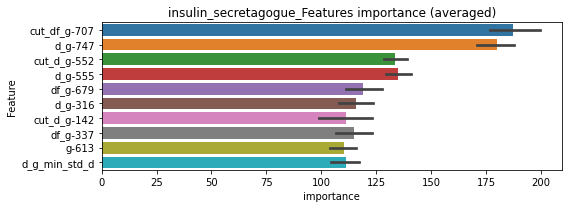

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000403157	valid_1's binary_logloss: 0.00811366


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000389549	valid_1's binary_logloss: 0.00386684


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000391293	valid_1's binary_logloss: 0.00110096


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000389736	valid_1's binary_logloss: 0.00147533


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 insulin_secretagogue=================================


Training until validation scores don't improve for 29 rounds


insulin_secretagogue logloss: 0.004523636561781944


Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000451462	valid_1's binary_logloss: 0.00805487


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000578029	valid_1's binary_logloss: 0.0143913
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000482968	valid_1's binary_logloss: 0.00404024
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000502639	valid_1's binary_logloss: 0.0131701
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00055454	valid_1's binary_logloss: 0.0109805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000568789	valid_1's binary_logloss: 0.0263762


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038921, Threshold: 0.0100842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0100842, conf_0:0.00706, conf_1:0.01311
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0400842
threshold: 0.0400842, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000490793	valid_1's binary_logloss: 0.0133471
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000453917	valid_1's binary_logloss: 0.00393486
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000507016	valid_1's binary_logloss: 0.0110171
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000542079	valid_1's binary_logloss: 0.0100105
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000572531	valid_1's binary_logloss: 0.0246113


y_Threshold: 0.0189784, Threshold: 0.0400842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0017579 Vs.target_rate: 0.00214
Num_p_label: 7.0, Expected: 8.5, Threshold: 0.0400842, conf_0:0.03207, conf_1:0.04810
threshold: 0.0400842, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000559184	valid_1's binary_logloss: 0.0217104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000467039	valid_1's binary_logloss: 0.0058478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000448166	valid_1's binary_logloss: 0.0120868
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00050536	valid_1's binary_logloss: 0.00900487
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.018458


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137253, Threshold: 0.0400842, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0020090 Vs.target_rate: 0.00214
Num_p_label: 8.0, Expected: 8.5, Threshold: 0.0400842, conf_0:0.03608, conf_1:0.04409
threshold: 0.0400842, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


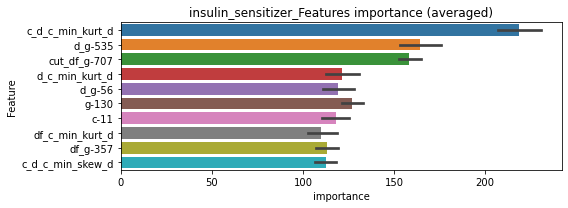

len(train_index) : 3038
len(valid_index) : 760
================================= fold 1/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000469213	valid_1's binary_logloss: 0.00572144


len(train_index) : 3038
len(valid_index) : 760
================================= fold 2/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000488219	valid_1's binary_logloss: 0.00818784


len(train_index) : 3038
len(valid_index) : 760
================================= fold 3/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3039
len(valid_index) : 759
================================= fold 4/5 insulin_sensitizer=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000805334	valid_1's binary_logloss: 0.0189538
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.00046412	valid_1's binary_logloss: 0.0101036


len(train_index) : 3039
len(valid_index) : 759
================================= fold 5/5 insulin_sensitizer=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000455167	valid_1's binary_logloss: 0.00619734


insulin_sensitizer logloss: 0.009835344143227067
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00042367	valid_1's binary_logloss: 0.00541454
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000441634	valid_1's binary_logloss: 0.00629624
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000500649	valid_1's binary_logloss: 0.00424762
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000622041	valid_1's binary_logloss: 0.0124969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000433345	valid_1's binary_logloss: 0.00789678


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040986, Threshold: 0.0143281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0143281, conf_0:0.01003, conf_1:0.01863
Num_p_label: 7.0, Expected: 7.0, Adj_threshold_1: 0.0443281
threshold: 0.0443281, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000412515	valid_1's binary_logloss: 0.00506012
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000426899	valid_1's binary_logloss: 0.00531682
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000439091	valid_1's binary_logloss: 0.00295134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000646204	valid_1's binary_logloss: 0.0086745
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000422789	valid_1's binary_logloss: 0.00611045


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0378144, Threshold: 0.0443281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0067805 Vs.target_rate: 0.00176
Num_p_label: 27.0, Expected: 7.0, Threshold: 0.0443281, conf_0:0.03546, conf_1:0.05319
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_1: 0.0743281
threshold: 0.0743281, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000418226	valid_1's binary_logloss: 0.00190449
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000430571	valid_1's binary_logloss: 0.0032987
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000440548	valid_1's binary_logloss: 0.00949822
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000420223	valid_1's binary_logloss: 0.00537485
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000501619	valid_1's binary_logloss: 0.00412376


y_Threshold: 0.0385222, Threshold: 0.0743281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.0743281, conf_0:0.06690, conf_1:0.08176
threshold: 0.0743281, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


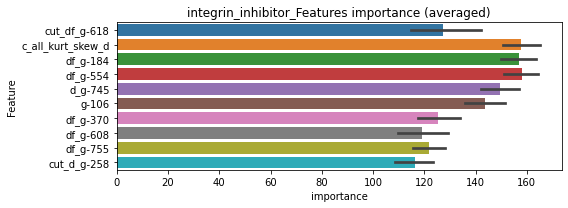

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000415966	valid_1's binary_logloss: 0.00236939
Early stopping, best iteration is:
[1032]	training's binary_logloss: 0.000412089	valid_1's binary_logloss: 0.00235635


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000422294	valid_1's binary_logloss: 0.00298806


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000525978	valid_1's binary_logloss: 0.0104695


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00041955	valid_1's binary_logloss: 0.00433642
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000422785	valid_1's binary_logloss: 0.00432892


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 integrin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00045391	valid_1's binary_logloss: 0.00462581


integrin_inhibitor logloss: 0.004954727188259101
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0010634	valid_1's binary_logloss: 0.0503535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00122993	valid_1's binary_logloss: 0.0377042
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000861136	valid_1's binary_logloss: 0.0278193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000757042	valid_1's binary_logloss: 0.0105405
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00102594	valid_1's binary_logloss: 0.0375189


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0088723, Threshold: 0.1290541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1290541, conf_0:0.09034, conf_1:0.16777
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_1: 0.1590541
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.1890541
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.2190541
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.2490541
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.2790541
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.3090541
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_7: 0.3390541
threshold: 0.3390541, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.0013073	valid_1's binary_logloss: 0.0338053
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000729299	valid_1's binary_logloss: 0.0193224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000668873	valid_1's binary_logloss: 0.0209523
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000659589	valid_1's binary_logloss: 0.0284654
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000945056	valid_1's binary_logloss: 0.0291787


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0430887, Threshold: 0.3390541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0092918 Vs.target_rate: 0.00386
Num_p_label: 37.0, Expected: 15.4, Threshold: 0.3390541, conf_0:0.27124, conf_1:0.40686
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.3690541
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_2: 0.3990541
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_3: 0.4290541
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_4: 0.4590541
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_5: 0.4890541
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_6: 0.5190541
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_7: 0.5490541
threshold: 0.5490541, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000628157	valid_1's binary_logloss: 0.0218826
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000729795	valid_1's binary_logloss: 0.0370337
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000666997	valid_1's binary_logloss: 0.0212267
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000697928	valid_1's binary_logloss: 0.0153408
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000653079	valid_1's binary_logloss: 0.0180842


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0385465, Threshold: 0.5490541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, Expected: 15.4, Threshold: 0.5490541, conf_0:0.49415, conf_1:0.60396
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_1: 0.5790541
threshold: 0.5790541, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


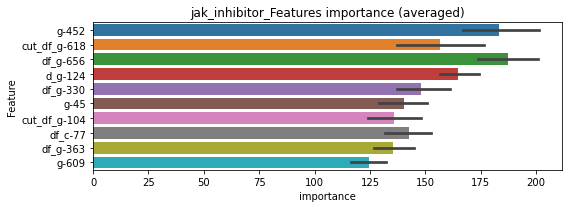

len(train_index) : 3024
len(valid_index) : 756
================================= fold 1/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3024
len(valid_index) : 756


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00101908	valid_1's binary_logloss: 0.0370644


================================= fold 2/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000850733	valid_1's binary_logloss: 0.0203892


len(train_index) : 3024
len(valid_index) : 756
================================= fold 3/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00095301	valid_1's binary_logloss: 0.0296072


len(train_index) : 3024
len(valid_index) : 756
================================= fold 4/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.00067579	valid_1's binary_logloss: 0.0153912


len(train_index) : 3024
len(valid_index) : 756
================================= fold 5/5 jak_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.0007451	valid_1's binary_logloss: 0.0231304


jak_inhibitor logloss: 0.025116471551013826


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0360017	valid_1's binary_logloss: 0.121265
[2000]	training's binary_logloss: 0.0165764	valid_1's binary_logloss: 0.106537
Early stopping, best iteration is:
[2187]	training's binary_logloss: 0.0150381	valid_1's binary_logloss: 0.105471
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0362569	valid_1's binary_logloss: 0.118832
[2000]	training's binary_logloss: 0.0166824	valid_1's binary_logloss: 0.105895
Early stopping, best iteration is:
[1987]	training's binary_logloss: 0.0168056	valid_1's binary_logloss: 0.105777
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0361054	valid_1's binary_logloss: 0.127568
Early stopping, best iteration is:
[1462]	training's binary_logloss: 0.0236554	valid_1's binary_logloss: 0.119423
Training until validation scores don't improve for 29 rounds
[1000]	training's b

1 / 3, AUC score:0.981, PR-AUC:0.962
y_Threshold: 0.0637482, Threshold: 0.1190130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 434 → Positive_corect_labels: 1289/7781
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.1190130, conf_0:0.08331, conf_1:0.15472
threshold: 0.1190130, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1289.0/7781, y_label_rate: 0.1656599
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.029346	valid_1's binary_logloss: 0.0933519
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.0161758	valid_1's binary_logloss: 0.0812272
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0295756	valid_1's binary_logloss: 0.0873005
[2000]	training's binary_logloss: 0.0136867	valid_1's binary_logloss: 0.0724058
Early stopping, best iteration is:
[2353]	training's binary_logloss: 0.0114479	valid_1's binary_logloss: 0.0699726
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0299551	valid_1's binary_logloss: 0.0792355
[2000]	training's binary_logloss: 0.0139093	valid_1's binary_logloss: 0.0632055
Early stopping, best iteration is:
[2562]	training's binary_logloss: 0.0106032	valid_1's binary_logloss: 0.0594808
Training until validation scores don't improve for 29 rounds
[1000]	train

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0880258, Threshold: 0.1190130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1239.0/7681
p_label_rate: 0.0143144 Vs.target_rate: 0.01146
Num_p_label: 57.0, Expected: 45.6, Threshold: 0.1190130, conf_0:0.09521, conf_1:0.14282
threshold: 0.1190130, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1239.0/7681, y_label_rate: 0.1613071
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0268867	valid_1's binary_logloss: 0.0700381
[2000]	training's binary_logloss: 0.0125547	valid_1's binary_logloss: 0.0554024
Early stopping, best iteration is:
[2901]	training's binary_logloss: 0.00841175	valid_1's binary_logloss: 0.0505546
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0266902	valid_1's binary_logloss: 0.0782271
[2000]	training's binary_logloss: 0.0124688	valid_1's binary_logloss: 0.0640818
Early stopping, best iteration is:
[2410]	training's binary_logloss: 0.0102204	valid_1's binary_logloss: 0.0612107
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262952	valid_1's binary_logloss: 0.0856651
[2000]	training's binary_logloss: 0.0122126	valid_1's binary_logloss: 0.0725467
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.0105528	valid_1's binary_logloss: 0

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0821354, Threshold: 0.1190130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 1212.0/7627
p_label_rate: 0.0130588 Vs.target_rate: 0.01146
Num_p_label: 52.0, Expected: 45.6, Threshold: 0.1190130, conf_0:0.10711, conf_1:0.13091
threshold: 0.1190130, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 1212.0/7627, y_label_rate: 0.1589091


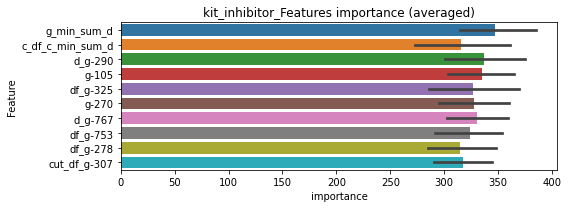

len(train_index) : 6101
len(valid_index) : 1526
================================= fold 1/5 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0464108	valid_1's binary_logloss: 0.0955849
[2000]	training's binary_logloss: 0.0222919	valid_1's binary_logloss: 0.0718705
[3000]	training's binary_logloss: 0.0144933	valid_1's binary_logloss: 0.0637842
Early stopping, best iteration is:
[3036]	training's binary_logloss: 0.0143108	valid_1's binary_logloss: 0.0635537


len(train_index) : 6101
len(valid_index) : 1526
================================= fold 2/5 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0465704	valid_1's binary_logloss: 0.0941956
[2000]	training's binary_logloss: 0.0225216	valid_1's binary_logloss: 0.0707411
Early stopping, best iteration is:
[2608]	training's binary_logloss: 0.0169351	valid_1's binary_logloss: 0.0649524


len(train_index) : 6102
len(valid_index) : 1525
================================= fold 3/5 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0472523	valid_1's binary_logloss: 0.0839422
[2000]	training's binary_logloss: 0.022741	valid_1's binary_logloss: 0.0593795
[3000]	training's binary_logloss: 0.0148341	valid_1's binary_logloss: 0.0509884
[4000]	training's binary_logloss: 0.0109766	valid_1's binary_logloss: 0.046797
[5000]	training's binary_logloss: 0.00870907	valid_1's binary_logloss: 0.0441706
[6000]	training's binary_logloss: 0.0072114	valid_1's binary_logloss: 0.0423609
Early stopping, best iteration is:
[6333]	training's binary_logloss: 0.00682275	valid_1's binary_logloss: 0.0417634


len(train_index) : 6102
len(valid_index) : 1525
================================= fold 4/5 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0472358	valid_1's binary_logloss: 0.0873559
[2000]	training's binary_logloss: 0.0227767	valid_1's binary_logloss: 0.0616989
[3000]	training's binary_logloss: 0.0148028	valid_1's binary_logloss: 0.0523267
[4000]	training's binary_logloss: 0.0109366	valid_1's binary_logloss: 0.0479328
Early stopping, best iteration is:
[4542]	training's binary_logloss: 0.00957988	valid_1's binary_logloss: 0.0460267


len(train_index) : 6102
len(valid_index) : 1525
================================= fold 5/5 kit_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0457428	valid_1's binary_logloss: 0.104801
[2000]	training's binary_logloss: 0.0222398	valid_1's binary_logloss: 0.0811741
Early stopping, best iteration is:
[2584]	training's binary_logloss: 0.016974	valid_1's binary_logloss: 0.0757706


kit_inhibitor logloss: 0.05841488917511025
kit_inhibitor is unpredictable(><)!
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000143566	valid_1's binary_logloss: 0.000189848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000142947	valid_1's binary_logloss: 0.000167413
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000140204	valid_1's binary_logloss: 0.00211991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000142591	valid_1's binary_logloss: 0.000166165
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004060, Threshold: 0.0011434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011434, conf_0:0.00080, conf_1:0.00149
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0311434
threshold: 0.0311434, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000143005	valid_1's binary_logloss: 0.000177502


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000137437	valid_1's binary_logloss: 0.000162779
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000136261	valid_1's binary_logloss: 0.000133942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00014367	valid_1's binary_logloss: 0.00159976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000136944	valid_1's binary_logloss: 0.000156467
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0625157, Threshold: 0.0311434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0311434, conf_0:0.02491, conf_1:0.03737
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0611434
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0911434
threshold: 0.0911434, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000136115	valid_1's binary_logloss: 0.000197211


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000137437	valid_1's binary_logloss: 0.000162779
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000136261	valid_1's binary_logloss: 0.000133942
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00014367	valid_1's binary_logloss: 0.00159976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000136944	valid_1's binary_logloss: 0.000156467
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0625157, Threshold: 0.0911434, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000136115	valid_1's binary_logloss: 0.000197211


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0911434, conf_0:0.08203, conf_1:0.10026
threshold: 0.0911434, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


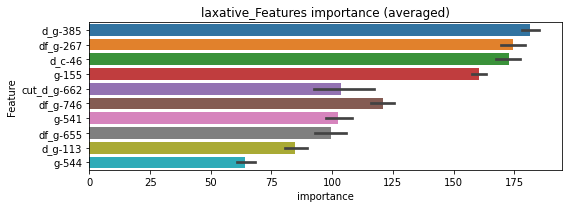

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 laxative=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139693	valid_1's binary_logloss: 0.000165593


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 laxative=================================


Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.000137297	valid_1's binary_logloss: 0.000162818
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140044	valid_1's binary_logloss: 0.000141954


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 laxative=================================


Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.00013679	valid_1's binary_logloss: 0.000138635
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00013846	valid_1's binary_logloss: 0.000844012


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 laxative=================================


Early stopping, best iteration is:
[1114]	training's binary_logloss: 0.000135512	valid_1's binary_logloss: 0.000838961
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140417	valid_1's binary_logloss: 0.000149389


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 laxative=================================


Early stopping, best iteration is:
[1146]	training's binary_logloss: 0.000137677	valid_1's binary_logloss: 0.000146448
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139828	valid_1's binary_logloss: 0.000220047


laxative logloss: 0.0003004575014910444


Early stopping, best iteration is:
[1301]	training's binary_logloss: 0.000135819	valid_1's binary_logloss: 0.000215112


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000152493	valid_1's binary_logloss: 0.000682014
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000146821	valid_1's binary_logloss: 0.000377724
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000149709	valid_1's binary_logloss: 0.00081642
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00015056	valid_1's binary_logloss: 0.000216896
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004748, Threshold: 0.0011316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011316, conf_0:0.00079, conf_1:0.00147
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311316
threshold: 0.0311316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000150741	valid_1's binary_logloss: 0.000173818


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000143325	valid_1's binary_logloss: 0.000230562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000142307	valid_1's binary_logloss: 0.000161294
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000141686	valid_1's binary_logloss: 0.00377417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000141712	valid_1's binary_logloss: 0.000167575
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174840, Threshold: 0.0311316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0311316, conf_0:0.02491, conf_1:0.03736
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0611316
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0911316
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1211316
threshold: 0.1211316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000143034	valid_1's binary_logloss: 0.000168242


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000143325	valid_1's binary_logloss: 0.000230562
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000142307	valid_1's binary_logloss: 0.000161294
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000141686	valid_1's binary_logloss: 0.00377417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000141712	valid_1's binary_logloss: 0.000167575
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174840, Threshold: 0.1211316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1211316, conf_0:0.10902, conf_1:0.13324
threshold: 0.1211316, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000143034	valid_1's binary_logloss: 0.000168242


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


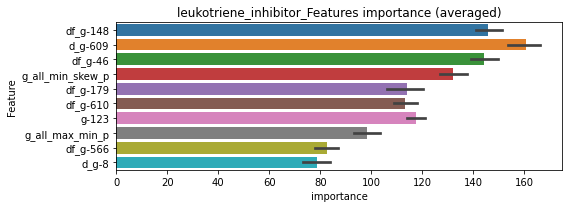

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000141996	valid_1's binary_logloss: 0.000193258
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000140981	valid_1's binary_logloss: 0.000192011


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143492	valid_1's binary_logloss: 0.000166447


len(train_index) : 3050
len(valid_index) : 762


Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000141208	valid_1's binary_logloss: 0.000163834


================================= fold 3/5 leukotriene_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142461	valid_1's binary_logloss: 0.00103779


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1118]	training's binary_logloss: 0.000140127	valid_1's binary_logloss: 0.00102531
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142409	valid_1's binary_logloss: 0.000182947


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.000140305	valid_1's binary_logloss: 0.000180341
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000142555	valid_1's binary_logloss: 0.000175454


leukotriene_inhibitor logloss: 0.0003466967922530234


Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.000139973	valid_1's binary_logloss: 0.00017234


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000883187	valid_1's binary_logloss: 0.0355317
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000782759	valid_1's binary_logloss: 0.0278775
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00155569	valid_1's binary_logloss: 0.0289249
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000568496	valid_1's binary_logloss: 0.00731403
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000591185	valid_1's binary_logloss: 0.0183644


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0052404, Threshold: 0.0118707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0118707, conf_0:0.00831, conf_1:0.01543
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0418707
threshold: 0.0418707, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000570667	valid_1's binary_logloss: 0.0165206
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000593003	valid_1's binary_logloss: 0.016216
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000544269	valid_1's binary_logloss: 0.0394134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000606648	valid_1's binary_logloss: 0.00844603
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000546646	valid_1's binary_logloss: 0.0162576


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0179936, Threshold: 0.0418707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0015068 Vs.target_rate: 0.00260
Num_p_label: 6.0, Expected: 10.4, Threshold: 0.0418707, conf_0:0.03350, conf_1:0.05024
threshold: 0.0418707, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000641644	valid_1's binary_logloss: 0.0183553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000721671	valid_1's binary_logloss: 0.0220516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000657943	valid_1's binary_logloss: 0.0201904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00072215	valid_1's binary_logloss: 0.0198663
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000582561	valid_1's binary_logloss: 0.0146797


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169432, Threshold: 0.0418707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0015068 Vs.target_rate: 0.00260
Num_p_label: 6.0, Expected: 10.4, Threshold: 0.0418707, conf_0:0.03768, conf_1:0.04606
threshold: 0.0418707, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


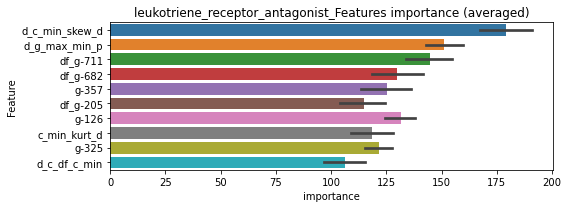

len(train_index) : 3034
len(valid_index) : 759
================================= fold 1/5 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 759
================================= fold 2/5 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00121957	valid_1's binary_logloss: 0.0192163
Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 759
================================= fold 3/5 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00100296	valid_1's binary_logloss: 0.0168087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00053613	valid_1's binary_logloss: 0.00982754


len(train_index) : 3035
len(valid_index) : 758
================================= fold 4/5 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3035
len(valid_index) : 758


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000744594	valid_1's binary_logloss: 0.0272189


================================= fold 5/5 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000567666	valid_1's binary_logloss: 0.0103264


leukotriene_receptor_antagonist logloss: 0.016678447332866993
lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000236446	valid_1's binary_logloss: 0.00494827
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000210018	valid_1's binary_logloss: 0.000349099
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000207946	valid_1's binary_logloss: 0.000563499
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000205696	valid_1's binary_logloss: 0.000466862
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008304, Threshold: 0.0017799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0017799, conf_0:0.00125, conf_1:0.00231
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0317799
threshold: 0.0317799, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00020461	valid_1's binary_logloss: 0.00181879


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000274924	valid_1's binary_logloss: 0.00490064
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000198542	valid_1's binary_logloss: 0.000329825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000199344	valid_1's binary_logloss: 0.000423686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000205385	valid_1's binary_logloss: 0.000461463
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316703, Threshold: 0.0317799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0317799, conf_0:0.02542, conf_1:0.03814
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0617799
threshold: 0.0617799, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000207401	valid_1's binary_logloss: 0.0013682


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000274924	valid_1's binary_logloss: 0.00490064
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000198542	valid_1's binary_logloss: 0.000329825
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000199344	valid_1's binary_logloss: 0.000423686
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000205385	valid_1's binary_logloss: 0.000461463
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316703, Threshold: 0.0617799, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.0617799, conf_0:0.05560, conf_1:0.06796
threshold: 0.0617799, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000207401	valid_1's binary_logloss: 0.0013682


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


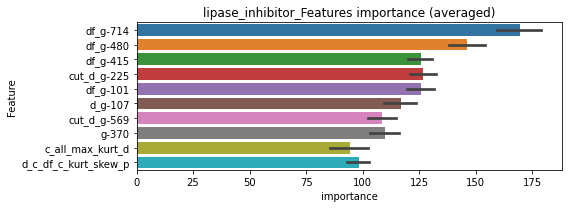

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 lipase_inhibitor=================================


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00028001	valid_1's binary_logloss: 0.0043086
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000200209	valid_1's binary_logloss: 0.000302442
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000200071	valid_1's binary_logloss: 0.000302206


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 lipase_inhibitor=================================


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000200513	valid_1's binary_logloss: 0.000332914
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 lipase_inhibitor=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000201492	valid_1's binary_logloss: 0.000331356
Training until validation scores don't improve for 29 rounds


lipase_inhibitor logloss: 0.0012459913553647187


Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000202094	valid_1's binary_logloss: 0.000953255


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000573931	valid_1's binary_logloss: 0.0110483
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000709615	valid_1's binary_logloss: 0.0150345
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000627146	valid_1's binary_logloss: 0.0199437
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.0005205	valid_1's binary_logloss: 0.00839349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000615489	valid_1's binary_logloss: 0.0283867


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0051717, Threshold: 0.0823359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0823359, conf_0:0.05764, conf_1:0.10704
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_1: 0.1123359
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1423359
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_3: 0.1723359
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_4: 0.2023359
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_5: 0.2323359
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_6: 0.2623359
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_7: 0.2923359
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_8: 0.3223359
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_9: 0.3523359
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_10: 0.3823359
threshold: 0.3823359, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000511748	valid_1's binary_logloss: 0.00970535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000628705	valid_1's binary_logloss: 0.0148288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000679652	valid_1's binary_logloss: 0.0204188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00051705	valid_1's binary_logloss: 0.00903449
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00054004	valid_1's binary_logloss: 0.0240116


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0264066, Threshold: 0.3823359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3823359, conf_0:0.30587, conf_1:0.45880
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_1: 0.4123359
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_2: 0.4423359
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_3: 0.4723359
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_4: 0.5023359
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_5: 0.5323359
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_6: 0.5623359
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.5923359
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_8: 0.6223359
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_9: 0.6523359
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_10: 0.6823359
threshold: 0.6823359, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000658379	valid_1's binary_logloss: 0.0226488
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000512267	valid_1's binary_logloss: 0.0110851
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000507963	valid_1's binary_logloss: 0.0105458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000602202	valid_1's binary_logloss: 0.018169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000610316	valid_1's binary_logloss: 0.0163844


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0239264, Threshold: 0.6823359, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0045203 Vs.target_rate: 0.00256
Num_p_label: 18.0, Expected: 10.2, Threshold: 0.6823359, conf_0:0.61410, conf_1:0.75057
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_1: 0.7123359
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_2: 0.7423359
threshold: 0.7423359, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


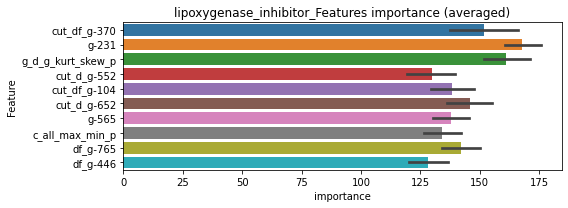

len(train_index) : 3035
len(valid_index) : 759
================================= fold 1/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.0107815


len(train_index) : 3035
len(valid_index) : 759
================================= fold 2/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000663605	valid_1's binary_logloss: 0.0222941


len(train_index) : 3035
len(valid_index) : 759
================================= fold 3/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000564818	valid_1's binary_logloss: 0.00716192


len(train_index) : 3035
len(valid_index) : 759
================================= fold 4/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000586901	valid_1's binary_logloss: 0.0149239


len(train_index) : 3036
len(valid_index) : 758
================================= fold 5/5 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000509116	valid_1's binary_logloss: 0.00853462
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000507315	valid_1's binary_logloss: 0.00851396


lipoxygenase_inhibitor logloss: 0.012737960421785191
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00016116	valid_1's binary_logloss: 0.00049697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000158564	valid_1's binary_logloss: 0.000363311
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000158674	valid_1's binary_logloss: 0.00177316
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000159195	valid_1's binary_logloss: 0.000199612
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004333, Threshold: 0.0020299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0020299, conf_0:0.00142, conf_1:0.00264
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0320299
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0620299
threshold: 0.0620299, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000158646	valid_1's binary_logloss: 0.000553176


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000141224	valid_1's binary_logloss: 0.000256289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000142282	valid_1's binary_logloss: 0.000145643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000139702	valid_1's binary_logloss: 0.000931924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000141982	valid_1's binary_logloss: 0.000168711
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0772335, Threshold: 0.0620299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, Expected: 1.0, Threshold: 0.0620299, conf_0:0.04962, conf_1:0.07444
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.0920299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1220299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1520299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1820299
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2120299
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_6: 0.2420299
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_7: 0.2720299
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_8: 0.3020299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3320299
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3620299


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000141177	valid_1's binary_logloss: 0.00138869


threshold: 0.3620299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000141224	valid_1's binary_logloss: 0.000256289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000142282	valid_1's binary_logloss: 0.000145643
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000139702	valid_1's binary_logloss: 0.000931924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000141982	valid_1's binary_logloss: 0.000168711
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0772335, Threshold: 0.3620299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3620299, conf_0:0.32583, conf_1:0.39823
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3920299
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4220299
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.4520299
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4820299
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5120299
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.5420299


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000141177	valid_1's binary_logloss: 0.00138869


threshold: 0.5420299, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


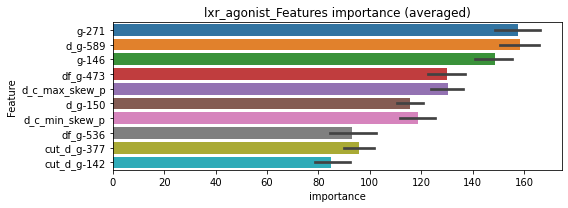

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000144564	valid_1's binary_logloss: 0.000197736
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.000143584	valid_1's binary_logloss: 0.000196699


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143905	valid_1's binary_logloss: 0.000155292
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000143285	valid_1's binary_logloss: 0.000154686


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143252	valid_1's binary_logloss: 0.000432865
Early stopping, best iteration is:
[1037]	training's binary_logloss: 0.000142658	valid_1's binary_logloss: 0.000432386


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 lxr_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143735	valid_1's binary_logloss: 0.000177703


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 lxr_agonist=================================


Early stopping, best iteration is:
[1088]	training's binary_logloss: 0.000142672	valid_1's binary_logloss: 0.000176311
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000143504	valid_1's binary_logloss: 0.000643148
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000143201	valid_1's binary_logloss: 0.000642148


lxr_agonist logloss: 0.00032037017452912666
mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000402591	valid_1's binary_logloss: 0.00716534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000394135	valid_1's binary_logloss: 0.00231403
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000400115	valid_1's binary_logloss: 0.00185974
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000383614	valid_1's binary_logloss: 0.00241872
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000381483	valid_1's binary_logloss: 0.00416825


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027022, Threshold: 0.0343240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0343240, conf_0:0.02403, conf_1:0.04462
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_1: 0.0643240
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_2: 0.0943240
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1243240
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_4: 0.1543240
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1843240
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2143240
threshold: 0.2143240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000376075	valid_1's binary_logloss: 0.00660052
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000383474	valid_1's binary_logloss: 0.00238903
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000376722	valid_1's binary_logloss: 0.0013005
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000379281	valid_1's binary_logloss: 0.00109088
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381359, Threshold: 0.2143240, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000386141	valid_1's binary_logloss: 0.00257291


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0075339 Vs.target_rate: 0.00130
Num_p_label: 30.0, Expected: 5.2, Threshold: 0.2143240, conf_0:0.17146, conf_1:0.25719
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_1: 0.2443240
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_2: 0.2743240
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_3: 0.3043240
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_4: 0.3343240
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_5: 0.3643240
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_6: 0.3943240
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_7: 0.4243240
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_8: 0.4543240
threshold: 0.4543240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000376075	valid_1's binary_logloss: 0.00660052
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000383474	valid_1's binary_logloss: 0.00238903
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000376722	valid_1's binary_logloss: 0.0013005
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000379281	valid_1's binary_logloss: 0.00109088
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381359, Threshold: 0.4543240, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000386141	valid_1's binary_logloss: 0.00257291


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00130
Num_p_label: 12.0, Expected: 5.2, Threshold: 0.4543240, conf_0:0.40889, conf_1:0.49976
threshold: 0.4543240, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


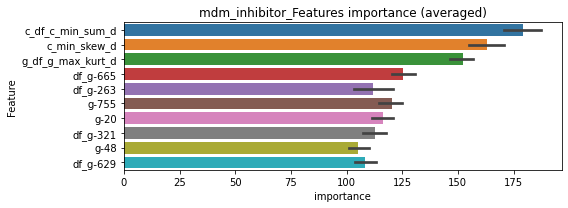

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000371531	valid_1's binary_logloss: 0.00507894


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000377562	valid_1's binary_logloss: 0.00167883


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.00037301	valid_1's binary_logloss: 0.00123906


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000384453	valid_1's binary_logloss: 0.00118184


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 mdm_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000386536	valid_1's binary_logloss: 0.00401042


mdm_inhibitor logloss: 0.002638304383143603
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000583616	valid_1's binary_logloss: 0.02117
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000628456	valid_1's binary_logloss: 0.0258768
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000600292	valid_1's binary_logloss: 0.0146353
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000552784	valid_1's binary_logloss: 0.00452984
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000645829	valid_1's binary_logloss: 0.0235859


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0055718, Threshold: 0.0205257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0205257, conf_0:0.01437, conf_1:0.02668
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0505257
threshold: 0.0505257, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000572587	valid_1's binary_logloss: 0.0226485
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000593198	valid_1's binary_logloss: 0.0221385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000677386	valid_1's binary_logloss: 0.0167477
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000570193	valid_1's binary_logloss: 0.00418895
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000656109	valid_1's binary_logloss: 0.0232016


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0264418, Threshold: 0.0505257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3791
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0505257, conf_0:0.04042, conf_1:0.06063
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0805257
threshold: 0.0805257, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00101387	valid_1's binary_logloss: 0.0361386
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000877555	valid_1's binary_logloss: 0.0208451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000546082	valid_1's binary_logloss: 0.0172158
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000564761	valid_1's binary_logloss: 0.0132848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000546818	valid_1's binary_logloss: 0.0095669


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0248769, Threshold: 0.0805257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0805257, conf_0:0.07247, conf_1:0.08858
threshold: 0.0805257, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


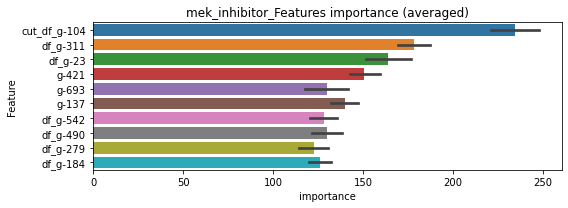

len(train_index) : 3028
len(valid_index) : 757
================================= fold 1/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000656665	valid_1's binary_logloss: 0.0146306


len(train_index) : 3028
len(valid_index) : 757
================================= fold 2/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000594235	valid_1's binary_logloss: 0.0132831


len(train_index) : 3028
len(valid_index) : 757
================================= fold 3/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000563879	valid_1's binary_logloss: 0.0214013
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000568322	valid_1's binary_logloss: 0.0213768


len(train_index) : 3028
len(valid_index) : 757
================================= fold 4/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000567595	valid_1's binary_logloss: 0.0123425
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000568295	valid_1's binary_logloss: 0.0123324


len(train_index) : 3028
len(valid_index) : 757
================================= fold 5/5 mek_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000636416	valid_1's binary_logloss: 0.014476


mek_inhibitor logloss: 0.015219792929799913
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000583561	valid_1's binary_logloss: 0.0134996
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000936837	valid_1's binary_logloss: 0.0315903
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000695368	valid_1's binary_logloss: 0.0313702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000970209	valid_1's binary_logloss: 0.0306203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000716851	valid_1's binary_logloss: 0.0295121


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0055520, Threshold: 0.0161398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0161398, conf_0:0.01130, conf_1:0.02098
Num_p_label: 4.0, Expected: 12.4, Adj_threshold_1: 0.0461398
threshold: 0.0461398, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000560159	valid_1's binary_logloss: 0.02349
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00102454	valid_1's binary_logloss: 0.0319857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000584742	valid_1's binary_logloss: 0.021004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000635117	valid_1's binary_logloss: 0.0224365
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000588956	valid_1's binary_logloss: 0.0141341


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0232833, Threshold: 0.0461398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0027624 Vs.target_rate: 0.00311
Num_p_label: 11.0, Expected: 12.4, Threshold: 0.0461398, conf_0:0.03691, conf_1:0.05537
threshold: 0.0461398, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000553987	valid_1's binary_logloss: 0.0185977
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000849974	valid_1's binary_logloss: 0.0292916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000806374	valid_1's binary_logloss: 0.0288329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000532501	valid_1's binary_logloss: 0.0111915
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000831215	valid_1's binary_logloss: 0.0279138


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0249252, Threshold: 0.0461398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0042692 Vs.target_rate: 0.00311
Num_p_label: 17.0, Expected: 12.4, Threshold: 0.0461398, conf_0:0.04153, conf_1:0.05075
threshold: 0.0461398, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3786, y_label_rate: 0.1708928


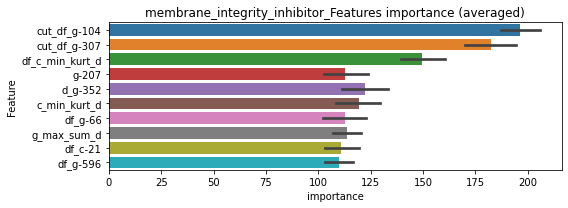

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00101959	valid_1's binary_logloss: 0.0243156
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000675643	valid_1's binary_logloss: 0.0250392


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000646248	valid_1's binary_logloss: 0.0302706


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000993325	valid_1's binary_logloss: 0.0256018
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000837661	valid_1's binary_logloss: 0.0190478


membrane_integrity_inhibitor logloss: 0.02485485216329451
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000325624	valid_1's binary_logloss: 0.00149936
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000337651	valid_1's binary_logloss: 0.0053995
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000335875	valid_1's binary_logloss: 0.000528251
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000331055	valid_1's binary_logloss: 0.00155783
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017259, Threshold: 0.0045865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0045865, conf_0:0.00321, conf_1:0.00596
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0345865


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000339692	valid_1's binary_logloss: 0.00922908


threshold: 0.0345865, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00032419	valid_1's binary_logloss: 0.00162003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000338657	valid_1's binary_logloss: 0.00458685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00032693	valid_1's binary_logloss: 0.000545326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000329653	valid_1's binary_logloss: 0.00124049
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149277, Threshold: 0.0345865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0345865, conf_0:0.02767, conf_1:0.04150


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000334478	valid_1's binary_logloss: 0.0100588


threshold: 0.0345865, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00032419	valid_1's binary_logloss: 0.00162003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000338657	valid_1's binary_logloss: 0.00458685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00032693	valid_1's binary_logloss: 0.000545326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000329653	valid_1's binary_logloss: 0.00124049
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149277, Threshold: 0.0345865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0345865, conf_0:0.03113, conf_1:0.03805


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000334478	valid_1's binary_logloss: 0.0100588


threshold: 0.0345865, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


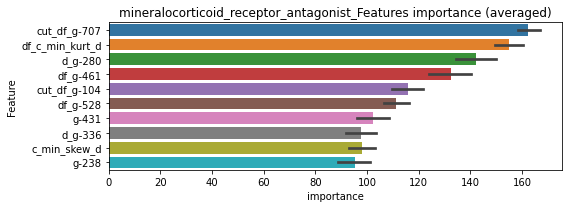

len(train_index) : 3044
len(valid_index) : 761
================================= fold 1/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000322578	valid_1's binary_logloss: 0.00142976


len(train_index) : 3044
len(valid_index) : 761
================================= fold 2/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00469781


len(train_index) : 3044
len(valid_index) : 761
================================= fold 3/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000318983	valid_1's binary_logloss: 0.000563852
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000318983	valid_1's binary_logloss: 0.000563852


len(train_index) : 3044
len(valid_index) : 761
================================= fold 4/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.0003208	valid_1's binary_logloss: 0.00106479


len(train_index) : 3044
len(valid_index) : 761
================================= fold 5/5 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


mineralocorticoid_receptor_antagonist logloss: 0.0030917140391019124


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00042371	valid_1's binary_logloss: 0.00770035


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000211527	valid_1's binary_logloss: 0.00148857
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000213465	valid_1's binary_logloss: 0.00136344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000220262	valid_1's binary_logloss: 0.00379301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000212302	valid_1's binary_logloss: 0.000502201
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008310, Threshold: 0.0017491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0017491, conf_0:0.00122, conf_1:0.00227
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0317491
threshold: 0.0317491, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000214818	valid_1's binary_logloss: 0.000278321


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000203907	valid_1's binary_logloss: 0.00201697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000203419	valid_1's binary_logloss: 0.00102819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000207861	valid_1's binary_logloss: 0.00392994
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000201465	valid_1's binary_logloss: 0.000609709
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131919, Threshold: 0.0317491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0317491, conf_0:0.02540, conf_1:0.03810


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000200094	valid_1's binary_logloss: 0.000258571


threshold: 0.0317491, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000203907	valid_1's binary_logloss: 0.00201697
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000203419	valid_1's binary_logloss: 0.00102819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000207861	valid_1's binary_logloss: 0.00392994
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000201465	valid_1's binary_logloss: 0.000609709
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131919, Threshold: 0.0317491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0317491, conf_0:0.02857, conf_1:0.03492


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000200094	valid_1's binary_logloss: 0.000258571


threshold: 0.0317491, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


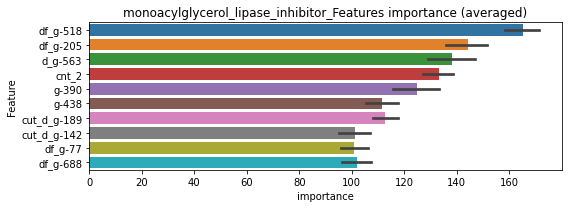

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[941]	training's binary_logloss: 0.000203152	valid_1's binary_logloss: 0.00132442
Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000203526	valid_1's binary_logloss: 0.000687277
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000221029	valid_1's binary_logloss: 0.00292739
Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000202982	valid_1's binary_logloss: 0.000366403
Training until validation scores don't improve for 29 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0011164041543253967


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00020247	valid_1's binary_logloss: 0.00027407


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253895	valid_1's binary_logloss: 0.0638846
[2000]	training's binary_logloss: 0.0119748	valid_1's binary_logloss: 0.0483317
[3000]	training's binary_logloss: 0.00783098	valid_1's binary_logloss: 0.0433304
Early stopping, best iteration is:
[3608]	training's binary_logloss: 0.0064705	valid_1's binary_logloss: 0.0412718
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0255191	valid_1's binary_logloss: 0.0686813
[2000]	training's binary_logloss: 0.0119978	valid_1's binary_logloss: 0.0535498
[3000]	training's binary_logloss: 0.00784456	valid_1's binary_logloss: 0.0478519
Early stopping, best iteration is:
[3783]	training's binary_logloss: 0.00618396	valid_1's binary_logloss: 0.0453356
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251037	valid_1's binary_logloss: 0.0740198
[2000]	training's binary

1 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0319610, Threshold: 0.0746782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0746782, conf_0:0.05227, conf_1:0.09708
Num_p_label: 12.0, Expected: 14.2, Adj_threshold_1: 0.1046782
threshold: 0.1046782, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 647.0/3780, y_label_rate: 0.1711640
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0236168	valid_1's binary_logloss: 0.0660158
[2000]	training's binary_logloss: 0.011204	valid_1's binary_logloss: 0.0518067
[3000]	training's binary_logloss: 0.0073483	valid_1's binary_logloss: 0.0466414
Early stopping, best iteration is:
[3099]	training's binary_logloss: 0.00711003	valid_1's binary_logloss: 0.0462353
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235038	valid_1's binary_logloss: 0.0657977
[2000]	training's binary_logloss: 0.011185	valid_1's binary_logloss: 0.0531579
Early stopping, best iteration is:
[2457]	training's binary_logloss: 0.00901129	valid_1's binary_logloss: 0.0507538
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235593	valid_1's binary_logloss: 0.077477
[2000]	training's binary_logloss: 0.0111148	valid_1's binary_logloss: 0.0642489
Early stopping, best iterati

2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0621519, Threshold: 0.1046782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3764
p_label_rate: 0.0082873 Vs.target_rate: 0.00357
Num_p_label: 33.0, Expected: 14.2, Threshold: 0.1046782, conf_0:0.08374, conf_1:0.12561
Num_p_label: 16.0, Expected: 14.2, Adj_threshold_1: 0.1346782
threshold: 0.1346782, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 639.0/3764, y_label_rate: 0.1697662
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.022451	valid_1's binary_logloss: 0.0663156
[2000]	training's binary_logloss: 0.0107071	valid_1's binary_logloss: 0.0540334
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.0101586	valid_1's binary_logloss: 0.0535197
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0230162	valid_1's binary_logloss: 0.0522091
[2000]	training's binary_logloss: 0.0108745	valid_1's binary_logloss: 0.0374308
[3000]	training's binary_logloss: 0.00713777	valid_1's binary_logloss: 0.0320002
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00590222	valid_1's binary_logloss: 0.0301047
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0222039	valid_1's binary_logloss: 0.0770656
[2000]	training's binary_logloss: 0.0105897	valid_1's binary_logloss: 0.064814
Early stopping, best iterat

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0639673, Threshold: 0.1346782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 633.0/3752
p_label_rate: 0.0015068 Vs.target_rate: 0.00357
Num_p_label: 6.0, Expected: 14.2, Threshold: 0.1346782, conf_0:0.12121, conf_1:0.14815
threshold: 0.1346782, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 633.0/3752, y_label_rate: 0.1687100


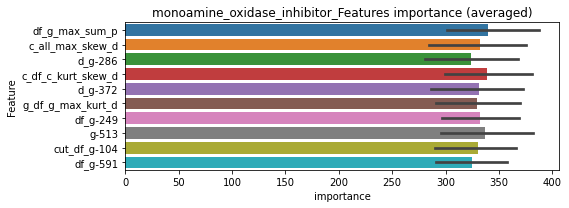

len(train_index) : 3001
len(valid_index) : 751
================================= fold 1/5 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0410387	valid_1's binary_logloss: 0.0788996
[2000]	training's binary_logloss: 0.0202759	valid_1's binary_logloss: 0.0582271
[3000]	training's binary_logloss: 0.0133741	valid_1's binary_logloss: 0.0508528
Early stopping, best iteration is:
[3326]	training's binary_logloss: 0.0120287	valid_1's binary_logloss: 0.0490289


len(train_index) : 3001
len(valid_index) : 751
================================= fold 2/5 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0407689	valid_1's binary_logloss: 0.0765036
[2000]	training's binary_logloss: 0.020277	valid_1's binary_logloss: 0.0553076
[3000]	training's binary_logloss: 0.013372	valid_1's binary_logloss: 0.047131
[4000]	training's binary_logloss: 0.00996523	valid_1's binary_logloss: 0.0429988
[5000]	training's binary_logloss: 0.00797627	valid_1's binary_logloss: 0.0404934
Early stopping, best iteration is:
[5166]	training's binary_logloss: 0.00771155	valid_1's binary_logloss: 0.0400472


len(train_index) : 3002
len(valid_index) : 750
================================= fold 3/5 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0395434	valid_1's binary_logloss: 0.0897758
[2000]	training's binary_logloss: 0.019661	valid_1's binary_logloss: 0.0711449
Early stopping, best iteration is:
[2943]	training's binary_logloss: 0.0132301	valid_1's binary_logloss: 0.0647623


len(train_index) : 3002
len(valid_index) : 750
================================= fold 4/5 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.041931	valid_1's binary_logloss: 0.0620593
[2000]	training's binary_logloss: 0.0208401	valid_1's binary_logloss: 0.0413151
[3000]	training's binary_logloss: 0.0137663	valid_1's binary_logloss: 0.0338613
[4000]	training's binary_logloss: 0.0102672	valid_1's binary_logloss: 0.0299913
[5000]	training's binary_logloss: 0.00820586	valid_1's binary_logloss: 0.0276659
[6000]	training's binary_logloss: 0.00684571	valid_1's binary_logloss: 0.0259988
[7000]	training's binary_logloss: 0.00588986	valid_1's binary_logloss: 0.0248061
Early stopping, best iteration is:
[7424]	training's binary_logloss: 0.0055626	valid_1's binary_logloss: 0.0243594


len(train_index) : 3002
len(valid_index) : 750
================================= fold 5/5 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0416819	valid_1's binary_logloss: 0.0733945
[2000]	training's binary_logloss: 0.0207461	valid_1's binary_logloss: 0.0517249
[3000]	training's binary_logloss: 0.0136567	valid_1's binary_logloss: 0.0442311
[4000]	training's binary_logloss: 0.0101911	valid_1's binary_logloss: 0.0405627
[5000]	training's binary_logloss: 0.00813006	valid_1's binary_logloss: 0.0378872
[6000]	training's binary_logloss: 0.00676604	valid_1's binary_logloss: 0.0361541
Early stopping, best iteration is:
[6876]	training's binary_logloss: 0.00590879	valid_1's binary_logloss: 0.0349982


monoamine_oxidase_inhibitor logloss: 0.04264020783723039
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000289176	valid_1's binary_logloss: 0.000815951
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00108623
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000288328	valid_1's binary_logloss: 0.00152891
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000294245	valid_1's binary_logloss: 0.005184
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014542, Threshold: 0.0138075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0138075, conf_0:0.00967, conf_1:0.01795
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0438075
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0738075
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1038075


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290617	valid_1's binary_logloss: 0.00108043


Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1338075
threshold: 0.1338075, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000279677	valid_1's binary_logloss: 0.000729698
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000278759	valid_1's binary_logloss: 0.0017589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000280645	valid_1's binary_logloss: 0.00174116
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000286837	valid_1's binary_logloss: 0.00572707
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0288854, Threshold: 0.1338075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0067805 Vs.target_rate: 0.00076
Num_p_label: 27.0, Expected: 3.0, Threshold: 0.1338075, conf_0:0.10705, conf_1:0.16057
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.1638075
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_2: 0.1938075
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.2238075
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.2538075
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_5: 0.2838075


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277263	valid_1's binary_logloss: 0.000949782


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3138075
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.3438075
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.3738075
threshold: 0.3738075, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000279677	valid_1's binary_logloss: 0.000729698
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000278759	valid_1's binary_logloss: 0.0017589
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000280645	valid_1's binary_logloss: 0.00174116
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000286837	valid_1's binary_logloss: 0.00572707
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0288854, Threshold: 0.3738075, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3738075, conf_0:0.33643, conf_1:0.41119


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277263	valid_1's binary_logloss: 0.000949782


threshold: 0.3738075, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


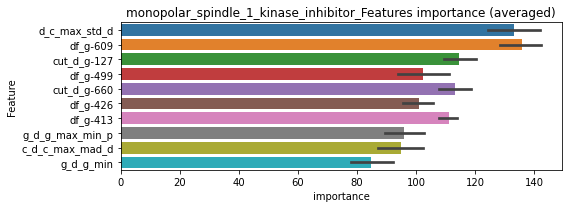

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000280132	valid_1's binary_logloss: 0.000603735


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000281844	valid_1's binary_logloss: 0.00139145


================================= fold 3/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000282893	valid_1's binary_logloss: 0.000981588


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000281259	valid_1's binary_logloss: 0.00353917


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000279905	valid_1's binary_logloss: 0.000670727


monopolar_spindle_1_kinase_inhibitor logloss: 0.001436999803483568


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.041531	valid_1's binary_logloss: 0.14812
Early stopping, best iteration is:
[1843]	training's binary_logloss: 0.0216175	valid_1's binary_logloss: 0.129365
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0425973	valid_1's binary_logloss: 0.127618
[2000]	training's binary_logloss: 0.0202426	valid_1's binary_logloss: 0.104431
Early stopping, best iteration is:
[2730]	training's binary_logloss: 0.014487	valid_1's binary_logloss: 0.0982889
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0430381	valid_1's binary_logloss: 0.111906
[2000]	training's binary_logloss: 0.0204543	valid_1's binary_logloss: 0.0885638
[3000]	training's binary_logloss: 0.0132742	valid_1's binary_logloss: 0.0807443
Early stopping, best iteration is:
[3237]	training's binary_logloss: 0.0122609	valid_1's binary_logloss: 0.0796285


1 / 3, AUC score:0.975, PR-AUC:0.958
y_Threshold: 0.0722026, Threshold: 0.1594378, pos_neg_ratio: 0.8000000
Remove_noisy_data: 180 → Positive_corect_labels: 509/3086
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1594378, conf_0:0.11161, conf_1:0.20727
Num_p_label: 23.0, Expected: 21.7, Adj_threshold_1: 0.1894378
threshold: 0.1894378, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 509.0/3086, y_label_rate: 0.1649384
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0351985	valid_1's binary_logloss: 0.128162
[2000]	training's binary_logloss: 0.0166579	valid_1's binary_logloss: 0.10853
Early stopping, best iteration is:
[2529]	training's binary_logloss: 0.0129661	valid_1's binary_logloss: 0.103971
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0353388	valid_1's binary_logloss: 0.100864
[2000]	training's binary_logloss: 0.0168954	valid_1's binary_logloss: 0.0793467
[3000]	training's binary_logloss: 0.0109879	valid_1's binary_logloss: 0.071492
Early stopping, best iteration is:
[3621]	training's binary_logloss: 0.00906539	valid_1's binary_logloss: 0.0689099
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0351153	valid_1's binary_logloss: 0.104995
[2000]	training's binary_logloss: 0.0166743	valid_1's binary_logloss: 0.0840631
[3000]	training's binary_logloss:

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0997933, Threshold: 0.1894378, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 492.0/3052
p_label_rate: 0.0095429 Vs.target_rate: 0.00546
Num_p_label: 38.0, Expected: 21.7, Threshold: 0.1894378, conf_0:0.15155, conf_1:0.22733
Num_p_label: 27.0, Expected: 21.7, Adj_threshold_1: 0.2194378
threshold: 0.2194378, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 492.0/3052, y_label_rate: 0.1612058
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0336166	valid_1's binary_logloss: 0.0979277
[2000]	training's binary_logloss: 0.016056	valid_1's binary_logloss: 0.0712435
[3000]	training's binary_logloss: 0.0104498	valid_1's binary_logloss: 0.0609096
[4000]	training's binary_logloss: 0.00777476	valid_1's binary_logloss: 0.0554993
[5000]	training's binary_logloss: 0.00622939	valid_1's binary_logloss: 0.0523268
Early stopping, best iteration is:
[5286]	training's binary_logloss: 0.00589594	valid_1's binary_logloss: 0.0514655
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0331086	valid_1's binary_logloss: 0.108387
[2000]	training's binary_logloss: 0.0158276	valid_1's binary_logloss: 0.0911698
Early stopping, best iteration is:
[2347]	training's binary_logloss: 0.0133451	valid_1's binary_logloss: 0.0886242
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_l

3 / 3, AUC score:0.995, PR-AUC:0.992
y_Threshold: 0.1097380, Threshold: 0.2194378, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 478.0/3024
p_label_rate: 0.0085384 Vs.target_rate: 0.00546
Num_p_label: 34.0, Expected: 21.7, Threshold: 0.2194378, conf_0:0.19749, conf_1:0.24138
Num_p_label: 22.0, Expected: 21.7, Adj_threshold_1: 0.2494378
threshold: 0.2494378, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 478.0/3024, y_label_rate: 0.1580688


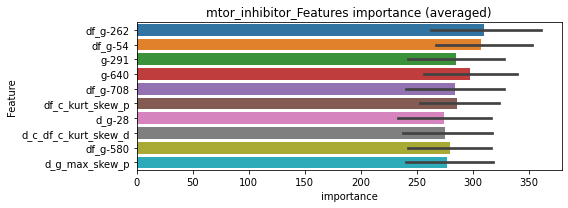

len(train_index) : 2419
len(valid_index) : 605
================================= fold 1/5 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0586341	valid_1's binary_logloss: 0.122866
[2000]	training's binary_logloss: 0.0291253	valid_1's binary_logloss: 0.0889585
[3000]	training's binary_logloss: 0.0192007	valid_1's binary_logloss: 0.0755655
[4000]	training's binary_logloss: 0.0142861	valid_1's binary_logloss: 0.0681643
[5000]	training's binary_logloss: 0.0114024	valid_1's binary_logloss: 0.0634107
Early stopping, best iteration is:
[5163]	training's binary_logloss: 0.0110347	valid_1's binary_logloss: 0.0626998


len(train_index) : 2419
len(valid_index) : 605
================================= fold 2/5 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0601469	valid_1's binary_logloss: 0.120743
[2000]	training's binary_logloss: 0.029784	valid_1's binary_logloss: 0.0816268
[3000]	training's binary_logloss: 0.0195972	valid_1's binary_logloss: 0.0671781
[4000]	training's binary_logloss: 0.0145372	valid_1's binary_logloss: 0.0596999
[5000]	training's binary_logloss: 0.0115997	valid_1's binary_logloss: 0.0544654
[6000]	training's binary_logloss: 0.00966311	valid_1's binary_logloss: 0.0511738
[7000]	training's binary_logloss: 0.00829664	valid_1's binary_logloss: 0.0487829
Early stopping, best iteration is:
[7258]	training's binary_logloss: 0.00800482	valid_1's binary_logloss: 0.048236


len(train_index) : 2419
len(valid_index) : 605
================================= fold 3/5 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0593292	valid_1's binary_logloss: 0.111462
[2000]	training's binary_logloss: 0.0293677	valid_1's binary_logloss: 0.0819265
[3000]	training's binary_logloss: 0.0192984	valid_1's binary_logloss: 0.0718556
Early stopping, best iteration is:
[3070]	training's binary_logloss: 0.0188304	valid_1's binary_logloss: 0.0711772


len(train_index) : 2419
len(valid_index) : 605
================================= fold 4/5 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0599054	valid_1's binary_logloss: 0.106279
[2000]	training's binary_logloss: 0.0297316	valid_1's binary_logloss: 0.0726461
[3000]	training's binary_logloss: 0.0195477	valid_1's binary_logloss: 0.0604288
[4000]	training's binary_logloss: 0.0145318	valid_1's binary_logloss: 0.0538039
[5000]	training's binary_logloss: 0.0116064	valid_1's binary_logloss: 0.0498223
[6000]	training's binary_logloss: 0.00967191	valid_1's binary_logloss: 0.0469533
[7000]	training's binary_logloss: 0.0083023	valid_1's binary_logloss: 0.0447748
[8000]	training's binary_logloss: 0.00728384	valid_1's binary_logloss: 0.0431588
Early stopping, best iteration is:
[8791]	training's binary_logloss: 0.00664338	valid_1's binary_logloss: 0.042167


len(train_index) : 2420
len(valid_index) : 604
================================= fold 5/5 mtor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0580309	valid_1's binary_logloss: 0.134431
[2000]	training's binary_logloss: 0.0288351	valid_1's binary_logloss: 0.103882
[3000]	training's binary_logloss: 0.018945	valid_1's binary_logloss: 0.0923517
Early stopping, best iteration is:
[3787]	training's binary_logloss: 0.0149069	valid_1's binary_logloss: 0.0875426


mtor_inhibitor logloss: 0.062356197058535186
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000496281	valid_1's binary_logloss: 0.0125854
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000456852	valid_1's binary_logloss: 0.0045252
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000457408	valid_1's binary_logloss: 0.00806652
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000472445	valid_1's binary_logloss: 0.00259673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000589776	valid_1's binary_logloss: 0.0169911


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036345, Threshold: 0.0942062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0942062, conf_0:0.06594, conf_1:0.12247
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1242062
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_2: 0.1542062
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1842062
threshold: 0.1842062, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000502929	valid_1's binary_logloss: 0.0114436
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000460088	valid_1's binary_logloss: 0.00412145
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000477227	valid_1's binary_logloss: 0.00750671
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000437704	valid_1's binary_logloss: 0.00189059
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000509333	valid_1's binary_logloss: 0.0154319


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0796325, Threshold: 0.1842062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0170768 Vs.target_rate: 0.00202
Num_p_label: 68.0, Expected: 8.0, Threshold: 0.1842062, conf_0:0.14736, conf_1:0.22105
Num_p_label: 66.0, Expected: 8.0, Adj_threshold_1: 0.2142062
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_2: 0.2442062
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_3: 0.2742062
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_4: 0.3042062
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_5: 0.3342062
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_6: 0.3642062
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_7: 0.3942062
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_8: 0.4242062
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_9: 0.4542062
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_10: 0.4842062
threshold: 0.4842062, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_la

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000447342	valid_1's binary_logloss: 0.00664114
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00045913	valid_1's binary_logloss: 0.00554892
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000435232	valid_1's binary_logloss: 0.00439085
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0004498	valid_1's binary_logloss: 0.00233203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000475105	valid_1's binary_logloss: 0.0162606


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0607796, Threshold: 0.4842062, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0105475 Vs.target_rate: 0.00202
Num_p_label: 42.0, Expected: 8.0, Threshold: 0.4842062, conf_0:0.43579, conf_1:0.53263
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.5142062
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_2: 0.5442062
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.5742062
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_4: 0.6042062
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.6342062
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_6: 0.6642062
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_7: 0.6942062
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7242062
threshold: 0.7242062, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


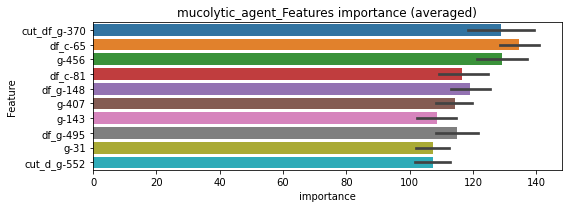

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000455082	valid_1's binary_logloss: 0.00849621


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000438097	valid_1's binary_logloss: 0.00255021
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000438097	valid_1's binary_logloss: 0.00255021


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000440107	valid_1's binary_logloss: 0.00616832


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000441228	valid_1's binary_logloss: 0.00322182
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000440499	valid_1's binary_logloss: 0.00322027


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 mucolytic_agent=================================


Training until validation scores don't improve for 29 rounds


mucolytic_agent logloss: 0.006242959664790942


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000655464	valid_1's binary_logloss: 0.0107815


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000434337	valid_1's binary_logloss: 0.00939308
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000422574	valid_1's binary_logloss: 0.00843137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000422718	valid_1's binary_logloss: 0.00330919
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000417606	valid_1's binary_logloss: 0.00358506
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000433021	valid_1's binary_logloss: 0.0107494


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026278, Threshold: 0.0132602, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132602, conf_0:0.00928, conf_1:0.01724
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432602
threshold: 0.0432602, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000553768	valid_1's binary_logloss: 0.00954691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000392395	valid_1's binary_logloss: 0.00889577
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000406488	valid_1's binary_logloss: 0.00318479
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00040241	valid_1's binary_logloss: 0.00402998
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0172270, Threshold: 0.0432602, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000453861	valid_1's binary_logloss: 0.00919616


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00155
Num_p_label: 20.0, Expected: 6.2, Threshold: 0.0432602, conf_0:0.03461, conf_1:0.05191
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_1: 0.0732602
threshold: 0.0732602, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000553768	valid_1's binary_logloss: 0.00954691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000392395	valid_1's binary_logloss: 0.00889577
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000406488	valid_1's binary_logloss: 0.00318479
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00040241	valid_1's binary_logloss: 0.00402998
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0172270, Threshold: 0.0732602, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000453861	valid_1's binary_logloss: 0.00919616


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00155
Num_p_label: 8.0, Expected: 6.2, Threshold: 0.0732602, conf_0:0.06593, conf_1:0.08059
threshold: 0.0732602, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


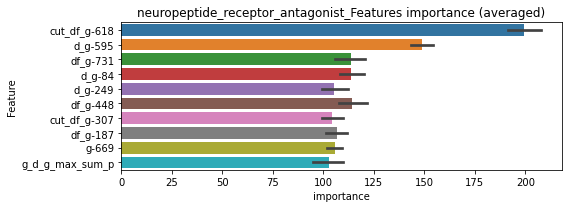

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000477337	valid_1's binary_logloss: 0.00948924
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000429796	valid_1's binary_logloss: 0.00780441


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000616314	valid_1's binary_logloss: 0.00467567
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000426211	valid_1's binary_logloss: 0.00349887


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000448051	valid_1's binary_logloss: 0.00849538


neuropeptide_receptor_antagonist logloss: 0.006793132474621361


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10338
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10338


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0737734	valid_1's binary_logloss: 0.232791
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0445934	valid_1's binary_logloss: 0.222863
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0722147	valid_1's binary_logloss: 0.249067
Early stopping, best iteration is:
[1248]	training's binary_logloss: 0.0567095	valid_1's binary_logloss: 0.245028
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0742782	valid_1's binary_logloss: 0.228153
Early stopping, best iteration is:
[1749]	training's binary_logloss: 0.0400229	valid_1's binary_logloss: 0.215182
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.0780635	valid_1's binary_logloss: 0.255625
Training until validation scores don't improve for 29 rounds
[10

1 / 3, AUC score:0.892, PR-AUC:0.819
y_Threshold: 0.1217707, Threshold: 0.2412779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1418 → Positive_corect_labels: 1565/10987
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2412779, conf_0:0.16889, conf_1:0.31366
threshold: 0.2412779, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1565.0/10987, y_label_rate: 0.1424411
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0393186	valid_1's binary_logloss: 0.123724
[2000]	training's binary_logloss: 0.0178036	valid_1's binary_logloss: 0.105448
Early stopping, best iteration is:
[2160]	training's binary_logloss: 0.0162901	valid_1's binary_logloss: 0.104078
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0396531	valid_1's binary_logloss: 0.12141
[2000]	training's binary_logloss: 0.0179782	valid_1's binary_logloss: 0.102592
Early stopping, best iteration is:
[2049]	training's binary_logloss: 0.0174908	valid_1's binary_logloss: 0.101894
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0396204	valid_1's binary_logloss: 0.117218
[2000]	training's binary_logloss: 0.0179148	valid_1's binary_logloss: 0.0983259
Early stopping, best iteration is:
[2301]	training's binary_logloss: 0.0152675	valid_1's binary_logloss: 0.0961999


2 / 3, AUC score:0.989, PR-AUC:0.968
y_Threshold: 0.1055629, Threshold: 0.2412779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 276 → Positive_corect_labels: 1427.0/10711
p_label_rate: 0.0082873 Vs.target_rate: 0.03494
Num_p_label: 33.0, Expected: 139.1, Threshold: 0.2412779, conf_0:0.19302, conf_1:0.28953
threshold: 0.2412779, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1427.0/10711, y_label_rate: 0.1332275
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0329108	valid_1's binary_logloss: 0.0946133
[2000]	training's binary_logloss: 0.0149108	valid_1's binary_logloss: 0.0786484
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0140445	valid_1's binary_logloss: 0.0775863
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0324977	valid_1's binary_logloss: 0.105449
Early stopping, best iteration is:
[1263]	training's binary_logloss: 0.0249121	valid_1's binary_logloss: 0.0981678
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0320385	valid_1's binary_logloss: 0.11484
Early stopping, best iteration is:
[1763]	training's binary_logloss: 0.016763	valid_1's binary_logloss: 0.102738
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0319595	valid_1's binary_logloss: 0.115911
Early stopping, b

3 / 3, AUC score:0.988, PR-AUC:0.974
y_Threshold: 0.1072484, Threshold: 0.2412779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 184 → Positive_corect_labels: 1335.0/10527
p_label_rate: 0.0087896 Vs.target_rate: 0.03494
Num_p_label: 35.0, Expected: 139.1, Threshold: 0.2412779, conf_0:0.21715, conf_1:0.26541
threshold: 0.2412779, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1335.0/10527, y_label_rate: 0.1268168


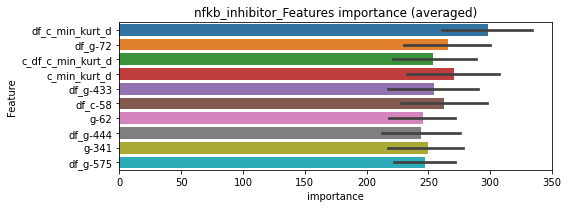

len(train_index) : 8421
len(valid_index) : 2106
================================= fold 1/5 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0514969	valid_1's binary_logloss: 0.0945721
[2000]	training's binary_logloss: 0.0249591	valid_1's binary_logloss: 0.0674638
[3000]	training's binary_logloss: 0.0162262	valid_1's binary_logloss: 0.0575595
Early stopping, best iteration is:
[3566]	training's binary_logloss: 0.0134772	valid_1's binary_logloss: 0.0543081


len(train_index) : 8421
len(valid_index) : 2106
================================= fold 2/5 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.050764	valid_1's binary_logloss: 0.100821
[2000]	training's binary_logloss: 0.0246433	valid_1's binary_logloss: 0.0749037
[3000]	training's binary_logloss: 0.0159176	valid_1's binary_logloss: 0.0652632
[4000]	training's binary_logloss: 0.0117315	valid_1's binary_logloss: 0.0602567
Early stopping, best iteration is:
[4750]	training's binary_logloss: 0.00979761	valid_1's binary_logloss: 0.058151


len(train_index) : 8422
len(valid_index) : 2105
================================= fold 3/5 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0505489	valid_1's binary_logloss: 0.110933
[2000]	training's binary_logloss: 0.0245155	valid_1's binary_logloss: 0.0860316
Early stopping, best iteration is:
[2874]	training's binary_logloss: 0.0165952	valid_1's binary_logloss: 0.0778283


len(train_index) : 8422
len(valid_index) : 2105
================================= fold 4/5 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0504228	valid_1's binary_logloss: 0.110022
[2000]	training's binary_logloss: 0.0244619	valid_1's binary_logloss: 0.0873013
Early stopping, best iteration is:
[2683]	training's binary_logloss: 0.0178383	valid_1's binary_logloss: 0.0813988


len(train_index) : 8422
len(valid_index) : 2105
================================= fold 5/5 nfkb_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0500811	valid_1's binary_logloss: 0.112677
[2000]	training's binary_logloss: 0.024251	valid_1's binary_logloss: 0.0870466
[3000]	training's binary_logloss: 0.0156971	valid_1's binary_logloss: 0.0778968
Early stopping, best iteration is:
[3049]	training's binary_logloss: 0.0154232	valid_1's binary_logloss: 0.0774003


nfkb_inhibitor logloss: 0.06981472640526777
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000227952	valid_1's binary_logloss: 0.00245902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000226744	valid_1's binary_logloss: 0.000908861
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000226932	valid_1's binary_logloss: 0.0008374
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000226194	valid_1's binary_logloss: 0.000397922
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000226409	valid_1's binary_logloss: 0.000621607


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008317, Threshold: 0.0046414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0046414, conf_0:0.00325, conf_1:0.00603
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0346414
threshold: 0.0346414, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000224104	valid_1's binary_logloss: 0.00254144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000222969	valid_1's binary_logloss: 0.000694769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000216932	valid_1's binary_logloss: 0.000728866
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221512	valid_1's binary_logloss: 0.000314668
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428292, Threshold: 0.0346414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0346414, conf_0:0.02771, conf_1:0.04157
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0646414
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0946414


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221528	valid_1's binary_logloss: 0.000838778


threshold: 0.0946414, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000224104	valid_1's binary_logloss: 0.00254144
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000222969	valid_1's binary_logloss: 0.000694769
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000216932	valid_1's binary_logloss: 0.000728866
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221512	valid_1's binary_logloss: 0.000314668
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428292, Threshold: 0.0946414, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0946414, conf_0:0.08518, conf_1:0.10411


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000221528	valid_1's binary_logloss: 0.000838778


threshold: 0.0946414, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


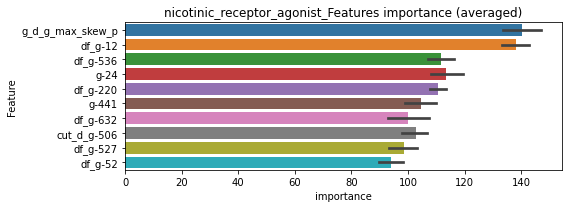

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000226356	valid_1's binary_logloss: 0.000887719
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763


Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000223954	valid_1's binary_logloss: 0.000386715


================================= fold 3/5 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000219951	valid_1's binary_logloss: 0.000536825
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000219728	valid_1's binary_logloss: 0.000536686


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000223774	valid_1's binary_logloss: 0.000376548
Training until validation scores don't improve for 29 rounds


nicotinic_receptor_agonist logloss: 0.0005397105411440912


Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000224181	valid_1's binary_logloss: 0.000510633


nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000356288	valid_1's binary_logloss: 0.0055417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000347141	valid_1's binary_logloss: 0.00272087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000349084	valid_1's binary_logloss: 0.00299571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000361897	valid_1's binary_logloss: 0.00164746
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000352934	valid_1's binary_logloss: 0.00143926


y_Threshold: 0.0026388, Threshold: 0.0350258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0350258, conf_0:0.02452, conf_1:0.04553
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0650258
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_2: 0.0950258
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_3: 0.1250258
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1550258
threshold: 0.1550258, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000339011	valid_1's binary_logloss: 0.00598108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000327772	valid_1's binary_logloss: 0.00245225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000325645	valid_1's binary_logloss: 0.00216918
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000342058	valid_1's binary_logloss: 0.00156093
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762953, Threshold: 0.1550258, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000328498	valid_1's binary_logloss: 0.000942207


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.1550258, conf_0:0.12402, conf_1:0.18603
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_1: 0.1850258
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_2: 0.2150258
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_3: 0.2450258
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_4: 0.2750258
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.3050258
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_6: 0.3350258
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_7: 0.3650258
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.3950258
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4250258
threshold: 0.4250258, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000339011	valid_1's binary_logloss: 0.00598108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000327772	valid_1's binary_logloss: 0.00245225
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000325645	valid_1's binary_logloss: 0.00216918
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000342058	valid_1's binary_logloss: 0.00156093
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762953, Threshold: 0.4250258, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000328498	valid_1's binary_logloss: 0.000942207


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4250258, conf_0:0.38252, conf_1:0.46753
threshold: 0.4250258, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


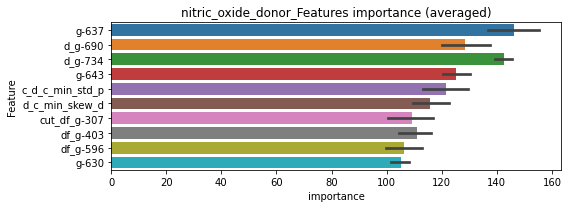

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000357718	valid_1's binary_logloss: 0.00589163


================================= fold 2/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000340897	valid_1's binary_logloss: 0.00141325


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000331576	valid_1's binary_logloss: 0.00254678


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000344901	valid_1's binary_logloss: 0.00143004


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 nitric_oxide_donor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000333709	valid_1's binary_logloss: 0.00100423


nitric_oxide_donor logloss: 0.002458534661598513
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000375403	valid_1's binary_logloss: 0.00421049
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000354116	valid_1's binary_logloss: 0.00238879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000340178	valid_1's binary_logloss: 0.00686925
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000338745	valid_1's binary_logloss: 0.00108583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000336409	valid_1's binary_logloss: 0.00133402


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020568, Threshold: 0.0070902, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0070902, conf_0:0.00496, conf_1:0.00922
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_1: 0.0370902
threshold: 0.0370902, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000353004	valid_1's binary_logloss: 0.00406949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000329365	valid_1's binary_logloss: 0.00154503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000322613	valid_1's binary_logloss: 0.00516862
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00032919	valid_1's binary_logloss: 0.00122784
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253074, Threshold: 0.0370902, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000336867	valid_1's binary_logloss: 0.00105513


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00122
Num_p_label: 12.0, Expected: 4.8, Threshold: 0.0370902, conf_0:0.02967, conf_1:0.04451
threshold: 0.0370902, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000353004	valid_1's binary_logloss: 0.00406949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000329365	valid_1's binary_logloss: 0.00154503
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000322613	valid_1's binary_logloss: 0.00516862
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00032919	valid_1's binary_logloss: 0.00122784
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253074, Threshold: 0.0370902, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000336867	valid_1's binary_logloss: 0.00105513


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00122
Num_p_label: 12.0, Expected: 4.8, Threshold: 0.0370902, conf_0:0.03338, conf_1:0.04080
threshold: 0.0370902, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


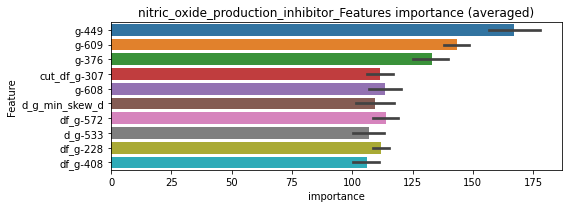

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000656779	valid_1's binary_logloss: 0.00556467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000324551	valid_1's binary_logloss: 0.00167353


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000349606	valid_1's binary_logloss: 0.00395852


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000325308	valid_1's binary_logloss: 0.00112398
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000325308	valid_1's binary_logloss: 0.00112398


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000332168	valid_1's binary_logloss: 0.000831148


nitric_oxide_production_inhibitor logloss: 0.0026303679681613378
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000363318	valid_1's binary_logloss: 0.00363881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000363803	valid_1's binary_logloss: 0.00268211
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000358627	valid_1's binary_logloss: 0.00083856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000357113	valid_1's binary_logloss: 0.0011245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000353215	valid_1's binary_logloss: 0.00380079


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024370, Threshold: 0.0218028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0218028, conf_0:0.01526, conf_1:0.02834
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_1: 0.0518028
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_2: 0.0818028
threshold: 0.0818028, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000350255	valid_1's binary_logloss: 0.00292157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000339685	valid_1's binary_logloss: 0.00272441
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000363314	valid_1's binary_logloss: 0.000896462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000355008	valid_1's binary_logloss: 0.000891875
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0787668, Threshold: 0.0818028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000352553	valid_1's binary_logloss: 0.00271347


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0102963 Vs.target_rate: 0.00109
Num_p_label: 41.0, Expected: 4.3, Threshold: 0.0818028, conf_0:0.06544, conf_1:0.09816
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.1118028
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.1418028
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_3: 0.1718028
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_4: 0.2018028
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_5: 0.2318028
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_6: 0.2618028
threshold: 0.2618028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000350255	valid_1's binary_logloss: 0.00292157
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000339685	valid_1's binary_logloss: 0.00272441
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000363314	valid_1's binary_logloss: 0.000896462
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000355008	valid_1's binary_logloss: 0.000891875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000352553	valid_1's binary_logloss: 0.00271347


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0787668, Threshold: 0.2618028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.2618028, conf_0:0.23562, conf_1:0.28798
threshold: 0.2618028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


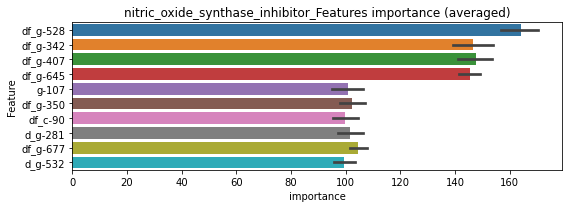

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000347234	valid_1's binary_logloss: 0.00185686


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000356837	valid_1's binary_logloss: 0.00184041


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000358659	valid_1's binary_logloss: 0.000846735


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000353558	valid_1's binary_logloss: 0.000910852


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000355153	valid_1's binary_logloss: 0.00266073


nitric_oxide_synthase_inhibitor logloss: 0.0016235688740860032
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000175368	valid_1's binary_logloss: 0.00293121
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000171886	valid_1's binary_logloss: 0.000550087
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000172563	valid_1's binary_logloss: 0.00266972
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000175615	valid_1's binary_logloss: 0.000241549
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005414, Threshold: 0.0027877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0027877, conf_0:0.00195, conf_1:0.00362
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0327877
threshold: 0.0327877, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000175746	valid_1's binary_logloss: 0.000625719


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000163081	valid_1's binary_logloss: 0.000952587
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000162205	valid_1's binary_logloss: 0.000177078
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000163239	valid_1's binary_logloss: 0.00116155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000164851	valid_1's binary_logloss: 0.000172311
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0976254, Threshold: 0.0327877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0060271 Vs.target_rate: 0.00029
Num_p_label: 24.0, Expected: 1.2, Threshold: 0.0327877, conf_0:0.02623, conf_1:0.03935
Num_p_label: 13.0, Expected: 1.2, Adj_threshold_1: 0.0627877
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.0927877
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_3: 0.1227877
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_4: 0.1527877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1827877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2127877


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000164724	valid_1's binary_logloss: 0.000182643


Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2427877
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_8: 0.2727877
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_9: 0.3027877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3327877
threshold: 0.3327877, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000163081	valid_1's binary_logloss: 0.000952587
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000162205	valid_1's binary_logloss: 0.000177078
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000163239	valid_1's binary_logloss: 0.00116155
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000164851	valid_1's binary_logloss: 0.000172311
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0976254, Threshold: 0.3327877, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000164724	valid_1's binary_logloss: 0.000182643


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3327877, conf_0:0.29951, conf_1:0.36607
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3627877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3927877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4227877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4527877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4827877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5127877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_7: 0.5427877
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.5727877
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_9: 0.6027877
threshold: 0.6027877, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


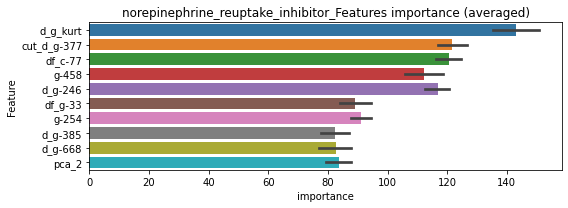

len(train_index) : 3049
len(valid_index) : 763
================================= fold 1/5 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 763
================================= fold 2/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000165044	valid_1's binary_logloss: 0.000609845
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 3/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000164068	valid_1's binary_logloss: 0.000190632
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 4/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000161676	valid_1's binary_logloss: 0.000645279
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 762
================================= fold 5/5 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000167835	valid_1's binary_logloss: 0.000179844
Training until validation scores don't improve for 29 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0003638853787472143


Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000163798	valid_1's binary_logloss: 0.000193433


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000253356	valid_1's binary_logloss: 0.00140341
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000251651	valid_1's binary_logloss: 0.00184991
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00030583	valid_1's binary_logloss: 0.00311569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000257456	valid_1's binary_logloss: 0.000450112
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000250034	valid_1's binary_logloss: 0.000647741


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012530, Threshold: 0.0043694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0043694, conf_0:0.00306, conf_1:0.00568
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0343694
threshold: 0.0343694, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000243544	valid_1's binary_logloss: 0.000799772
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000239518	valid_1's binary_logloss: 0.00144571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000272131	valid_1's binary_logloss: 0.00432134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000248919	valid_1's binary_logloss: 0.000315002
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149300, Threshold: 0.0343694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00076
Num_p_label: 11.0, Expected: 3.0, Threshold: 0.0343694, conf_0:0.02750, conf_1:0.04124
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0643694


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00024511	valid_1's binary_logloss: 0.000719479


threshold: 0.0643694, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000243544	valid_1's binary_logloss: 0.000799772
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000239518	valid_1's binary_logloss: 0.00144571
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000272131	valid_1's binary_logloss: 0.00432134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000248919	valid_1's binary_logloss: 0.000315002
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149300, Threshold: 0.0643694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0643694, conf_0:0.05793, conf_1:0.07081


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00024511	valid_1's binary_logloss: 0.000719479


threshold: 0.0643694, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


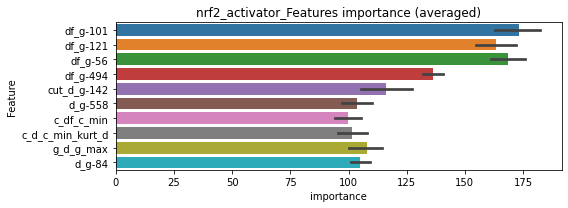

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000247188	valid_1's binary_logloss: 0.000716984


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000242722	valid_1's binary_logloss: 0.00103743
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000242765	valid_1's binary_logloss: 0.00103742


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 nrf2_activator=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000294821	valid_1's binary_logloss: 0.00217083
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000247927	valid_1's binary_logloss: 0.000289369
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000247077	valid_1's binary_logloss: 0.000288385


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 nrf2_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000247253	valid_1's binary_logloss: 0.000783195


nrf2_activator logloss: 0.0009996361332161423
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000719997	valid_1's binary_logloss: 0.0277259
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000559287	valid_1's binary_logloss: 0.0283093
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00069742	valid_1's binary_logloss: 0.0225188
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000569058	valid_1's binary_logloss: 0.0048839
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000594963	valid_1's binary_logloss: 0.0218339


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0046032, Threshold: 0.0148346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0148346, conf_0:0.01038, conf_1:0.01928
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_1: 0.0448346
threshold: 0.0448346, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000807025	valid_1's binary_logloss: 0.0312921
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000543726	valid_1's binary_logloss: 0.00887837
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000820483	valid_1's binary_logloss: 0.0180369
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000560025	valid_1's binary_logloss: 0.0112627
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000610218	valid_1's binary_logloss: 0.0132498


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630806, Threshold: 0.0448346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0135610 Vs.target_rate: 0.00256
Num_p_label: 54.0, Expected: 10.2, Threshold: 0.0448346, conf_0:0.03587, conf_1:0.05380
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.0748346
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.1048346
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_3: 0.1348346
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_4: 0.1648346
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_5: 0.1948346
threshold: 0.1948346, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000611391	valid_1's binary_logloss: 0.0193917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000747127	valid_1's binary_logloss: 0.018548
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00063504	valid_1's binary_logloss: 0.0128886
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00126892	valid_1's binary_logloss: 0.0307391
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000519313	valid_1's binary_logloss: 0.00984529


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0457392, Threshold: 0.1948346, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0045203 Vs.target_rate: 0.00256
Num_p_label: 18.0, Expected: 10.2, Threshold: 0.1948346, conf_0:0.17535, conf_1:0.21432
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_1: 0.2248346
threshold: 0.2248346, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


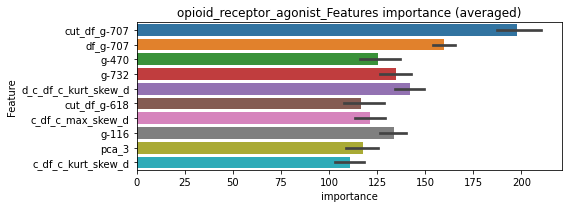

len(train_index) : 3033
len(valid_index) : 759
================================= fold 1/5 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000614826	valid_1's binary_logloss: 0.019815


len(train_index) : 3033
len(valid_index) : 759
================================= fold 2/5 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 758
================================= fold 3/5 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000951497	valid_1's binary_logloss: 0.0258606
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000680566	valid_1's binary_logloss: 0.0114217


len(train_index) : 3034
len(valid_index) : 758
================================= fold 4/5 opioid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3034
len(valid_index) : 758
================================= fold 5/5 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000777614	valid_1's binary_logloss: 0.0275718
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000791619	valid_1's binary_logloss: 0.0138539


opioid_receptor_agonist logloss: 0.01970624488887865
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00133623	valid_1's binary_logloss: 0.0552625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.0016134	valid_1's binary_logloss: 0.0415478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00257415	valid_1's binary_logloss: 0.0621781
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000957312	valid_1's binary_logloss: 0.0206754
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0122888, Threshold: 0.0436437, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00249757	valid_1's binary_logloss: 0.0694854


Remove_noisy_data: 154 → Positive_corect_labels: 644/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0436437, conf_0:0.03055, conf_1:0.05674
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_1: 0.0736437
threshold: 0.0736437, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00104175	valid_1's binary_logloss: 0.041315
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00159869	valid_1's binary_logloss: 0.0505545
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000721001	valid_1's binary_logloss: 0.0400027
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00167278	valid_1's binary_logloss: 0.0333749
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000798609	valid_1's binary_logloss: 0.0190698


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0356363, Threshold: 0.0736437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0190859 Vs.target_rate: 0.00403
Num_p_label: 76.0, Expected: 16.1, Threshold: 0.0736437, conf_0:0.05891, conf_1:0.08837
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_1: 0.1036437
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_2: 0.1336437
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_3: 0.1636437
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_4: 0.1936437
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_5: 0.2236437
threshold: 0.2236437, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 635.0/3761, y_label_rate: 0.1688381
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000714117	valid_1's binary_logloss: 0.0391114
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00114675	valid_1's binary_logloss: 0.03524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000622466	valid_1's binary_logloss: 0.0194856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000725299	valid_1's binary_logloss: 0.0220999
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0431912, Threshold: 0.2236437, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 631.0/3753
p_label_rate: 0.0110497 Vs.target_rate: 0.00403
Num_p_label: 44.0, Expected: 16.1, Threshold: 0.2236437, conf_0:0.20128, conf_1:0.24601


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00197241	valid_1's binary_logloss: 0.0515204


Num_p_label: 39.0, Expected: 16.1, Adj_threshold_1: 0.2536437
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_2: 0.2836437
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_3: 0.3136437
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.3436437
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_5: 0.3736437
threshold: 0.3736437, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 631.0/3753, y_label_rate: 0.1681322


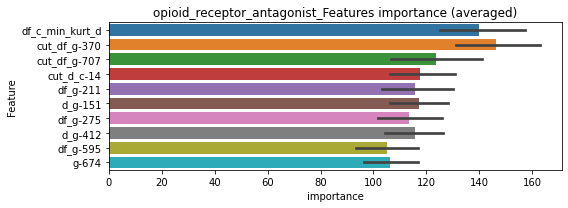

len(train_index) : 3002
len(valid_index) : 751
================================= fold 1/5 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3002
len(valid_index) : 751
================================= fold 2/5 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00175881	valid_1's binary_logloss: 0.0475672
Training until validation scores don't improve for 29 rounds


len(train_index) : 3002
len(valid_index) : 751
================================= fold 3/5 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00181387	valid_1's binary_logloss: 0.0426677
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00100489	valid_1's binary_logloss: 0.0303671


len(train_index) : 3003
len(valid_index) : 750
================================= fold 4/5 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000872478	valid_1's binary_logloss: 0.0263757


len(train_index) : 3003
len(valid_index) : 750
================================= fold 5/5 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


opioid_receptor_antagonist logloss: 0.03693214355224437
opioid_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00177417	valid_1's binary_logloss: 0.03767


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000406713	valid_1's binary_logloss: 0.0118974
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000409731	valid_1's binary_logloss: 0.00358169
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000417723	valid_1's binary_logloss: 0.0154635
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00040044	valid_1's binary_logloss: 0.00173475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000401353	valid_1's binary_logloss: 0.00186118


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026686, Threshold: 0.0063994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0063994, conf_0:0.00448, conf_1:0.00832
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0363994
threshold: 0.0363994, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000385294	valid_1's binary_logloss: 0.0114687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000450641	valid_1's binary_logloss: 0.00402899
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000478443	valid_1's binary_logloss: 0.0120081
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000387776	valid_1's binary_logloss: 0.00149052
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00038313	valid_1's binary_logloss: 0.00230909


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329652, Threshold: 0.0363994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0363994, conf_0:0.02912, conf_1:0.04368
Num_p_label: 6.0, Expected: 6.2, Adj_threshold_1: 0.0663994
threshold: 0.0663994, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000422847	valid_1's binary_logloss: 0.00687127
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000382686	valid_1's binary_logloss: 0.00396703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000384216	valid_1's binary_logloss: 0.00308843
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00039095	valid_1's binary_logloss: 0.00305054
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323930, Threshold: 0.0663994, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000449007	valid_1's binary_logloss: 0.00587364


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0015068 Vs.target_rate: 0.00155
Num_p_label: 6.0, Expected: 6.2, Threshold: 0.0663994, conf_0:0.05976, conf_1:0.07304
threshold: 0.0663994, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


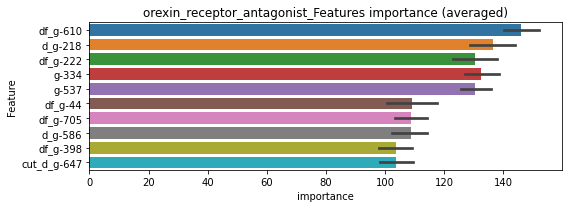

len(train_index) : 3047
len(valid_index) : 762
================================= fold 1/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000389748	valid_1's binary_logloss: 0.00675227


len(train_index) : 3047
len(valid_index) : 762
================================= fold 2/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000406019	valid_1's binary_logloss: 0.0053343


len(train_index) : 3047
len(valid_index) : 762
================================= fold 3/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000389729	valid_1's binary_logloss: 0.00241414


len(train_index) : 3047
len(valid_index) : 762
================================= fold 4/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000389976	valid_1's binary_logloss: 0.00187574


len(train_index) : 3048
len(valid_index) : 761
================================= fold 5/5 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000400112	valid_1's binary_logloss: 0.00488495


orexin_receptor_antagonist logloss: 0.004252170276852527
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000523542	valid_1's binary_logloss: 0.0114458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000570264	valid_1's binary_logloss: 0.0171217
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000539228	valid_1's binary_logloss: 0.00930419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000522624	valid_1's binary_logloss: 0.0137804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000559027	valid_1's binary_logloss: 0.016159


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0052046, Threshold: 0.0299034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0299034, conf_0:0.02093, conf_1:0.03887
Num_p_label: 23.0, Expected: 10.4, Adj_threshold_1: 0.0599034
Num_p_label: 13.0, Expected: 10.4, Adj_threshold_2: 0.0899034
threshold: 0.0899034, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000879897	valid_1's binary_logloss: 0.0196771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000519786	valid_1's binary_logloss: 0.0120829
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000498291	valid_1's binary_logloss: 0.00642475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000725086	valid_1's binary_logloss: 0.0126519
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000557707	valid_1's binary_logloss: 0.0251308


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0231394, Threshold: 0.0899034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0899034, conf_0:0.07192, conf_1:0.10788
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1199034
Num_p_label: 11.0, Expected: 10.4, Adj_threshold_2: 0.1499034
threshold: 0.1499034, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000583918	valid_1's binary_logloss: 0.0119194
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000504422	valid_1's binary_logloss: 0.00510442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000543386	valid_1's binary_logloss: 0.0217847
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000500615	valid_1's binary_logloss: 0.0141665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000493752	valid_1's binary_logloss: 0.0114012


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238755, Threshold: 0.1499034, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3799
p_label_rate: 0.0027624 Vs.target_rate: 0.00260
Num_p_label: 11.0, Expected: 10.4, Threshold: 0.1499034, conf_0:0.13491, conf_1:0.16489
threshold: 0.1499034, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3799, y_label_rate: 0.1713609


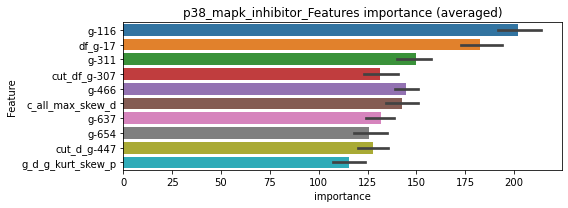

len(train_index) : 3039
len(valid_index) : 760
================================= fold 1/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000649606	valid_1's binary_logloss: 0.0188281


len(train_index) : 3039
len(valid_index) : 760
================================= fold 2/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3039
len(valid_index) : 760
================================= fold 3/5 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000923702	valid_1's binary_logloss: 0.0252253
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000697314	valid_1's binary_logloss: 0.0135945


len(train_index) : 3039
len(valid_index) : 760
================================= fold 4/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000506066	valid_1's binary_logloss: 0.00837861
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000498327	valid_1's binary_logloss: 0.00835051


len(train_index) : 3040
len(valid_index) : 759
================================= fold 5/5 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000512747	valid_1's binary_logloss: 0.0056345
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000501726	valid_1's binary_logloss: 0.00560025


p38_mapk_inhibitor logloss: 0.014323807214474033
p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000309171	valid_1's binary_logloss: 0.00126083
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000313385	valid_1's binary_logloss: 0.00646344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00228983
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000302605	valid_1's binary_logloss: 0.00117725
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000306605	valid_1's binary_logloss: 0.000776456


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017202, Threshold: 0.0108182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0108182, conf_0:0.00757, conf_1:0.01406
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0408182
threshold: 0.0408182, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000303366	valid_1's binary_logloss: 0.00107524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000305193	valid_1's binary_logloss: 0.00706289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000298279	valid_1's binary_logloss: 0.00250288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00030054	valid_1's binary_logloss: 0.000899384
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097551, Threshold: 0.0408182, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000294311	valid_1's binary_logloss: 0.000839215


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00101
Num_p_label: 18.0, Expected: 4.0, Threshold: 0.0408182, conf_0:0.03265, conf_1:0.04898
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_1: 0.0708182
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1008182
threshold: 0.1008182, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000303366	valid_1's binary_logloss: 0.00107524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000305193	valid_1's binary_logloss: 0.00706289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000298279	valid_1's binary_logloss: 0.00250288
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00030054	valid_1's binary_logloss: 0.000899384
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000294311	valid_1's binary_logloss: 0.000839215


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097551, Threshold: 0.1008182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1008182, conf_0:0.09074, conf_1:0.11090
threshold: 0.1008182, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


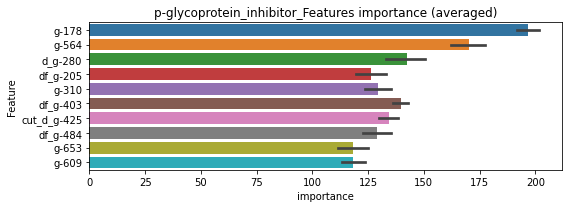

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00029737	valid_1's binary_logloss: 0.00103575
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000296943	valid_1's binary_logloss: 0.00103408


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000330443	valid_1's binary_logloss: 0.00506823


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000301297	valid_1's binary_logloss: 0.00252136


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000296678	valid_1's binary_logloss: 0.000837151
Early stopping, best iteration is:
[1041]	training's binary_logloss: 0.000295384	valid_1's binary_logloss: 0.000834241


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000298267	valid_1's binary_logloss: 0.000881886
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000298267	valid_1's binary_logloss: 0.000881886


p-glycoprotein_inhibitor logloss: 0.002067688446160979
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000546397	valid_1's binary_logloss: 0.0244764
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000749366	valid_1's binary_logloss: 0.0172664
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000629694	valid_1's binary_logloss: 0.00952879
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000544363	valid_1's binary_logloss: 0.00706642
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000588164	valid_1's binary_logloss: 0.0139361


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0047281, Threshold: 0.0147703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0147703, conf_0:0.01034, conf_1:0.01920
Num_p_label: 6.0, Expected: 10.2, Adj_threshold_1: 0.0447703
threshold: 0.0447703, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000524755	valid_1's binary_logloss: 0.0112363
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000548706	valid_1's binary_logloss: 0.00931807
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000524847	valid_1's binary_logloss: 0.0091505
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000538201	valid_1's binary_logloss: 0.00499999
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000533959	valid_1's binary_logloss: 0.0189216


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0506495, Threshold: 0.0447703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0075339 Vs.target_rate: 0.00256
Num_p_label: 30.0, Expected: 10.2, Threshold: 0.0447703, conf_0:0.03582, conf_1:0.05372
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.0747703
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_2: 0.1047703
threshold: 0.1047703, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000651164	valid_1's binary_logloss: 0.0187243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000516646	valid_1's binary_logloss: 0.00956607
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000603244	valid_1's binary_logloss: 0.0134605
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000520315	valid_1's binary_logloss: 0.00465858
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000521726	valid_1's binary_logloss: 0.0161121


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0299975, Threshold: 0.1047703, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00256
Num_p_label: 12.0, Expected: 10.2, Threshold: 0.1047703, conf_0:0.09429, conf_1:0.11525
threshold: 0.1047703, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


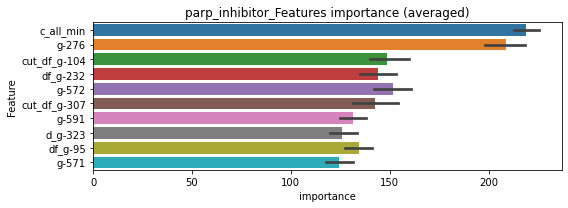

len(train_index) : 3040
len(valid_index) : 761
================================= fold 1/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000588758	valid_1's binary_logloss: 0.0143383


len(train_index) : 3041
len(valid_index) : 760
================================= fold 2/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000537294	valid_1's binary_logloss: 0.00873534


len(train_index) : 3041
len(valid_index) : 760
================================= fold 3/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000595594	valid_1's binary_logloss: 0.0173609


len(train_index) : 3041
len(valid_index) : 760
================================= fold 4/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.00053652	valid_1's binary_logloss: 0.0110524


len(train_index) : 3041
len(valid_index) : 760
================================= fold 5/5 parp_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00067499	valid_1's binary_logloss: 0.0216995


parp_inhibitor logloss: 0.014638315875582847


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7380
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7380


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0383729	valid_1's binary_logloss: 0.120537
Early stopping, best iteration is:
[1730]	training's binary_logloss: 0.0208672	valid_1's binary_logloss: 0.107615
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0379552	valid_1's binary_logloss: 0.137101
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0216133	valid_1's binary_logloss: 0.125654
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0386659	valid_1's binary_logloss: 0.118656
[2000]	training's binary_logloss: 0.018076	valid_1's binary_logloss: 0.105947
Early stopping, best iteration is:
[2193]	training's binary_logloss: 0.0163956	valid_1's binary_logloss: 0.105032
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0374864	valid_1's binary_logloss: 0.131459
Early stopping, best

1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0674388, Threshold: 0.1219058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 486 → Positive_corect_labels: 1381/8370
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.1219058, conf_0:0.08533, conf_1:0.15848
threshold: 0.1219058, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1381.0/8370, y_label_rate: 0.1649940
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0307028	valid_1's binary_logloss: 0.0898837
[2000]	training's binary_logloss: 0.0139445	valid_1's binary_logloss: 0.0728566
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.011658	valid_1's binary_logloss: 0.0701085
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0300669	valid_1's binary_logloss: 0.100805
Early stopping, best iteration is:
[1797]	training's binary_logloss: 0.0155329	valid_1's binary_logloss: 0.0859541
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0299669	valid_1's binary_logloss: 0.0995831
[2000]	training's binary_logloss: 0.0137811	valid_1's binary_logloss: 0.0844839
Early stopping, best iteration is:
[1999]	training's binary_logloss: 0.0137877	valid_1's binary_logloss: 0.084465
Training until validation scores don't improve for 29 rounds
[1000]	trainin

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0892814, Threshold: 0.1219058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1330.0/8268
p_label_rate: 0.0138122 Vs.target_rate: 0.01247
Num_p_label: 55.0, Expected: 49.7, Threshold: 0.1219058, conf_0:0.09752, conf_1:0.14629
threshold: 0.1219058, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1330.0/8268, y_label_rate: 0.1608612
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0277545	valid_1's binary_logloss: 0.0820879
[2000]	training's binary_logloss: 0.0126042	valid_1's binary_logloss: 0.0657443
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.0114861	valid_1's binary_logloss: 0.0645441
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0272872	valid_1's binary_logloss: 0.0808904
[2000]	training's binary_logloss: 0.0124596	valid_1's binary_logloss: 0.0648519
Early stopping, best iteration is:
[2753]	training's binary_logloss: 0.00890012	valid_1's binary_logloss: 0.0606681
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0276499	valid_1's binary_logloss: 0.07644
[2000]	training's binary_logloss: 0.0126218	valid_1's binary_logloss: 0.0595571
Early stopping, best iteration is:
[2549]	training's binary_logloss: 0.00973872	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0851516, Threshold: 0.1219058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1305.0/8218
p_label_rate: 0.0097941 Vs.target_rate: 0.01247
Num_p_label: 39.0, Expected: 49.7, Threshold: 0.1219058, conf_0:0.10972, conf_1:0.13410
threshold: 0.1219058, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1305.0/8218, y_label_rate: 0.1587978


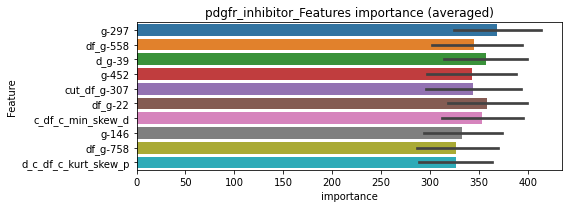

len(train_index) : 6574
len(valid_index) : 1644
================================= fold 1/5 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0457319	valid_1's binary_logloss: 0.0965018
[2000]	training's binary_logloss: 0.0230196	valid_1's binary_logloss: 0.0735762
[3000]	training's binary_logloss: 0.0150432	valid_1's binary_logloss: 0.0649963
[4000]	training's binary_logloss: 0.0111202	valid_1's binary_logloss: 0.0605506
Early stopping, best iteration is:
[4221]	training's binary_logloss: 0.0105127	valid_1's binary_logloss: 0.059611


len(train_index) : 6574
len(valid_index) : 1644
================================= fold 2/5 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0454208	valid_1's binary_logloss: 0.0965271
[2000]	training's binary_logloss: 0.0228136	valid_1's binary_logloss: 0.0739445
[3000]	training's binary_logloss: 0.0149087	valid_1's binary_logloss: 0.0652741
Early stopping, best iteration is:
[3877]	training's binary_logloss: 0.011375	valid_1's binary_logloss: 0.0608434


len(train_index) : 6574
len(valid_index) : 1644
================================= fold 3/5 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0468946	valid_1's binary_logloss: 0.087457
[2000]	training's binary_logloss: 0.0234182	valid_1's binary_logloss: 0.0652544
[3000]	training's binary_logloss: 0.0153243	valid_1's binary_logloss: 0.0565759
Early stopping, best iteration is:
[3919]	training's binary_logloss: 0.0115506	valid_1's binary_logloss: 0.0522998


len(train_index) : 6575
len(valid_index) : 1643
================================= fold 4/5 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0463965	valid_1's binary_logloss: 0.0917297
[2000]	training's binary_logloss: 0.0233038	valid_1's binary_logloss: 0.0667097
Early stopping, best iteration is:
[2809]	training's binary_logloss: 0.0163607	valid_1's binary_logloss: 0.0587348


len(train_index) : 6575
len(valid_index) : 1643
================================= fold 5/5 pdgfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0458855	valid_1's binary_logloss: 0.0894686
[2000]	training's binary_logloss: 0.0231432	valid_1's binary_logloss: 0.0673482
[3000]	training's binary_logloss: 0.0151107	valid_1's binary_logloss: 0.0584013
Early stopping, best iteration is:
[3328]	training's binary_logloss: 0.0135426	valid_1's binary_logloss: 0.0563885


pdgfr_inhibitor logloss: 0.057575499728048006
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000293187	valid_1's binary_logloss: 0.000752557
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000285914	valid_1's binary_logloss: 0.000818135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000296172	valid_1's binary_logloss: 0.00577177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000298344	valid_1's binary_logloss: 0.00269135
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015739, Threshold: 0.0077751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0077751, conf_0:0.00544, conf_1:0.01011
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0377751


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000288795	valid_1's binary_logloss: 0.00139671


threshold: 0.0377751, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275648	valid_1's binary_logloss: 0.000602583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000273327	valid_1's binary_logloss: 0.000629838
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000283703	valid_1's binary_logloss: 0.0057004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000300732	valid_1's binary_logloss: 0.00406426
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0269467, Threshold: 0.0377751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0077850 Vs.target_rate: 0.00076
Num_p_label: 31.0, Expected: 3.0, Threshold: 0.0377751, conf_0:0.03022, conf_1:0.04533
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0677751
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0977751
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1277751
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1577751


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000278846	valid_1's binary_logloss: 0.00126501


threshold: 0.1577751, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000289188	valid_1's binary_logloss: 0.00347264
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000275718	valid_1's binary_logloss: 0.00219869
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000275775	valid_1's binary_logloss: 0.000511302
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000293131	valid_1's binary_logloss: 0.00055985
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341623, Threshold: 0.1577751, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.1577751, conf_0:0.14200, conf_1:0.17355
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1877751


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000290493	valid_1's binary_logloss: 0.000945371


threshold: 0.1877751, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


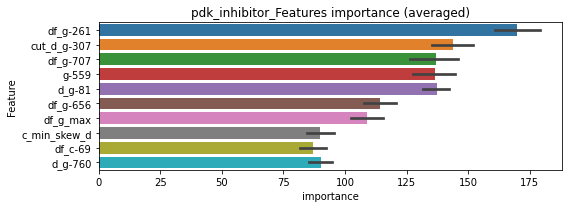

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 pdk_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000291233	valid_1's binary_logloss: 0.00207026
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000273587	valid_1's binary_logloss: 0.000997772


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3049
len(valid_index) : 762


Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000277733	valid_1's binary_logloss: 0.000567435


================================= fold 4/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000279871	valid_1's binary_logloss: 0.000499187


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 pdk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000275206	valid_1's binary_logloss: 0.000873051


pdk_inhibitor logloss: 0.0010018204318073764


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 7176
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 7176


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0339125	valid_1's binary_logloss: 0.111779
Early stopping, best iteration is:
[1577]	training's binary_logloss: 0.0203501	valid_1's binary_logloss: 0.105181
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.033926	valid_1's binary_logloss: 0.107403
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.0182531	valid_1's binary_logloss: 0.100819
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0334617	valid_1's binary_logloss: 0.115082
Early stopping, best iteration is:
[1094]	training's binary_logloss: 0.030324	valid_1's binary_logloss: 0.112768
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0341125	valid_1's binary_logloss: 0.114855
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.0254582	valid_1's binary_logl

1 / 3, AUC score:0.979, PR-AUC:0.955
y_Threshold: 0.0643404, Threshold: 0.1295773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 480 → Positive_corect_labels: 1339/8131
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.1295773, conf_0:0.09070, conf_1:0.16845
threshold: 0.1295773, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1339.0/8131, y_label_rate: 0.1646784
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.02472	valid_1's binary_logloss: 0.0738921
[2000]	training's binary_logloss: 0.0113881	valid_1's binary_logloss: 0.0637643
Early stopping, best iteration is:
[2243]	training's binary_logloss: 0.0100121	valid_1's binary_logloss: 0.0625165
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0247207	valid_1's binary_logloss: 0.0718785
Early stopping, best iteration is:
[1850]	training's binary_logloss: 0.0124379	valid_1's binary_logloss: 0.0649956
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0239465	valid_1's binary_logloss: 0.0928012
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.019681	valid_1's binary_logloss: 0.0898955
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.025063	valid_1's binary_logloss: 0.0724383
Early stopping,

2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0754757, Threshold: 0.1295773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1283.0/8019
p_label_rate: 0.0143144 Vs.target_rate: 0.01109
Num_p_label: 57.0, Expected: 44.1, Threshold: 0.1295773, conf_0:0.10366, conf_1:0.15549
threshold: 0.1295773, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1283.0/8019, y_label_rate: 0.1599950
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0207157	valid_1's binary_logloss: 0.0641795
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0118102	valid_1's binary_logloss: 0.0573737
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0201955	valid_1's binary_logloss: 0.0656588
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.0108837	valid_1's binary_logloss: 0.0584519
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0208283	valid_1's binary_logloss: 0.0547061
Early stopping, best iteration is:
[1851]	training's binary_logloss: 0.0104993	valid_1's binary_logloss: 0.0468318
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0205741	valid_1's binary_logloss: 0.0584659
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0118002	valid_1's bi

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0715285, Threshold: 0.1295773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1254.0/7961
p_label_rate: 0.0105475 Vs.target_rate: 0.01109
Num_p_label: 42.0, Expected: 44.1, Threshold: 0.1295773, conf_0:0.11662, conf_1:0.14254
threshold: 0.1295773, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1254.0/7961, y_label_rate: 0.1575179


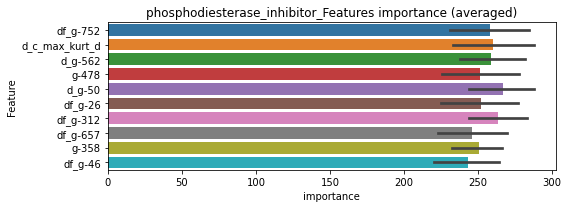

len(train_index) : 6368
len(valid_index) : 1593
================================= fold 1/5 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0333049	valid_1's binary_logloss: 0.0592457
[2000]	training's binary_logloss: 0.0166818	valid_1's binary_logloss: 0.0458336
[3000]	training's binary_logloss: 0.0109351	valid_1's binary_logloss: 0.0410517
[4000]	training's binary_logloss: 0.00810318	valid_1's binary_logloss: 0.0385966
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.00754288	valid_1's binary_logloss: 0.0381585


len(train_index) : 6369
len(valid_index) : 1592
================================= fold 2/5 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0331856	valid_1's binary_logloss: 0.0601959
[2000]	training's binary_logloss: 0.016529	valid_1's binary_logloss: 0.0451189
[3000]	training's binary_logloss: 0.0108456	valid_1's binary_logloss: 0.0400783
[4000]	training's binary_logloss: 0.00803428	valid_1's binary_logloss: 0.037307
[5000]	training's binary_logloss: 0.00636756	valid_1's binary_logloss: 0.0356993
Early stopping, best iteration is:
[5116]	training's binary_logloss: 0.00622593	valid_1's binary_logloss: 0.0355736


len(train_index) : 6369
len(valid_index) : 1592
================================= fold 3/5 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.032261	valid_1's binary_logloss: 0.0697535
[2000]	training's binary_logloss: 0.0161224	valid_1's binary_logloss: 0.0577317
Early stopping, best iteration is:
[2690]	training's binary_logloss: 0.0118434	valid_1's binary_logloss: 0.0546817


len(train_index) : 6369
len(valid_index) : 1592
================================= fold 4/5 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0335495	valid_1's binary_logloss: 0.0617327
[2000]	training's binary_logloss: 0.0166725	valid_1's binary_logloss: 0.0466059
[3000]	training's binary_logloss: 0.0109285	valid_1's binary_logloss: 0.0414149
[4000]	training's binary_logloss: 0.00808865	valid_1's binary_logloss: 0.038795
Early stopping, best iteration is:
[4450]	training's binary_logloss: 0.00723712	valid_1's binary_logloss: 0.0379692


len(train_index) : 6369
len(valid_index) : 1592
================================= fold 5/5 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0335955	valid_1's binary_logloss: 0.0581082
[2000]	training's binary_logloss: 0.0167301	valid_1's binary_logloss: 0.0432895
[3000]	training's binary_logloss: 0.0110048	valid_1's binary_logloss: 0.0380728
[4000]	training's binary_logloss: 0.00814309	valid_1's binary_logloss: 0.0352887
Early stopping, best iteration is:
[4276]	training's binary_logloss: 0.00757423	valid_1's binary_logloss: 0.0347324


phosphodiesterase_inhibitor logloss: 0.04022281838076937
phosphodiesterase_inhibitor is unpredictable(><)!
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000334322	valid_1's binary_logloss: 0.00420243
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000323159	valid_1's binary_logloss: 0.00242833
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000351685	valid_1's binary_logloss: 0.00595352
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000323406	valid_1's binary_logloss: 0.00128243
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000331288	valid_1's binary_logloss: 0.00130717


y_Threshold: 0.0019209, Threshold: 0.0063539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0063539, conf_0:0.00445, conf_1:0.00826
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_1: 0.0363539
threshold: 0.0363539, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000315747	valid_1's binary_logloss: 0.00357224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000315124	valid_1's binary_logloss: 0.00270931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000338907	valid_1's binary_logloss: 0.00615831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000323551	valid_1's binary_logloss: 0.00176207
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0485994, Threshold: 0.0363539, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000318835	valid_1's binary_logloss: 0.00132579


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.0363539, conf_0:0.02908, conf_1:0.04362
threshold: 0.0363539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000315747	valid_1's binary_logloss: 0.00357224
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000315124	valid_1's binary_logloss: 0.00270931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000338907	valid_1's binary_logloss: 0.00615831
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000323551	valid_1's binary_logloss: 0.00176207
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000318835	valid_1's binary_logloss: 0.00132579


y_Threshold: 0.0485994, Threshold: 0.0363539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.0363539, conf_0:0.03272, conf_1:0.03999
threshold: 0.0363539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


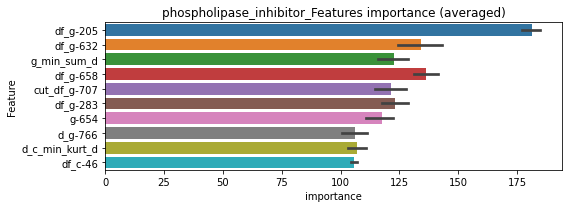

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00033383	valid_1's binary_logloss: 0.00229501


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000316745	valid_1's binary_logloss: 0.00190352


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.00035658	valid_1's binary_logloss: 0.0041988


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000334416	valid_1's binary_logloss: 0.00147433


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 phospholipase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00031995	valid_1's binary_logloss: 0.00123258


phospholipase_inhibitor logloss: 0.002221428658120961


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 4110
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 4110


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0340579	valid_1's binary_logloss: 0.0971391
[2000]	training's binary_logloss: 0.0166547	valid_1's binary_logloss: 0.07963
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.014152	valid_1's binary_logloss: 0.0770475
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0334608	valid_1's binary_logloss: 0.10123
[2000]	training's binary_logloss: 0.0163666	valid_1's binary_logloss: 0.0876091
Early stopping, best iteration is:
[2561]	training's binary_logloss: 0.0127986	valid_1's binary_logloss: 0.0846421
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0332083	valid_1's binary_logloss: 0.11702
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0195741	valid_1's binary_logloss: 0.107546
Training until validation scores don't improve for 29 rounds
[1000]	training's b

1 / 3, AUC score:0.989, PR-AUC:0.971
y_Threshold: 0.0643222, Threshold: 0.1395003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 243 → Positive_corect_labels: 783/4689
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.1395003, conf_0:0.09765, conf_1:0.18135
Num_p_label: 26.0, Expected: 25.2, Adj_threshold_1: 0.1695003
threshold: 0.1695003, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 783.0/4689, y_label_rate: 0.1669866
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275339	valid_1's binary_logloss: 0.0867101
[2000]	training's binary_logloss: 0.0130859	valid_1's binary_logloss: 0.0715765
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0101094	valid_1's binary_logloss: 0.0681178
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0277846	valid_1's binary_logloss: 0.0808189
[2000]	training's binary_logloss: 0.0132097	valid_1's binary_logloss: 0.0632478
Early stopping, best iteration is:
[2738]	training's binary_logloss: 0.0094394	valid_1's binary_logloss: 0.057207
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0280453	valid_1's binary_logloss: 0.0787813
[2000]	training's binary_logloss: 0.0132238	valid_1's binary_logloss: 0.0630222
Early stopping, best iteration is:
[2613]	training's binary_logloss: 0.00996436	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0971503, Threshold: 0.1695003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 763.0/4649
p_label_rate: 0.0102963 Vs.target_rate: 0.00634
Num_p_label: 41.0, Expected: 25.2, Threshold: 0.1695003, conf_0:0.13560, conf_1:0.20340
Num_p_label: 24.0, Expected: 25.2, Adj_threshold_1: 0.1995003
threshold: 0.1995003, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 763.0/4649, y_label_rate: 0.1641213
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262603	valid_1's binary_logloss: 0.0721228
[2000]	training's binary_logloss: 0.0125015	valid_1's binary_logloss: 0.0547259
[3000]	training's binary_logloss: 0.00816071	valid_1's binary_logloss: 0.0486081
[4000]	training's binary_logloss: 0.00609254	valid_1's binary_logloss: 0.0450129
Early stopping, best iteration is:
[4509]	training's binary_logloss: 0.00540474	valid_1's binary_logloss: 0.0437881
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0259431	valid_1's binary_logloss: 0.0746044
[2000]	training's binary_logloss: 0.0123375	valid_1's binary_logloss: 0.0569376
Early stopping, best iteration is:
[2740]	training's binary_logloss: 0.00885262	valid_1's binary_logloss: 0.0516911
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0261134	valid_1's binary_logloss: 0.0662827
[2000]	training's binar

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1016874, Threshold: 0.1995003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 753.0/4629
p_label_rate: 0.0062783 Vs.target_rate: 0.00634
Num_p_label: 25.0, Expected: 25.2, Threshold: 0.1995003, conf_0:0.17955, conf_1:0.21945
threshold: 0.1995003, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 753.0/4629, y_label_rate: 0.1626701


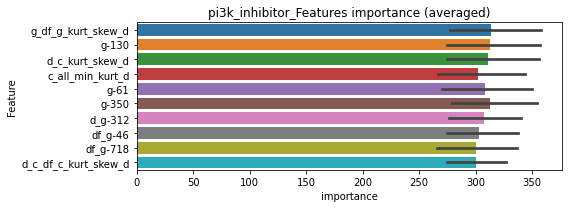

len(train_index) : 3703
len(valid_index) : 926
================================= fold 1/5 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0481201	valid_1's binary_logloss: 0.0877018
[2000]	training's binary_logloss: 0.0237385	valid_1's binary_logloss: 0.0632716
[3000]	training's binary_logloss: 0.0155293	valid_1's binary_logloss: 0.0540799
Early stopping, best iteration is:
[3399]	training's binary_logloss: 0.0136502	valid_1's binary_logloss: 0.0516311


len(train_index) : 3703
len(valid_index) : 926
================================= fold 2/5 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0480539	valid_1's binary_logloss: 0.0877209
[2000]	training's binary_logloss: 0.0236243	valid_1's binary_logloss: 0.0613105
[3000]	training's binary_logloss: 0.015522	valid_1's binary_logloss: 0.0515054
[4000]	training's binary_logloss: 0.0115109	valid_1's binary_logloss: 0.0461801
[5000]	training's binary_logloss: 0.00917699	valid_1's binary_logloss: 0.0430005
[6000]	training's binary_logloss: 0.00763873	valid_1's binary_logloss: 0.0406527
Early stopping, best iteration is:
[6120]	training's binary_logloss: 0.00749226	valid_1's binary_logloss: 0.0404708


len(train_index) : 3703
len(valid_index) : 926
================================= fold 3/5 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.047525	valid_1's binary_logloss: 0.0925445
[2000]	training's binary_logloss: 0.0234527	valid_1's binary_logloss: 0.0658803
[3000]	training's binary_logloss: 0.0154279	valid_1's binary_logloss: 0.056314
[4000]	training's binary_logloss: 0.0114764	valid_1's binary_logloss: 0.0515057
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00951001	valid_1's binary_logloss: 0.0488707


len(train_index) : 3703
len(valid_index) : 926
================================= fold 4/5 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.047207	valid_1's binary_logloss: 0.106281
[2000]	training's binary_logloss: 0.023177	valid_1's binary_logloss: 0.0791233
[3000]	training's binary_logloss: 0.0152359	valid_1's binary_logloss: 0.069643
[4000]	training's binary_logloss: 0.0113377	valid_1's binary_logloss: 0.0641969
Early stopping, best iteration is:
[4442]	training's binary_logloss: 0.0101885	valid_1's binary_logloss: 0.0628135


len(train_index) : 3704
len(valid_index) : 925
================================= fold 5/5 pi3k_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0471491	valid_1's binary_logloss: 0.0943947
[2000]	training's binary_logloss: 0.0232522	valid_1's binary_logloss: 0.068298
[3000]	training's binary_logloss: 0.0152563	valid_1's binary_logloss: 0.0582826
[4000]	training's binary_logloss: 0.0113379	valid_1's binary_logloss: 0.0528361
[5000]	training's binary_logloss: 0.00901955	valid_1's binary_logloss: 0.0497103
[6000]	training's binary_logloss: 0.00749372	valid_1's binary_logloss: 0.0471342
[7000]	training's binary_logloss: 0.00642904	valid_1's binary_logloss: 0.0453171
[8000]	training's binary_logloss: 0.00563956	valid_1's binary_logloss: 0.0439155
Early stopping, best iteration is:
[7976]	training's binary_logloss: 0.00565426	valid_1's binary_logloss: 0.0438906


pi3k_inhibitor logloss: 0.049536583994040324
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000389116	valid_1's binary_logloss: 0.00169375
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000388371	valid_1's binary_logloss: 0.00831184
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000382986	valid_1's binary_logloss: 0.000847676
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000393135	valid_1's binary_logloss: 0.00126201
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000383728	valid_1's binary_logloss: 0.00687166


y_Threshold: 0.0020613, Threshold: 0.0063300, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0063300, conf_0:0.00443, conf_1:0.00823
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0363300
threshold: 0.0363300, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000378532	valid_1's binary_logloss: 0.00156134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00040962	valid_1's binary_logloss: 0.00654898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000393046	valid_1's binary_logloss: 0.000822712
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00037481	valid_1's binary_logloss: 0.00109618
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000372971	valid_1's binary_logloss: 0.0059571


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390113, Threshold: 0.0363300, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.0363300, conf_0:0.02906, conf_1:0.04360
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_1: 0.0663300
threshold: 0.0663300, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000378532	valid_1's binary_logloss: 0.00156134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00040962	valid_1's binary_logloss: 0.00654898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000393046	valid_1's binary_logloss: 0.000822712
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00037481	valid_1's binary_logloss: 0.00109618
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000372971	valid_1's binary_logloss: 0.0059571


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390113, Threshold: 0.0663300, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00130
Num_p_label: 6.0, Expected: 5.2, Threshold: 0.0663300, conf_0:0.05970, conf_1:0.07296
threshold: 0.0663300, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


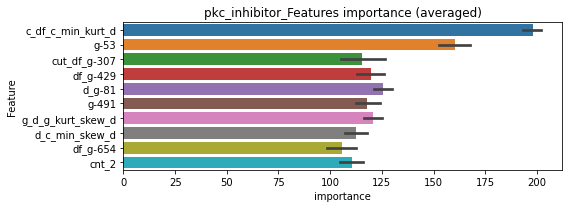

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000400932	valid_1's binary_logloss: 0.00155569


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 pkc_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000505052	valid_1's binary_logloss: 0.00609458
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000395613	valid_1's binary_logloss: 0.000743389


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0003767	valid_1's binary_logloss: 0.00086308
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000376937	valid_1's binary_logloss: 0.000862878


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 pkc_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000376798	valid_1's binary_logloss: 0.00438629


pkc_inhibitor logloss: 0.0027294126945066497
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000586152	valid_1's binary_logloss: 0.0250089
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000541539	valid_1's binary_logloss: 0.0120149
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000502671	valid_1's binary_logloss: 0.0123626
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000605402	valid_1's binary_logloss: 0.0102311
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049149, Threshold: 0.0215239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0215239, conf_0:0.01507, conf_1:0.02798
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0515239


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0012405	valid_1's binary_logloss: 0.0343447


threshold: 0.0515239, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00063293	valid_1's binary_logloss: 0.0245228
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000529739	valid_1's binary_logloss: 0.00790301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000495989	valid_1's binary_logloss: 0.00992364
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000761663	valid_1's binary_logloss: 0.00996603
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0363345, Threshold: 0.0515239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0173280 Vs.target_rate: 0.00231
Num_p_label: 69.0, Expected: 9.2, Threshold: 0.0515239, conf_0:0.04122, conf_1:0.06183
Num_p_label: 54.0, Expected: 9.2, Adj_threshold_1: 0.0815239
Num_p_label: 43.0, Expected: 9.2, Adj_threshold_2: 0.1115239
Num_p_label: 35.0, Expected: 9.2, Adj_threshold_3: 0.1415239
Num_p_label: 32.0, Expected: 9.2, Adj_threshold_4: 0.1715239
Num_p_label: 30.0, Expected: 9.2, Adj_threshold_5: 0.2015239


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0018461	valid_1's binary_logloss: 0.0351376


Num_p_label: 26.0, Expected: 9.2, Adj_threshold_6: 0.2315239
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_7: 0.2615239
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_8: 0.2915239
threshold: 0.2915239, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000491751	valid_1's binary_logloss: 0.0130836
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000707923	valid_1's binary_logloss: 0.021417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491903	valid_1's binary_logloss: 0.0140271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000576954	valid_1's binary_logloss: 0.0111418
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0356936, Threshold: 0.2915239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3786
p_label_rate: 0.0080362 Vs.target_rate: 0.00231
Num_p_label: 32.0, Expected: 9.2, Threshold: 0.2915239, conf_0:0.26237, conf_1:0.32068


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000998072	valid_1's binary_logloss: 0.0196375


Num_p_label: 32.0, Expected: 9.2, Adj_threshold_1: 0.3215239
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_2: 0.3515239
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_3: 0.3815239
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.4115239
Num_p_label: 25.0, Expected: 9.2, Adj_threshold_5: 0.4415239
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.4715239
threshold: 0.4715239, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 647.0/3786, y_label_rate: 0.1708928


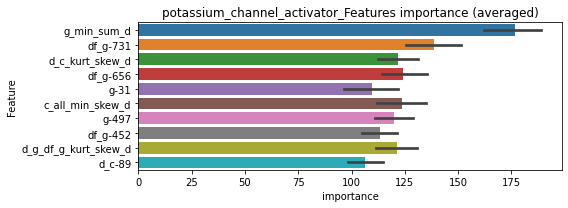

len(train_index) : 3028
len(valid_index) : 758
================================= fold 1/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000499791	valid_1's binary_logloss: 0.0145288


len(train_index) : 3029
len(valid_index) : 757
================================= fold 2/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3029
len(valid_index) : 757
================================= fold 3/5 potassium_channel_activator=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000814304	valid_1's binary_logloss: 0.0202883
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000515718	valid_1's binary_logloss: 0.00854313


len(train_index) : 3029
len(valid_index) : 757
================================= fold 4/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000565643	valid_1's binary_logloss: 0.0097193


len(train_index) : 3029
len(valid_index) : 757
================================= fold 5/5 potassium_channel_activator=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000692958	valid_1's binary_logloss: 0.0107141


potassium_channel_activator logloss: 0.012761968365282334
potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0270537	valid_1's binary_logloss: 0.0891555
[2000]	training's binary_logloss: 0.0127389	valid_1's binary_logloss: 0.0769187
Early stopping, best iteration is:
[2467]	training's binary_logloss: 0.010168	valid_1's binary_logloss: 0.0743742
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0277706	valid_1's binary_logloss: 0.0835455
[2000]	training's binary_logloss: 0.013169	valid_1's binary_logloss: 0.0702548
Early stopping, best iteration is:
[2287]	training's binary_logloss: 0.0114067	valid_1's binary_logloss: 0.0683672
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275183	valid_1's binary_logloss: 0.0845092
[2000]	training's binary_logloss: 0.0130069	valid_1's binary_logloss: 0.071685
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.0104425	valid_1's binary_logloss: 0.069

1 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0372303, Threshold: 0.0798066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 644/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0798066, conf_0:0.05586, conf_1:0.10375
Num_p_label: 22.0, Expected: 16.4, Adj_threshold_1: 0.1098066
threshold: 0.1098066, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248659	valid_1's binary_logloss: 0.083614
[2000]	training's binary_logloss: 0.0118758	valid_1's binary_logloss: 0.0702032
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0113414	valid_1's binary_logloss: 0.0696277
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253489	valid_1's binary_logloss: 0.07296
[2000]	training's binary_logloss: 0.0120765	valid_1's binary_logloss: 0.0593831
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.0117337	valid_1's binary_logloss: 0.0590113
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0255078	valid_1's binary_logloss: 0.0706828
[2000]	training's binary_logloss: 0.0121344	valid_1's binary_logloss: 0.0586281
[3000]	training's binary_logloss: 0.00794288	valid_1's binary_logloss: 0.0541291
Early stopping, best iteratio

2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0705599, Threshold: 0.1098066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0092918 Vs.target_rate: 0.00412
Num_p_label: 37.0, Expected: 16.4, Threshold: 0.1098066, conf_0:0.08785, conf_1:0.13177
Num_p_label: 22.0, Expected: 16.4, Adj_threshold_1: 0.1398066
threshold: 0.1398066, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 631.0/3749, y_label_rate: 0.1683115
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0235754	valid_1's binary_logloss: 0.0772225
[2000]	training's binary_logloss: 0.0112982	valid_1's binary_logloss: 0.0668436
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0107252	valid_1's binary_logloss: 0.0664992
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.023607	valid_1's binary_logloss: 0.0792781
[2000]	training's binary_logloss: 0.0112612	valid_1's binary_logloss: 0.0670857
Early stopping, best iteration is:
[2310]	training's binary_logloss: 0.00967253	valid_1's binary_logloss: 0.0651521
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0236859	valid_1's binary_logloss: 0.073911
[2000]	training's binary_logloss: 0.0113435	valid_1's binary_logloss: 0.0617919
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.010746	valid_1's binary_logloss: 0.06

3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0640677, Threshold: 0.1398066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 618.0/3723
p_label_rate: 0.0057760 Vs.target_rate: 0.00412
Num_p_label: 23.0, Expected: 16.4, Threshold: 0.1398066, conf_0:0.12583, conf_1:0.15379
threshold: 0.1398066, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 618.0/3723, y_label_rate: 0.1659952


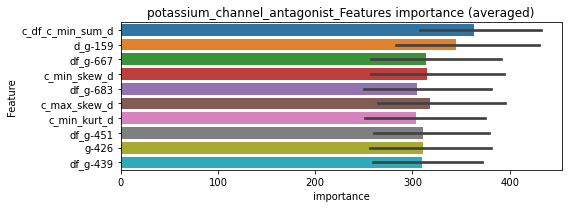

len(train_index) : 2978
len(valid_index) : 745
================================= fold 1/5 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0403798	valid_1's binary_logloss: 0.0847501
[2000]	training's binary_logloss: 0.0203712	valid_1's binary_logloss: 0.065603
[3000]	training's binary_logloss: 0.0134294	valid_1's binary_logloss: 0.0578267
[4000]	training's binary_logloss: 0.0100324	valid_1's binary_logloss: 0.0539395
[5000]	training's binary_logloss: 0.00804955	valid_1's binary_logloss: 0.05187
Early stopping, best iteration is:
[5388]	training's binary_logloss: 0.00746506	valid_1's binary_logloss: 0.051052


len(train_index) : 2978
len(valid_index) : 745
================================= fold 2/5 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0409757	valid_1's binary_logloss: 0.0818955
[2000]	training's binary_logloss: 0.0206919	valid_1's binary_logloss: 0.0637926
[3000]	training's binary_logloss: 0.0136961	valid_1's binary_logloss: 0.0576749
Early stopping, best iteration is:
[3323]	training's binary_logloss: 0.0123525	valid_1's binary_logloss: 0.0565726


len(train_index) : 2978
len(valid_index) : 745
================================= fold 3/5 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0416574	valid_1's binary_logloss: 0.0698771
[2000]	training's binary_logloss: 0.0208887	valid_1's binary_logloss: 0.0502645
[3000]	training's binary_logloss: 0.0137715	valid_1's binary_logloss: 0.042862
[4000]	training's binary_logloss: 0.0102817	valid_1's binary_logloss: 0.0390389
[5000]	training's binary_logloss: 0.00822534	valid_1's binary_logloss: 0.0365508
Early stopping, best iteration is:
[5518]	training's binary_logloss: 0.0074537	valid_1's binary_logloss: 0.0355006


len(train_index) : 2979
len(valid_index) : 744
================================= fold 4/5 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.041409	valid_1's binary_logloss: 0.0755205
[2000]	training's binary_logloss: 0.020801	valid_1's binary_logloss: 0.0558258
[3000]	training's binary_logloss: 0.0137434	valid_1's binary_logloss: 0.0488265
[4000]	training's binary_logloss: 0.0102437	valid_1's binary_logloss: 0.0450233
[5000]	training's binary_logloss: 0.00818744	valid_1's binary_logloss: 0.0427837
Early stopping, best iteration is:
[5809]	training's binary_logloss: 0.00705445	valid_1's binary_logloss: 0.0414449


len(train_index) : 2979
len(valid_index) : 744
================================= fold 5/5 potassium_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0414098	valid_1's binary_logloss: 0.0775443
[2000]	training's binary_logloss: 0.0207983	valid_1's binary_logloss: 0.058759
[3000]	training's binary_logloss: 0.0137172	valid_1's binary_logloss: 0.0517727
Early stopping, best iteration is:
[3775]	training's binary_logloss: 0.0108564	valid_1's binary_logloss: 0.0486949


potassium_channel_antagonist logloss: 0.046653834235235135
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0304604	valid_1's binary_logloss: 0.117655
Early stopping, best iteration is:
[1400]	training's binary_logloss: 0.0213466	valid_1's binary_logloss: 0.112588
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0323482	valid_1's binary_logloss: 0.0850073
[2000]	training's binary_logloss: 0.0153953	valid_1's binary_logloss: 0.0710842
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0149726	valid_1's binary_logloss: 0.0705456
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0313993	valid_1's binary_logloss: 0.106658
Early stopping, best iteration is:
[1325]	training's binary_logloss: 0.0233231	valid_1's binary_logloss: 0.101443
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0330347	valid_1's binary_logloss: 0.0750499
[2000]	training

1 / 3, AUC score:0.987, PR-AUC:0.974
y_Threshold: 0.0592346, Threshold: 0.1207214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 190 → Positive_corect_labels: 626/3741
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1207214, conf_0:0.08450, conf_1:0.15694
Num_p_label: 22.0, Expected: 19.2, Adj_threshold_1: 0.1507214
threshold: 0.1507214, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 626.0/3741, y_label_rate: 0.1673349
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262973	valid_1's binary_logloss: 0.0791224
[2000]	training's binary_logloss: 0.0126093	valid_1's binary_logloss: 0.065683
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0109786	valid_1's binary_logloss: 0.0642198
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262213	valid_1's binary_logloss: 0.0770515
[2000]	training's binary_logloss: 0.0126223	valid_1's binary_logloss: 0.0665937
Early stopping, best iteration is:
[2011]	training's binary_logloss: 0.0125472	valid_1's binary_logloss: 0.0664522
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262905	valid_1's binary_logloss: 0.0768623
[2000]	training's binary_logloss: 0.0126723	valid_1's binary_logloss: 0.0639333
Early stopping, best iteration is:
[2460]	training's binary_logloss: 0.0101908	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0808701, Threshold: 0.1507214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 612.0/3713
p_label_rate: 0.0095429 Vs.target_rate: 0.00483
Num_p_label: 38.0, Expected: 19.2, Threshold: 0.1507214, conf_0:0.12058, conf_1:0.18087
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_1: 0.1807214
threshold: 0.1807214, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 612.0/3713, y_label_rate: 0.1648263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0243613	valid_1's binary_logloss: 0.0735761
[2000]	training's binary_logloss: 0.011798	valid_1's binary_logloss: 0.0607515
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0112032	valid_1's binary_logloss: 0.0599545
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0243526	valid_1's binary_logloss: 0.0701227
[2000]	training's binary_logloss: 0.0117269	valid_1's binary_logloss: 0.0546684
Early stopping, best iteration is:
[2290]	training's binary_logloss: 0.0101788	valid_1's binary_logloss: 0.0526249
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0250901	valid_1's binary_logloss: 0.0568476
[2000]	training's binary_logloss: 0.0121567	valid_1's binary_logloss: 0.0430115
[3000]	training's binary_logloss: 0.00797545	valid_1's binary_logloss: 0.0380818
Early stopping, best iterat

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0820023, Threshold: 0.1807214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 606.0/3701
p_label_rate: 0.0052737 Vs.target_rate: 0.00483
Num_p_label: 21.0, Expected: 19.2, Threshold: 0.1807214, conf_0:0.16265, conf_1:0.19879
threshold: 0.1807214, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 606.0/3701, y_label_rate: 0.1637395


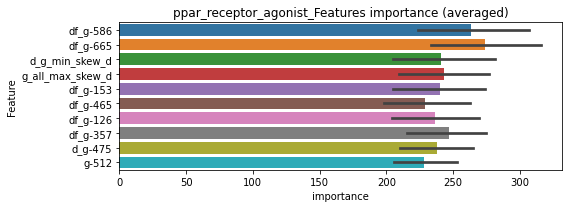

len(train_index) : 2960
len(valid_index) : 741
================================= fold 1/5 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0428928	valid_1's binary_logloss: 0.0856279
[2000]	training's binary_logloss: 0.021569	valid_1's binary_logloss: 0.0641372
Early stopping, best iteration is:
[2889]	training's binary_logloss: 0.0149237	valid_1's binary_logloss: 0.0565847


len(train_index) : 2961
len(valid_index) : 740
================================= fold 2/5 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0439534	valid_1's binary_logloss: 0.0786646
[2000]	training's binary_logloss: 0.0220671	valid_1's binary_logloss: 0.0582605
[3000]	training's binary_logloss: 0.014691	valid_1's binary_logloss: 0.0512374
Early stopping, best iteration is:
[3313]	training's binary_logloss: 0.013269	valid_1's binary_logloss: 0.0497823


len(train_index) : 2961
len(valid_index) : 740
================================= fold 3/5 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0454442	valid_1's binary_logloss: 0.072231
[2000]	training's binary_logloss: 0.0228698	valid_1's binary_logloss: 0.0478698
[3000]	training's binary_logloss: 0.0151797	valid_1's binary_logloss: 0.0393297
[4000]	training's binary_logloss: 0.0113167	valid_1's binary_logloss: 0.0349438
Early stopping, best iteration is:
[4830]	training's binary_logloss: 0.00935095	valid_1's binary_logloss: 0.0324637


len(train_index) : 2961
len(valid_index) : 740
================================= fold 4/5 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0447974	valid_1's binary_logloss: 0.0723351
[2000]	training's binary_logloss: 0.0225605	valid_1's binary_logloss: 0.0502578
[3000]	training's binary_logloss: 0.0149773	valid_1's binary_logloss: 0.042061
[4000]	training's binary_logloss: 0.0112108	valid_1's binary_logloss: 0.0378037
[5000]	training's binary_logloss: 0.00894442	valid_1's binary_logloss: 0.0349529
[6000]	training's binary_logloss: 0.0074552	valid_1's binary_logloss: 0.0331204
[7000]	training's binary_logloss: 0.00640992	valid_1's binary_logloss: 0.0318571
[8000]	training's binary_logloss: 0.00563132	valid_1's binary_logloss: 0.0308034
Early stopping, best iteration is:
[8321]	training's binary_logloss: 0.00541686	valid_1's binary_logloss: 0.0304759


len(train_index) : 2961
len(valid_index) : 740
================================= fold 5/5 ppar_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.041904	valid_1's binary_logloss: 0.0961652
[2000]	training's binary_logloss: 0.0211509	valid_1's binary_logloss: 0.077636
Early stopping, best iteration is:
[2687]	training's binary_logloss: 0.0157183	valid_1's binary_logloss: 0.0724798


ppar_receptor_agonist logloss: 0.04835951608431476
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000349094	valid_1's binary_logloss: 0.0014875
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000364514	valid_1's binary_logloss: 0.00601364
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.0135418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000366251	valid_1's binary_logloss: 0.0040703
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000361207	valid_1's binary_logloss: 0.00529379


y_Threshold: 0.0017567, Threshold: 0.0044228, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0044228, conf_0:0.00310, conf_1:0.00575
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0344228
threshold: 0.0344228, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00034215	valid_1's binary_logloss: 0.000876417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000355227	valid_1's binary_logloss: 0.00565568
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.0135498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035015	valid_1's binary_logloss: 0.00410565
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182374, Threshold: 0.0344228, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000381	valid_1's binary_logloss: 0.0070649


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0344228, conf_0:0.02754, conf_1:0.04131
threshold: 0.0344228, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00034215	valid_1's binary_logloss: 0.000876417
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000355227	valid_1's binary_logloss: 0.00565568
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000362613	valid_1's binary_logloss: 0.0135498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035015	valid_1's binary_logloss: 0.00410565
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182374, Threshold: 0.0344228, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000381	valid_1's binary_logloss: 0.0070649


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0344228, conf_0:0.03098, conf_1:0.03787
threshold: 0.0344228, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


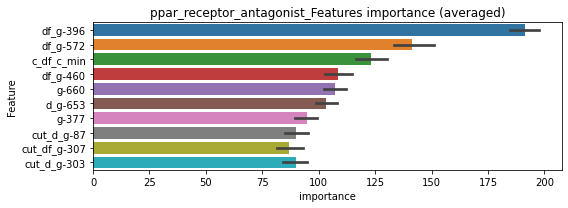

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000345415	valid_1's binary_logloss: 0.00093782
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000345455	valid_1's binary_logloss: 0.000937801


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000386233	valid_1's binary_logloss: 0.00553602


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000432445	valid_1's binary_logloss: 0.0107363


================================= fold 4/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000368988	valid_1's binary_logloss: 0.00259774


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000364385	valid_1's binary_logloss: 0.00522886


ppar_receptor_antagonist logloss: 0.005007348190376364
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.031353	valid_1's binary_logloss: 0.122614
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0229119	valid_1's binary_logloss: 0.116688
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.03254	valid_1's binary_logloss: 0.0927272
[2000]	training's binary_logloss: 0.0154629	valid_1's binary_logloss: 0.0776714
Early stopping, best iteration is:
[2507]	training's binary_logloss: 0.0121591	valid_1's binary_logloss: 0.0744792
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0314617	valid_1's binary_logloss: 0.114034
Early stopping, best iteration is:
[1501]	training's binary_logloss: 0.0204032	valid_1's binary_logloss: 0.106591
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0326279	valid_1's binary_logloss: 0.0788542
[2000]	training's 

1 / 3, AUC score:0.989, PR-AUC:0.975
y_Threshold: 0.0579679, Threshold: 0.2698057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 625/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2698057, conf_0:0.18886, conf_1:0.35075
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_1: 0.2998057
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_2: 0.3298057
threshold: 0.3298057, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 625.0/3733, y_label_rate: 0.1674257
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275196	valid_1's binary_logloss: 0.0776797
[2000]	training's binary_logloss: 0.0130905	valid_1's binary_logloss: 0.0627526
Early stopping, best iteration is:
[2957]	training's binary_logloss: 0.00868043	valid_1's binary_logloss: 0.0576553
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.027203	valid_1's binary_logloss: 0.0773778
[2000]	training's binary_logloss: 0.0129461	valid_1's binary_logloss: 0.0620671
Early stopping, best iteration is:
[2834]	training's binary_logloss: 0.00898678	valid_1's binary_logloss: 0.0570331
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0275412	valid_1's binary_logloss: 0.0781034
[2000]	training's binary_logloss: 0.0131421	valid_1's binary_logloss: 0.0636326
Early stopping, best iteration is:
[2854]	training's binary_logloss: 0.00904019	valid_1's binary_logloss: 

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0964050, Threshold: 0.3298057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 611.0/3705
p_label_rate: 0.0175791 Vs.target_rate: 0.00500
Num_p_label: 70.0, Expected: 19.9, Threshold: 0.3298057, conf_0:0.26384, conf_1:0.39577
Num_p_label: 63.0, Expected: 19.9, Adj_threshold_1: 0.3598057
Num_p_label: 58.0, Expected: 19.9, Adj_threshold_2: 0.3898057
Num_p_label: 56.0, Expected: 19.9, Adj_threshold_3: 0.4198057
Num_p_label: 48.0, Expected: 19.9, Adj_threshold_4: 0.4498057
Num_p_label: 41.0, Expected: 19.9, Adj_threshold_5: 0.4798057
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_6: 0.5098057
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_7: 0.5398057
threshold: 0.5398057, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 611.0/3705, y_label_rate: 0.1649123
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251991	valid_1's binary_logloss: 0.0802279
[2000]	training's binary_logloss: 0.0120878	valid_1's binary_logloss: 0.0659324
Early stopping, best iteration is:
[2292]	training's binary_logloss: 0.0104975	valid_1's binary_logloss: 0.0641936
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251963	valid_1's binary_logloss: 0.0743258
[2000]	training's binary_logloss: 0.0120663	valid_1's binary_logloss: 0.0615146
Early stopping, best iteration is:
[2893]	training's binary_logloss: 0.00820153	valid_1's binary_logloss: 0.0574653
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0260172	valid_1's binary_logloss: 0.0626925
[2000]	training's binary_logloss: 0.0123822	valid_1's binary_logloss: 0.0476245
[3000]	training's binary_logloss: 0.00812795	valid_1's binary_logloss: 0.0422272
Early stopping, best iter

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0836515, Threshold: 0.5398057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 601.0/3685
p_label_rate: 0.0107986 Vs.target_rate: 0.00500
Num_p_label: 43.0, Expected: 19.9, Threshold: 0.5398057, conf_0:0.48583, conf_1:0.59379
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_1: 0.5698057
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_2: 0.5998057
threshold: 0.5998057, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 601.0/3685, y_label_rate: 0.1630936


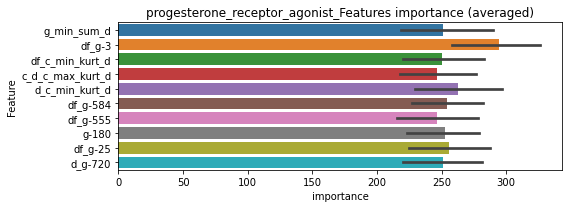

len(train_index) : 2948
len(valid_index) : 737
================================= fold 1/5 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0442114	valid_1's binary_logloss: 0.0940071
[2000]	training's binary_logloss: 0.0219789	valid_1's binary_logloss: 0.0729527
[3000]	training's binary_logloss: 0.0145017	valid_1's binary_logloss: 0.0653343
Early stopping, best iteration is:
[3315]	training's binary_logloss: 0.0130887	valid_1's binary_logloss: 0.0639256


len(train_index) : 2948
len(valid_index) : 737
================================= fold 2/5 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0447371	valid_1's binary_logloss: 0.0822577
[2000]	training's binary_logloss: 0.0223894	valid_1's binary_logloss: 0.0612475
[3000]	training's binary_logloss: 0.0147793	valid_1's binary_logloss: 0.0536502
[4000]	training's binary_logloss: 0.0110694	valid_1's binary_logloss: 0.050182
[5000]	training's binary_logloss: 0.00887875	valid_1's binary_logloss: 0.0480036
Early stopping, best iteration is:
[5115]	training's binary_logloss: 0.00867261	valid_1's binary_logloss: 0.0477492


len(train_index) : 2948
len(valid_index) : 737
================================= fold 3/5 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0447091	valid_1's binary_logloss: 0.0786574
[2000]	training's binary_logloss: 0.0225868	valid_1's binary_logloss: 0.0550524
[3000]	training's binary_logloss: 0.014917	valid_1's binary_logloss: 0.046982
[4000]	training's binary_logloss: 0.0111714	valid_1's binary_logloss: 0.0428315
[5000]	training's binary_logloss: 0.00896713	valid_1's binary_logloss: 0.0402412
[6000]	training's binary_logloss: 0.00748293	valid_1's binary_logloss: 0.0385699
[7000]	training's binary_logloss: 0.00643149	valid_1's binary_logloss: 0.0373132
Early stopping, best iteration is:
[7049]	training's binary_logloss: 0.00638734	valid_1's binary_logloss: 0.0372395


len(train_index) : 2948
len(valid_index) : 737
================================= fold 4/5 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0454484	valid_1's binary_logloss: 0.0753269
[2000]	training's binary_logloss: 0.0228553	valid_1's binary_logloss: 0.0508303
[3000]	training's binary_logloss: 0.0151087	valid_1's binary_logloss: 0.0419362
[4000]	training's binary_logloss: 0.0113159	valid_1's binary_logloss: 0.0374559
[5000]	training's binary_logloss: 0.00905862	valid_1's binary_logloss: 0.0348081
[6000]	training's binary_logloss: 0.00754335	valid_1's binary_logloss: 0.0326775
[7000]	training's binary_logloss: 0.00649436	valid_1's binary_logloss: 0.0312973
Early stopping, best iteration is:
[7440]	training's binary_logloss: 0.00612179	valid_1's binary_logloss: 0.0307062


len(train_index) : 2948
len(valid_index) : 737
================================= fold 5/5 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0428285	valid_1's binary_logloss: 0.0976727
[2000]	training's binary_logloss: 0.0215017	valid_1's binary_logloss: 0.0760771
[3000]	training's binary_logloss: 0.0142129	valid_1's binary_logloss: 0.0682043
Early stopping, best iteration is:
[3056]	training's binary_logloss: 0.0139584	valid_1's binary_logloss: 0.0679389


progesterone_receptor_agonist logloss: 0.04951187791281564
progesterone_receptor_agonist is unpredictable(><)!
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00025817	valid_1's binary_logloss: 0.000937478
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00026005	valid_1's binary_logloss: 0.000621819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000266523	valid_1's binary_logloss: 0.00193004
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000265418	valid_1's binary_logloss: 0.00168527
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015946, Threshold: 0.0070823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0070823, conf_0:0.00496, conf_1:0.00921
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0370823


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000263716	valid_1's binary_logloss: 0.00189284


threshold: 0.0370823, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000251818	valid_1's binary_logloss: 0.000710493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000250951	valid_1's binary_logloss: 0.000590893
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000252014	valid_1's binary_logloss: 0.00234418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000250733	valid_1's binary_logloss: 0.000886391
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0763108, Threshold: 0.0370823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0080362 Vs.target_rate: 0.00076
Num_p_label: 32.0, Expected: 3.0, Threshold: 0.0370823, conf_0:0.02967, conf_1:0.04450
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0670823
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0970823
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1270823


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000259949	valid_1's binary_logloss: 0.00317368


threshold: 0.1270823, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000251818	valid_1's binary_logloss: 0.000710493
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000250951	valid_1's binary_logloss: 0.000590893
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000252014	valid_1's binary_logloss: 0.00234418
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000250733	valid_1's binary_logloss: 0.000886391
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0763108, Threshold: 0.1270823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1270823, conf_0:0.11437, conf_1:0.13979
threshold: 0.1270823, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000259949	valid_1's binary_logloss: 0.00317368


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


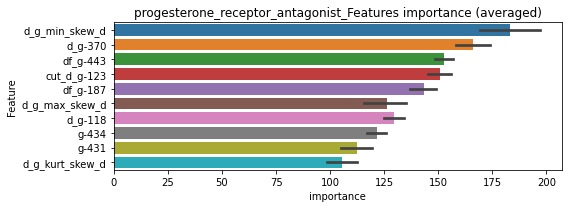

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000248394	valid_1's binary_logloss: 0.000629227


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000249893	valid_1's binary_logloss: 0.000551468


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000250122	valid_1's binary_logloss: 0.000980535


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000250933	valid_1's binary_logloss: 0.000754955


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000255929	valid_1's binary_logloss: 0.00196483


progesterone_receptor_antagonist logloss: 0.0009761422334323143
prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00040665	valid_1's binary_logloss: 0.00709105
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000428374	valid_1's binary_logloss: 0.00666136
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000407804	valid_1's binary_logloss: 0.0136115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000398267	valid_1's binary_logloss: 0.00219671
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000396525	valid_1's binary_logloss: 0.00389222


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023805, Threshold: 0.0121613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0121613, conf_0:0.00851, conf_1:0.01581
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0421613
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0721613
threshold: 0.0721613, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000438759	valid_1's binary_logloss: 0.00734797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000392653	valid_1's binary_logloss: 0.00563536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00038312	valid_1's binary_logloss: 0.0125457
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000372622	valid_1's binary_logloss: 0.00144821
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000385526	valid_1's binary_logloss: 0.00398082


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0148072, Threshold: 0.0721613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, Expected: 6.0, Threshold: 0.0721613, conf_0:0.05773, conf_1:0.08659
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.1021613
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1321613
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_3: 0.1621613
threshold: 0.1621613, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000438759	valid_1's binary_logloss: 0.00734797
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000392653	valid_1's binary_logloss: 0.00563536
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.00038312	valid_1's binary_logloss: 0.0125457
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000372622	valid_1's binary_logloss: 0.00144821
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000385526	valid_1's binary_logloss: 0.00398082


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0148072, Threshold: 0.1621613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, Expected: 6.0, Threshold: 0.1621613, conf_0:0.14595, conf_1:0.17838
threshold: 0.1621613, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


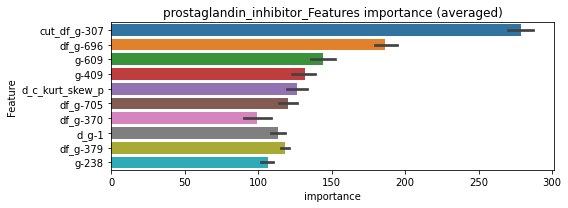

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000520998	valid_1's binary_logloss: 0.00741183


================================= fold 2/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000387672	valid_1's binary_logloss: 0.00505432


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000748548	valid_1's binary_logloss: 0.0155914
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000381633	valid_1's binary_logloss: 0.00163271


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000406886	valid_1's binary_logloss: 0.00209186


prostaglandin_inhibitor logloss: 0.006357306542926416
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00194457	valid_1's binary_logloss: 0.0508209
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00088923	valid_1's binary_logloss: 0.0362664
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00188304	valid_1's binary_logloss: 0.0478796
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00067661	valid_1's binary_logloss: 0.0179283
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000886264	valid_1's binary_logloss: 0.0306059


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0089370, Threshold: 0.0383943, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0383943, conf_0:0.02688, conf_1:0.04991
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_1: 0.0683943
Num_p_label: 17.0, Expected: 14.0, Adj_threshold_2: 0.0983943
threshold: 0.0983943, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00221638	valid_1's binary_logloss: 0.0430442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00117612	valid_1's binary_logloss: 0.0420865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.00105043	valid_1's binary_logloss: 0.0405895
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000660605	valid_1's binary_logloss: 0.0199234
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000640582	valid_1's binary_logloss: 0.0166191


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0306376, Threshold: 0.0983943, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0125565 Vs.target_rate: 0.00353
Num_p_label: 50.0, Expected: 14.0, Threshold: 0.0983943, conf_0:0.07872, conf_1:0.11807
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_1: 0.1283943
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_2: 0.1583943
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_3: 0.1883943
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2183943
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_5: 0.2483943
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_6: 0.2783943
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_7: 0.3083943
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_8: 0.3383943
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_9: 0.3683943
Num_p_label: 19.0, Expected: 14.0, Adj_threshold_10: 0.3983943
threshold: 0.3983943, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000947256	valid_1's binary_logloss: 0.0313066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000805199	valid_1's binary_logloss: 0.0254407
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000671763	valid_1's binary_logloss: 0.0339325
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000625442	valid_1's binary_logloss: 0.0130772
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0273237, Threshold: 0.3983943, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00114335	valid_1's binary_logloss: 0.033877


Remove_noisy_data: 8 → Positive_corect_labels: 638.0/3767
p_label_rate: 0.0070316 Vs.target_rate: 0.00353
Num_p_label: 28.0, Expected: 14.0, Threshold: 0.3983943, conf_0:0.35855, conf_1:0.43823
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_1: 0.4283943
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_2: 0.4583943
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_3: 0.4883943
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_4: 0.5183943
threshold: 0.5183943, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 638.0/3767, y_label_rate: 0.1693655


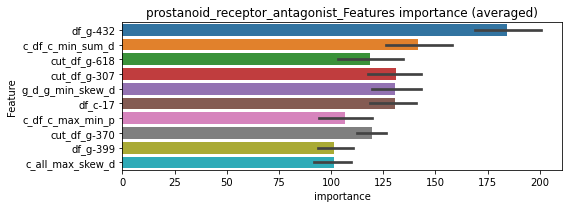

len(train_index) : 3013
len(valid_index) : 754
================================= fold 1/5 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000685471	valid_1's binary_logloss: 0.0234409


len(train_index) : 3013
len(valid_index) : 754
================================= fold 2/5 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3014
len(valid_index) : 753
================================= fold 3/5 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00172093	valid_1's binary_logloss: 0.0221713
Training until validation scores don't improve for 29 rounds


len(train_index) : 3014
len(valid_index) : 753
================================= fold 4/5 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00175155	valid_1's binary_logloss: 0.0356123
Training until validation scores don't improve for 29 rounds


len(train_index) : 3014
len(valid_index) : 753


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000949053	valid_1's binary_logloss: 0.0152202


================================= fold 5/5 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000884868	valid_1's binary_logloss: 0.040341


prostanoid_receptor_antagonist logloss: 0.027354706165237528


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0657873	valid_1's binary_logloss: 0.221357
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.0587361	valid_1's binary_logloss: 0.218696
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0652057	valid_1's binary_logloss: 0.226572
Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.0582743	valid_1's binary_logloss: 0.22467
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0669768	valid_1's binary_logloss: 0.201396
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0438854	valid_1's binary_logloss: 0.192268
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0650986	valid_1's binary_logloss: 0.22795
Early stopping, best iteration is:
[1173]	training's binary_logloss: 0.0547428	valid_1's binary_logl

1 / 3, AUC score:0.907, PR-AUC:0.849
y_Threshold: 0.1129915, Threshold: 0.1943344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1274 → Positive_corect_labels: 1613/11000
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1943344, conf_0:0.13603, conf_1:0.25263
threshold: 0.1943344, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1613.0/11000, y_label_rate: 0.1466364
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.037617	valid_1's binary_logloss: 0.111627
Early stopping, best iteration is:
[1893]	training's binary_logloss: 0.0181843	valid_1's binary_logloss: 0.0949717
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0376112	valid_1's binary_logloss: 0.105921
[2000]	training's binary_logloss: 0.0170445	valid_1's binary_logloss: 0.0871458
Early stopping, best iteration is:
[2351]	training's binary_logloss: 0.0142044	valid_1's binary_logloss: 0.0841221
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0369713	valid_1's binary_logloss: 0.11408
[2000]	training's binary_logloss: 0.0168299	valid_1's binary_logloss: 0.0955616
Early stopping, best iteration is:
[2267]	training's binary_logloss: 0.0145922	valid_1's binary_logloss: 0.0930866
Training until validation scores don't improve for 29 rounds
[1000]	training'

2 / 3, AUC score:0.992, PR-AUC:0.977
y_Threshold: 0.1016537, Threshold: 0.1943344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 224 → Positive_corect_labels: 1501.0/10776
p_label_rate: 0.0090407 Vs.target_rate: 0.03049
Num_p_label: 36.0, Expected: 121.4, Threshold: 0.1943344, conf_0:0.15547, conf_1:0.23320
threshold: 0.1943344, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 1501.0/10776, y_label_rate: 0.1392910
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0312656	valid_1's binary_logloss: 0.105389
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.0176434	valid_1's binary_logloss: 0.0921327
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0315745	valid_1's binary_logloss: 0.0964405
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0151042	valid_1's binary_logloss: 0.0796798
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0318971	valid_1's binary_logloss: 0.0925104
[2000]	training's binary_logloss: 0.0145162	valid_1's binary_logloss: 0.0758873
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.0140707	valid_1's binary_logloss: 0.0751619
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0317899	valid_1's binary_logloss: 0.0928776
[2000]	train

3 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0986419, Threshold: 0.1943344, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1441.0/10656
p_label_rate: 0.0070316 Vs.target_rate: 0.03049
Num_p_label: 28.0, Expected: 121.4, Threshold: 0.1943344, conf_0:0.17490, conf_1:0.21377
threshold: 0.1943344, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 1441.0/10656, y_label_rate: 0.1352290


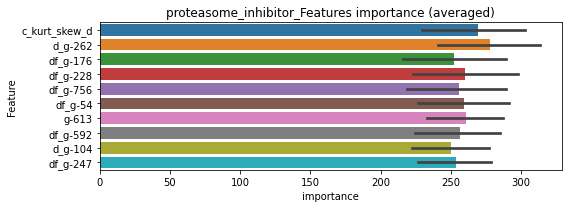

len(train_index) : 8524
len(valid_index) : 2132
================================= fold 1/5 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0526759	valid_1's binary_logloss: 0.107044
[2000]	training's binary_logloss: 0.025472	valid_1's binary_logloss: 0.081343
Early stopping, best iteration is:
[2625]	training's binary_logloss: 0.0189861	valid_1's binary_logloss: 0.0748611


len(train_index) : 8525
len(valid_index) : 2131
================================= fold 2/5 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0525828	valid_1's binary_logloss: 0.100747
[2000]	training's binary_logloss: 0.0254592	valid_1's binary_logloss: 0.074693
[3000]	training's binary_logloss: 0.016539	valid_1's binary_logloss: 0.0658244
[4000]	training's binary_logloss: 0.0121315	valid_1's binary_logloss: 0.0609127
Early stopping, best iteration is:
[4232]	training's binary_logloss: 0.0114278	valid_1's binary_logloss: 0.0601719


len(train_index) : 8525
len(valid_index) : 2131
================================= fold 3/5 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0514936	valid_1's binary_logloss: 0.118967
[2000]	training's binary_logloss: 0.0249623	valid_1's binary_logloss: 0.0934167
Early stopping, best iteration is:
[2331]	training's binary_logloss: 0.0210858	valid_1's binary_logloss: 0.0893078


len(train_index) : 8525
len(valid_index) : 2131
================================= fold 4/5 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0519812	valid_1's binary_logloss: 0.106127
[2000]	training's binary_logloss: 0.0252301	valid_1's binary_logloss: 0.0800677
[3000]	training's binary_logloss: 0.0163625	valid_1's binary_logloss: 0.0707844
Early stopping, best iteration is:
[3919]	training's binary_logloss: 0.012281	valid_1's binary_logloss: 0.0659096


len(train_index) : 8525
len(valid_index) : 2131
================================= fold 5/5 proteasome_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0525215	valid_1's binary_logloss: 0.110508
[2000]	training's binary_logloss: 0.0254179	valid_1's binary_logloss: 0.0841217
Early stopping, best iteration is:
[2870]	training's binary_logloss: 0.0172769	valid_1's binary_logloss: 0.0758669


proteasome_inhibitor logloss: 0.07322363026923598
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000471915	valid_1's binary_logloss: 0.0181575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000500754	valid_1's binary_logloss: 0.0112263
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000484174	valid_1's binary_logloss: 0.00198791
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000471456	valid_1's binary_logloss: 0.00330103
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000544527	valid_1's binary_logloss: 0.0181427


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036643, Threshold: 0.0093944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0093944, conf_0:0.00658, conf_1:0.01221
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_1: 0.0393944
threshold: 0.0393944, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000474444	valid_1's binary_logloss: 0.0166271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000469212	valid_1's binary_logloss: 0.00987779
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000467011	valid_1's binary_logloss: 0.00241278
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.00046735	valid_1's binary_logloss: 0.00338931
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000540088	valid_1's binary_logloss: 0.0168502


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168691, Threshold: 0.0393944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0027624 Vs.target_rate: 0.00202
Num_p_label: 11.0, Expected: 8.0, Threshold: 0.0393944, conf_0:0.03152, conf_1:0.04727
threshold: 0.0393944, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000507224	valid_1's binary_logloss: 0.0130457
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000468711	valid_1's binary_logloss: 0.00761805
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000454735	valid_1's binary_logloss: 0.00742659
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000460671	valid_1's binary_logloss: 0.00165951
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000455247	valid_1's binary_logloss: 0.0103619


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0194024, Threshold: 0.0393944, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0393944, conf_0:0.03545, conf_1:0.04333
threshold: 0.0393944, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


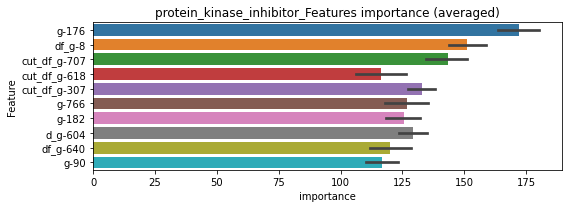

len(train_index) : 3042
len(valid_index) : 761
================================= fold 1/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000565513	valid_1's binary_logloss: 0.0136843


len(train_index) : 3042
len(valid_index) : 761
================================= fold 2/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000466629	valid_1's binary_logloss: 0.00786919


len(train_index) : 3042
len(valid_index) : 761
================================= fold 3/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000517812	valid_1's binary_logloss: 0.00769267


len(train_index) : 3043
len(valid_index) : 760
================================= fold 4/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000465842	valid_1's binary_logloss: 0.0018679
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000466069	valid_1's binary_logloss: 0.00186772


len(train_index) : 3043
len(valid_index) : 760
================================= fold 5/5 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000595742	valid_1's binary_logloss: 0.0102968


protein_kinase_inhibitor logloss: 0.0082848126363122
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000313531	valid_1's binary_logloss: 0.00444174
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000312627	valid_1's binary_logloss: 0.00126266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000315822	valid_1's binary_logloss: 0.00328534
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000310807	valid_1's binary_logloss: 0.000761949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00338767


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016095, Threshold: 0.0051878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051878, conf_0:0.00363, conf_1:0.00674
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0351878
threshold: 0.0351878, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000306678	valid_1's binary_logloss: 0.0036399
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000308576	valid_1's binary_logloss: 0.00122324
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000303125	valid_1's binary_logloss: 0.00291129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000308102	valid_1's binary_logloss: 0.00064466
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0473969, Threshold: 0.0351878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0351878, conf_0:0.02815, conf_1:0.04223


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000351341	valid_1's binary_logloss: 0.00249583


threshold: 0.0351878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000306678	valid_1's binary_logloss: 0.0036399
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000308576	valid_1's binary_logloss: 0.00122324
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000303125	valid_1's binary_logloss: 0.00291129
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000308102	valid_1's binary_logloss: 0.00064466
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0473969, Threshold: 0.0351878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0351878, conf_0:0.03167, conf_1:0.03871


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000351341	valid_1's binary_logloss: 0.00249583


threshold: 0.0351878, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


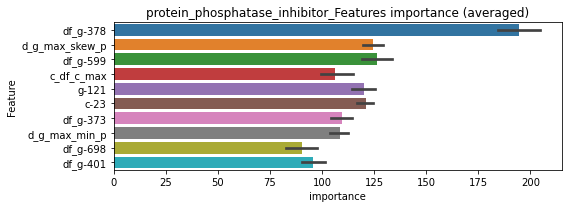

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00031218	valid_1's binary_logloss: 0.00295885


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000321905	valid_1's binary_logloss: 0.00146558


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000312101	valid_1's binary_logloss: 0.00267637


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000305793	valid_1's binary_logloss: 0.000646342


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000311796	valid_1's binary_logloss: 0.00189501


protein_phosphatase_inhibitor logloss: 0.0019286327398275436
protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0280329	valid_1's binary_logloss: 0.0962511
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0140391	valid_1's binary_logloss: 0.0844257
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0279166	valid_1's binary_logloss: 0.08727
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.0151902	valid_1's binary_logloss: 0.0787588
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0280602	valid_1's binary_logloss: 0.0928022
[2000]	training's binary_logloss: 0.0133057	valid_1's binary_logloss: 0.081116
Early stopping, best iteration is:
[2367]	training's binary_logloss: 0.0110957	valid_1's binary_logloss: 0.0797
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0295018	valid_1's binary_logloss: 0.0666761
[2000]	training's

1 / 3, AUC score:0.992, PR-AUC:0.984
y_Threshold: 0.0424135, Threshold: 0.1152014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 636/3759
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.1152014, conf_0:0.08064, conf_1:0.14976
Num_p_label: 30.0, Expected: 17.2, Adj_threshold_1: 0.1452014
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_2: 0.1752014
threshold: 0.1752014, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 636.0/3759, y_label_rate: 0.1691939
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0247611	valid_1's binary_logloss: 0.0720924
[2000]	training's binary_logloss: 0.0118224	valid_1's binary_logloss: 0.0597074
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0102999	valid_1's binary_logloss: 0.0580854
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0250644	valid_1's binary_logloss: 0.0658276
[2000]	training's binary_logloss: 0.0120032	valid_1's binary_logloss: 0.0552468
Early stopping, best iteration is:
[2130]	training's binary_logloss: 0.0112381	valid_1's binary_logloss: 0.0546035
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0250969	valid_1's binary_logloss: 0.0735001
[2000]	training's binary_logloss: 0.0120336	valid_1's binary_logloss: 0.0603047
[3000]	training's binary_logloss: 0.007854	valid_1's binary_logloss: 0.0555744
Early stopping, best iterati

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0603932, Threshold: 0.1752014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 623.0/3733
p_label_rate: 0.0070316 Vs.target_rate: 0.00433
Num_p_label: 28.0, Expected: 17.2, Threshold: 0.1752014, conf_0:0.14016, conf_1:0.21024
Num_p_label: 23.0, Expected: 17.2, Adj_threshold_1: 0.2052014
threshold: 0.2052014, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 623.0/3733, y_label_rate: 0.1668899
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234626	valid_1's binary_logloss: 0.067107
[2000]	training's binary_logloss: 0.0112828	valid_1's binary_logloss: 0.0549918
Early stopping, best iteration is:
[2569]	training's binary_logloss: 0.00866808	valid_1's binary_logloss: 0.0517921
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0234415	valid_1's binary_logloss: 0.0684649
[2000]	training's binary_logloss: 0.0112827	valid_1's binary_logloss: 0.0540941
[3000]	training's binary_logloss: 0.00741754	valid_1's binary_logloss: 0.048487
Early stopping, best iteration is:
[3218]	training's binary_logloss: 0.00691647	valid_1's binary_logloss: 0.0475903
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0239454	valid_1's binary_logloss: 0.0610587
[2000]	training's binary_logloss: 0.0114561	valid_1's binary_logloss: 0.0458846
Early stopping, best itera

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0679680, Threshold: 0.2052014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 616.0/3719
p_label_rate: 0.0060271 Vs.target_rate: 0.00433
Num_p_label: 24.0, Expected: 17.2, Threshold: 0.2052014, conf_0:0.18468, conf_1:0.22572
threshold: 0.2052014, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 616.0/3719, y_label_rate: 0.1656359


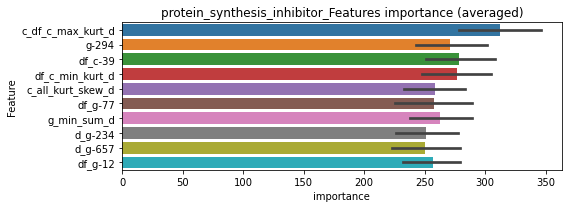

len(train_index) : 2975
len(valid_index) : 744
================================= fold 1/5 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.043312	valid_1's binary_logloss: 0.0741276
[2000]	training's binary_logloss: 0.0214316	valid_1's binary_logloss: 0.0514855
[3000]	training's binary_logloss: 0.0141029	valid_1's binary_logloss: 0.0432594
[4000]	training's binary_logloss: 0.010519	valid_1's binary_logloss: 0.0390652
[5000]	training's binary_logloss: 0.00842371	valid_1's binary_logloss: 0.0363891
[6000]	training's binary_logloss: 0.00701695	valid_1's binary_logloss: 0.0346898
Early stopping, best iteration is:
[6674]	training's binary_logloss: 0.00631672	valid_1's binary_logloss: 0.0336875


len(train_index) : 2975
len(valid_index) : 744
================================= fold 2/5 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.042215	valid_1's binary_logloss: 0.082237
[2000]	training's binary_logloss: 0.0210092	valid_1's binary_logloss: 0.0626349
[3000]	training's binary_logloss: 0.0138399	valid_1's binary_logloss: 0.0559039
[4000]	training's binary_logloss: 0.0103017	valid_1's binary_logloss: 0.0519368
Early stopping, best iteration is:
[4223]	training's binary_logloss: 0.00974957	valid_1's binary_logloss: 0.0512764


len(train_index) : 2975
len(valid_index) : 744
================================= fold 3/5 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0418436	valid_1's binary_logloss: 0.0929817
[2000]	training's binary_logloss: 0.02085	valid_1's binary_logloss: 0.0702518
Early stopping, best iteration is:
[2941]	training's binary_logloss: 0.0140461	valid_1's binary_logloss: 0.0628989


len(train_index) : 2975
len(valid_index) : 744
================================= fold 4/5 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0422659	valid_1's binary_logloss: 0.0795967
[2000]	training's binary_logloss: 0.0210387	valid_1's binary_logloss: 0.0582787
[3000]	training's binary_logloss: 0.0138888	valid_1's binary_logloss: 0.0507934
[4000]	training's binary_logloss: 0.0103865	valid_1's binary_logloss: 0.0465965
Early stopping, best iteration is:
[4508]	training's binary_logloss: 0.00921401	valid_1's binary_logloss: 0.0451466


len(train_index) : 2976
len(valid_index) : 743
================================= fold 5/5 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0421551	valid_1's binary_logloss: 0.0799981
[2000]	training's binary_logloss: 0.0210144	valid_1's binary_logloss: 0.0590372
[3000]	training's binary_logloss: 0.0138257	valid_1's binary_logloss: 0.0507905
[4000]	training's binary_logloss: 0.0102917	valid_1's binary_logloss: 0.0462795
[5000]	training's binary_logloss: 0.00824602	valid_1's binary_logloss: 0.0436154
Early stopping, best iteration is:
[5816]	training's binary_logloss: 0.00709481	valid_1's binary_logloss: 0.0420763


protein_synthesis_inhibitor logloss: 0.04701845545790013
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305528	valid_1's binary_logloss: 0.00249553
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000289975	valid_1's binary_logloss: 0.000780835
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000290785	valid_1's binary_logloss: 0.00397804
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000291069	valid_1's binary_logloss: 0.000642036
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014616, Threshold: 0.0045812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0045812, conf_0:0.00321, conf_1:0.00596
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0345812


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000292714	valid_1's binary_logloss: 0.00056642


threshold: 0.0345812, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000348338	valid_1's binary_logloss: 0.00197466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284578	valid_1's binary_logloss: 0.000514696
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000286231	valid_1's binary_logloss: 0.00487902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000282374	valid_1's binary_logloss: 0.000551394
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0326171, Threshold: 0.0345812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0345812, conf_0:0.02766, conf_1:0.04150


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000284771	valid_1's binary_logloss: 0.000496946


threshold: 0.0345812, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000348338	valid_1's binary_logloss: 0.00197466
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000284578	valid_1's binary_logloss: 0.000514696
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000286231	valid_1's binary_logloss: 0.00487902
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000282374	valid_1's binary_logloss: 0.000551394
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0326171, Threshold: 0.0345812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000284771	valid_1's binary_logloss: 0.000496946


Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0345812, conf_0:0.03112, conf_1:0.03804
threshold: 0.0345812, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


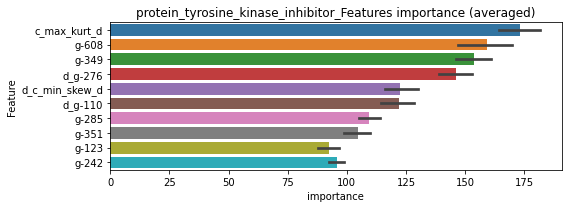

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000299126	valid_1's binary_logloss: 0.00247962


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000283342	valid_1's binary_logloss: 0.000552156


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000280515	valid_1's binary_logloss: 0.00270815


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000281314	valid_1's binary_logloss: 0.000483036
Early stopping, best iteration is:
[1063]	training's binary_logloss: 0.000279683	valid_1's binary_logloss: 0.000480773


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000281183	valid_1's binary_logloss: 0.000554314
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000281183	valid_1's binary_logloss: 0.000554314


protein_tyrosine_kinase_inhibitor logloss: 0.001355445608442113
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000546561	valid_1's binary_logloss: 0.0176555
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000513979	valid_1's binary_logloss: 0.00873856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000513355	valid_1's binary_logloss: 0.00598051
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00052616	valid_1's binary_logloss: 0.0046575
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000518441	valid_1's binary_logloss: 0.012766


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0045014, Threshold: 0.0109408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0109408, conf_0:0.00766, conf_1:0.01422
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0409408
threshold: 0.0409408, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000621133	valid_1's binary_logloss: 0.0146655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000504848	valid_1's binary_logloss: 0.0091133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000611384	valid_1's binary_logloss: 0.00644662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000523218	valid_1's binary_logloss: 0.00453115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000504957	valid_1's binary_logloss: 0.0125331


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0397406, Threshold: 0.0409408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0409408, conf_0:0.03275, conf_1:0.04913
threshold: 0.0409408, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000621133	valid_1's binary_logloss: 0.0146655
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000504848	valid_1's binary_logloss: 0.0091133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000611384	valid_1's binary_logloss: 0.00644662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000523218	valid_1's binary_logloss: 0.00453115
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000504957	valid_1's binary_logloss: 0.0125331


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0397406, Threshold: 0.0409408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0409408, conf_0:0.03685, conf_1:0.04503
threshold: 0.0409408, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


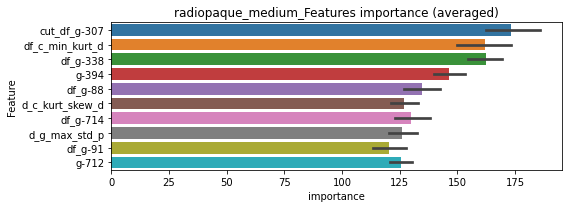

len(train_index) : 3044
len(valid_index) : 762
================================= fold 1/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000705991	valid_1's binary_logloss: 0.0147933


len(train_index) : 3045
len(valid_index) : 761
================================= fold 2/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.00055673	valid_1's binary_logloss: 0.00734772


len(train_index) : 3045
len(valid_index) : 761
================================= fold 3/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000511608	valid_1's binary_logloss: 0.00580019
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.00051	valid_1's binary_logloss: 0.00579008


len(train_index) : 3045
len(valid_index) : 761
================================= fold 4/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000530596	valid_1's binary_logloss: 0.00425863


len(train_index) : 3045
len(valid_index) : 761
================================= fold 5/5 radiopaque_medium=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000533252	valid_1's binary_logloss: 0.00939184


radiopaque_medium logloss: 0.008320394847229982
raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0544983	valid_1's binary_logloss: 0.220644
Early stopping, best iteration is:
[1196]	training's binary_logloss: 0.0450134	valid_1's binary_logloss: 0.215793
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0549519	valid_1's binary_logloss: 0.202544
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0276708	valid_1's binary_logloss: 0.184714
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0549217	valid_1's binary_logloss: 0.208477
Early stopping, best iteration is:
[1713]	training's binary_logloss: 0.0308653	valid_1's binary_logloss: 0.196923
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0553786	valid_1's binary_logloss: 0.204194
Early stopping, best iteration is:
[1305]	training's binary_logloss: 0.0415331	valid_1's binary_lo

1 / 3, AUC score:0.929, PR-AUC:0.883
y_Threshold: 0.1129668, Threshold: 0.4656694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 341 → Positive_corect_labels: 546/3568
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.4656694, conf_0:0.32597, conf_1:0.60537
threshold: 0.4656694, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 546.0/3568, y_label_rate: 0.1530269
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0387989	valid_1's binary_logloss: 0.13047
[2000]	training's binary_logloss: 0.0184458	valid_1's binary_logloss: 0.107307
Early stopping, best iteration is:
[2831]	training's binary_logloss: 0.0127986	valid_1's binary_logloss: 0.100148
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0398093	valid_1's binary_logloss: 0.115058
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0198585	valid_1's binary_logloss: 0.0953012
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0391209	valid_1's binary_logloss: 0.119443
[2000]	training's binary_logloss: 0.0185746	valid_1's binary_logloss: 0.0993324
Early stopping, best iteration is:
[2225]	training's binary_logloss: 0.0165698	valid_1's binary_logloss: 0.0974203
Training until validation scores don't improve for 29 rounds
[1000]	training's

2 / 3, AUC score:0.989, PR-AUC:0.972
y_Threshold: 0.1127675, Threshold: 0.4656694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 507.0/3490
p_label_rate: 0.0258664 Vs.target_rate: 0.00936
Num_p_label: 103.0, Expected: 37.3, Threshold: 0.4656694, conf_0:0.37254, conf_1:0.55880
Num_p_label: 99.0, Expected: 37.3, Adj_threshold_1: 0.4956694
Num_p_label: 94.0, Expected: 37.3, Adj_threshold_2: 0.5256694
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_3: 0.5556694
Num_p_label: 86.0, Expected: 37.3, Adj_threshold_4: 0.5856694
Num_p_label: 80.0, Expected: 37.3, Adj_threshold_5: 0.6156694
Num_p_label: 75.0, Expected: 37.3, Adj_threshold_6: 0.6456694
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_7: 0.6756694
Num_p_label: 61.0, Expected: 37.3, Adj_threshold_8: 0.7056694
Num_p_label: 47.0, Expected: 37.3, Adj_threshold_9: 0.7356694
threshold: 0.7356694, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 507.0/3490, y_label_rate: 0.1452722
=========

Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0343403	valid_1's binary_logloss: 0.11967
Early stopping, best iteration is:
[1841]	training's binary_logloss: 0.0177457	valid_1's binary_logloss: 0.101745
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344424	valid_1's binary_logloss: 0.115455
[2000]	training's binary_logloss: 0.0163676	valid_1's binary_logloss: 0.0936531
Early stopping, best iteration is:
[2528]	training's binary_logloss: 0.01279	valid_1's binary_logloss: 0.0891391
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0346481	valid_1's binary_logloss: 0.11468
[2000]	training's binary_logloss: 0.0164307	valid_1's binary_logloss: 0.0935665
Early stopping, best iteration is:
[2236]	training's binary_logloss: 0.0146176	valid_1's binary_logloss: 0.0910369
Training until validation scores don't improve for 29 rounds
[1000]	training's b

3 / 3, AUC score:0.995, PR-AUC:0.983
y_Threshold: 0.1182660, Threshold: 0.7356694, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 482.0/3440
p_label_rate: 0.0208438 Vs.target_rate: 0.00936
Num_p_label: 83.0, Expected: 37.3, Threshold: 0.7356694, conf_0:0.66210, conf_1:0.80924
Num_p_label: 74.0, Expected: 37.3, Adj_threshold_1: 0.7656694
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_2: 0.7956694
Num_p_label: 53.0, Expected: 37.3, Adj_threshold_3: 0.8256694
threshold: 0.8256694, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 482.0/3440, y_label_rate: 0.1401163


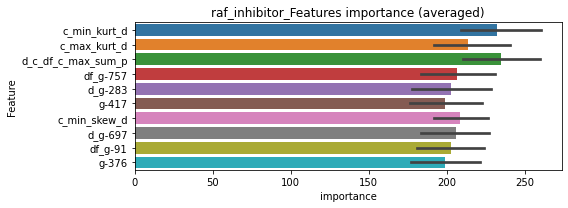

len(train_index) : 2752
len(valid_index) : 688
================================= fold 1/5 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0580556	valid_1's binary_logloss: 0.136301
[2000]	training's binary_logloss: 0.0288369	valid_1's binary_logloss: 0.105377
[3000]	training's binary_logloss: 0.0189664	valid_1's binary_logloss: 0.0935153
Early stopping, best iteration is:
[3482]	training's binary_logloss: 0.0162474	valid_1's binary_logloss: 0.0899972


len(train_index) : 2752
len(valid_index) : 688
================================= fold 2/5 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0589794	valid_1's binary_logloss: 0.131673
[2000]	training's binary_logloss: 0.0290463	valid_1's binary_logloss: 0.102858
[3000]	training's binary_logloss: 0.0191712	valid_1's binary_logloss: 0.093113
Early stopping, best iteration is:
[3448]	training's binary_logloss: 0.0165617	valid_1's binary_logloss: 0.0902852


len(train_index) : 2752
len(valid_index) : 688
================================= fold 3/5 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0611591	valid_1's binary_logloss: 0.110689
[2000]	training's binary_logloss: 0.0302534	valid_1's binary_logloss: 0.0748776
[3000]	training's binary_logloss: 0.019879	valid_1's binary_logloss: 0.0617102
[4000]	training's binary_logloss: 0.0147763	valid_1's binary_logloss: 0.0549477
Early stopping, best iteration is:
[4920]	training's binary_logloss: 0.0119588	valid_1's binary_logloss: 0.0508475


len(train_index) : 2752
len(valid_index) : 688
================================= fold 4/5 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0584449	valid_1's binary_logloss: 0.128073
[2000]	training's binary_logloss: 0.029142	valid_1's binary_logloss: 0.100037
[3000]	training's binary_logloss: 0.0192608	valid_1's binary_logloss: 0.0892499
Early stopping, best iteration is:
[3239]	training's binary_logloss: 0.0177873	valid_1's binary_logloss: 0.0876325


len(train_index) : 2752
len(valid_index) : 688
================================= fold 5/5 raf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0594476	valid_1's binary_logloss: 0.11842
[2000]	training's binary_logloss: 0.0293874	valid_1's binary_logloss: 0.0874602
[3000]	training's binary_logloss: 0.0193373	valid_1's binary_logloss: 0.0753103
[4000]	training's binary_logloss: 0.0143874	valid_1's binary_logloss: 0.0694413
Early stopping, best iteration is:
[4831]	training's binary_logloss: 0.0118617	valid_1's binary_logloss: 0.066049


raf_inhibitor logloss: 0.07696227986390218
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000227165	valid_1's binary_logloss: 0.00184662
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000227255	valid_1's binary_logloss: 0.00043856
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000241843	valid_1's binary_logloss: 0.00166404
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000223199	valid_1's binary_logloss: 0.000922679
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009340, Threshold: 0.0095533, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0095533, conf_0:0.00669, conf_1:0.01242
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_1: 0.0395533
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.0695533
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.0995533
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.1295533
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.1595533
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1895533
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.2195533


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000227282	valid_1's binary_logloss: 0.00189984


threshold: 0.2195533, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000210738	valid_1's binary_logloss: 0.00118692
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000209374	valid_1's binary_logloss: 0.000277286
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00022475	valid_1's binary_logloss: 0.000869916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000211705	valid_1's binary_logloss: 0.000899112
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406101, Threshold: 0.2195533, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2195533, conf_0:0.17564, conf_1:0.26346
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2495533
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.2795533
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3095533
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_4: 0.3395533


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000209716	valid_1's binary_logloss: 0.00276173


Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.3695533
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_6: 0.3995533
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.4295533
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_8: 0.4595533
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.4895533
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_10: 0.5195533
threshold: 0.5195533, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000210738	valid_1's binary_logloss: 0.00118692
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000209374	valid_1's binary_logloss: 0.000277286
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00022475	valid_1's binary_logloss: 0.000869916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000211705	valid_1's binary_logloss: 0.000899112
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406101, Threshold: 0.5195533, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, Expected: 2.0, Threshold: 0.5195533, conf_0:0.46760, conf_1:0.57151
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.5495533
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.5795533
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6095533


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000209716	valid_1's binary_logloss: 0.00276173


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6395533
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.6695533
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.6995533
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.7295533
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.7595533
threshold: 0.7595533, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


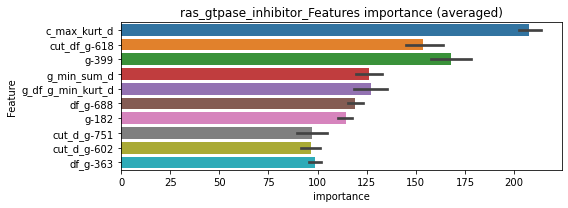

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000206402	valid_1's binary_logloss: 0.000722057
Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000210884	valid_1's binary_logloss: 0.000275708
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000207778	valid_1's binary_logloss: 0.000643912
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000213856	valid_1's binary_logloss: 0.000442702
Training until validation scores don't improve for 29 rounds


ras_gtpase_inhibitor logloss: 0.0006111662191980233


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00021404	valid_1's binary_logloss: 0.000971654


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000555623	valid_1's binary_logloss: 0.0138876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000543637	valid_1's binary_logloss: 0.0161422
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000554723	valid_1's binary_logloss: 0.0122687
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00110195	valid_1's binary_logloss: 0.0276859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000622526	valid_1's binary_logloss: 0.0218982


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0070470, Threshold: 0.1027319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1027319, conf_0:0.07191, conf_1:0.13355
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_1: 0.1327319
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1627319
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_3: 0.1927319
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.2227319
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_5: 0.2527319
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_6: 0.2827319
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_7: 0.3127319
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_8: 0.3427319
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_9: 0.3727319
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_10: 0.4027319
threshold: 0.4027319, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000566897	valid_1's binary_logloss: 0.0117812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000521554	valid_1's binary_logloss: 0.016076
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000531481	valid_1's binary_logloss: 0.0135181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000717887	valid_1's binary_logloss: 0.0216128
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000524751	valid_1's binary_logloss: 0.00610467


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0357632, Threshold: 0.4027319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3788
p_label_rate: 0.0072828 Vs.target_rate: 0.00281
Num_p_label: 29.0, Expected: 11.2, Threshold: 0.4027319, conf_0:0.32219, conf_1:0.48328
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4327319
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4627319
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_3: 0.4927319
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5227319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_5: 0.5527319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_6: 0.5827319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6127319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6427319
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6727319
threshold: 0.6727319, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
===========

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00061379	valid_1's binary_logloss: 0.0162725
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000586359	valid_1's binary_logloss: 0.0194813
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000534371	valid_1's binary_logloss: 0.0139135
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000580495	valid_1's binary_logloss: 0.01661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000533626	valid_1's binary_logloss: 0.00535698


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0385224, Threshold: 0.6727319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6727319, conf_0:0.60546, conf_1:0.74001
threshold: 0.6727319, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3784, y_label_rate: 0.1709831


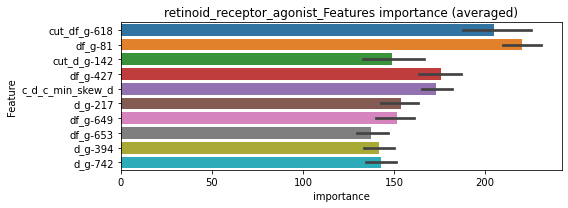

len(train_index) : 3027
len(valid_index) : 757
================================= fold 1/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000724192	valid_1's binary_logloss: 0.0231361


len(train_index) : 3027
len(valid_index) : 757
================================= fold 2/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000551672	valid_1's binary_logloss: 0.0119744


len(train_index) : 3027
len(valid_index) : 757
================================= fold 3/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000740158	valid_1's binary_logloss: 0.0106146


len(train_index) : 3027
len(valid_index) : 757
================================= fold 4/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000688602	valid_1's binary_logloss: 0.0148873


len(train_index) : 3028
len(valid_index) : 756
================================= fold 5/5 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000696599	valid_1's binary_logloss: 0.0105826


retinoid_receptor_agonist logloss: 0.014240482683678599
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000148282	valid_1's binary_logloss: 0.000938453
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000147071	valid_1's binary_logloss: 0.000193401
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00014671	valid_1's binary_logloss: 0.000310843
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000146568	valid_1's binary_logloss: 0.000176383
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004020, Threshold: 0.0016466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0016466, conf_0:0.00115, conf_1:0.00214
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0316466
threshold: 0.0316466, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000148706	valid_1's binary_logloss: 0.000177772


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000137037	valid_1's binary_logloss: 0.000181261
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000136811	valid_1's binary_logloss: 0.000143702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00014237	valid_1's binary_logloss: 0.00472897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000136239	valid_1's binary_logloss: 0.00016901
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0159959, Threshold: 0.0316466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00025
Num_p_label: 12.0, Expected: 1.0, Threshold: 0.0316466, conf_0:0.02532, conf_1:0.03798
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0616466
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0916466
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1216466
threshold: 0.1216466, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00013699	valid_1's binary_logloss: 0.00014194


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000137037	valid_1's binary_logloss: 0.000181261
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000136811	valid_1's binary_logloss: 0.000143702
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00014237	valid_1's binary_logloss: 0.00472897
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000136239	valid_1's binary_logloss: 0.00016901
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0159959, Threshold: 0.1216466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1216466, conf_0:0.10948, conf_1:0.13381
threshold: 0.1216466, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00013699	valid_1's binary_logloss: 0.00014194


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


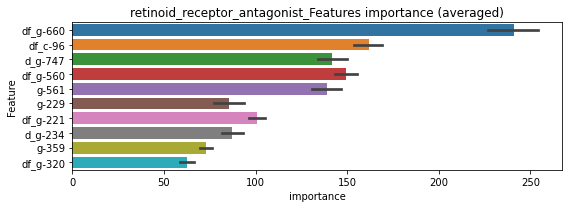

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140413	valid_1's binary_logloss: 0.000186651


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1184]	training's binary_logloss: 0.000137636	valid_1's binary_logloss: 0.000183434
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140689	valid_1's binary_logloss: 0.000146957
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000140019	valid_1's binary_logloss: 0.000146246


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 retinoid_receptor_antagonist=================================


[1000]	training's binary_logloss: 0.000139894	valid_1's binary_logloss: 0.00232768
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000140137	valid_1's binary_logloss: 0.00232631
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000141343	valid_1's binary_logloss: 0.00017172


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1165]	training's binary_logloss: 0.000138532	valid_1's binary_logloss: 0.000168403
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000140518	valid_1's binary_logloss: 0.000151973


retinoid_receptor_antagonist logloss: 0.0005951858740828022


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000138317	valid_1's binary_logloss: 0.000149641


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00038246	valid_1's binary_logloss: 0.00573451
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000371028	valid_1's binary_logloss: 0.00565823
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000369313	valid_1's binary_logloss: 0.000975041
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000379626	valid_1's binary_logloss: 0.00166396
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000370587	valid_1's binary_logloss: 0.00869037


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027160, Threshold: 0.0082456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0082456, conf_0:0.00577, conf_1:0.01072
Num_p_label: 7.0, Expected: 5.9, Adj_threshold_1: 0.0382456
threshold: 0.0382456, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000381169	valid_1's binary_logloss: 0.00501193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000351948	valid_1's binary_logloss: 0.00441378
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000367346	valid_1's binary_logloss: 0.00098489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00036098	valid_1's binary_logloss: 0.00107207
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000355937	valid_1's binary_logloss: 0.00861244


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0275590, Threshold: 0.0382456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00147
Num_p_label: 16.0, Expected: 5.9, Threshold: 0.0382456, conf_0:0.03060, conf_1:0.04589
Num_p_label: 9.0, Expected: 5.9, Adj_threshold_1: 0.0682456
threshold: 0.0682456, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000381169	valid_1's binary_logloss: 0.00501193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000351948	valid_1's binary_logloss: 0.00441378
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000367346	valid_1's binary_logloss: 0.00098489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00036098	valid_1's binary_logloss: 0.00107207
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000355937	valid_1's binary_logloss: 0.00861244


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0275590, Threshold: 0.0682456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00147
Num_p_label: 9.0, Expected: 5.9, Threshold: 0.0682456, conf_0:0.06142, conf_1:0.07507
threshold: 0.0682456, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


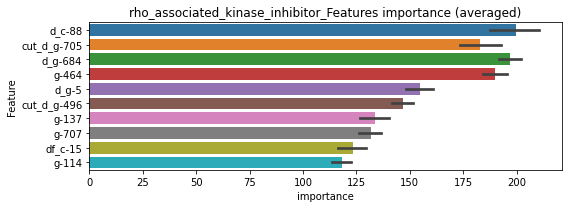

len(train_index) : 3046
len(valid_index) : 762
================================= fold 1/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000372699	valid_1's binary_logloss: 0.00347249


len(train_index) : 3046
len(valid_index) : 762
================================= fold 2/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[954]	training's binary_logloss: 0.000364982	valid_1's binary_logloss: 0.00473075


len(train_index) : 3046
len(valid_index) : 762
================================= fold 3/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000372592	valid_1's binary_logloss: 0.000979476
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000368948	valid_1's binary_logloss: 0.00097335


len(train_index) : 3047
len(valid_index) : 761
================================= fold 4/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000363907	valid_1's binary_logloss: 0.00118431
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000359991	valid_1's binary_logloss: 0.00117577


len(train_index) : 3047
len(valid_index) : 761
================================= fold 5/5 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000366018	valid_1's binary_logloss: 0.00761172


rho_associated_kinase_inhibitor logloss: 0.003592437396546637
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000407654	valid_1's binary_logloss: 0.00596126
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000408551	valid_1's binary_logloss: 0.00285097
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000411792	valid_1's binary_logloss: 0.0125916
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00039783	valid_1's binary_logloss: 0.00463106
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000411266	valid_1's binary_logloss: 0.00466858


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037851, Threshold: 0.0171780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0171780, conf_0:0.01202, conf_1:0.02233
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0471780
threshold: 0.0471780, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000385097	valid_1's binary_logloss: 0.00533514
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000396129	valid_1's binary_logloss: 0.0035181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000400964	valid_1's binary_logloss: 0.0125993
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000390147	valid_1's binary_logloss: 0.00354809
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000406947	valid_1's binary_logloss: 0.00597021


y_Threshold: 0.0419038, Threshold: 0.0471780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0118031 Vs.target_rate: 0.00155
Num_p_label: 47.0, Expected: 6.2, Threshold: 0.0471780, conf_0:0.03774, conf_1:0.05661
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_1: 0.0771780
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1071780
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_3: 0.1371780
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.1671780
threshold: 0.1671780, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.0003794	valid_1's binary_logloss: 0.0057023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000380326	valid_1's binary_logloss: 0.00683865
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000388999	valid_1's binary_logloss: 0.000866049
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000384171	valid_1's binary_logloss: 0.00155587
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000412723	valid_1's binary_logloss: 0.00759057


y_Threshold: 0.0490477, Threshold: 0.1671780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.1671780, conf_0:0.15046, conf_1:0.18390
threshold: 0.1671780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


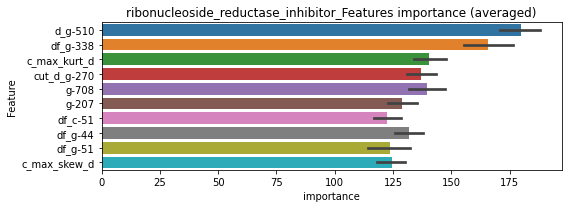

len(train_index) : 3047
len(valid_index) : 762
================================= fold 1/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000387679	valid_1's binary_logloss: 0.00500082


len(train_index) : 3047
len(valid_index) : 762
================================= fold 2/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000380467	valid_1's binary_logloss: 0.00446458


len(train_index) : 3047
len(valid_index) : 762
================================= fold 3/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00038795	valid_1's binary_logloss: 0.000903193
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.00038795	valid_1's binary_logloss: 0.000903193


len(train_index) : 3047
len(valid_index) : 762
================================= fold 4/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000390534	valid_1's binary_logloss: 0.00153032


len(train_index) : 3048
len(valid_index) : 761
================================= fold 5/5 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000422852	valid_1's binary_logloss: 0.00621068


ribonucleoside_reductase_inhibitor logloss: 0.0036222593963575024
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000335918	valid_1's binary_logloss: 0.00160528
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000329277	valid_1's binary_logloss: 0.00333665
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000320633	valid_1's binary_logloss: 0.00242066
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00034628	valid_1's binary_logloss: 0.00079765
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019505, Threshold: 0.0055758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000338777	valid_1's binary_logloss: 0.000999844


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0055758, conf_0:0.00390, conf_1:0.00725
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0355758
threshold: 0.0355758, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000327746	valid_1's binary_logloss: 0.00141385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000318841	valid_1's binary_logloss: 0.00226637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00031438	valid_1's binary_logloss: 0.00156214
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000322533	valid_1's binary_logloss: 0.000710851
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000317911	valid_1's binary_logloss: 0.000905745


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1197702, Threshold: 0.0355758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, Expected: 4.2, Threshold: 0.0355758, conf_0:0.02846, conf_1:0.04269
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0655758
threshold: 0.0655758, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000327746	valid_1's binary_logloss: 0.00141385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000318841	valid_1's binary_logloss: 0.00226637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00031438	valid_1's binary_logloss: 0.00156214
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000322533	valid_1's binary_logloss: 0.000710851
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1197702, Threshold: 0.0655758, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000317911	valid_1's binary_logloss: 0.000905745


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0655758, conf_0:0.05902, conf_1:0.07213
threshold: 0.0655758, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


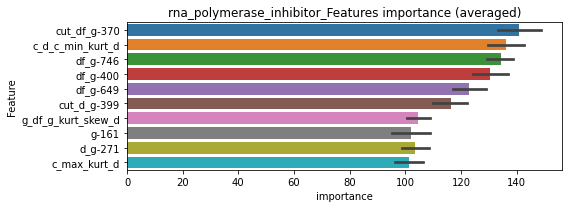

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.00032315	valid_1's binary_logloss: 0.00116674


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000328093	valid_1's binary_logloss: 0.00396172


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000315015	valid_1's binary_logloss: 0.00121593


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00032512	valid_1's binary_logloss: 0.000670577


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000327815	valid_1's binary_logloss: 0.00121251


rna_polymerase_inhibitor logloss: 0.0016455799306892029


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 6230
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 6230


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0349134	valid_1's binary_logloss: 0.119896
Early stopping, best iteration is:
[1485]	training's binary_logloss: 0.0227614	valid_1's binary_logloss: 0.113964
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344897	valid_1's binary_logloss: 0.128314
Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.0284357	valid_1's binary_logloss: 0.125641
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0342314	valid_1's binary_logloss: 0.122977
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.0299923	valid_1's binary_logloss: 0.12143
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0366214	valid_1's binary_logloss: 0.0908936
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0213217	valid_1's binary_lo

1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0652693, Threshold: 0.1182573, pos_neg_ratio: 0.8000000
Remove_noisy_data: 456 → Positive_corect_labels: 1143/7020
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1182573, conf_0:0.08278, conf_1:0.15373
threshold: 0.1182573, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1143.0/7020, y_label_rate: 0.1628205
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0240346	valid_1's binary_logloss: 0.0657594
[2000]	training's binary_logloss: 0.0113025	valid_1's binary_logloss: 0.0564976
Early stopping, best iteration is:
[2300]	training's binary_logloss: 0.00972786	valid_1's binary_logloss: 0.0552988
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0225504	valid_1's binary_logloss: 0.0838824
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0129625	valid_1's binary_logloss: 0.076824
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0242452	valid_1's binary_logloss: 0.0561983
[2000]	training's binary_logloss: 0.0113507	valid_1's binary_logloss: 0.0466369
Early stopping, best iteration is:
[2457]	training's binary_logloss: 0.0090948	valid_1's binary_logloss: 0.0448099
Training until validation scores don't improve for 29 rounds
[1000]	trai

2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0725131, Threshold: 0.1182573, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1100.0/6934
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.1182573, conf_0:0.09461, conf_1:0.14191
threshold: 0.1182573, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1100.0/6934, y_label_rate: 0.1586386
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0195008	valid_1's binary_logloss: 0.058184
[2000]	training's binary_logloss: 0.00920471	valid_1's binary_logloss: 0.0503757
Early stopping, best iteration is:
[2153]	training's binary_logloss: 0.0085058	valid_1's binary_logloss: 0.0498019
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0191318	valid_1's binary_logloss: 0.0623029
Early stopping, best iteration is:
[1669]	training's binary_logloss: 0.0110193	valid_1's binary_logloss: 0.0559265
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0196882	valid_1's binary_logloss: 0.0550598
[2000]	training's binary_logloss: 0.00924814	valid_1's binary_logloss: 0.0467506
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.00877482	valid_1's binary_logloss: 0.0463885
Training until validation scores don't improve for 29 rounds
[1000]	tr

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0665440, Threshold: 0.1182573, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1077.0/6888
p_label_rate: 0.0128076 Vs.target_rate: 0.00991
Num_p_label: 51.0, Expected: 39.5, Threshold: 0.1182573, conf_0:0.10643, conf_1:0.13008
threshold: 0.1182573, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1077.0/6888, y_label_rate: 0.1563589


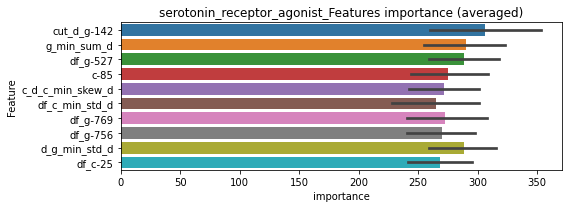

len(train_index) : 5510
len(valid_index) : 1378
================================= fold 1/5 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0326386	valid_1's binary_logloss: 0.0571494
[2000]	training's binary_logloss: 0.0161568	valid_1's binary_logloss: 0.041782
[3000]	training's binary_logloss: 0.0106838	valid_1's binary_logloss: 0.0364677
[4000]	training's binary_logloss: 0.00796282	valid_1's binary_logloss: 0.0336214
Early stopping, best iteration is:
[4443]	training's binary_logloss: 0.00715972	valid_1's binary_logloss: 0.0328989


len(train_index) : 5510
len(valid_index) : 1378
================================= fold 2/5 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0325817	valid_1's binary_logloss: 0.0553928
[2000]	training's binary_logloss: 0.016081	valid_1's binary_logloss: 0.0406721
[3000]	training's binary_logloss: 0.010589	valid_1's binary_logloss: 0.0357637
[4000]	training's binary_logloss: 0.00791283	valid_1's binary_logloss: 0.033377
Early stopping, best iteration is:
[4549]	training's binary_logloss: 0.00694068	valid_1's binary_logloss: 0.0325342


len(train_index) : 5510
len(valid_index) : 1378
================================= fold 3/5 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0316722	valid_1's binary_logloss: 0.0632012
[2000]	training's binary_logloss: 0.0156657	valid_1's binary_logloss: 0.0483814
[3000]	training's binary_logloss: 0.010341	valid_1's binary_logloss: 0.0435977
Early stopping, best iteration is:
[3333]	training's binary_logloss: 0.00928766	valid_1's binary_logloss: 0.0426066


len(train_index) : 5511
len(valid_index) : 1377
================================= fold 4/5 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0324205	valid_1's binary_logloss: 0.0569928
[2000]	training's binary_logloss: 0.0160236	valid_1's binary_logloss: 0.041372
[3000]	training's binary_logloss: 0.0105976	valid_1's binary_logloss: 0.0363113
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.00835837	valid_1's binary_logloss: 0.0343386


len(train_index) : 5511
len(valid_index) : 1377
================================= fold 5/5 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0319594	valid_1's binary_logloss: 0.060399
[2000]	training's binary_logloss: 0.0158377	valid_1's binary_logloss: 0.0457827
[3000]	training's binary_logloss: 0.0104749	valid_1's binary_logloss: 0.041352
Early stopping, best iteration is:
[3224]	training's binary_logloss: 0.00971765	valid_1's binary_logloss: 0.0405812


serotonin_receptor_agonist logloss: 0.03659165411769518
serotonin_receptor_agonist is unpredictable(><)!


mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 7510
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 7510


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0514038	valid_1's binary_logloss: 0.149843
[2000]	training's binary_logloss: 0.0246128	valid_1's binary_logloss: 0.135791
Early stopping, best iteration is:
[2175]	training's binary_logloss: 0.0225832	valid_1's binary_logloss: 0.134953
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0494817	valid_1's binary_logloss: 0.184675
Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.0411392	valid_1's binary_logloss: 0.181331
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0523191	valid_1's binary_logloss: 0.161733
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.0326503	valid_1's binary_logloss: 0.149264
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0511685	valid_1's binary_logloss: 0.173663
Early stopping, bes

1 / 3, AUC score:0.957, PR-AUC:0.917
y_Threshold: 0.0926471, Threshold: 0.1918833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 651 → Positive_corect_labels: 1327/8361
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1918833, conf_0:0.13432, conf_1:0.24945
threshold: 0.1918833, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1327.0/8361, y_label_rate: 0.1587131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0347488	valid_1's binary_logloss: 0.111655
Early stopping, best iteration is:
[1749]	training's binary_logloss: 0.0185615	valid_1's binary_logloss: 0.0967853
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0344884	valid_1's binary_logloss: 0.112758
[2000]	training's binary_logloss: 0.0158413	valid_1's binary_logloss: 0.0940303
Early stopping, best iteration is:
[2902]	training's binary_logloss: 0.0105342	valid_1's binary_logloss: 0.0881287
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0355402	valid_1's binary_logloss: 0.103826
Early stopping, best iteration is:
[1753]	training's binary_logloss: 0.0187146	valid_1's binary_logloss: 0.0872496
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0353385	valid_1's binary_logloss: 0.108409
Early stopping,

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.1166647, Threshold: 0.1918833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 1244.0/8195
p_label_rate: 0.0143144 Vs.target_rate: 0.01696
Num_p_label: 57.0, Expected: 67.6, Threshold: 0.1918833, conf_0:0.15351, conf_1:0.23026
threshold: 0.1918833, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 1244.0/8195, y_label_rate: 0.1517999
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0306629	valid_1's binary_logloss: 0.0883872
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.0159291	valid_1's binary_logloss: 0.0731023
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0304836	valid_1's binary_logloss: 0.0868305
[2000]	training's binary_logloss: 0.0140189	valid_1's binary_logloss: 0.0693103
Early stopping, best iteration is:
[1980]	training's binary_logloss: 0.0141588	valid_1's binary_logloss: 0.0692233
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0302641	valid_1's binary_logloss: 0.0916622
[2000]	training's binary_logloss: 0.0139423	valid_1's binary_logloss: 0.0743934
Early stopping, best iteration is:
[2385]	training's binary_logloss: 0.0114895	valid_1's binary_logloss: 0.0710854
Training until validation scores don't improve for 29 rounds
[1000]	trai

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.1175435, Threshold: 0.1918833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1201.0/8109
p_label_rate: 0.0138122 Vs.target_rate: 0.01696
Num_p_label: 55.0, Expected: 67.6, Threshold: 0.1918833, conf_0:0.17269, conf_1:0.21107
threshold: 0.1918833, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1201.0/8109, y_label_rate: 0.1481070


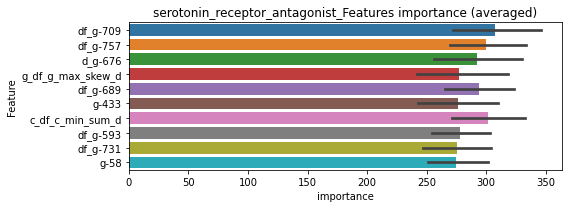

len(train_index) : 6487
len(valid_index) : 1622
================================= fold 1/5 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0513599	valid_1's binary_logloss: 0.0961385
[2000]	training's binary_logloss: 0.0251342	valid_1's binary_logloss: 0.0682117
[3000]	training's binary_logloss: 0.0163893	valid_1's binary_logloss: 0.058141
[4000]	training's binary_logloss: 0.012138	valid_1's binary_logloss: 0.0528593
[5000]	training's binary_logloss: 0.00962438	valid_1's binary_logloss: 0.0494673
Early stopping, best iteration is:
[5343]	training's binary_logloss: 0.00898775	valid_1's binary_logloss: 0.0486566


len(train_index) : 6487
len(valid_index) : 1622
================================= fold 2/5 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0498585	valid_1's binary_logloss: 0.112148
[2000]	training's binary_logloss: 0.0244378	valid_1's binary_logloss: 0.090313
[3000]	training's binary_logloss: 0.0159192	valid_1's binary_logloss: 0.082736
Early stopping, best iteration is:
[3002]	training's binary_logloss: 0.0159042	valid_1's binary_logloss: 0.0827223


len(train_index) : 6487
len(valid_index) : 1622
================================= fold 3/5 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0509924	valid_1's binary_logloss: 0.100097
[2000]	training's binary_logloss: 0.0249246	valid_1's binary_logloss: 0.0747899
[3000]	training's binary_logloss: 0.0163085	valid_1's binary_logloss: 0.0659655
Early stopping, best iteration is:
[3784]	training's binary_logloss: 0.0127702	valid_1's binary_logloss: 0.0619216


len(train_index) : 6487
len(valid_index) : 1622
================================= fold 4/5 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0508715	valid_1's binary_logloss: 0.0975935
[2000]	training's binary_logloss: 0.0248735	valid_1's binary_logloss: 0.071256
[3000]	training's binary_logloss: 0.0162665	valid_1's binary_logloss: 0.0617527
Early stopping, best iteration is:
[3665]	training's binary_logloss: 0.0131842	valid_1's binary_logloss: 0.057946


len(train_index) : 6488
len(valid_index) : 1621
================================= fold 5/5 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0501042	valid_1's binary_logloss: 0.108918
[2000]	training's binary_logloss: 0.0245417	valid_1's binary_logloss: 0.0863983
Early stopping, best iteration is:
[2880]	training's binary_logloss: 0.0167421	valid_1's binary_logloss: 0.0795564


serotonin_receptor_antagonist logloss: 0.06615894678180208
serotonin_receptor_antagonist is unpredictable(><)!
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000519768	valid_1's binary_logloss: 0.0145013
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000503981	valid_1's binary_logloss: 0.00890266
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000470498	valid_1's binary_logloss: 0.0145949
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000450244	valid_1's binary_logloss: 0.00552272
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00046266	valid_1's binary_logloss: 0.0156394


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028025, Threshold: 0.0329394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0329394, conf_0:0.02306, conf_1:0.04282
Num_p_label: 17.0, Expected: 7.4, Adj_threshold_1: 0.0629394
threshold: 0.0629394, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000457378	valid_1's binary_logloss: 0.0125202
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000452194	valid_1's binary_logloss: 0.0101796
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000503561	valid_1's binary_logloss: 0.0172419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000463975	valid_1's binary_logloss: 0.00638475
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000437511	valid_1's binary_logloss: 0.0138983


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315014, Threshold: 0.0629394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0271220 Vs.target_rate: 0.00185
Num_p_label: 108.0, Expected: 7.4, Threshold: 0.0629394, conf_0:0.05035, conf_1:0.07553
Num_p_label: 81.0, Expected: 7.4, Adj_threshold_1: 0.0929394
Num_p_label: 71.0, Expected: 7.4, Adj_threshold_2: 0.1229394
Num_p_label: 64.0, Expected: 7.4, Adj_threshold_3: 0.1529394
Num_p_label: 55.0, Expected: 7.4, Adj_threshold_4: 0.1829394
Num_p_label: 50.0, Expected: 7.4, Adj_threshold_5: 0.2129394
Num_p_label: 46.0, Expected: 7.4, Adj_threshold_6: 0.2429394
Num_p_label: 41.0, Expected: 7.4, Adj_threshold_7: 0.2729394
Num_p_label: 37.0, Expected: 7.4, Adj_threshold_8: 0.3029394
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_9: 0.3329394
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_10: 0.3629394
threshold: 0.3629394, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_l

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000435342	valid_1's binary_logloss: 0.016152
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000444556	valid_1's binary_logloss: 0.0055489
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000444057	valid_1's binary_logloss: 0.0141385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000445015	valid_1's binary_logloss: 0.00609498
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000434369	valid_1's binary_logloss: 0.00866515


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0437664, Threshold: 0.3629394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0087896 Vs.target_rate: 0.00185
Num_p_label: 35.0, Expected: 7.4, Threshold: 0.3629394, conf_0:0.32665, conf_1:0.39923
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_1: 0.3929394
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_2: 0.4229394
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_3: 0.4529394
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_4: 0.4829394
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_5: 0.5129394
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_6: 0.5429394
threshold: 0.5429394, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


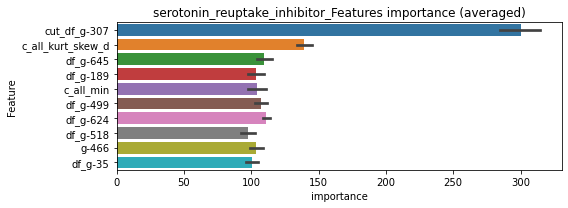

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000458321	valid_1's binary_logloss: 0.0106994


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000474014	valid_1's binary_logloss: 0.00868738


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000479668	valid_1's binary_logloss: 0.00848461


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00468986


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000454729	valid_1's binary_logloss: 0.00504692


serotonin_reuptake_inhibitor logloss: 0.007522776344006372
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000402225	valid_1's binary_logloss: 0.0073808
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000405646	valid_1's binary_logloss: 0.00798026
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000379424	valid_1's binary_logloss: 0.0143842
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000380892	valid_1's binary_logloss: 0.00260143
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000395487	valid_1's binary_logloss: 0.00391572


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021789, Threshold: 0.0290844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0290844, conf_0:0.02036, conf_1:0.03781
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0590844
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0890844
threshold: 0.0890844, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000372695	valid_1's binary_logloss: 0.00699421
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000371726	valid_1's binary_logloss: 0.00655522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000361918	valid_1's binary_logloss: 0.0145785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000383128	valid_1's binary_logloss: 0.00191491
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000372432	valid_1's binary_logloss: 0.00255626


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224255, Threshold: 0.0890844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0890844, conf_0:0.07127, conf_1:0.10690
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1190844
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_2: 0.1490844
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_3: 0.1790844
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.2090844
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_5: 0.2390844
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_6: 0.2690844
threshold: 0.2690844, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000372695	valid_1's binary_logloss: 0.00699421
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000371726	valid_1's binary_logloss: 0.00655522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000361918	valid_1's binary_logloss: 0.0145785
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000383128	valid_1's binary_logloss: 0.00191491
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000372432	valid_1's binary_logloss: 0.00255626


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224255, Threshold: 0.2690844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2690844, conf_0:0.24218, conf_1:0.29599
threshold: 0.2690844, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


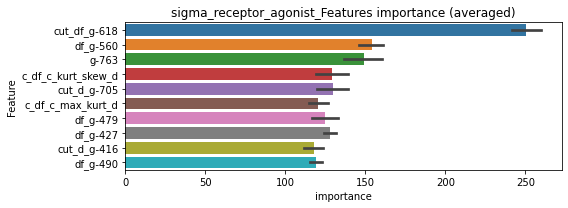

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000399995	valid_1's binary_logloss: 0.00488072


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000408465	valid_1's binary_logloss: 0.0086762


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000380918	valid_1's binary_logloss: 0.0121945


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000388139	valid_1's binary_logloss: 0.00182153


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 sigma_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000381232	valid_1's binary_logloss: 0.00249525


sigma_receptor_agonist logloss: 0.006013881954773332
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000425678	valid_1's binary_logloss: 0.0055703
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000433913	valid_1's binary_logloss: 0.00917269
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000473717	valid_1's binary_logloss: 0.0150189
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000410615	valid_1's binary_logloss: 0.00237763
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000444509	valid_1's binary_logloss: 0.0051678


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027935, Threshold: 0.0088192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0088192, conf_0:0.00617, conf_1:0.01146
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0388192
threshold: 0.0388192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000404945	valid_1's binary_logloss: 0.00567326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000440041	valid_1's binary_logloss: 0.00997271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000444697	valid_1's binary_logloss: 0.0124561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000398252	valid_1's binary_logloss: 0.0016229
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000414255	valid_1's binary_logloss: 0.00477215


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189743, Threshold: 0.0388192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0388192, conf_0:0.03106, conf_1:0.04658
threshold: 0.0388192, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000404945	valid_1's binary_logloss: 0.00567326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000440041	valid_1's binary_logloss: 0.00997271
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000444697	valid_1's binary_logloss: 0.0124561
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000398252	valid_1's binary_logloss: 0.0016229
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000414255	valid_1's binary_logloss: 0.00477215


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0189743, Threshold: 0.0388192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0388192, conf_0:0.03494, conf_1:0.04270
threshold: 0.0388192, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


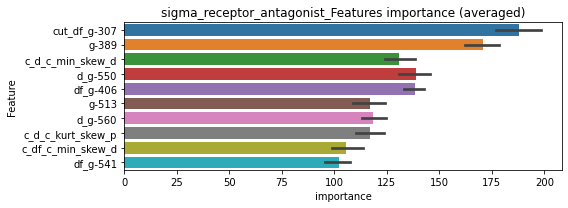

len(train_index) : 3041
len(valid_index) : 761
================================= fold 1/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000406621	valid_1's binary_logloss: 0.00415696


len(train_index) : 3041
len(valid_index) : 761
================================= fold 2/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3042
len(valid_index) : 760
================================= fold 3/5 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00049008	valid_1's binary_logloss: 0.00931395
Training until validation scores don't improve for 29 rounds


len(train_index) : 3042
len(valid_index) : 760
================================= fold 4/5 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000548013	valid_1's binary_logloss: 0.0120621
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.00041199	valid_1's binary_logloss: 0.00162919


len(train_index) : 3042
len(valid_index) : 760
================================= fold 5/5 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000496661	valid_1's binary_logloss: 0.00413177


sigma_receptor_antagonist logloss: 0.006259329225422603
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000314424	valid_1's binary_logloss: 0.0013076
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00033697	valid_1's binary_logloss: 0.00298705
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000301707	valid_1's binary_logloss: 0.00287289
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00031496	valid_1's binary_logloss: 0.000637917
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000311411	valid_1's binary_logloss: 0.000898785


y_Threshold: 0.0017238, Threshold: 0.0049702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0049702, conf_0:0.00348, conf_1:0.00646
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0349702
threshold: 0.0349702, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000302382	valid_1's binary_logloss: 0.00129756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000326628	valid_1's binary_logloss: 0.00398956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000296871	valid_1's binary_logloss: 0.00263782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000307898	valid_1's binary_logloss: 0.000570607
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000305213	valid_1's binary_logloss: 0.000790576


y_Threshold: 0.0511721, Threshold: 0.0349702, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0349702, conf_0:0.02798, conf_1:0.04196
threshold: 0.0349702, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000302382	valid_1's binary_logloss: 0.00129756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000326628	valid_1's binary_logloss: 0.00398956
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000296871	valid_1's binary_logloss: 0.00263782
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000307898	valid_1's binary_logloss: 0.000570607
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0511721, Threshold: 0.0349702, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000305213	valid_1's binary_logloss: 0.000790576


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0349702, conf_0:0.03147, conf_1:0.03847
threshold: 0.0349702, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


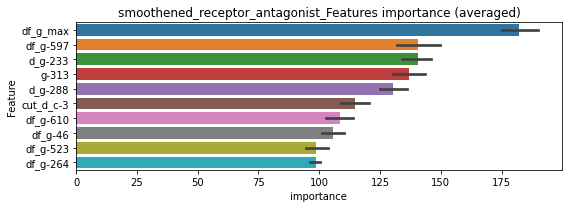

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000305096	valid_1's binary_logloss: 0.00110607


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000332177	valid_1's binary_logloss: 0.00291136


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000300202	valid_1's binary_logloss: 0.0024426


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000312038	valid_1's binary_logloss: 0.000569215


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000309158	valid_1's binary_logloss: 0.000766216


smoothened_receptor_antagonist logloss: 0.001559122879047925


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0349098	valid_1's binary_logloss: 0.108527
Early stopping, best iteration is:
[1934]	training's binary_logloss: 0.0165517	valid_1's binary_logloss: 0.0975789
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0349931	valid_1's binary_logloss: 0.113945
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0221928	valid_1's binary_logloss: 0.107647
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0340252	valid_1's binary_logloss: 0.126632
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0279737	valid_1's binary_logloss: 0.123571
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0351006	valid_1's binary_logloss: 0.11283
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0210036	valid_1's binary_lo

1 / 3, AUC score:0.980, PR-AUC:0.956
y_Threshold: 0.0636847, Threshold: 0.1260108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 477 → Positive_corect_labels: 1271/7755
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.1260108, conf_0:0.08821, conf_1:0.16381
threshold: 0.1260108, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1271.0/7755, y_label_rate: 0.1638943
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0247646	valid_1's binary_logloss: 0.0922441
Early stopping, best iteration is:
[1381]	training's binary_logloss: 0.0173463	valid_1's binary_logloss: 0.0882451
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0254425	valid_1's binary_logloss: 0.0714574
Early stopping, best iteration is:
[1824]	training's binary_logloss: 0.0130923	valid_1's binary_logloss: 0.0619904
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0251742	valid_1's binary_logloss: 0.0827992
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0122004	valid_1's binary_logloss: 0.0729777
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0253049	valid_1's binary_logloss: 0.0799789
Early stopping, best iteration is:
[1820]	training's binary_logloss: 0.0129883	valid_1's bi

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0752824, Threshold: 0.1260108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1212.0/7637
p_label_rate: 0.0135610 Vs.target_rate: 0.01121
Num_p_label: 54.0, Expected: 44.6, Threshold: 0.1260108, conf_0:0.10081, conf_1:0.15121
threshold: 0.1260108, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 1212.0/7637, y_label_rate: 0.1587011
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0204496	valid_1's binary_logloss: 0.0651851
Early stopping, best iteration is:
[1908]	training's binary_logloss: 0.0100619	valid_1's binary_logloss: 0.0566268
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0208305	valid_1's binary_logloss: 0.0583675
Early stopping, best iteration is:
[1542]	training's binary_logloss: 0.012907	valid_1's binary_logloss: 0.0516032
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0208542	valid_1's binary_logloss: 0.057181
[2000]	training's binary_logloss: 0.00978184	valid_1's binary_logloss: 0.047068
Early stopping, best iteration is:
[2791]	training's binary_logloss: 0.00687622	valid_1's binary_logloss: 0.0440883
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0210246	valid_1's binary_logloss: 0.0543867
[2000]	train

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0730932, Threshold: 0.1260108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 1192.0/7597
p_label_rate: 0.0105475 Vs.target_rate: 0.01121
Num_p_label: 42.0, Expected: 44.6, Threshold: 0.1260108, conf_0:0.11341, conf_1:0.13861
threshold: 0.1260108, positive_p_label: 42.0/3982, p_label_rate: 0.0105475
positive_y_label: 1192.0/7597, y_label_rate: 0.1569040


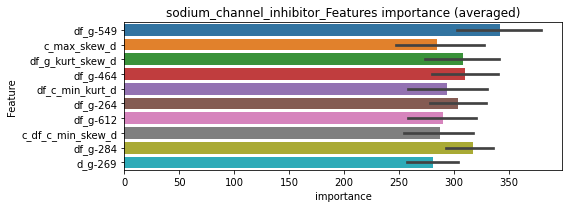

len(train_index) : 6077
len(valid_index) : 1520
================================= fold 1/5 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.035189	valid_1's binary_logloss: 0.068583
[2000]	training's binary_logloss: 0.0174718	valid_1's binary_logloss: 0.0514487
[3000]	training's binary_logloss: 0.0114827	valid_1's binary_logloss: 0.045589
Early stopping, best iteration is:
[3504]	training's binary_logloss: 0.00977088	valid_1's binary_logloss: 0.0437954


len(train_index) : 6077
len(valid_index) : 1520
================================= fold 2/5 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0352975	valid_1's binary_logloss: 0.0638176
[2000]	training's binary_logloss: 0.0174885	valid_1's binary_logloss: 0.0485039
[3000]	training's binary_logloss: 0.0114885	valid_1's binary_logloss: 0.0432077
[4000]	training's binary_logloss: 0.00851738	valid_1's binary_logloss: 0.0405185
Early stopping, best iteration is:
[4091]	training's binary_logloss: 0.00832231	valid_1's binary_logloss: 0.0404192


len(train_index) : 6078
len(valid_index) : 1519
================================= fold 3/5 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.03516	valid_1's binary_logloss: 0.0644148
[2000]	training's binary_logloss: 0.0174803	valid_1's binary_logloss: 0.0490059
[3000]	training's binary_logloss: 0.0114352	valid_1's binary_logloss: 0.0438421
Early stopping, best iteration is:
[3509]	training's binary_logloss: 0.00971891	valid_1's binary_logloss: 0.0421506


len(train_index) : 6078
len(valid_index) : 1519
================================= fold 4/5 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0346829	valid_1's binary_logloss: 0.0756345
[2000]	training's binary_logloss: 0.0173144	valid_1's binary_logloss: 0.0609665
[3000]	training's binary_logloss: 0.0113864	valid_1's binary_logloss: 0.0554687
Early stopping, best iteration is:
[3140]	training's binary_logloss: 0.0108624	valid_1's binary_logloss: 0.0550039


len(train_index) : 6078
len(valid_index) : 1519
================================= fold 5/5 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0351022	valid_1's binary_logloss: 0.0636806
[2000]	training's binary_logloss: 0.0174329	valid_1's binary_logloss: 0.0494037
[3000]	training's binary_logloss: 0.0114073	valid_1's binary_logloss: 0.0441983
[4000]	training's binary_logloss: 0.00847827	valid_1's binary_logloss: 0.0414348
Early stopping, best iteration is:
[4027]	training's binary_logloss: 0.00842206	valid_1's binary_logloss: 0.0413653


sodium_channel_inhibitor logloss: 0.04454625197908273
sodium_channel_inhibitor is unpredictable(><)!
sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000421397	valid_1's binary_logloss: 0.00539468
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000387137	valid_1's binary_logloss: 0.0035064
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000374889	valid_1's binary_logloss: 0.00888445
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000364614	valid_1's binary_logloss: 0.00141279
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000377014	valid_1's binary_logloss: 0.00210721


y_Threshold: 0.0020875, Threshold: 0.0059015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0059015, conf_0:0.00413, conf_1:0.00767
Num_p_label: 2.0, Expected: 5.4, Adj_threshold_1: 0.0359015
threshold: 0.0359015, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000400105	valid_1's binary_logloss: 0.00528388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000366187	valid_1's binary_logloss: 0.00313231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000372356	valid_1's binary_logloss: 0.00859238
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000365267	valid_1's binary_logloss: 0.0011344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000365555	valid_1's binary_logloss: 0.00215386


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234927, Threshold: 0.0359015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00134
Num_p_label: 8.0, Expected: 5.4, Threshold: 0.0359015, conf_0:0.02872, conf_1:0.04308
threshold: 0.0359015, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000400105	valid_1's binary_logloss: 0.00528388
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000366187	valid_1's binary_logloss: 0.00313231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000372356	valid_1's binary_logloss: 0.00859238
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000365267	valid_1's binary_logloss: 0.0011344
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000365555	valid_1's binary_logloss: 0.00215386


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234927, Threshold: 0.0359015, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00134
Num_p_label: 8.0, Expected: 5.4, Threshold: 0.0359015, conf_0:0.03231, conf_1:0.03949
threshold: 0.0359015, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


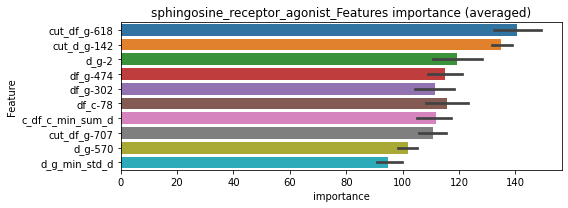

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000441644	valid_1's binary_logloss: 0.00502696


================================= fold 2/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000374298	valid_1's binary_logloss: 0.00249991


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000378958	valid_1's binary_logloss: 0.00680273


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000370851	valid_1's binary_logloss: 0.00107097


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.00038055	valid_1's binary_logloss: 0.00183477


sphingosine_receptor_agonist logloss: 0.0034470691511043023
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00121524	valid_1's binary_logloss: 0.0540798
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000964443	valid_1's binary_logloss: 0.032447
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000575406	valid_1's binary_logloss: 0.0102596
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000589424	valid_1's binary_logloss: 0.00363003
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000839759	valid_1's binary_logloss: 0.0349243


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0064560, Threshold: 0.0434334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0434334, conf_0:0.03040, conf_1:0.05646
Num_p_label: 22.0, Expected: 11.9, Adj_threshold_1: 0.0734334
Num_p_label: 17.0, Expected: 11.9, Adj_threshold_2: 0.1034334
threshold: 0.1034334, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00067044	valid_1's binary_logloss: 0.0275256
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000587348	valid_1's binary_logloss: 0.0255959
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000602878	valid_1's binary_logloss: 0.0171767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000555163	valid_1's binary_logloss: 0.00495406
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000670866	valid_1's binary_logloss: 0.0288128


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170448, Threshold: 0.1034334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0077850 Vs.target_rate: 0.00298
Num_p_label: 31.0, Expected: 11.9, Threshold: 0.1034334, conf_0:0.08275, conf_1:0.12412
Num_p_label: 26.0, Expected: 11.9, Adj_threshold_1: 0.1334334
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_2: 0.1634334
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_3: 0.1934334
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_4: 0.2234334
threshold: 0.2234334, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3795, y_label_rate: 0.1712780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000636689	valid_1's binary_logloss: 0.0217387
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000564313	valid_1's binary_logloss: 0.0269681
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000724811	valid_1's binary_logloss: 0.014081
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000592951	valid_1's binary_logloss: 0.0180969
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000546567	valid_1's binary_logloss: 0.0070176


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0217728, Threshold: 0.2234334, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00298
Num_p_label: 15.0, Expected: 11.9, Threshold: 0.2234334, conf_0:0.20109, conf_1:0.24578
threshold: 0.2234334, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


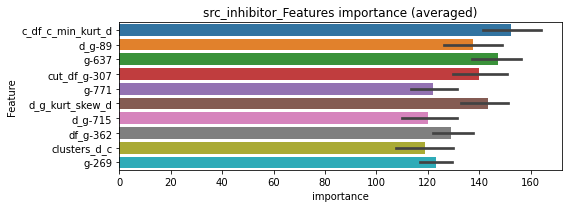

len(train_index) : 3032
len(valid_index) : 759
================================= fold 1/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000681537	valid_1's binary_logloss: 0.0278335


len(train_index) : 3033
len(valid_index) : 758
================================= fold 2/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000602177	valid_1's binary_logloss: 0.0107409


len(train_index) : 3033
len(valid_index) : 758
================================= fold 3/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[964]	training's binary_logloss: 0.000563905	valid_1's binary_logloss: 0.0105996


len(train_index) : 3033
len(valid_index) : 758
================================= fold 4/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000720623	valid_1's binary_logloss: 0.0153953


len(train_index) : 3033
len(valid_index) : 758
================================= fold 5/5 src_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000550171	valid_1's binary_logloss: 0.0199088
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000551413	valid_1's binary_logloss: 0.0198808


src_inhibitor logloss: 0.016899112689493002
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000804605	valid_1's binary_logloss: 0.035237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00104296	valid_1's binary_logloss: 0.031541
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000718878	valid_1's binary_logloss: 0.022544
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00098932	valid_1's binary_logloss: 0.0249031
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000773644	valid_1's binary_logloss: 0.0296751


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0086363, Threshold: 0.2357197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2357197, conf_0:0.16500, conf_1:0.30644
Num_p_label: 39.0, Expected: 13.2, Adj_threshold_1: 0.2657197
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_2: 0.2957197
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_3: 0.3257197
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.3557197
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_5: 0.3857197
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_6: 0.4157197
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_7: 0.4457197
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4757197
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_9: 0.5057197
Num_p_label: 20.0, Expected: 13.2, Adj_threshold_10: 0.5357197
threshold: 0.5357197, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
po

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000577631	valid_1's binary_logloss: 0.0196583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00088084	valid_1's binary_logloss: 0.0425292
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00079936	valid_1's binary_logloss: 0.0236025
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000699581	valid_1's binary_logloss: 0.0242739
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000665084	valid_1's binary_logloss: 0.0219424


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0412597, Threshold: 0.5357197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0150678 Vs.target_rate: 0.00332
Num_p_label: 60.0, Expected: 13.2, Threshold: 0.5357197, conf_0:0.42858, conf_1:0.64286
Num_p_label: 51.0, Expected: 13.2, Adj_threshold_1: 0.5657197
Num_p_label: 47.0, Expected: 13.2, Adj_threshold_2: 0.5957197
Num_p_label: 41.0, Expected: 13.2, Adj_threshold_3: 0.6257197
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_4: 0.6557197
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_5: 0.6857197
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_6: 0.7157197
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_7: 0.7457197
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_8: 0.7757197
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_9: 0.8057197
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.8357197
threshold: 0.8357197, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
p

Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000726889	valid_1's binary_logloss: 0.0237044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000588265	valid_1's binary_logloss: 0.025101
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0010282	valid_1's binary_logloss: 0.0403277
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000695204	valid_1's binary_logloss: 0.0175609
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000570303	valid_1's binary_logloss: 0.00565142


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0431928, Threshold: 0.8357197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0055249 Vs.target_rate: 0.00332
Num_p_label: 22.0, Expected: 13.2, Threshold: 0.8357197, conf_0:0.75215, conf_1:0.91929
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8657197
Num_p_label: 16.0, Expected: 13.2, Adj_threshold_2: 0.8957197
threshold: 0.8957197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


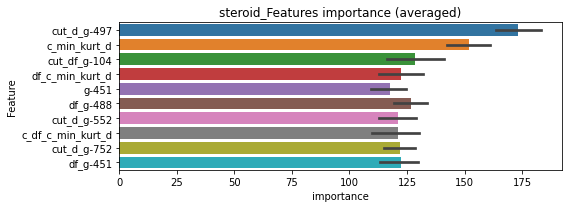

len(train_index) : 3022
len(valid_index) : 756
================================= fold 1/5 steroid=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3022


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000870656	valid_1's binary_logloss: 0.0281419


len(valid_index) : 756
================================= fold 2/5 steroid=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3022
len(valid_index) : 756


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000905483	valid_1's binary_logloss: 0.0190645


================================= fold 3/5 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000644972	valid_1's binary_logloss: 0.0082449


len(train_index) : 3023
len(valid_index) : 755
================================= fold 4/5 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000770418	valid_1's binary_logloss: 0.0129389


len(train_index) : 3023
len(valid_index) : 755
================================= fold 5/5 steroid=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000705567	valid_1's binary_logloss: 0.0214646


steroid logloss: 0.017971369867122357
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302775	valid_1's binary_logloss: 0.00175789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000290946	valid_1's binary_logloss: 0.00113134
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000296965	valid_1's binary_logloss: 0.000544063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00028563	valid_1's binary_logloss: 0.00109257
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014698, Threshold: 0.0041471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000286239	valid_1's binary_logloss: 0.000765984


Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0041471, conf_0:0.00290, conf_1:0.00539
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0341471
threshold: 0.0341471, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000291258	valid_1's binary_logloss: 0.00154301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279973	valid_1's binary_logloss: 0.00129817
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000290647	valid_1's binary_logloss: 0.000546429
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000285277	valid_1's binary_logloss: 0.00116328
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1173510, Threshold: 0.0341471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0341471, conf_0:0.02732, conf_1:0.04098
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0641471


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000284168	valid_1's binary_logloss: 0.000775491


threshold: 0.0641471, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000291258	valid_1's binary_logloss: 0.00154301
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000279973	valid_1's binary_logloss: 0.00129817
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000290647	valid_1's binary_logloss: 0.000546429
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000285277	valid_1's binary_logloss: 0.00116328
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1173510, Threshold: 0.0641471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0641471, conf_0:0.05773, conf_1:0.07056


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000284168	valid_1's binary_logloss: 0.000775491


threshold: 0.0641471, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


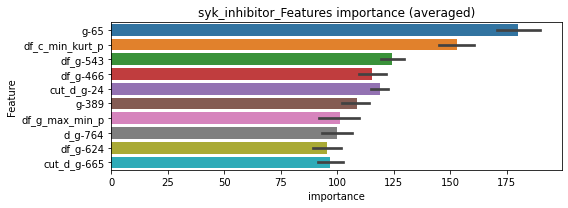

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000282414	valid_1's binary_logloss: 0.00115523


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3046
len(valid_index) : 761


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000298796	valid_1's binary_logloss: 0.00160666


================================= fold 3/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000285741	valid_1's binary_logloss: 0.000561416


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000287539	valid_1's binary_logloss: 0.000747013


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 syk_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000292026	valid_1's binary_logloss: 0.000694233


syk_inhibitor logloss: 0.0009531470615730151
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000556289	valid_1's binary_logloss: 0.0323045
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000541155	valid_1's binary_logloss: 0.0121327
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000568883	valid_1's binary_logloss: 0.0118108
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000527307	valid_1's binary_logloss: 0.00539346
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000528295	valid_1's binary_logloss: 0.0152993


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044152, Threshold: 0.0112224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0112224, conf_0:0.00786, conf_1:0.01459
Num_p_label: 4.0, Expected: 10.0, Adj_threshold_1: 0.0412224
threshold: 0.0412224, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000565835	valid_1's binary_logloss: 0.0307883
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000515634	valid_1's binary_logloss: 0.00963411
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000642892	valid_1's binary_logloss: 0.0101299
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000622462	valid_1's binary_logloss: 0.00469376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000518285	valid_1's binary_logloss: 0.0156932


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0220118, Threshold: 0.0412224, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0412224, conf_0:0.03298, conf_1:0.04947
threshold: 0.0412224, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000521264	valid_1's binary_logloss: 0.0085084
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000539278	valid_1's binary_logloss: 0.00760008
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000835655	valid_1's binary_logloss: 0.0292885
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000535046	valid_1's binary_logloss: 0.00465341
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0295555, Threshold: 0.0412224, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000885937	valid_1's binary_logloss: 0.0317655


Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.0412224, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412224, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


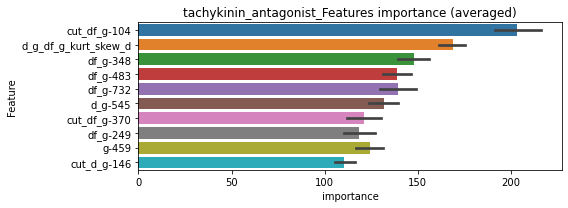

len(train_index) : 3037
len(valid_index) : 760
================================= fold 1/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3037
len(valid_index) : 760
================================= fold 2/5 tachykinin_antagonist=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000937295	valid_1's binary_logloss: 0.0238679
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000524442	valid_1's binary_logloss: 0.0103579


len(train_index) : 3038
len(valid_index) : 759
================================= fold 3/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000656971	valid_1's binary_logloss: 0.0103856


len(train_index) : 3038
len(valid_index) : 759
================================= fold 4/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000566014	valid_1's binary_logloss: 0.0186774


len(train_index) : 3038
len(valid_index) : 759
================================= fold 5/5 tachykinin_antagonist=================================


Training until validation scores don't improve for 29 rounds


tachykinin_antagonist logloss: 0.016062136766967963


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000844806	valid_1's binary_logloss: 0.0170192


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000377891	valid_1's binary_logloss: 0.00287314
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000395086	valid_1's binary_logloss: 0.00284297
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000379448	valid_1's binary_logloss: 0.0012601
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000380862	valid_1's binary_logloss: 0.00205028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000377307	valid_1's binary_logloss: 0.00137611


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024896, Threshold: 0.0082592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0082592, conf_0:0.00578, conf_1:0.01074
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0382592
threshold: 0.0382592, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000368734	valid_1's binary_logloss: 0.00299876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000375088	valid_1's binary_logloss: 0.0024471
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000366607	valid_1's binary_logloss: 0.0013063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000368363	valid_1's binary_logloss: 0.00181213
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000373943	valid_1's binary_logloss: 0.000973447


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0675637, Threshold: 0.0382592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0382592, conf_0:0.03061, conf_1:0.04591
threshold: 0.0382592, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000368734	valid_1's binary_logloss: 0.00299876
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000375088	valid_1's binary_logloss: 0.0024471
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000366607	valid_1's binary_logloss: 0.0013063
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000368363	valid_1's binary_logloss: 0.00181213
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000373943	valid_1's binary_logloss: 0.000973447


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0675637, Threshold: 0.0382592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0382592, conf_0:0.03443, conf_1:0.04209
threshold: 0.0382592, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


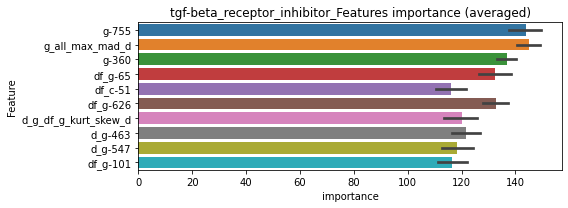

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000368634	valid_1's binary_logloss: 0.00374385
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000370097	valid_1's binary_logloss: 0.00374096


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00037375	valid_1's binary_logloss: 0.00185693
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000374416	valid_1's binary_logloss: 0.00185584


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000369365	valid_1's binary_logloss: 0.00105666
Early stopping, best iteration is:
[1087]	training's binary_logloss: 0.000363293	valid_1's binary_logloss: 0.00104522


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000443827	valid_1's binary_logloss: 0.00247869


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000370884	valid_1's binary_logloss: 0.00117955
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000366364	valid_1's binary_logloss: 0.00117358


tgf-beta_receptor_inhibitor logloss: 0.002059414712031615
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000287654	valid_1's binary_logloss: 0.00257044
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000285822	valid_1's binary_logloss: 0.000677671
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000277602	valid_1's binary_logloss: 0.00312898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000281065	valid_1's binary_logloss: 0.00167117
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017911, Threshold: 0.0065838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0065838, conf_0:0.00461, conf_1:0.00856
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0365838


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.00028244	valid_1's binary_logloss: 0.000693368


threshold: 0.0365838, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.00196123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000274052	valid_1's binary_logloss: 0.000713109
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277133	valid_1's binary_logloss: 0.00332645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00027775	valid_1's binary_logloss: 0.00278777
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0667644, Threshold: 0.0365838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00080
Num_p_label: 23.0, Expected: 3.2, Threshold: 0.0365838, conf_0:0.02927, conf_1:0.04390
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0665838
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.0965838
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_3: 0.1265838
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_4: 0.1565838


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000283238	valid_1's binary_logloss: 0.000507566


threshold: 0.1565838, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000280471	valid_1's binary_logloss: 0.00196123
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000274052	valid_1's binary_logloss: 0.000713109
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000277133	valid_1's binary_logloss: 0.00332645
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00027775	valid_1's binary_logloss: 0.00278777
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0667644, Threshold: 0.1565838, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.1565838, conf_0:0.14093, conf_1:0.17224


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000283238	valid_1's binary_logloss: 0.000507566


threshold: 0.1565838, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


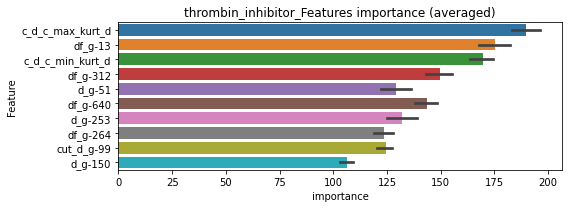

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000284319	valid_1's binary_logloss: 0.00204119


len(valid_index) : 763
================================= fold 2/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000279802	valid_1's binary_logloss: 0.000771058


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000278689	valid_1's binary_logloss: 0.00174156


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000278824	valid_1's binary_logloss: 0.00132848


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 thrombin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000281536	valid_1's binary_logloss: 0.000500565


thrombin_inhibitor logloss: 0.0012768292876266787
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000448725	valid_1's binary_logloss: 0.00728177
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000484074	valid_1's binary_logloss: 0.00513094
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000412666	valid_1's binary_logloss: 0.00599756
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000436925	valid_1's binary_logloss: 0.0015636
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000433151	valid_1's binary_logloss: 0.00233239


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025424, Threshold: 0.0109306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0109306, conf_0:0.00765, conf_1:0.01421
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0409306
threshold: 0.0409306, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000410599	valid_1's binary_logloss: 0.00731142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000412907	valid_1's binary_logloss: 0.00555497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000419362	valid_1's binary_logloss: 0.00610904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000418597	valid_1's binary_logloss: 0.0012946
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000417355	valid_1's binary_logloss: 0.00195252


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219370, Threshold: 0.0409306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0087896 Vs.target_rate: 0.00155
Num_p_label: 35.0, Expected: 6.2, Threshold: 0.0409306, conf_0:0.03274, conf_1:0.04912
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_1: 0.0709306
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_2: 0.1009306
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_3: 0.1309306
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_4: 0.1609306
threshold: 0.1609306, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000410599	valid_1's binary_logloss: 0.00731142
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000412907	valid_1's binary_logloss: 0.00555497
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000419362	valid_1's binary_logloss: 0.00610904
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000418597	valid_1's binary_logloss: 0.0012946
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000417355	valid_1's binary_logloss: 0.00195252


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219370, Threshold: 0.1609306, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00155
Num_p_label: 13.0, Expected: 6.2, Threshold: 0.1609306, conf_0:0.14484, conf_1:0.17702
threshold: 0.1609306, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


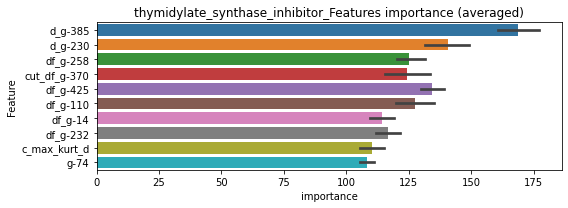

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000468864	valid_1's binary_logloss: 0.0069138


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000428292	valid_1's binary_logloss: 0.00357695


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000419344	valid_1's binary_logloss: 0.00686341


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000419256	valid_1's binary_logloss: 0.00135277


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000424728	valid_1's binary_logloss: 0.00170768


thymidylate_synthase_inhibitor logloss: 0.004083032359777684
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000363198	valid_1's binary_logloss: 0.00239583
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000354535	valid_1's binary_logloss: 0.00894917
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000355918	valid_1's binary_logloss: 0.00289104
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000341982	valid_1's binary_logloss: 0.00135409
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021006, Threshold: 0.0111364, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000356247	valid_1's binary_logloss: 0.00224009


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0111364, conf_0:0.00780, conf_1:0.01448
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_1: 0.0411364
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0711364
threshold: 0.0711364, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.0022976
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000344604	valid_1's binary_logloss: 0.00891028
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000356188	valid_1's binary_logloss: 0.00305597
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000334067	valid_1's binary_logloss: 0.00113961
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000343045	valid_1's binary_logloss: 0.00145134


y_Threshold: 0.0331170, Threshold: 0.0711364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0711364, conf_0:0.05691, conf_1:0.08536
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.1011364
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1311364
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_3: 0.1611364
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_4: 0.1911364
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2211364
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_6: 0.2511364
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_7: 0.2811364
threshold: 0.2811364, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352569	valid_1's binary_logloss: 0.00664201
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000328399	valid_1's binary_logloss: 0.00271527
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00034977	valid_1's binary_logloss: 0.000868637
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000371701	valid_1's binary_logloss: 0.00144855
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0210606, Threshold: 0.2811364, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000360426	valid_1's binary_logloss: 0.0103524


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00126
Num_p_label: 13.0, Expected: 5.0, Threshold: 0.2811364, conf_0:0.25302, conf_1:0.30925
Num_p_label: 7.0, Expected: 5.0, Adj_threshold_1: 0.3111364
threshold: 0.3111364, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


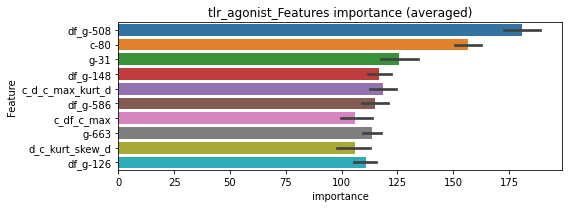

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 tlr_agonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000455124	valid_1's binary_logloss: 0.00582661
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000336919	valid_1's binary_logloss: 0.00210523


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000348438	valid_1's binary_logloss: 0.00079031


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000342279	valid_1's binary_logloss: 0.00122128


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 tlr_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000363984	valid_1's binary_logloss: 0.00788001


tlr_agonist logloss: 0.0035646990733006344
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00017886	valid_1's binary_logloss: 0.000256767
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000181176	valid_1's binary_logloss: 0.000239673
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000178531	valid_1's binary_logloss: 0.00348431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00017816	valid_1's binary_logloss: 0.000224173
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005123, Threshold: 0.0010158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010158, conf_0:0.00071, conf_1:0.00132
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310158
threshold: 0.0310158, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00018	valid_1's binary_logloss: 0.000220729


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000176364	valid_1's binary_logloss: 0.000340284
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000177749	valid_1's binary_logloss: 0.000215992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000180615	valid_1's binary_logloss: 0.0017732
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000178912	valid_1's binary_logloss: 0.000221002
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000177212	valid_1's binary_logloss: 0.000214535


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0545805, Threshold: 0.0310158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, Expected: 1.2, Threshold: 0.0310158, conf_0:0.02481, conf_1:0.03722
threshold: 0.0310158, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000176364	valid_1's binary_logloss: 0.000340284
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000177749	valid_1's binary_logloss: 0.000215992
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000180615	valid_1's binary_logloss: 0.0017732
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000178912	valid_1's binary_logloss: 0.000221002
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0545805, Threshold: 0.0310158, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, Expected: 1.2, Threshold: 0.0310158, conf_0:0.02791, conf_1:0.03412
threshold: 0.0310158, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000177212	valid_1's binary_logloss: 0.000214535


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


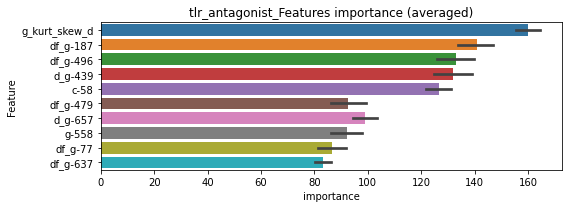

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000173797	valid_1's binary_logloss: 0.00025278
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000172841	valid_1's binary_logloss: 0.000251565


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000173919	valid_1's binary_logloss: 0.000236384
Early stopping, best iteration is:
[1008]	training's binary_logloss: 0.000173915	valid_1's binary_logloss: 0.000236379


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 tlr_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000173779	valid_1's binary_logloss: 0.000555752
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000174084	valid_1's binary_logloss: 0.000555064
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 tlr_antagonist=================================


Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000176173	valid_1's binary_logloss: 0.000218232
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00017504	valid_1's binary_logloss: 0.000220381
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.00017504	valid_1's binary_logloss: 0.000220381


tlr_antagonist logloss: 0.000296472623248122
tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000409054	valid_1's binary_logloss: 0.011293
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00045839	valid_1's binary_logloss: 0.00554071
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000428533	valid_1's binary_logloss: 0.0115685
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00043135	valid_1's binary_logloss: 0.00600789
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000442441	valid_1's binary_logloss: 0.00667984


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036720, Threshold: 0.0196279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0196279, conf_0:0.01374, conf_1:0.02552
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.0496279
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_2: 0.0796279
threshold: 0.0796279, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000402603	valid_1's binary_logloss: 0.0105231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000415507	valid_1's binary_logloss: 0.00590835
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000406522	valid_1's binary_logloss: 0.0105598
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000414909	valid_1's binary_logloss: 0.00296615
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.0004208	valid_1's binary_logloss: 0.00648238


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292636, Threshold: 0.0796279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, Expected: 6.0, Threshold: 0.0796279, conf_0:0.06370, conf_1:0.09555
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.1096279
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_2: 0.1396279
threshold: 0.1396279, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000402603	valid_1's binary_logloss: 0.0105231
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000415507	valid_1's binary_logloss: 0.00590835
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000406522	valid_1's binary_logloss: 0.0105598
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000414909	valid_1's binary_logloss: 0.00296615
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.0004208	valid_1's binary_logloss: 0.00648238


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292636, Threshold: 0.1396279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.1396279, conf_0:0.12567, conf_1:0.15359
threshold: 0.1396279, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


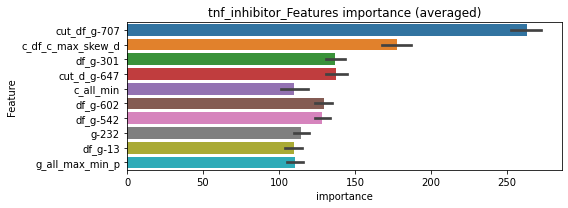

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000414898	valid_1's binary_logloss: 0.00869375


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000418169	valid_1's binary_logloss: 0.00485405


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000431733	valid_1's binary_logloss: 0.00780446


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000456299	valid_1's binary_logloss: 0.00330699


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 tnf_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.00042279	valid_1's binary_logloss: 0.00559384


tnf_inhibitor logloss: 0.006054029951367704
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0345139	valid_1's binary_logloss: 0.114202
[2000]	training's binary_logloss: 0.0162804	valid_1's binary_logloss: 0.0973669
Early stopping, best iteration is:
[2611]	training's binary_logloss: 0.0123039	valid_1's binary_logloss: 0.0931645
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0340135	valid_1's binary_logloss: 0.121652
Early stopping, best iteration is:
[1900]	training's binary_logloss: 0.0170336	valid_1's binary_logloss: 0.108369
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0340172	valid_1's binary_logloss: 0.114155
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0196841	valid_1's binary_logloss: 0.101423
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0358745	valid_1's binary_logloss: 0.0722834
[2000]	training'

1 / 3, AUC score:0.988, PR-AUC:0.974
y_Threshold: 0.0625630, Threshold: 0.2222488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 627/3743
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.2222488, conf_0:0.15557, conf_1:0.28892
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_1: 0.2522488
threshold: 0.2522488, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 627.0/3743, y_label_rate: 0.1675127
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0295983	valid_1's binary_logloss: 0.0882044
[2000]	training's binary_logloss: 0.0140401	valid_1's binary_logloss: 0.0684793
[3000]	training's binary_logloss: 0.00918711	valid_1's binary_logloss: 0.0615324
Early stopping, best iteration is:
[3443]	training's binary_logloss: 0.0079778	valid_1's binary_logloss: 0.0600021
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0298531	valid_1's binary_logloss: 0.0896907
Early stopping, best iteration is:
[1882]	training's binary_logloss: 0.0150122	valid_1's binary_logloss: 0.0736961
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0298578	valid_1's binary_logloss: 0.0771581
[2000]	training's binary_logloss: 0.0141858	valid_1's binary_logloss: 0.0589133
[3000]	training's binary_logloss: 0.00928349	valid_1's binary_logloss: 0.0522446
Early stopping, best iter

2 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.1030688, Threshold: 0.2522488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 608.0/3705
p_label_rate: 0.0253641 Vs.target_rate: 0.00533
Num_p_label: 101.0, Expected: 21.2, Threshold: 0.2522488, conf_0:0.20180, conf_1:0.30270
Num_p_label: 89.0, Expected: 21.2, Adj_threshold_1: 0.2822488
Num_p_label: 80.0, Expected: 21.2, Adj_threshold_2: 0.3122488
Num_p_label: 75.0, Expected: 21.2, Adj_threshold_3: 0.3422488
Num_p_label: 64.0, Expected: 21.2, Adj_threshold_4: 0.3722488
Num_p_label: 49.0, Expected: 21.2, Adj_threshold_5: 0.4022488
Num_p_label: 42.0, Expected: 21.2, Adj_threshold_6: 0.4322488
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_7: 0.4622488
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_8: 0.4922488
threshold: 0.4922488, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 608.0/3705, y_label_rate: 0.1641026
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0278232	valid_1's binary_logloss: 0.077588
[2000]	training's binary_logloss: 0.0131757	valid_1's binary_logloss: 0.0598918
Early stopping, best iteration is:
[2536]	training's binary_logloss: 0.0102873	valid_1's binary_logloss: 0.0559527
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0278835	valid_1's binary_logloss: 0.0764479
[2000]	training's binary_logloss: 0.0131557	valid_1's binary_logloss: 0.058062
[3000]	training's binary_logloss: 0.00864391	valid_1's binary_logloss: 0.0525176
[4000]	training's binary_logloss: 0.00644686	valid_1's binary_logloss: 0.0493212
Early stopping, best iteration is:
[4503]	training's binary_logloss: 0.00572177	valid_1's binary_logloss: 0.0481651
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0271881	valid_1's binary_logloss: 0.0985153
[2000]	training's binary_l

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0913000, Threshold: 0.4922488, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 597.0/3683
p_label_rate: 0.0140633 Vs.target_rate: 0.00533
Num_p_label: 56.0, Expected: 21.2, Threshold: 0.4922488, conf_0:0.44302, conf_1:0.54147
Num_p_label: 47.0, Expected: 21.2, Adj_threshold_1: 0.5222488
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_2: 0.5522488
Num_p_label: 35.0, Expected: 21.2, Adj_threshold_3: 0.5822488
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_4: 0.6122488
threshold: 0.6122488, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 597.0/3683, y_label_rate: 0.1620961


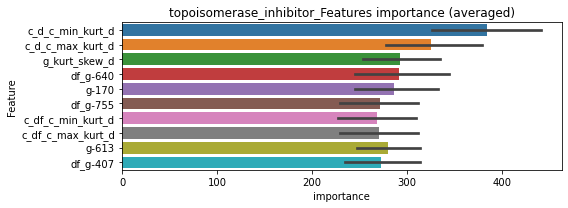

len(train_index) : 2946
len(valid_index) : 737
================================= fold 1/5 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0476627	valid_1's binary_logloss: 0.0973357
[2000]	training's binary_logloss: 0.0240377	valid_1's binary_logloss: 0.0723875
[3000]	training's binary_logloss: 0.0159758	valid_1's binary_logloss: 0.0623601
[4000]	training's binary_logloss: 0.0119164	valid_1's binary_logloss: 0.0568295
[5000]	training's binary_logloss: 0.00952367	valid_1's binary_logloss: 0.0534416
[6000]	training's binary_logloss: 0.00793008	valid_1's binary_logloss: 0.0510942
Early stopping, best iteration is:
[6411]	training's binary_logloss: 0.00742138	valid_1's binary_logloss: 0.0502837


len(train_index) : 2946
len(valid_index) : 737
================================= fold 2/5 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0483919	valid_1's binary_logloss: 0.0874383
[2000]	training's binary_logloss: 0.0242852	valid_1's binary_logloss: 0.0608011
[3000]	training's binary_logloss: 0.0161048	valid_1's binary_logloss: 0.0511071
[4000]	training's binary_logloss: 0.0119954	valid_1's binary_logloss: 0.0459964
[5000]	training's binary_logloss: 0.00960113	valid_1's binary_logloss: 0.0428475
Early stopping, best iteration is:
[5556]	training's binary_logloss: 0.0086504	valid_1's binary_logloss: 0.0414088


len(train_index) : 2946
len(valid_index) : 737
================================= fold 3/5 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.048465	valid_1's binary_logloss: 0.0880851
[2000]	training's binary_logloss: 0.0242761	valid_1's binary_logloss: 0.0637361
[3000]	training's binary_logloss: 0.0161186	valid_1's binary_logloss: 0.0547437
[4000]	training's binary_logloss: 0.012038	valid_1's binary_logloss: 0.05004
Early stopping, best iteration is:
[4307]	training's binary_logloss: 0.011179	valid_1's binary_logloss: 0.0491434


len(train_index) : 2947
len(valid_index) : 736
================================= fold 4/5 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0486068	valid_1's binary_logloss: 0.0833613
[2000]	training's binary_logloss: 0.0245386	valid_1's binary_logloss: 0.057383
[3000]	training's binary_logloss: 0.0162601	valid_1's binary_logloss: 0.0473293
[4000]	training's binary_logloss: 0.012156	valid_1's binary_logloss: 0.04175
[5000]	training's binary_logloss: 0.0097053	valid_1's binary_logloss: 0.0381309
[6000]	training's binary_logloss: 0.00810066	valid_1's binary_logloss: 0.0357038
[7000]	training's binary_logloss: 0.00696085	valid_1's binary_logloss: 0.0339609
Early stopping, best iteration is:
[7234]	training's binary_logloss: 0.00674595	valid_1's binary_logloss: 0.0336193


len(train_index) : 2947
len(valid_index) : 736
================================= fold 5/5 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0476487	valid_1's binary_logloss: 0.102893
[2000]	training's binary_logloss: 0.023931	valid_1's binary_logloss: 0.0745253
[3000]	training's binary_logloss: 0.0158782	valid_1's binary_logloss: 0.0641865
[4000]	training's binary_logloss: 0.011852	valid_1's binary_logloss: 0.0581619
Early stopping, best iteration is:
[4840]	training's binary_logloss: 0.00977888	valid_1's binary_logloss: 0.0546323


topoisomerase_inhibitor logloss: 0.04581840728415067
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000288913	valid_1's binary_logloss: 0.000700554
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297065	valid_1's binary_logloss: 0.000721438
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000292392	valid_1's binary_logloss: 0.00434431
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000286875	valid_1's binary_logloss: 0.0037879
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013548, Threshold: 0.0134066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0134066, conf_0:0.00938, conf_1:0.01743
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.0434066
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0734066


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000297342	valid_1's binary_logloss: 0.00163966


threshold: 0.0734066, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000283478	valid_1's binary_logloss: 0.000606181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000284885	valid_1's binary_logloss: 0.000418415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000281302	valid_1's binary_logloss: 0.00321455
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000304637	valid_1's binary_logloss: 0.00357979
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0464882, Threshold: 0.0734066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.0734066, conf_0:0.05873, conf_1:0.08809
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.1034066
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.1334066
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.1634066
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1934066


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287983	valid_1's binary_logloss: 0.001784


Num_p_label: 29.0, Expected: 3.0, Adj_threshold_5: 0.2234066
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.2534066
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_7: 0.2834066
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_8: 0.3134066
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3434066
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_10: 0.3734066
threshold: 0.3734066, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000283478	valid_1's binary_logloss: 0.000606181
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000284885	valid_1's binary_logloss: 0.000418415
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000281302	valid_1's binary_logloss: 0.00321455
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000304637	valid_1's binary_logloss: 0.00357979
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0464882, Threshold: 0.3734066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0040181 Vs.target_rate: 0.00076
Num_p_label: 16.0, Expected: 3.0, Threshold: 0.3734066, conf_0:0.33607, conf_1:0.41075
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.4034066
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4334066
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.4634066


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000287983	valid_1's binary_logloss: 0.001784


Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.4934066
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.5234066
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5534066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.5834066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6134066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.6434066
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.6734066
threshold: 0.6734066, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


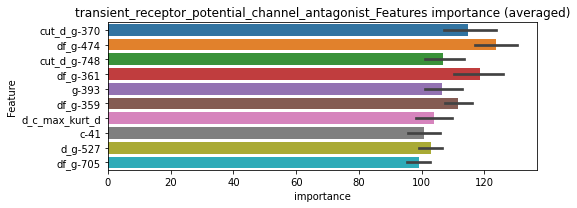

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000283206	valid_1's binary_logloss: 0.000634302


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048


Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000289317	valid_1's binary_logloss: 0.000425455


len(valid_index) : 762
================================= fold 3/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000282787	valid_1's binary_logloss: 0.00217922


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000296066	valid_1's binary_logloss: 0.00372625
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000287504	valid_1's binary_logloss: 0.000671305


transient_receptor_potential_channel_antagonist logloss: 0.0015273648032245943
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000147818	valid_1's binary_logloss: 0.000611483
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000145658	valid_1's binary_logloss: 0.000145442
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000143854	valid_1's binary_logloss: 0.000550608
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000146845	valid_1's binary_logloss: 0.000143461
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004129, Threshold: 0.0011448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011448, conf_0:0.00080, conf_1:0.00149
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311448
threshold: 0.0311448, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000145433	valid_1's binary_logloss: 0.000216032


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000140195	valid_1's binary_logloss: 0.000507848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000140292	valid_1's binary_logloss: 0.00014329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000138638	valid_1's binary_logloss: 0.00137196
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000141773	valid_1's binary_logloss: 0.000147899
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762298, Threshold: 0.0311448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0311448, conf_0:0.02492, conf_1:0.03737
threshold: 0.0311448, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00014012	valid_1's binary_logloss: 0.000186697


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000140195	valid_1's binary_logloss: 0.000507848
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000140292	valid_1's binary_logloss: 0.00014329
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000138638	valid_1's binary_logloss: 0.00137196
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000141773	valid_1's binary_logloss: 0.000147899
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0762298, Threshold: 0.0311448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0311448, conf_0:0.02803, conf_1:0.03426
threshold: 0.0311448, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00014012	valid_1's binary_logloss: 0.000186697


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


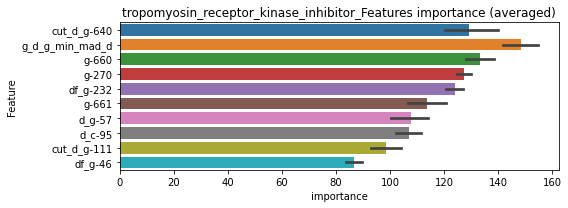

len(train_index) : 3050
len(valid_index) : 763
================================= fold 1/5 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139453	valid_1's binary_logloss: 0.000356418
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000139453	valid_1's binary_logloss: 0.000356418


len(train_index) : 3050
len(valid_index) : 763
================================= fold 2/5 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3050
len(valid_index) : 763
================================= fold 3/5 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000141191	valid_1's binary_logloss: 0.000147176
Training until validation scores don't improve for 29 rounds


len(train_index) : 3051
len(valid_index) : 762
================================= fold 4/5 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000139364	valid_1's binary_logloss: 0.00101853
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000139816	valid_1's binary_logloss: 0.00101817
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000139538	valid_1's binary_logloss: 0.000154205
Early stopping, best iteration is:
[1013]	training's binary_logloss: 0.000139462	valid_1's binary_logloss: 0.000154108


len(train_index) : 3051
len(valid_index) : 762
================================= fold 5/5 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


tropomyosin_receptor_kinase_inhibitor logloss: 0.0003687189823598034


[1000]	training's binary_logloss: 0.000139472	valid_1's binary_logloss: 0.000167176
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000139472	valid_1's binary_logloss: 0.000167176


trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000349144	valid_1's binary_logloss: 0.00117179
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000343296	valid_1's binary_logloss: 0.00199376
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000343066	valid_1's binary_logloss: 0.00249834
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000350574	valid_1's binary_logloss: 0.00100244
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351805	valid_1's binary_logloss: 0.000662307


y_Threshold: 0.0017987, Threshold: 0.0073244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0073244, conf_0:0.00513, conf_1:0.00952
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.0373244
threshold: 0.0373244, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000335084	valid_1's binary_logloss: 0.00108102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331663	valid_1's binary_logloss: 0.00143691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339003	valid_1's binary_logloss: 0.0026845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000336044	valid_1's binary_logloss: 0.000877051
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000342531	valid_1's binary_logloss: 0.000682107


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0717958, Threshold: 0.0373244, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00105
Num_p_label: 18.0, Expected: 4.2, Threshold: 0.0373244, conf_0:0.02986, conf_1:0.04479
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0673244
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_2: 0.0973244
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_3: 0.1273244
threshold: 0.1273244, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000335084	valid_1's binary_logloss: 0.00108102
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331663	valid_1's binary_logloss: 0.00143691
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000339003	valid_1's binary_logloss: 0.0026845
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000336044	valid_1's binary_logloss: 0.000877051
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0717958, Threshold: 0.1273244, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000342531	valid_1's binary_logloss: 0.000682107


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, Expected: 4.2, Threshold: 0.1273244, conf_0:0.11459, conf_1:0.14006
threshold: 0.1273244, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


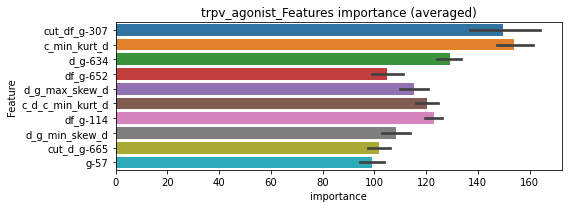

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.00033506	valid_1's binary_logloss: 0.00111255
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.00033506	valid_1's binary_logloss: 0.00111255


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000338659	valid_1's binary_logloss: 0.00175373


len(train_index) : 3048
len(valid_index) : 762
================================= fold 3/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000335025	valid_1's binary_logloss: 0.00209986


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000348298	valid_1's binary_logloss: 0.000996421


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 trpv_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000338156	valid_1's binary_logloss: 0.000652738


trpv_agonist logloss: 0.0013234992631852803
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000474674	valid_1's binary_logloss: 0.0222337
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.0004644	valid_1's binary_logloss: 0.013356
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000463768	valid_1's binary_logloss: 0.00368385
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000455395	valid_1's binary_logloss: 0.00174117
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0031772, Threshold: 0.0140195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000793554	valid_1's binary_logloss: 0.0282077


p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0140195, conf_0:0.00981, conf_1:0.01823
Num_p_label: 8.0, Expected: 8.0, Adj_threshold_1: 0.0440195
threshold: 0.0440195, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000462031	valid_1's binary_logloss: 0.0126086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000438939	valid_1's binary_logloss: 0.00408137
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000464644	valid_1's binary_logloss: 0.00981771
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000448743	valid_1's binary_logloss: 0.00457237
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472741	valid_1's binary_logloss: 0.01824


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202007, Threshold: 0.0440195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0057760 Vs.target_rate: 0.00202
Num_p_label: 23.0, Expected: 8.0, Threshold: 0.0440195, conf_0:0.03522, conf_1:0.05282
Num_p_label: 12.0, Expected: 8.0, Adj_threshold_1: 0.0740195
threshold: 0.0740195, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00044526	valid_1's binary_logloss: 0.00755631
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000437214	valid_1's binary_logloss: 0.0108741
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000824918	valid_1's binary_logloss: 0.0168999
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000582007	valid_1's binary_logloss: 0.0117734
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.00043775	valid_1's binary_logloss: 0.00335276


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0119502, Threshold: 0.0740195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0032647 Vs.target_rate: 0.00202
Num_p_label: 13.0, Expected: 8.0, Threshold: 0.0740195, conf_0:0.06662, conf_1:0.08142
threshold: 0.0740195, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


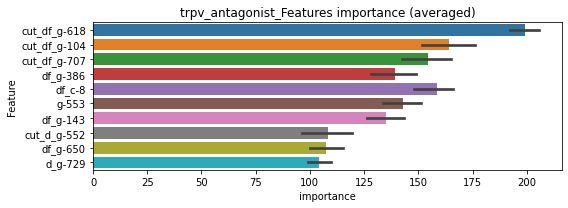

len(train_index) : 3040
len(valid_index) : 760
================================= fold 1/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000453576	valid_1's binary_logloss: 0.00502137


len(train_index) : 3040
len(valid_index) : 760
================================= fold 2/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000552107	valid_1's binary_logloss: 0.0163723


len(train_index) : 3040
len(valid_index) : 760
================================= fold 3/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000517272	valid_1's binary_logloss: 0.00959426


len(train_index) : 3040
len(valid_index) : 760
================================= fold 4/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000520266	valid_1's binary_logloss: 0.00449336


len(train_index) : 3040
len(valid_index) : 760
================================= fold 5/5 trpv_antagonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000444782	valid_1's binary_logloss: 0.0050095


trpv_antagonist logloss: 0.008098150699700397


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.040479	valid_1's binary_logloss: 0.120935
[2000]	training's binary_logloss: 0.0186146	valid_1's binary_logloss: 0.105439
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.0154318	valid_1's binary_logloss: 0.103264
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0400555	valid_1's binary_logloss: 0.136101
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.02081	valid_1's binary_logloss: 0.123208
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0413226	valid_1's binary_logloss: 0.126667
[2000]	training's binary_logloss: 0.0189874	valid_1's binary_logloss: 0.109164
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0179585	valid_1's binary_logloss: 0.108157
Training until validation scores don't improve for 29 rounds
[1000]	training's bina

1 / 3, AUC score:0.976, PR-AUC:0.956
y_Threshold: 0.0633169, Threshold: 0.1145928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 486 → Positive_corect_labels: 1324/8060
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1145928, conf_0:0.08021, conf_1:0.14897
threshold: 0.1145928, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1324.0/8060, y_label_rate: 0.1642680
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0311365	valid_1's binary_logloss: 0.102515
[2000]	training's binary_logloss: 0.0144244	valid_1's binary_logloss: 0.0876575
Early stopping, best iteration is:
[1987]	training's binary_logloss: 0.0145314	valid_1's binary_logloss: 0.0876124
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0318093	valid_1's binary_logloss: 0.0958629
[2000]	training's binary_logloss: 0.0147371	valid_1's binary_logloss: 0.0805704
Early stopping, best iteration is:
[2176]	training's binary_logloss: 0.0134582	valid_1's binary_logloss: 0.0793517
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.031233	valid_1's binary_logloss: 0.0979128
[2000]	training's binary_logloss: 0.0144598	valid_1's binary_logloss: 0.0834246
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.0110772	valid_1's binary_logloss: 0.08

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0928736, Threshold: 0.1145928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1267.0/7946
p_label_rate: 0.0180814 Vs.target_rate: 0.01327
Num_p_label: 72.0, Expected: 52.8, Threshold: 0.1145928, conf_0:0.09167, conf_1:0.13751
threshold: 0.1145928, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 1267.0/7946, y_label_rate: 0.1594513
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0276362	valid_1's binary_logloss: 0.0927484
[2000]	training's binary_logloss: 0.0128759	valid_1's binary_logloss: 0.0798567
Early stopping, best iteration is:
[2175]	training's binary_logloss: 0.0117755	valid_1's binary_logloss: 0.0785448
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.027872	valid_1's binary_logloss: 0.0821289
[2000]	training's binary_logloss: 0.0129963	valid_1's binary_logloss: 0.0666496
Early stopping, best iteration is:
[2888]	training's binary_logloss: 0.00871876	valid_1's binary_logloss: 0.0617964
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0283826	valid_1's binary_logloss: 0.0851993
[2000]	training's binary_logloss: 0.0131906	valid_1's binary_logloss: 0.0714059
Early stopping, best iteration is:
[2633]	training's binary_logloss: 0.00975382	valid_1's binary_logloss: 0

3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0889783, Threshold: 0.1145928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1228.0/7868
p_label_rate: 0.0163235 Vs.target_rate: 0.01327
Num_p_label: 65.0, Expected: 52.8, Threshold: 0.1145928, conf_0:0.10313, conf_1:0.12605
threshold: 0.1145928, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 1228.0/7868, y_label_rate: 0.1560752


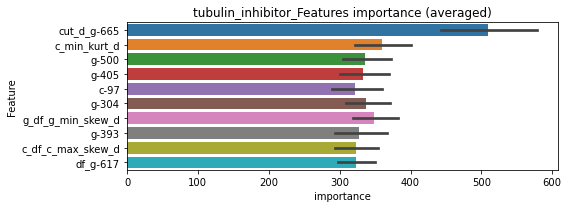

len(train_index) : 6294
len(valid_index) : 1574
================================= fold 1/5 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0476385	valid_1's binary_logloss: 0.0964712
[2000]	training's binary_logloss: 0.0230893	valid_1's binary_logloss: 0.0740028
[3000]	training's binary_logloss: 0.0150262	valid_1's binary_logloss: 0.0661808
Early stopping, best iteration is:
[3188]	training's binary_logloss: 0.0141064	valid_1's binary_logloss: 0.0652122


len(train_index) : 6294
len(valid_index) : 1574
================================= fold 2/5 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0478635	valid_1's binary_logloss: 0.0948174
[2000]	training's binary_logloss: 0.0230277	valid_1's binary_logloss: 0.0687038
[3000]	training's binary_logloss: 0.0149882	valid_1's binary_logloss: 0.0600012
Early stopping, best iteration is:
[3916]	training's binary_logloss: 0.011347	valid_1's binary_logloss: 0.0556014


len(train_index) : 6294
len(valid_index) : 1574
================================= fold 3/5 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0480184	valid_1's binary_logloss: 0.103299
[2000]	training's binary_logloss: 0.0232647	valid_1's binary_logloss: 0.0771118
[3000]	training's binary_logloss: 0.0151749	valid_1's binary_logloss: 0.0680372
[4000]	training's binary_logloss: 0.0112356	valid_1's binary_logloss: 0.0638164
Early stopping, best iteration is:
[4051]	training's binary_logloss: 0.0110919	valid_1's binary_logloss: 0.0637043


len(train_index) : 6295
len(valid_index) : 1573
================================= fold 4/5 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0479647	valid_1's binary_logloss: 0.0926773
[2000]	training's binary_logloss: 0.0234251	valid_1's binary_logloss: 0.0672391
[3000]	training's binary_logloss: 0.015239	valid_1's binary_logloss: 0.0586507
Early stopping, best iteration is:
[3339]	training's binary_logloss: 0.0136328	valid_1's binary_logloss: 0.0569656


len(train_index) : 6295
len(valid_index) : 1573
================================= fold 5/5 tubulin_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0477986	valid_1's binary_logloss: 0.0961019
[2000]	training's binary_logloss: 0.0230964	valid_1's binary_logloss: 0.0730274
[3000]	training's binary_logloss: 0.0150124	valid_1's binary_logloss: 0.0651904
Early stopping, best iteration is:
[3188]	training's binary_logloss: 0.0141152	valid_1's binary_logloss: 0.0642077


tubulin_inhibitor logloss: 0.06113837863842899
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000773402	valid_1's binary_logloss: 0.0324884
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000804829	valid_1's binary_logloss: 0.0248939
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000627053	valid_1's binary_logloss: 0.0119535
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000639461	valid_1's binary_logloss: 0.0141412
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000670694	valid_1's binary_logloss: 0.0368896


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0051563, Threshold: 0.0584812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0584812, conf_0:0.04094, conf_1:0.07603
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.0884812
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_2: 0.1184812
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1484812
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_4: 0.1784812
threshold: 0.1784812, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000824013	valid_1's binary_logloss: 0.0364023
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000684467	valid_1's binary_logloss: 0.0293326
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00107018	valid_1's binary_logloss: 0.035541
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000592296	valid_1's binary_logloss: 0.00919522
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000601325	valid_1's binary_logloss: 0.0309916


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0179202, Threshold: 0.1784812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0092918 Vs.target_rate: 0.00307
Num_p_label: 37.0, Expected: 12.2, Threshold: 0.1784812, conf_0:0.14278, conf_1:0.21418
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_1: 0.2084812
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.2384812
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_3: 0.2684812
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_4: 0.2984812
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_5: 0.3284812
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3584812
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_7: 0.3884812
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_8: 0.4184812
threshold: 0.4184812, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000573023	valid_1's binary_logloss: 0.0181628
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000705421	valid_1's binary_logloss: 0.0240859
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000610957	valid_1's binary_logloss: 0.0261203
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000596039	valid_1's binary_logloss: 0.0201276
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000587565	valid_1's binary_logloss: 0.0178038


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0257553, Threshold: 0.4184812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4184812, conf_0:0.37663, conf_1:0.46033
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.4484812
threshold: 0.4484812, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


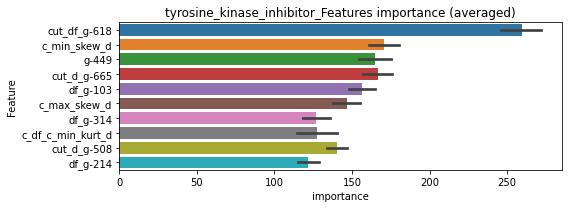

len(train_index) : 3032
len(valid_index) : 759
================================= fold 1/5 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3033
len(valid_index) : 758
================================= fold 2/5 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00102629	valid_1's binary_logloss: 0.0278464
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000613092	valid_1's binary_logloss: 0.0170412


len(train_index) : 3033
len(valid_index) : 758
================================= fold 3/5 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3033
len(valid_index) : 758
================================= fold 4/5 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00148592	valid_1's binary_logloss: 0.0316132
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000627142	valid_1's binary_logloss: 0.0128372


len(train_index) : 3033
len(valid_index) : 758
================================= fold 5/5 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000845444	valid_1's binary_logloss: 0.0138288


tyrosine_kinase_inhibitor logloss: 0.020635263482365055
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000220664	valid_1's binary_logloss: 0.00313819
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000224081	valid_1's binary_logloss: 0.000512467
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000223302	valid_1's binary_logloss: 0.000331569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000219988	valid_1's binary_logloss: 0.000417458
Training until validation scores don't improve for 29 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008435, Threshold: 0.0023297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023297, conf_0:0.00163, conf_1:0.00303
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323297
threshold: 0.0323297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000227959	valid_1's binary_logloss: 0.00299486


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000215272	valid_1's binary_logloss: 0.00384735
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000215694	valid_1's binary_logloss: 0.000629124
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000217368	valid_1's binary_logloss: 0.000343516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000216209	valid_1's binary_logloss: 0.000352507
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182546, Threshold: 0.0323297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, Expected: 2.0, Threshold: 0.0323297, conf_0:0.02586, conf_1:0.03880
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623297


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00021734	valid_1's binary_logloss: 0.00291346


threshold: 0.0623297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000215272	valid_1's binary_logloss: 0.00384735
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000215694	valid_1's binary_logloss: 0.000629124
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000217368	valid_1's binary_logloss: 0.000343516
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000216209	valid_1's binary_logloss: 0.000352507
Training until validation scores don't improve for 29 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0182546, Threshold: 0.0623297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623297, conf_0:0.05610, conf_1:0.06856


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00021734	valid_1's binary_logloss: 0.00291346


threshold: 0.0623297, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


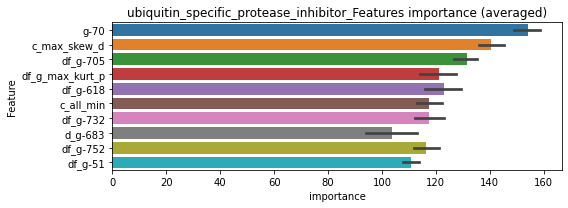

len(train_index) : 3048
len(valid_index) : 762
================================= fold 1/5 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 2/5 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000229171	valid_1's binary_logloss: 0.00242273
Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000221834	valid_1's binary_logloss: 0.000600486


================================= fold 3/5 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000220512	valid_1's binary_logloss: 0.00030645
Early stopping, best iteration is:
[986]	training's binary_logloss: 0.000220512	valid_1's binary_logloss: 0.00030645


len(train_index) : 3048
len(valid_index) : 762
================================= fold 4/5 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 29 rounds


len(train_index) : 3048
len(valid_index) : 762
================================= fold 5/5 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000221979	valid_1's binary_logloss: 0.0003447
Training until validation scores don't improve for 29 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0010597549402169527


Early stopping, best iteration is:
[804]	training's binary_logloss: 0.00022824	valid_1's binary_logloss: 0.00162428
mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0329066	valid_1's binary_logloss: 0.103498
Early stopping, best iteration is:
[1623]	training's binary_logloss: 0.019283	valid_1's binary_logloss: 0.0934797
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0320934	valid_1's binary_logloss: 0.110894
Early stopping, best iteration is:
[1660]	training's binary_logloss: 0.0184814	valid_1's binary_logloss: 0.101846
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0320186	valid_1's binary_logloss: 0.116463
[2000]	training's binary_logloss: 0.0149362	valid_1's binary_logloss: 0.101724
Early stopping, best iteration is:
[2077]	training's binary_logloss: 0.014343	valid_1's binary_logloss: 0.101265
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0333725	valid_1's binary_logloss: 0.0994451
Early stopping, bes

1 / 3, AUC score:0.987, PR-AUC:0.973
y_Threshold: 0.0593423, Threshold: 0.1105470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 274 → Positive_corect_labels: 882/5285
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.1105470, conf_0:0.07738, conf_1:0.14371
threshold: 0.1105470, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 882.0/5285, y_label_rate: 0.1668874
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0272278	valid_1's binary_logloss: 0.0758351
[2000]	training's binary_logloss: 0.0128723	valid_1's binary_logloss: 0.0620879
Early stopping, best iteration is:
[2741]	training's binary_logloss: 0.00918257	valid_1's binary_logloss: 0.0583705
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0262659	valid_1's binary_logloss: 0.0906867
[2000]	training's binary_logloss: 0.0124647	valid_1's binary_logloss: 0.0779958
Early stopping, best iteration is:
[2094]	training's binary_logloss: 0.0118685	valid_1's binary_logloss: 0.0771031
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.027347	valid_1's binary_logloss: 0.0748679
[2000]	training's binary_logloss: 0.0129141	valid_1's binary_logloss: 0.060493
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0123066	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0909727, Threshold: 0.1105470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 858.0/5237
p_label_rate: 0.0175791 Vs.target_rate: 0.00714
Num_p_label: 70.0, Expected: 28.4, Threshold: 0.1105470, conf_0:0.08844, conf_1:0.13266
Num_p_label: 36.0, Expected: 28.4, Adj_threshold_1: 0.1405470
threshold: 0.1405470, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 858.0/5237, y_label_rate: 0.1638343
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0256724	valid_1's binary_logloss: 0.0546745
[2000]	training's binary_logloss: 0.012152	valid_1's binary_logloss: 0.0386068
[3000]	training's binary_logloss: 0.00791897	valid_1's binary_logloss: 0.032938
[4000]	training's binary_logloss: 0.00589571	valid_1's binary_logloss: 0.0301314
Early stopping, best iteration is:
[4512]	training's binary_logloss: 0.00522505	valid_1's binary_logloss: 0.0291209
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0248744	valid_1's binary_logloss: 0.0730538
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0123179	valid_1's binary_logloss: 0.0617062
Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0250587	valid_1's binary_logloss: 0.0609444
[2000]	training's binary_logloss: 0.0120402	valid_1's binary_logloss: 0.0468722
[3000]	training's binary_l

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0855478, Threshold: 0.1405470, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 845.0/5211
p_label_rate: 0.0085384 Vs.target_rate: 0.00714
Num_p_label: 34.0, Expected: 28.4, Threshold: 0.1405470, conf_0:0.12649, conf_1:0.15460
threshold: 0.1405470, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 845.0/5211, y_label_rate: 0.1621570


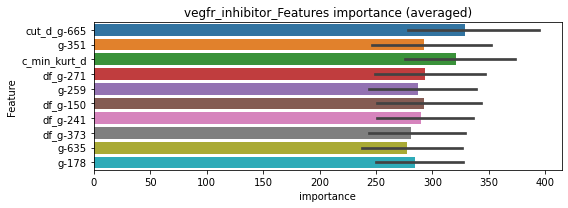

len(train_index) : 4168
len(valid_index) : 1043
================================= fold 1/5 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0439816	valid_1's binary_logloss: 0.0871787
[2000]	training's binary_logloss: 0.0217057	valid_1's binary_logloss: 0.067364
[3000]	training's binary_logloss: 0.0143057	valid_1's binary_logloss: 0.0608304
Early stopping, best iteration is:
[3400]	training's binary_logloss: 0.0125534	valid_1's binary_logloss: 0.0591583


len(train_index) : 4169
len(valid_index) : 1042
================================= fold 2/5 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0441765	valid_1's binary_logloss: 0.0784947
[2000]	training's binary_logloss: 0.0220065	valid_1's binary_logloss: 0.0570897
[3000]	training's binary_logloss: 0.0145157	valid_1's binary_logloss: 0.0491518
[4000]	training's binary_logloss: 0.0107992	valid_1's binary_logloss: 0.0451788
[5000]	training's binary_logloss: 0.00858159	valid_1's binary_logloss: 0.0425622
Early stopping, best iteration is:
[5565]	training's binary_logloss: 0.0077201	valid_1's binary_logloss: 0.0414224


len(train_index) : 4169
len(valid_index) : 1042
================================= fold 3/5 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0435573	valid_1's binary_logloss: 0.0844973
[2000]	training's binary_logloss: 0.0217439	valid_1's binary_logloss: 0.0650471
[3000]	training's binary_logloss: 0.0143403	valid_1's binary_logloss: 0.0588123
Early stopping, best iteration is:
[3841]	training's binary_logloss: 0.0111339	valid_1's binary_logloss: 0.0559527


len(train_index) : 4169
len(valid_index) : 1042
================================= fold 4/5 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0441352	valid_1's binary_logloss: 0.0842136
[2000]	training's binary_logloss: 0.0219465	valid_1's binary_logloss: 0.0615453
[3000]	training's binary_logloss: 0.0144748	valid_1's binary_logloss: 0.0532403
[4000]	training's binary_logloss: 0.0107772	valid_1's binary_logloss: 0.0493214
Early stopping, best iteration is:
[4429]	training's binary_logloss: 0.00971019	valid_1's binary_logloss: 0.0480888


len(train_index) : 4169
len(valid_index) : 1042
================================= fold 5/5 vegfr_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.0430672	valid_1's binary_logloss: 0.0928233
[2000]	training's binary_logloss: 0.0214613	valid_1's binary_logloss: 0.0714999
[3000]	training's binary_logloss: 0.0141568	valid_1's binary_logloss: 0.0637784
Early stopping, best iteration is:
[3949]	training's binary_logloss: 0.0106631	valid_1's binary_logloss: 0.0596516


vegfr_inhibitor logloss: 0.05285595601544355
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000340817	valid_1's binary_logloss: 0.00191651
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000338234	valid_1's binary_logloss: 0.00161529
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000339644	valid_1's binary_logloss: 0.0031918
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000358878	valid_1's binary_logloss: 0.00442167
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343435	valid_1's binary_logloss: 0.00217766


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021076, Threshold: 0.0083469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083469, conf_0:0.00584, conf_1:0.01085
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383469
threshold: 0.0383469, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.00189159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000332224	valid_1's binary_logloss: 0.000967245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000330515	valid_1's binary_logloss: 0.00214881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000340381	valid_1's binary_logloss: 0.00521579
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372077, Threshold: 0.0383469, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000330061	valid_1's binary_logloss: 0.00210937


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0067805 Vs.target_rate: 0.00109
Num_p_label: 27.0, Expected: 4.3, Threshold: 0.0383469, conf_0:0.03068, conf_1:0.04602
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683469
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983469
threshold: 0.0983469, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00034409	valid_1's binary_logloss: 0.00189159
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000332224	valid_1's binary_logloss: 0.000967245
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000330515	valid_1's binary_logloss: 0.00214881
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000340381	valid_1's binary_logloss: 0.00521579
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000330061	valid_1's binary_logloss: 0.00210937


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372077, Threshold: 0.0983469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983469, conf_0:0.08851, conf_1:0.10818
threshold: 0.0983469, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


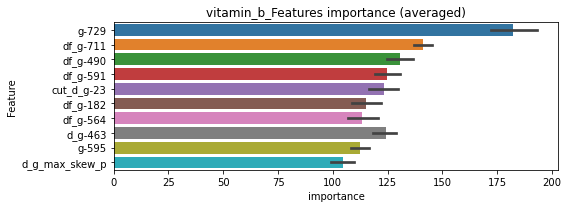

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000339145	valid_1's binary_logloss: 0.00136539


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000338412	valid_1's binary_logloss: 0.000866198


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000332814	valid_1's binary_logloss: 0.00159946


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000348089	valid_1's binary_logloss: 0.00328005


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 vitamin_b=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000340042	valid_1's binary_logloss: 0.00180563


vitamin_b logloss: 0.001783599457497053
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000430766	valid_1's binary_logloss: 0.00862057
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000424754	valid_1's binary_logloss: 0.00243193
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000440102	valid_1's binary_logloss: 0.0110812
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000418445	valid_1's binary_logloss: 0.0013331
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000431761	valid_1's binary_logloss: 0.00917981


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026447, Threshold: 0.0136671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0136671, conf_0:0.00957, conf_1:0.01777
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_1: 0.0436671
threshold: 0.0436671, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000408096	valid_1's binary_logloss: 0.00687244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000405612	valid_1's binary_logloss: 0.00223427
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000617617	valid_1's binary_logloss: 0.00980133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000410484	valid_1's binary_logloss: 0.00130898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000405984	valid_1's binary_logloss: 0.00718828


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233193, Threshold: 0.0436671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0070316 Vs.target_rate: 0.00164
Num_p_label: 28.0, Expected: 6.5, Threshold: 0.0436671, conf_0:0.03493, conf_1:0.05240
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_1: 0.0736671
threshold: 0.0736671, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000408096	valid_1's binary_logloss: 0.00687244
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000405612	valid_1's binary_logloss: 0.00223427
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000617617	valid_1's binary_logloss: 0.00980133
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000410484	valid_1's binary_logloss: 0.00130898
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000405984	valid_1's binary_logloss: 0.00718828


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233193, Threshold: 0.0736671, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.0736671, conf_0:0.06630, conf_1:0.08103
threshold: 0.0736671, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


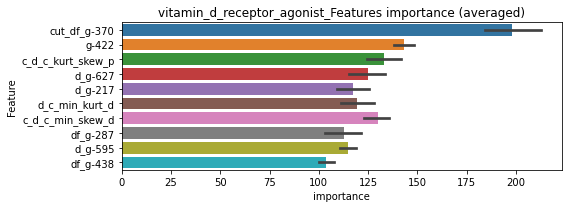

len(train_index) : 3048
len(valid_index) : 763
================================= fold 1/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000462193	valid_1's binary_logloss: 0.00845459


len(train_index) : 3049
len(valid_index) : 762
================================= fold 2/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[947]	training's binary_logloss: 0.000409678	valid_1's binary_logloss: 0.00190036


len(train_index) : 3049
len(valid_index) : 762
================================= fold 3/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000430508	valid_1's binary_logloss: 0.00870248


len(train_index) : 3049
len(valid_index) : 762
================================= fold 4/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000421041	valid_1's binary_logloss: 0.00153921


len(train_index) : 3049
len(valid_index) : 762
================================= fold 5/5 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000443905	valid_1's binary_logloss: 0.00801404


vitamin_d_receptor_agonist logloss: 0.005722900564925993
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000358527	valid_1's binary_logloss: 0.00284312
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000375787	valid_1's binary_logloss: 0.00480419
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000357331	valid_1's binary_logloss: 0.000922212
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000366544	valid_1's binary_logloss: 0.00137524
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000347229	valid_1's binary_logloss: 0.00385004


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024631, Threshold: 0.0103774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0103774, conf_0:0.00726, conf_1:0.01349
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0403774
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0703774
threshold: 0.0703774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000356323	valid_1's binary_logloss: 0.00243086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000367151	valid_1's binary_logloss: 0.00443755
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000345184	valid_1's binary_logloss: 0.000802569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000355157	valid_1's binary_logloss: 0.00121306
Training until validation scores don't improve for 29 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000345838	valid_1's binary_logloss: 0.00299192


y_Threshold: 0.0595793, Threshold: 0.0703774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0703774, conf_0:0.05630, conf_1:0.08445
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.1003774
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1303774
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1603774
threshold: 0.1603774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000356323	valid_1's binary_logloss: 0.00243086
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000367151	valid_1's binary_logloss: 0.00443755
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000345184	valid_1's binary_logloss: 0.000802569
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000355157	valid_1's binary_logloss: 0.00121306
Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000345838	valid_1's binary_logloss: 0.00299192


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0595793, Threshold: 0.1603774, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1603774, conf_0:0.14434, conf_1:0.17642
threshold: 0.1603774, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


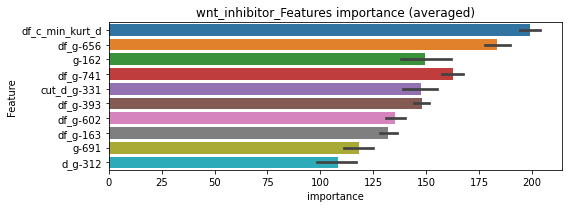

len(train_index) : 3045
len(valid_index) : 762
================================= fold 1/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[955]	training's binary_logloss: 0.000344276	valid_1's binary_logloss: 0.00179249


len(train_index) : 3045
len(valid_index) : 762
================================= fold 2/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408394	valid_1's binary_logloss: 0.00405217


len(train_index) : 3046
len(valid_index) : 761
================================= fold 3/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
[1000]	training's binary_logloss: 0.000348078	valid_1's binary_logloss: 0.000720578
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000348078	valid_1's binary_logloss: 0.000720578


len(train_index) : 3046
len(valid_index) : 761
================================= fold 4/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.00035633	valid_1's binary_logloss: 0.00142608


len(train_index) : 3046
len(valid_index) : 761
================================= fold 5/5 wnt_inhibitor=================================


Training until validation scores don't improve for 29 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000344128	valid_1's binary_logloss: 0.00284785


wnt_inhibitor logloss: 0.002168945861608793


CV:0.017417014003273806


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'anesthetic_-_local',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor',
 'phosphodiesterase